# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Natural Languague Processing 📝 Spam Classification Using BERT</p>

## Importing required packages

In [1]:
import re
import string
import random
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('max_colwidth', 800)

import string
import nltk
from nltk.corpus import stopwords ## for removing puctuating

import PIL.Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
sns.set_context('notebook',font_scale=1.25)


from IPython.display import display, HTML
import scipy.stats
import sklearn.metrics as metrics
from sklearn import metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


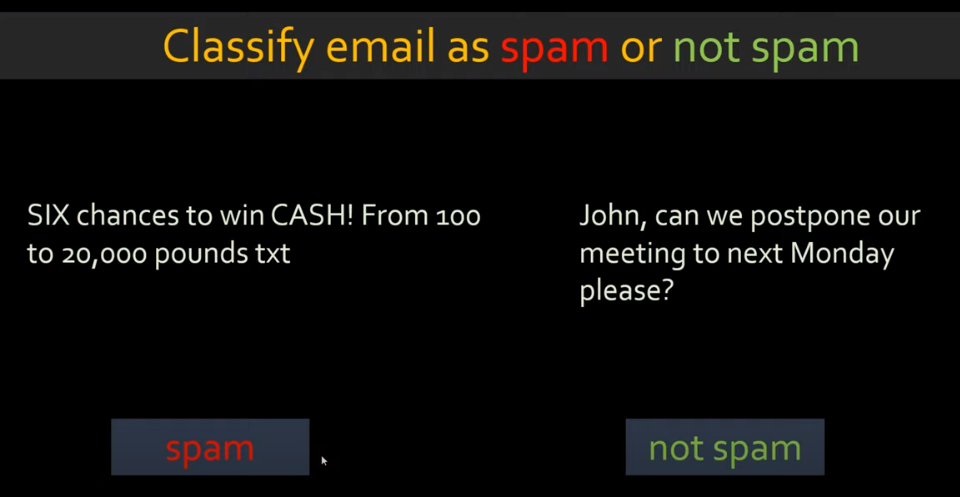

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA8AAAAHxCAYAAACib9W6AAAAAXNSR0IArs4c6QAAIABJREFUeF7svQeYneV55/173nbqnOmaGfUuBBII2WBj3ACDDa64YMdxW8fJt8k62c3GsbO59tr9vr2ySZzsbnadTdm0DcZOXAm4F4yRMaaYDuq9jDSj6e2c8/bvup/3HM1ICJAAYZXnvS4hMfOW5/k/7f7fVSlUirkMAgYBg4BBwCBgEDAIGAQMAgYBg4BBwCBwniOgDAE+z0fYdM8gYBAwCBgEDAIGAYOAQcAgYBAwCBgENAKGAJuJYBAwCBgEDAIGAYOAQcAgYBAwCBgEDAIXBAKGAF8Qw2w6aRAwCBgEDAIGgZcGgZSzP3JKoV6azpq3GAQMAi8YAbNXvGDozINnGAFDgM8wwOb1BgGDgEHAIGAQOJ8QMELt+TSapi8GgTOHgNkrzhy25s0vDgFDgF8cfuZpg4BBwCBgEDAIXFAIGKH2ghpu01mDwAtGwOwVLxg68+AZRsAQ4DMMsHm9QcAgYBAwCBgEzicEjFB7Po2m6YtB4MwhYPaKM4etefOLQ8AQ4BeHn3naIGAQMAgYBAwCFxQCRqi9oIbbdNYg8IIRMHvFC4bOPHiGETAE+AwDbF5vEDAIGAQMAgaB8wkBI9SeT6Np+mIQOHMImL3izGFr3vziEDAE+MXhZ542CBgEDAIGAYPABYWAEWovqOE2nTUIvGAEzF7xgqEzD55hBKROwNlfz+AMg2BebxAwCBgEDAIGAYOAQcAgYBAwCBgEDALnPwLKsV1DgM//cTY9vMAQsJQiTmLSNEWJn4eyLjAETHcNAgaBU0UgTROSJMG2nVN9BHnmbL7Mnnc2j45p27mKwOnuFWf7PiHjYPaKc3U2vrh2qxXLVhgC/OIwNE8bBM46BKI40m0S8mtbNpZtCPBZN0imQQaBXzACoiCLomyvkMtxHL1nnMolz57N16n242zug2mbQeBsQSCKYpIkPqZQt23rlPaKs32faMpJZwvOph0vHwLqojVrz+5T7OXDwnzJIHDeIDD3oBINrNFwnjdDazpiEHjJEJC9QQRUy7K1RfdU9wlj1XnJhsC8yCBwTiAgMoXsFZ7naaWZ2SvOiWEzjXwOBAwBNtPDIHAeImAI8Hk4qKZLBoGXGAFDgF9iQM3rDALnKQKGAJ+nA3sBd8sQ4At48E3Xz18EmgS42cNT1daev4iYnhkEDAInImAIsJkTBgGDwKkg0CTAruPq/CKnKlMYb5FTQdfc84tAwBDgXwTq5psGgTOMgCHAZxhg83qDwHmAgCHA58Egmi4YBF4GBAwBfhlANp94WRF4VgJ8LmhtXlakzMfOawROVZvZBOFcWx+n2r9zrV/n9aS8gDt3qvP1hUJk5nmGXDNBzfkYA/xC54Z5ziBgEHgmAmavMLPifEPAEODzbURNf14QAqcrcBsB+gXBbB4yCJwWAqeyLs1aPC1Izc0GAYOAQcAgYBC44BEwBPiCnwIGAEHgVATtuUgZodvMG4PAy4fAc61PsxZfvnEwXzIIGAQMAgYBg8D5gIBas3qNKYN0Poyk6cOLQsAQ4BcFn3nYIHDGEXi2NWoI8BmH3nzAIGAQMAgYBAwC5xUChgCfV8NpOvNCETAE+IUiZ54zCLy8CJy4Vg0BfnnxN18zCBgEDAIGAYPAuY6AIcDn+gia9r8oBE6X+DY/ZoTuFwW7edgg8JIiIAlalFIv6TvNywwCBgGDgEHAIGAQOD8RMAT4/BzX87JX6XPIt0o78ieNfluADcSN/4/m/Fz+Kb+fvTISbDUyosozybPEBM8+d+ES4CbGs/ilGr9nv7KxaY6PPG+RjaVFgk2q/yfGlhuT7GZDZs7LJfwSdErWtcy3UK/TZmZS+ZmZMy8BvOYVBgGDgEHAIGAQuAAQMAT4Ahjk86WLTQKcUTARhMFKM/KlGgJx1lf5mdsgxDGooPFvC1Kn8btZVJSysZRNHCckqU+ahliWhZQGOf4yBHhWyTCLjBDgZ1rSZ7ESXquSlJSAKAk0UVG2p8cpokAY2Sirik2Ek8rIKlLLWPPOl3V76v04cb3Jk00lVmNlp7lsDas6KCHB2YwUJYohwKeOtLnTIGAQMAgYBAwCFzIChgBfyKN/jvX9GAFuEto0r8lsgpDaCEuTYBc0KbZAieU3AeXrvy1tXHRQqZDj7Mosudkf2/JJhailKY4qopRHoqJjduW5luMLzwLcJCeZ5W32EmvuyQjw7B12YqFSpZUKQVAlSWvkvQgrncZWMSoNUFZCpA31ZQJaiaySITTn2Po8neaK7V/WVkpCpD0IPBJyWGmi/QL0WtVzI6O4coeTJnqtJ0pWYpU0jYnTbP2LEssQ4NMZAXOvQcAgYBAwCBgELlwEDAG+cMf+nO15qupaeCYtaqE5I6YZAbY0uc2sj4kSohbrv0Wolkssxiptujtn93n2JCW3RskZx7Yd6pSo1drx/RKxnVmgTnT8vVAI8DG3c2Ed2jVZGElTaZCR37nXiZZguV2rIzTuVdJwikqxypIem+ULbOZ35ynlUhIVMFVVHB0r8OCOhIOjlXN2fpqGPzcCjdWpxzxWQoAdSAskeI11mnkCWNr6m2gSrJ3lE4WiimtN0l6u4dg2k/UCk36RMG0xBNhMPIOAQcAgYBAwCBgETgkBQ4BPCSZz09mCgFhnhdDGaYwSUqYSVBJhJb6OIfXE8KsckjjWlqXUdsH2SCXu1LKyZxKJHRRCJ/+fsqTrAL/xwTVc2jdFnNo8tDvh/3z1EP1TS3Dtk8e3XjgEOKP+SZpiKUk01HBdjpoqgYwMN61v1hzX5WZstUrF0lennO5n4wq4+XWdrFti0dfm4+QicMSqHFP3XYanyvzZ1y2+82hXwzp/tsw8046XFoFs/sSk2qVZ2TmS2MrWtRVrRYvSZmBZ36LAkvAFl6Vth/iNW1bwiuUzJInPowcd/v72AXYOzn9pm2feZhAwCBgEDAIGAYPAeYuAIcDn7dCe2x07Pt43syKKJUgIsJ2MkFOTlPIhLUXoboW2co6Soyg4maXSj0KmfBieipiahhm/xEi9jJ/kSe08SSKUWPiz4pKFu/jMx5dz5YIBwtTjnq02f/ZP4+wdv4iUsOGGeTyeLy8BfmbiqRMTeZ250U50wiohIBInncTTWKqm46STRGErl0SJBc7VJNjK/Mz1JYoIedKNJugqT3LdlSE3XuWyYbGHnU5nYdyRkF8LcjZxaDMy5fHfvm7zzYe6DQE+c4P6C3nz3CR2Ks1c6sX93dU0uIalXaJdPZdCUbTYszHBVuqQJjarO7fy6Q8v5A2rh8GxeGBPmf922yBP96/4hfTJfNQgYBAwCBgEDAIGgXMPAUOAz70xuyBaHKepJl5C/ZSltEtkM5vw8vZhLlsRctEyxeJ5Pr2tdTqLLhXPIWcFOjawHsFU6DE27TE4lrJ/qIt7nyzzxP4aE3GehEC75Yol+JLe7Xzm4328eukRUAXu3lrkf9w6xe7hteA04ohPQP1CIcBN+7eNg5CQSnmMZUsc3Jyv8Rse8Nk/4FCNW0mtWHydjyfAiaKNfq67JOVjN8PKvslj4xhMlzk4AgOTIaEFtpslOPrij3Ns2txmCPB5ttKPEWBRljSS13nMsKAVFi1IcN1xkqidQ0MJO4Yi/NjGclwsK0cq7s9xzJrOrfzux+bxxlVHdX6snx+czx9/foDNA6vOM7RMdwwCBoFzFYFnK8s2m7X+2Xtmchmcq6Nu2n2uIWAI8Lk2YhdIe2NCUklAlbjkLAcrPMCijhqvXl/h9esdLl4a01KIsdI6BSFOjliLhC5nmWGJxWVS/sT6zyTLuf2BAn93+34Gaj3YqcQMQ5q4rO3dyqc/Pp+rlhwBK8ePt+b577dOsf3oRTgSYvyMCOBm8qyXazB+cRbgJgEWAuKkLm9cN8ZH39nNvI5hakkrX7trim9tmmKstpDUDkBI8JxLXNNXdQzwm2/P84aNCZ4zTS3yeGS7ww9+rtg/UGdkOiGMFbbrkHc9BmfaGJkuvVzgmu+8TAjMJcA6/CCFoj3Ea9YnfPimbuZXBpiKl/PVu47y5U01qlFGfhNLvAscEj9gbecOPvOxeVyzdog0Snn8YA9/9PlhnjiywsQAv0zjaD5jEDAIPDcCooQXuUEirjJfs6y0n07cl8xWr5j7FrtRx1ySRZrLIGAQOPMIGAJ85jE2X3ghCAiRciLsCKzaGOuWTnDzDb1cvTahu3QUT/iu9pAsgN/CeJgyncQ6i7NjuRRUjpxVx7Or2O4ModPLnT+HP/viIIPVNRkBlsRMic3F87fz6X+1mCuX7Afl8eNtBU2Adw6twfJmLZpzu3GhWICbfW66i799/V4+9cEWulqGCXLt/PU3FV/6fpXh+kUoKUsjA3ZMYZDgMsF162f4jx+w6W6vQxzx5P4WPvelKR461EEtKupMvqQetuPoOG6J/3x58X0hE9Q8c7oIzIY12NrSbwsBtvbzhg2TfOoDbSwojzHFQv7y9iFuu7uEn1ZAuQRWltldBSGXdG/n0x9dwBvWDCCS5GN7u/jjLwzx2JFVWXmthhB5um0z95+9CDxX/ffna/VsDfLnu5NGbfLnv+907zidNpzuu839ZycCqZKSiiF+Uici1Dk0bEvONw9HediJ5NI4/mom6jR72Nk5pqZV5x8ChgCff2N6Tveo6ToUS/bmJGKePcxrVlt86F0V1q6oQTiCa0EQlzlwtIV9gx5P762z+8gUQ9MBE+ORNkK2F4ss6s2xclGeVctSOnvm8ciOYW79l1EOTS5F6fJHWf3Qy+bv5Pc/uoRXLN6rLcCbthb4k9sm2DG0Bsc9eT3aC42gyXgIsX3XZUf4nQ900ts+SjXp5u++M8OXf1DnaH0VluUfq82aWfgilL+bf/O+Vn79xilsBdPVMn9++wxf2xQzYS3DsqWUlbi3J5JpS2f7beTrNmTmnF7Jz2z8LAGWEbawU5eyNcibNvr85i1dLCjtYUpdzF/dfpjb7vbwVYXY8ghISeNY61Yu7tzB7310Aa9ffQRZmY/t7tQE+NHDKxsx6HNrdWfKKyNQntsTyRDgc3v8LsTWa+81J6DcrVi4skXnM7BUkaEDPgP7xvCSZ3o4yRl4ockVF+LcMH0+exAwBPjsGQvTEqFYSaJLEdlplbw1zZsvj/nwjV2s7B3BEvfZIGHfSIWHnvZ54Ik6u/sTRuoefuIRKU9bdNMIXEnIxBQ5q0ZPl2L+gg68vMvPn/YZq3Xr7NFiVRLr4+V92/n9jy3SBDhVHj/dVuSPzzoCPJsQ6NQmyvGuyKf2zMnuypJgJWmMaLU3Lpnm5tf3UMnJWOT4yeN17n+6zmTce6zecqZZcFGEtKid/O5HurjlimGhIuwdqfA7n5tg89ECoTW/oRW3tOU3iSLtIiY5f01d1xc+Ymf7kzKPdOKz1CWvxlm9OOQtr6rQW54gdhfy/QcG+fGTENstxKnSf0QwlIztazu383sfXcjrVh0+RoD/6LYhHu1fgWVbuta0ZB+X+5vxdhcqAX65iOOZmm9z23+yIJBnWtCe2ZLns76+GIxOtd/P14ZTfY+579xBQAhw6Pis2tjBm99/KV4hR97pYNO3d7Dp2w9TCFuf0RmllczmMggYBF4uBAwBfrmQNt85JQSaFuCiGuHKlYpfeWvAFSsntFdtkBT5+U6Xr90XsWmLx/h0K3gtpJbCJkuUlcXRZKV5QrEcifCcuNrlOZ/ziaKEKEmILSHAHklS5PK+Lfz+xxZkFmA87t1e5LOfn2D78C/aAjyX9D5XXNDJxMOX6jAVAiyxTBmhcG1F0XOxE7HKoUvX1KOUSFeVmuMunhaw8em0tvMff7WPN19+BGKPzf0VfuPPhzk02Y6lOrUSQsivLfWEY4nflrqwQmKknrO5zkcEZCYn2KQ4up63ZfsU7IS8VDVTiul6QF3lkMRrUrJMJR5xCpFKuKhr60kJ8MOHluM4tiHAcybMiyF3ZwNpm1sJoFGG/Fjv5m41zR+ebId8vn68GIxOdW0+XxtO9T3mvnMHASHAgROy4soC13xgKfmiS051ct83D3Hft56mEHYaAnzuDKdp6XmKgCHA5+nAnlvdyqyMckmymzAMWdHez2+/u8w1GyPy9hiJ6uCuxxL+77dr7D2ap5bOI0pzmYUISYbVeP4ZWlQRtKWEj5DhAItIk7kIRZJ6kBxvAX4mAW4m12pYQrOKpFowf7FXZgk7/mpmx81+2iTADdGukTn32BPHnj/zBFhn5bZsHOXipA5RJPVaU+I4QH5nS/mpY/GXFpYQ4DSg293Cf/rVBVx3WT+SEWTbwRY++eeTHJhaRCIxnnrMmz3K3KzFOi8ll57vOl6wzJQeWXmoU1UWvPzJRuYK9c2vnw0C8vElijLkT/az5xuT5/793Hlq6ZJHibhrqAiVxFp55VhoBRWulNzKxlLKbYkiS9btRSexAP/hrUM8cvj8JcCz45Dhl82X55+7zSz6zTE5kUSeOFbPRipfnvk5OzdSUYbNzSTQ2B+eKxVgs+0noqJL5x3bXxo1y/U+mt15Yrm958NII984a55/BBpn0snTSLy4pXRGnz5+nZ7RT53TLz9xRs4Jv1AJoZ2y7AqPa39pOYWyg5u2cf8d+/nJd09OgF+KGOBT3bNP9b6zf3ieTQ471dV59vfQtPDMIWAI8JnD1rz5eRGYK/RkQp2QoTQY4+ZXR/ze+3zaijOQh+39i/mjvz/Afbt6wSrhOiWEI8WJJF2KG+6Ox2+GOsmVpbKYUitzi1QEKBUTJg6JlPbB5bLerbMxwM+wAIslUjJGC2mW+FSxWFqQZD/LCJsk1HrmRpzIfancldXDbQp2meRlz4mXzYhbU7DVh1MqNu0YRwiClnrnvF8EOLHK6l9IP2SzF8I4a/UVa63+Y6VYmmHK++XOjHBk7Z3b5qyNYn2VNmvLeSoJqbLEQlKhVQiwjUcaC8GV2yVXtygVkuPiLCW5EeRw0pA2tvNffr2Xay8dEA9odh3I81t/UWf3yEIS1abbJ/ge56Yq7TtO6pa2nfyave1EAnxi/7L5dfLyFM88LJvKiaz2dDaHLCuTpDMcG1jqv5tjIYhmOMpPs/HOcG9eGSlpfm/2X7NjcXxbmmMm49YUkOQb2Vezbx1PhkRR08g6qsfmxLG2yOalN6eNWfua6oPj5mGj4dnPGnOdQP80IwLZs6IW0ogfe7dDKnNSxcf1//h+uiSSuC4NsW0JWciuOIpx8zZhLCEKtna/FyWLKEVO5gL9wghw1u5jirdjJGV2jTxzxh2/nrM1PYtBcxyOYdV4wYmu2NlYNpPFNedGc1zmjqn0P4XGvGti92wEuEl4dcI6cQFXMiY2FtkYiIeMXqvNfUvar0dQ1n3W2OyZbERn/5uRbj2r0yyzrTwTq+aog5skuI1vNBGR++SeQFzS9fsb8/I4UtpEeXb9ihJQ1l/2TRol8OaOV7MNs+3Q865xr86+q+eL0uW2ZhUB2djK/iRngzyTrdNsX2+2MMMqW2F6K27gI305frbPrmWNdKP/8resjWabYsUxDOSt2fg8c3Y9309OZq0+fv/LfCt0K5WU+WvOrcb6lkzqsmdITe0GXtk3s9/PKl+jRtiL0v2Y9apq9jc7b1KVKSw1XsfmdHZPiK3/tpSUPHs2Qv1s5OW5EpIdv683FRYynrNn6NyZ+1yoHr8HZFmbT35uZO8/fg43sTsZltKuyFIsvyLPm4QAVzycqMx9t+/hvu9vJhd16nk39xL89dw4zUR+sr9k51P2tx5RUSIfd743Zm4DJ41b83uNufj83hDZ/MquE8tDzj2H5mJ14hjPnm/Hz10Z8yb22fpuXsdjPysnzZ27s3c3xrRRZ/44r7TZNx7zEszGu7kGGnuAxsNBSXJOvXdmcpWMi6zl5tWcK9lenuEpz82ex888y7MbDTk/buL/Av/HEOBfIPjm05nYIVuQFlISyY5YZ2l5D7/38SW8cd0+/cvhaoH/emudn20tMxH0aiImmYJPvLLSA3MvIdTZjjW7uctmJVRWsjBmhOiy3l3PSoA9xz1GGANsAm3tlGTHPuU0BDVFzqvj2qEWNCXRU7adWoRpnum6RZCWSewiMZnFWtOF1MmEFF22KRP2JOF0oBxi5WoBzUuqeNEQtjVNzotxZG8VBUFC5hKaONTiEnHaQkT5mFAt+Ggym4g7scTVpjrzpENAQVXJu5O4Tl1b2+SKYogCUSbkmCHPTCTZKkvaDbkZiyuCeCIkRZQIcUBe2m0pfCWNapJwS/9O2i35n3N2TCk4wh/82y7euGFYt33LXsVv/1lKf7WVKG1txA1H2LaFwiOJhZhVca2IMIrw8hXipEyUSGzwLAltjvKJBFhECF3fmRpoApiRpxhFqvIo5FCTedGcPycSyMZZ1lAwuCIAxoqqjJKltEBsRzN4VCk7dQq2j2vFWp+RWFANCkz5NpFqIVI5LJXPhG79vYRYiaiYuXenBNhK5kxKPaxjybgpmdtuJjySUEin8ZJRyrmQfKb3IExsqlGeyTiPZbWhVJEgSZDH07Qub9VhAcVkmDwTFN2InA1ipK8rmPE94rhLx9j6qUMQV7UySSMhSqOGkKQJbOMSZYxt+djpOEV3XBqvf5tz0b0JfQhTITwuM1EX9bhERB7LDvRzWczviQe/o2O+7dSHaBLXTrHtMn6sUJ7XUFK5Wskic1jWzPPFAEv+AI3t88YAZ4ogITVCCHKypsIaqV2j4MxQlPUhS7SxnrNYZJcwyjFdc4loxXJyeo0pK8SW0iWprpmmFVdN5ZhYtmUkZR1JIpwomsG1pmhxa+SUr+eNzAxZz3HiEvgF0qSIsksEicyVlNiSb6dawNXvfxYLsGwtdcvGSmPKUUys8kRWDjeoUwqrtKURLVZIThRMRPqbdeVQVTY1y6LuKOrKxldSJ33OWCWpzqmQT328NCBwbKqpRc3K6/3OS316/ICOMKIcS/k6qKYJoeUwZecY83LULQcfGzcRQmURNsqlCSnP9suEyErwEgtHS5mBJtRtoUU5SSnFkd5lZN2KK3xoJfgWjCmPSSfPpJcjpxzcMCFM6nr+HyPA2IQNxZ+EwpTihEKSMCN4W64Mvx4fK3UpxSGV1KcYzFAiJSf4O3kmlMVhHGZEGSFnQkPo9S1Hx6ZLW9uTGh3yfJitXpkz9TRmyvUYyeepWS6+ssnHsnay/ex0rrnWalFYOKmNJwoivcdHWv9pC26qSjEn55KvVRziUCFrsx5ANSoRqQ4SVSCxc3oeKK3MPZEAZ2TQjRIK+rcBoaiPLTkX8sLuCPBJ0xp5qrS7M3S4VZJUUU1cDgUeqdWKotTY+5o9nbsHSFhNfEy5q/M/xKJ0laLwokDLzm9RkkpuEDkvHU+R4uPK3yohCFKi2EJFDnk543RYkxDBZyMZzT0tU7zpb4rsYaUoN0XZEYlV10pyOZO0siC2SELRtlsN5a+jQ67EAyrbx7MzJJRsz3KmWw5BKgrzgEte3c6b338xLRUHKyry49u38NPvPE0h7iG2Q6JE2pCSd4t6fxM45PlTvZrKNX0+q4B67CMHgVOwsNwQx7L13JBzJopj4iBGJRJektd9k3lqy8F1gsdPmGRjI/ua5FaItJCmT1NsJyZXlJ2pTpyIMlTOfZskclGxi43sg/JdLV00unK8AiFb9LKnZ8r9KKmTWDWUl2Dl9TGYhUNFSud1sWKXNJDW5nCkNJ72CjqJskI1yaiEzcheIQS2ofgThY1lZ/ts4mPbPk4xIUqbCl0ZV1cLRKmfx4krOFLZQtaIbZFaMX7iE4jA5DrYXoTjZuebVi6mHlFYIggtwkQMJSJjunr+y+zIFEEnlzdOdbzNfS8tAoYAv7R4mredFgJN61lmTZDN341HeNsrxvnUR5bRU95JEJe455GIP7jVZzhcpIXqJqk9HU3p8QR4riYbLuvdwX/4yNKTxgB7bkb65ApVXm+qRWeYvtI4a3sjens8FvQUaW+xKBVtCq6jD4tqPWJ0ss6eg9Ns2eezfzTHaE1IURtxmgmYmZCcEWCtU9fWYrHYhJTsCRa3TnHFCoeFC/O0t1mUy56WveIoYmI6YGTU56ld0xwYsugf62Q68Ejk3Q2LRioa/8jXAlGLM8nq+Yp1ywosnO/S2aoolhx9yM/MBIyP1RkbT9hyaIbdg4rDo60603akxUA5+OSkClnYNsElixQ9pTqT1YBdox57BvPUoi7sNKTijLN+cZ32itjWJyimCR94W4FVi2ta0h8aU3z+WykD03KeejhCHCxFkLgMjED/UJ7VyxxacmPYymFw1GXLgRZmQiEdDpYIR9ry8Mxr1mJUp6f1KGuW5Sha09RUO7v6I7btDckV+zRJk7YKAdLS70mFpWzMnQZpk3jyJB6nIz/Bkq6IixbmWbOkjfndBQq5CD8KNR77D9V4au80OwdhYLyFQPU2YpyzDNcRnv6+CPJWOq1J9Jql0NpSJYhbeXLHGCMzFXKqRm8l4JJFIWuXOCzszdFetkQvzcR0jsFxm4c3H+XJfSljQTcBZZRtE/pCUKdpK02xfqli/fIyy+YXKBVcLWiNTvv0DwRs311j+yGHI9Ot1CwpRSUW2Mxy1STAmaLGxVETFHPTrJ4XsLQvprcnprNS0pnW88U4IyW+YrKaMDASsP1AzNb9EYNjJUIKIq5qIVOEqbkuqfIdhyrdlRqrFiWU3XFsu50DR222Hszhq6JOShdTzbwZktxpEeBT2YpibSmJaGOMBW01Fs7zWdzrsHBekbb2PPmCh+s4+JFFtSbzt8aug9PsOhhwcNhjvFYhdYQmCb6Z0CbXXCuwLe7dRBScYRZ3R1y8zGbVggILuzycXObaXQtTxqZgeDjiUH+NA4MWO4+WtSIhEEIqc1W8ObSCQr7wTAFf9rioobTwkgAvSikksDKpsUIlLLVSOp2UkhViJSLKKnzLoprASJyyLw7ZbeXY4bbgK0/3KbAk+3ZCu7K5NJpiRTLFYdtjf6Lot106koilSZ2VScyCS5/gAAAgAElEQVRSy6JTKJeVEqiYGcthWNnsiR32JA6H7Jwm2IEoAhqKhVm368zqI+S0LQhZSZ2FSUSP7dKVWrSmCTlRQGmvk5i6iphRCYfDHLtjm92Ow7jjMZlK5gFRFogST6ur9M4V6X4EdBCzLvVZFdU5YJXYH1scdGzak4QFYcJyUpblFD1OSi6NcGKZfTAQp+xIU3arHPucHDO2KCrF8g1dYZ0lScAKK2RRmtAlqk7LQ1keY0nAiC0YWGyL4ZBXoGbJHnB6luATXbX1DEgls7AQwmmIx1lQ9lnWq1i9KM/iPpuOdodi3tNEZqY2zeGjPvuPBOw8oNg77DEWdpBYuSxhYTOEqHHWyX4vY1NknIv68iyZ72sSsPlwgT39IT4FncG9PT/FhhUFLl1eZnGXIldq58BYkc/dvouhmRKp6sJCiHgm/B8f4pMRGJmHcRrTNd+jZ35Fz4PJ4ZCBQ1ViAmJqtHU5LF7WSd+Sdrq6W495f1XrAaND4/TvmqB/1yhJVYikd2okUgVE1LBKKR0LK/QsaGFeXyutbQXyeVHOJdSqPtMTIUf7xzi8b4TJkZC4KqFTojBpEHQh0DLV3Brdi4tUukr4SVWvgwUrK2y8crF+nxDczY8cZPNj+3HTloZOUHJphFArcGjPJNG0whEFwylesi9qoicK0MIU+baExSsXsGBpF21dRTzPw3EUkV9neqbG5Og0g4OTTB6tMXYwIKnLWZQnFm2YeMuphEIppHdBiWK5pBUMO3Ydxg8CLM+mb2EHS5Z00beoTKFoY3sJYT2kWg3Zv+swRw/OMH401ARSSHasPSnmXscrQOxCSLHNpm9+mbZ5BSqdOUqVEm4+s76GYUJcD5kaCTh8cIxDB8eojkfYYV6HyCh9fmfXXAuyzDO3VTFvSQt5D4JaxO4dI9l57yrKbRYLl1eYv7SFlrYiXqEg2lvCasDhfYc5uHOaoUMpqhrj2i6p7eKnk4RqkkpPgcUre5i/pJu2do+cG+HXAiIfjh6usWfXCAP9U8Q1D1tCwZTSCgjxo8vkjVNXcJziNDC3vUAEDAF+gcCZx14KBDKXSp0MJy2gkikqziF++xaPm99QpqgG6R9dxJ9/4SA/fLKDGdVNavvHXE1eGAF+ZrvXPwcBzotqT4m23iZKWkjiOmu6DvKxt7byujWH6WhJcB3px5z3yh4vAoUPtQD2jBa5d3uF7z7ks/tIWXIjH9P/a223tlLqE1ToEYV0jLdcATdsSHnt8gncYi3bM0UrmvnkZd7OMQxOws7Rbr7yI3hwc8hU3E1s1UkSiaHMk0ur9LVUecdrLN54acL6+aNYIhU3FeHNdgsPD2Ek6ODBnWX+4VtVdhwRAblbW8tFiFL4vO3SI/zWe7uYXzrCZFTkjofr3Po9ODy1llxaZ0VlD//2/XleuVacpYfF85yCKITlO9Jmu2Et1CxBSL/YdUpUrVZ++OAI374/4oNv7WbDiglyqcfjuyr8yT9FHBy1iaxyww33JARYuytJaZ2IHEf5wA1VbrmhnR53kF3jC/ib2w/wo4dyUFglTvC4aU1bxIVUn+xAkmF34pTQsoi1P2PA/JZhrn9lwPWXuaxbUCdfFCti4/HMwAthjp1HPe7dCd/7eY6nDrRRjyJN9HPalTqn3RDTuE7ZnmB5R52P3tLCFetqTNaW8b/+4XHu3lpm3fyEd19d4bpLRuieV8vMrPL+Jo5RkUNHPe581OWOByKOTFSIUrG41rh6xTg3boy4cp2irzKjXT71eEtXAwhSODTq8pMn2/nWzxRPHHIJnVZsVdfESA5s6bIIbFaao71wiOtf08J7X5WwqH2AUlmynzXmu7Sr6X0fgx8pBqeKPLU7z48esnl4R8rReocmPLYtD4mGPhOCROguWgNctR4+/u5e+ir7Ie3iOz/1+ct/sZmOW0lcESImtcY/TksnjQF+tjJIz71DSW3hPLESK/wEVy0Y5uNv7eLSBftpLTawypxEskumnKwRB8YCm62HHH7yVCt3PWhzcMTGybWBqmnXW/kjD8qa1ntU5DOvFd78ijrXXx5wSe84FVkT8p052MnY1iIYnYDdQz389Tdjntglyf+6SJ1Ah3PImDyX+6woLGIifCtiQVTnkiTghmSaV6c+C8M42zuac6j578YesMOBu3NlvkCJKatCqHLMuEpbkFck8Il0kndGYzxiF/hpHPOglXB5HHGTSrmYkJwMbfOd8rcDgQP7Uo9NlNhEnp2Op4mqtuBoV2oa/cpg7g4CltUn+EQeNgYztAqWQsqixlprDqrWGEItddiu8jzouNyLw5NeEV8IZmprq74oAcVaLGSkVK+zSll8kAluDId52Ovgh4HFXZbD5VbK9ZHPa+KQeTouXWf4E1eCY2t8rwU/cFv4rlVhl12ihqInqPLacIq3WCHr05hukYKFTDT2N2lj7MF+ctxFjh8ol21OmUk7r5UTp+oKPTeeW9azl7h6XxIrrONOsbJnhluucrnqooRFbRPkZH7JepemNPemCGo+7DxSZtPWEt9+1OLQmHgSSS4GIXyRLl0n4Ssyzzxl0e7u5X3Xd/GeN8TaAvblez1u+/5eZux5vGltlZsut3nVMp+OclXSZ4h5n81H+vjknw1xcGweod2Dw0QjFMM7gQA3iIucrY7F5de1c/X1q/A8xbaHx7j7zq1EVo3V63q59BUd9Cx2cFqqKE+UTZmbexJnBKk2WmH7YxNs+dkUY4NTiC3vuS7Z31OnTtvCHCuvXMCS9e0UK3VyefHwinHdzEsnksoEvqcJ3eRgzK6nh3j6oSOaoFuxgNwg8QoK3TXe+PY1LL+kk8CeQtkutu2Sc4RkKm3FDoJAezBkSTjFwpziJQn+SAvf/fLjDO6YwU7knDv1yxered7jossdLn11Fz0rSuSKIbhh5lUkW1cUaqt9HDvU6wnxRIkH79zJ9scHQNRCiVjshQDXmL805KZ3r6ZvwQImphL+4R9/pD2U1m9cxdr18+lZUES5NVFDYWfxThqGcAbGDqfseGSUnU+OMT0ckyZew8rbdCOeJcCJCln2ygqXvW4JPX0Odq6q22w74qkliquANBIrtljgc9SnPQYHaux5/Ch7Hx2kNu1AnD+W7V+UJVm4VzYm3Wtc3vS+i+nocpgcjfnSXz3NxPgMq9cvYONV85m/0sMqjZM6Ei4ihgcRRy3iGcXYgMPj9x1lz8NHCKZdEqeIVZpm6boy61/VRd/yIk4xxXHEkyDWng9C+IMqjPbD9keG2PxwP/Ux2eTshhVYMs80F+apj6+588whYAjwmcPWvPl5EGhmF87ikko4UT9LOgb5o9/oYMOSGezY56fbe/jsrYPsG59PnfaGJJppFV8OAuy4s4mootghCcd49cpBfv/X1nFxz07t/pYqV2eajrQrkaPdPuNoilw6nZ0NNozWu3liX56/u3OIJ/fm8enRREhiH7UWPM1clbu8fVy/McfH39HDgvIQBbcKiQhxDZftY8Ex4nopfpMBY+kSbv3+FF+9e4Kx+hKNkVi10jhiceUQH3pzDze9KmFefhgssSSJW2kB0oKOb9WWOV3D1ydNUg5OLuOzt47zky01qlZfw2VbYkkD3rahn09/uJu+0gB+WOaO+0P+4o6A/VMXY/kTXDLvCL/74QpXXZbHo580EfehBu9pEjElbs4Zg9cWXYrUnR6+uWmc//sv07znmjzvu9ahYo9weLKT//l1h+//vEbVXt5wG38mARaXa9GuevEYSzvG+I+/UuLVa3xUOMrdT/fy11+bYtuRdgKng9CKcFOJrxYXcRmhk7nLZfiKDGzHdZZ2HOJDN3Vx3foZOlpjXPFXj4uE8gIday4u8BJ3J8nAHEYDmwe2l/jnbw3z5IEigdWlx1nPFXGLShO8dJSlXTV+65cKvPHSScK4j8//y24ePgA3v2EeV69xaCn42nc5jjyiJMJ1UqxwUuMgksVgbT7ffmCKz985RRjCNZd73HxdB2sWz5B3PcTGmkZZtmXbDrDiCRAiKla/6jw2PRnxV3fMcGCsm9CS2pSSgExIsK09Eqwkx4qOHfzr9/Zxw4aE1D9EUiiRxlJyzNHCongK6heKf3YSESY+flpg94DNv2wK+P5DEsYgllKp6xtnDvMNS2bZGuKaDQmfvKWDJW37iFjA1++O+OyXxMLXTui4uEldC4phmuPiRhKs1646rAX7x/ZkdYAfO7LqWLz6qW+8trbE2UKI1g/wn3/9ctqSxzPB1G7J/PCEeEchlpADrYSa0vM2CGGoPp97Hq3zz9+ZYd9wB4nTroVImQKynqM0IklDVlYGeM/rO3jH6wt0FY6SU1VETZNYsgYbbtPigqldSn1sFTIUreC/fiHgrp+NENELWskmBDjXiOF95hpo5g6QfbMl8XlTXOcdmpzO0FKrg5PTc8nXGfIzcq7tvDp0JGJU5bhb5fnfKs+oUyFQOQI7peDXWZWE/D+McWMyxQgOB8KEYbEqOx7LdekpcTe08C0J3xCCVscV98gGIT6s8jytPO6MHJ7KlThsuUQa0CzGVy6p+bzAn+GVBPyql7C2PqWtOtqTRfxihDTohIcheUnCFwmLybLojeWLbFLwgwgetEqMeGVyej8W76KMmLXW6qyLE37VqfJaf4hDTp7HA9iWOmzM2VyhYvJKXDcTAlnWaYirUvJxk9mn7LEcNimX78UFHWrwWqZ5jQrYKNZi22lgkCn23FjhxXWdK0Haedgu8mBk8xWrhS35Fj0OpxoPOBurnoW36DlqTeE4I1y3IeVdr2tl46JJKrlqRmKVKNpKRFYhi2fWbp4zIC6yTomRmTZ++pTUY5/kkZ02SW4VqZwtShTMOU0uUxXS5e7jQ2/p5GNvBk9N86OnynzpziOsXtPOu64psbKrTk5iadKIOI4IVB9PH+7kk3/6JCP1TmJbyv3UsowFx8Irjl+hOkbaCth4QxfXvH2dDkPo3zXJT777BKsums/6Dcto67D0GhBX5VQVqfshlhcRa3t/nZyqoOoVHrv3MA9+bzPRmJwxmWv78Zer982USZat7+KV16yge2WBxKshhfukjJqcic1LznfJQSBWVBV5xDWHXdtGeWjTVg7vrmJFnnb5FZfhlt6YG99zKcsvbQevii+Hh/aikbmUTXL9fkd0aeLunY1+TsJSBgp847aHOLxtCkesw89xNd8lt8i/w9wMF121mKvfuICuPqWtskK2M7nKI4wluaCVuXRrhVNKLmnjvq9v5e5vPYKyunSojt7FVY3ulSk3fuASFizp1MT57rufoKWlhXWXrcIrZGErEpIk77FkTQqhxydKpyDIkUwV2fnEMPd+72mmh2xytrjBy37TCAVp9E3OpCvevpArr1+GmwuI42om11HSczAWq7Yl8zYgTnwcx9HnbX1EseORIzx87wGmh21cq0ISCaKBRJloK7bsbb1rHa774Fo6e/JE1ZQ7bnuIfM7l9deso6M7h8pF+vwP48xl3rITPCcm8CfwKDM9YvOzH+zmwXu30NY+j8uvXsSGq7sot5VQMh8kpkgwE9fyY1omIdGeVpBsuX+IB360jWRGwqDEJVqMCKJYMRbgUz+jz+ydhgCfWXzN259rI5cYHr2HuFhJES/awatWV/nvv9lFZ35AV8X5wr2t/O/bp5hKFhHT0kjcIJq00yvz81wJHp7NArx1ZA2ujvfKXLfkHWkwyitWDvLvPnoZ88v7ODo4zcBwyNHRmLFpEYwVLRWLhX1F1i32WNTtY8fTWngOVAfffbSFv7v9CHsGFxFKsItOcCPxNgEqrvP6tUf4jfd0snHZBCoUQuqxb7TE5n11Bg7XmJkBz4PWNuhod1mzqIJVXsSX7xniK3eNMhKs0ORC3GsL7iTvumKaT97czrzcEW3JiGKXLf2WdsseG8mSWReLNq3tNm2tMWtXtjPpL+Zz/zzBXY+PU3P7tMDtiBAQx9y0cT+/88EWFpZHCcIS37hP8bk7qvQHG3CjGZZUjvDJ9/dw8QoXJz5MMRfRXvBx8qG2PorZRlzj6okEUvsNN7I8vt3DPT8PufWrI1y+fJh/c0uFlb2T+LHFV+5r52+/McHh+lrtAtlM9iWH5WwcncTNerSrg1y/0eE/fAAqLUPE1Yi//3aJf/pxCyN+C6FdILRruBJrmIor5snnkYhWcqjlkoCewgy//Ust3PjKkByHiW0YD9vZuSdk155phkegqxNWLquwcVkFrzAF6QR+0MO3fjLJX91RZ6C2iNjON8pFKXJWnrh+hBXz63zqFoc3rh3VColt+2uMxR4bLuqhYNU4cjhl9yGfbfvr2q2+s6PAxUssVi+OKXp1bQU7OlXhc1+cFO7JJ97ZzdJFCmVPc2ggz9PbZzg0IO6lIaUivGptjpV9CsvJnp2O2/nLb+T44vcnqaplOiZNvDIcOyPATpJjZftWPvGubt6wvsTwyGH2jMDhgRkmpsSyAMUcdHaUWNJXZPXiMq3lAdKwRuTAtqFF/NVXRrj3CY/QW6RdY1UcatdRWfct1iDXXhby27cU6W0dIE16+Nom+OxXU6bSinaX9SSuNBUHMo+Lu6QO8HyejQAfE1yfJ5FMsxaxNMOmyg0bjvKpX9mAGtvC4SGfw0MpY2MhdfHcT6GzFebPK3LJKo/O8kyWwM6BCb/Cnfd18TdfPcJosJTUkfAGmTsitFVx7IBbXjnFv3lHifntI9qyGMYdbBtw2HogZGRkmpnJkPayy7wuh552Rfe8hNBbxp/fkXDP/cPUk3Y9VjozuibAWeK/E68smROUg4CLYp8Pq4CbErFIzug9bNgqcRCbw5Z2mtWCubgcdyifLpHCrSIPqzx/KVZop6xj2BMrphBUWR2H/Fo6yvVhfdYLRaRNV2LRYX8Ch1PFkKQ+S1JaLMUKO2CFm+CJ5Vnv8w5fswp8M3H4uVukbov7rdR8z3qSNAjwZfj8ctGmrzbDSArjScpEYjFJXa/4imMxH4fFCfSlMkCRmDEZz+f5fppwGyW25Vsz98hm0h87pT0Iubwe8Wt2lSuCYR2TfTBKqbolej2oxAF7KXAwSTiShDrBYoujWGZ7rKJBhJOAgwq+ocTSbHEDUyyX0nDiQq5s9mFxQCvNbNpsj7V2ol3ELbFg2xbV1OMvvA6+l+YZdGX/ebZY1WcenFq3Jp4ujbPITvex8aKU3/lgFxd3D5ATLETZOmWzfb9iT3/M0YlUx/8v6i2xdnGB+R0RxeJ45ohht/D9Jyr8z3/qZ//YYlK3VSLD9Z6svQhUSI+3l49c38Yn3pJQVONsPuSxZXPAlZcvYn5vTXtETUxW2Ns/Rf9Inf5hh/6xdu56CqbCQqboUVlMvHamekYeAFF8RJoAb3hTB9e9cx2BPUYwoxg6MM3SJR20tZepTYUMHZ3iyOFJBo5MUq3XWbi8m0UrOsi3KzxP9nOHqQHFT+/Yxq4HJrJzu5ETIEPTIgptHRvbt8LmmnddRu9KjyRf1/GxXr2Fo0cm2Lf3MCMj47iuQ1dPF/N6yvQuaNFnj45JDl0O7prmh3c+wfB+yc3QSdUPaOkMufat61i1bh6+NUkQ+dgFRaHkNJTV4FcTfD+rdZ+NJxRdB3+0wHe+/DCDe4QAiyLyxGv2pGsS9KZVuXOtwzXvX8vSpXnCYBTXKjMyWOfIwWlGx+tMTtS1K3Rra4m29iI9PRXmdy7ip9/cwg+++QC21YGlvIYTm0/HqpTrPngJC5e0EEczzEyL/sgmny9SnQkYHJjgwIFhpqdm8ByLRYv7WLisE7t9WodcFe0C8XSRB+/ZzQPfO6i9onRsrbjsN5TNujcq5Kp3LmPD65dSq44wOjTG2MgU0+Mp9VrW39bOEvP6Wpi3sIXWNosgnqLglLVl9b7vH+RnP9iBl87TY5skNa2oyKpSOPStU7zufUvo6C6iEsW+rSPM62yho1u8DWV/r7N33xgDR0a18mf+4k4WLeuk0iF7tyh28vTvSfjG13/CyuUruOb6S8m3jRMGRUaH6+ze1c/o6JSWofoWzGPZqj6KLSKZ1rFsRTDQxne+9CAHt07hJHkd85wpZE59zRsCcWYRMAT4zOJr3v6cBFhIYbYhSNxOPtzMO16T5w8+1oqdHmA0hD+/w+H2+yrUoxYSSdxwLKvp6UH7Qgmw8rK4O9HoazktrdLTPs6la+YxfOQQQyN1anWXmboiTLTfqNZ0lnKwrDPira8vc8NVAZ1aMx8zYS3lH+8Y5us/KDCelAhECBTRMJmho1DnN94Wc/NrqhTzPtWghe8/HvPNTVW27s9nh4K4DCcJXl5RKkFLsc7SZUsYnQh5ep+vCY24QVrpKAu6p/m99+a54ZIRiFImggq33eNz90M+/SMVIsl8JaKOEBIX8gXo67Nob1vIof4ie4Z8fCUpUCRxRpbo5abLD/Lv3l9iUWWUIG7h9p/Z/OUd4xyuryaJUlpzPl2FSR13kwTjiDPX7/5KkVeuq2qZfc8h+P/+BgblfzMPMJ1oSGKXa0GBmt9KT2kfv/aBPt56+Qg5J2HzgQp/+IVR7ts7H8cuHtPqn0iAJbnFyrad/PrNPdx85ai2eGw75PDZL9a4b8cyLEcSEWWxQrNxriefR5IAKlUF2tJdfOCaDj7xtiqV0iB+HR491Mud99Z58MlxJmueTnSWs0NaizFv2OjyyzcuYG3HPgTU6kSZP/lawJ33hdSslUR2TGKHOKoA/gBLe2f4vV/Kc+2q8awhtqWT0wzXenhkc8S37z7ClgMxI2FRWw8kYdTitpC3vbaF974+oJgLsByH3QMhnrJZ0llgtNbHXY9XufMH/ewf8ZgKc/pQdp2Q5T3wyzd1cdMVM7jUsPMeD+9dwR/8zVa2DiwltiTrsq/nsGtJJm+X9vwo61dKWatx9hwcYyrwqIUO9cii1igHVrAseotV3rihlXddb7Ni3ih5NyFMu/jR4zF/8o+T9M8sIswVsBsZg2NcSvYg11wW8+9vqbCgcoA6C/jKpoTPfTViImklEcFMrFaNrNfHE+BEW4A/+8VRbQGee2XZy7PM7ye7sgRfYhn3sVSVFb0+F63ooH//bo4cDakGNlGoiCXOTClcN6XgBVy6SvGWqyu86bKQoqpqEtw/vpz/9vn9fPfRLmKxRNkS/y5rZorOzpTPvDvHTVcchcBnOu3kjh+H3P7TSfZNtOnsRFEQ4Mozjo9nRXR3Qe/CZfSPFNh9cJIgEWuWxL9nXiBZFmfxxz7+knktiXgW1uu8NYl5jx2xMp7WHsRPuUXuTCy2hYojytFJr1zboSJ2wiTM/nY8JtwcT8aKmo5xzYT0kl9lZRLyCXzeHE2ikzVIhIeT535y3K9ybMfhaKJ0Eh6d1MeBlVbIlfjcFEV0Np4ZKOS5o5bwJS/HiNNKoMQPXIxIUgs8pRxHdKUhy6xQeyEfSQrU5L1pQlV7r8QUVEJPbLEoTLg+H3G1C8WakPyYg5bib902fpg6DNh5bEtc6CEQC3Doc6kf8a/cOtcEsj9ojSAUPHZbeR6OFA/HDvstj0HJTh5HtDqK1Y7Nq9OAd4u7vBC4IOaQnVIXgpjG7Hc9Hk1LPJ7CXstmIMqyZVdsuASbN6QRb4snMoKRwo/KPfzTTMqjhRZqp5PwSIe/NCyaKmZ9335+/eY2rlwxTIsr8YWKrf0dfP3Hk9y/JeTQkCg4XchZxE7Amm6Lt7+2k+uvqtGXm9JJEGNvCV/64SR//ZWA8WQedScjekKAw9Sjz9vGx24o88vXyVwZ0koDohy4HewY8fjpU5Pc9fNRDgwm1P0CM/UE5bYQWpVGvGND09IQ++cS4GNxzZKMzvZ5xbXdXPuOiwmdIe3CrijipS4zYzGP/+wwmx/tZ2Iowp+Z0h4HXsmje0WBK25YyeKL28jlFMp32PPQDHd/dRu1CVHkiYvs7B4gSfLS/CQ3fngdKzZ241ujuEkbY4dCNv90gM1P7GV6Ks5IapJQKOSodNlsuGIJl12xgEJbSOJIqEgrj95/gE3/spVkpk0nbxTPL68s3kFKJ0sSd96VGzp43Y0Xkc8rPFXg4bt38+A923CiNiSSWns4xKJ0KFCfVNiSCLSRJPH41T13H5M9KSNRYtW9/O19rH1zmbachVW32PnYGA/cvZ2hgxHVIGSm5pPzSuQ8T5/znV15+ub1EszY7N6+/5hFsumO37E65rpfWsvCpWXicAYvLTIz4bB72yiPPbyb/TuHCKpZ4LNKU9railTm2Wx8y8WsWNNCrjCpzzdVb+MbX3yKrY/240SFhpyXWT9FVScW4IWremhtLzJ45DCTY5MktZggSHR8b2xL1uUIr+RqpcJVr19N32LxzpnWzixjh1r44v+5h5F9SpNi2aclUWAQx9pwseRSm2s/sIzWDpEbJemfrZUL40drPPHQAbY+0c/kER+/GkPsUGh3KXWlXPOutSy7uJ0kN6Nd3w/vO0pfdxftlS6GBsZ47IE9PPzALpIZjzjIMqs7+YDlF3Vx9bUXM391kao7ghfOY9vDI3zniz9HVQt4ShQbp2e4OT0p19x9uggYAny6iJn7XzIE5ABsEmAncSgmm/ngDR185r2Sia+foarLn37F4psPN7JWNjLo6fIUJ9EkP1fDXigBxs1qDNu65nCAl7NIghEtHKWpjW0VsnrCOFmGRDslseTfCW59nCVtQ7zneo93v65EpzdGaOf42ZYW/ugfqhyuVqjarZnLYDrKqm749+9Lef3Fw7or2wfa+C+fH2fLvjzVZKE+cET7K0TIsiR7ZYBjZxkrxR0pTApE2q3ZJq+O8srVNT79/jwXzxvT7fvJkx6f/brP3qF27aomzpDaVTrNNPSxtv5NY1uOdisKyGUZi0WDn4jLMJoA/9tbiiyujOFHZW6/3+Uvbx9jKF7bsJRH5FRdu4NbSY02BvjD3+rltesHtAV4S7/Lb/2PkMM1cTGVDNaiMJgt/WJZnthgeMurS3zq/RJ/Osz4eMT/+Z7Hl+9rYSqU5+RAy3pMUygAACAASURBVNqciQWN8kYkvHb5bj7zyz1ctHCStGbzpfst/ubOSQ5OrdS1igWr7HrubIy6XFKS8uqlB/mdD/Wxvu+gttY/vDfPbT+s85OnJfFXBSVWE3GNj+ukyQRld4jrX5nym2/Ls7Qji9398ROL+JPPH2TvhBBgyaYtShWPNBhm2bxp/sOHylwnYy5Ncz32j+T5xk98fvhQTP9wXrv+13XskLZhUEinWNY+wr/7QCtXr7PwGNPEPqKF/kGb2++Z4XsPpQxOVkjcbuqiNBHh3RKX8AnW903w7z/YwqtWB1i2z3B9BX962wG+80g3vnbJFffvzLXbsVwcyaidVrULdiRkTFWwbE9nRM8SDrkazWI8Sbs9xNXrq/zaeztZ3SUWT5t9IxX+819N8Mj+dqpOp84oLKREUkMJAX7jhpjfeV+ZBZVD1Onja5si/sfXEqbiVomIF7eLrHwV7qwFeKXErgkBbn/RBBhVx00DkiQjb7ESJYsIbHMuncgkxQn7Wdtb49femdPYF70asdvDP35ngr/4RolJv4JjtyA5j530KCuWRPynD5a4bNEA2B6Pbi/zx7dNsGWwQt2Zr7PJChERN0uJC7eSunaB1uENqaw/W1tGsTxSiaXQtC1zBT7x0hbgNGRVfZqPJAlvVhHt8QxHHI9vRRZfKbYzIJmMRemoY950dL/OdGyFIW4a6nGdsT2dsVkrgaxYE+Dlaci/tiKuF/f7KGDaVmyiwD2Ry8NugRGvqMmc5K3WJD1JKSZTrKlN8TaluFaCPuIYSWV+PxZ/rRy20cK415lllpf+W6l217WjiIJMP2VTtUq6nJBkcZaEZeKaK6XhCjG0hCEbkxpvcVNuiiRURMI4Um4tdPI1H+1mrGQvS7IM1y1CgIOIX3GEAMvcFOAV+9wW7kotfhil9GMz5njUXck2ayGKnbYkYF11gg+rOldorAJwbMYdS1u+77MK3JMUGHAcJlyXmmSM1dnNI0rTNa5KfD7h+WwQhWMEuyptfLGq+Fa+jSlbzo5Tu7JKCZKsLqDsTnPLa2v8yk0JXYUZsHM8vquFW785zP07YCbpIrLatHE8tDKX2za7TrtzhOtfDR+5voPFnaNg5Tg6tYA//b8j3LMZxqylWQiPPg88+nI7+Nj1FT5yo00hHtDbZtXv4vEdNl/ZNMhj+xX9U2USpw3IEv40XXS126suxzXbv5MSYPmWHfKK69o1AbYKEzqkKA6K7N8xrAnjvq0zWH6JHCWtXJIzSXIr1JwJlm/o4pr3raOj19IhNzMHS/zgC0/Sv2dcJ5Rqtkd7eOfqXHJlH1e8bQGljixB2tFdMfd+ewsD22dIA7GE5o6VvpN1GFlVvEKdiy5fwDVvWU+hcxrLcRkdS/nhPz/JviensNMOSSNP3Z8knytrcuen06y8okVngRYrsEOR+765i/u+sxkv7NLZ7ZvuuqJkl+zGTiMsYPaMamJ3PAEWd+AoqlMspVz74XXMe0WAi0s0nuerf/cgR3fVcINWUiXZocVNt+l2K3u7r/cXx3a10lrOe72vNDwxulbFXP/BNfQuLRKHPuF4kUfu3cdD9+6jNpmQhK4m1GJVTUSBpCJCq4bXo7j2rWu59JVtUiqBnNfB9gdnuOvOR6gNiYVWYnmz/AhZv1MsJ5sv8h5H9g9xkxdirWxikaPEtd6K8JNJFq5o4Ya3rWbhRUWSwiRpvYfvffUJnvrxEHZcQpQbohgIAvFusli2MadLULW2udl70jzDB32thNj66AGSap5KvhulF5aiHvnUGGfJ+jJvfOc6upZK6IKDSx47dBjYW+XBe3aw4+mDpFEJFeaznAyiVLFCZvwBLr9iKde+7zLs+WPk0xamBhy++L/uYXrQJidlH7Ui0JDgU9vxzvxdhgCfeYzNF54FgdmspVnpmgrb+Ojb5/Fbb48hGGJspMwffg2++2SnLqmRXc0sqy+dG8mlfTv4zEmyQIsLtOU043gkLqpOqqPnpHyEWC4bJ8YxSpXVxqsKGVUWubiFUjLCxUvqfOqXHF6xYEAnhdp1tJ3/99aAxw54OsZW3IsLyTDr5sd8+kMOG5aIe55i05YePvO3NuOSdVLKTzTKVcjnJJHGsSNR4g7lxUJcdPkCj4o6wE2X1/jkLQV626aI426+8L2I//XtMiNRgcgp6BT/EpH6/7N3HmB2VFe2/ive3LdzS2rliCSQBSKKnMHknIMTToNtzHjMeMbznmdswGGcnj0OBIPJYJIAmyRyjgJllLM6pxsrvm+furfVShgxtmfeG5U/f9hS07du1ak6e+219lqq1g5kzrH6RSJZdpQzK0W3q6jarQBwtkfNAAsA/tWDvbS7e0YgRcnEZHZW7qlEr6zm+q+O4fBpa1Txt3hDls//pI+2wkh0ra4yg7uF0TIMA0vcZhtyfPfTSfYc1w1BicffruWnD4Ss6a+rmGHJzG31Goi8qkAiXuCKo3r4zNEuiSR0dDZx/R985s6Tja012uS3umc7X0NGWCRluVx6TAefOdEjpmY+6/jZIz5PvR3SWR6FIXETlsxEhSq7VopGmSkanlzDV0+Hc2cL6yoGXmP4t9+u4aXlwjgkCA0xl7LRvF7GNpW45sIkR0/fpK5xWz7J3S/pag5248AkNEnU3IFMMmts5JP7a1x5WoL6mo3KcK2jWMsvHy/y9Osh3eVxKooq8p6WLy4sakAYpKnV1vGZEy0uO84jaXdQDmr59UN93Dy3jmKQ2WpuTiIwIg8dyfVMKhAWSfCiGAxZh2L2ImvFCmxsv0xKf48vnl3H547Mg+6QK1n88C545HWTvqBVFToCJrcAYLcCgDfih7Xc+0LID/+gkffq8SWuZTsAPJJDJsoMcMB7q+q47uMwwINxZdWnKGowRMxqJDMVUyu1xlTESFopUOJeSE24msOn9/Ll8xsZ07JJNS1eXJjmmptc2nsbMIwW9FBijlay/4wc3zgvw8T6AfAbefhFk+/db9DtpMG0KxEwlTaOmrkWCXHEIMpsnSuzmKYwPgKAowc0OvUdFVEBuu+xV3FAgdXDJZvVc3gnleTmUsiculGK1TW9IrZinSpZtVJsqjx1D0sIFmVMF1M/Kw2jVDnH+NDnC7rDsY5EYPkstFP8OzHmG3HarS2mPVEciDjkSmRQgaxbZO8QLnJznOjI/Dm0m3CjmeZ5N8HqWDOmio+JItvkMxX7pwkTpilAXHV9F9m8nLOnQ1FAnR7QWAo50i1yddDLSNWoCXg6UcftJZ2XkmkC3SLmVwGwywynxBcMmQHuVQC4x0hzm9bCU5rGuwkdy3OiSBPlTi9FuK6aVuPKOc53ipym5Rmm5qmh3ajhd9TwkhlnoVI2iJ1jdI9kpEWMjvJByATf4RJKnOUP0JAv05u2ubusc0u8hV5zFxx/Zbbcl/nqXqYNL3D1hWkOmrBJLCLYlB/BT+4o88K8Er3BMDSJilHPaTQ+IPJgDZOY6ZK1urn8BJcLD+0mFpPubi2PvGTyHw/3sTw/Dc2QhpM0Rm2GWWu45Lh6Pn1yDotuec0w950s9z4Z5/01oZrTLwUx1byQd7+tYr+iXVrtkVtvkTusBFQdYIbsfXSao07bA0/vxA5q2bSszNOPLWDNB71YfpaknlDNGjFHinYMSQ8ISNTZHHfpZMbsFcc18pQ2x3jurkWsXtyrRquqNYMAwcSwIidffAANUySp2KbYY/DcfctY9k43lhfbxlU4Ol1pAjkyQ22FHHT0Hhx6QiNhskzRD1j5Wh9P3fseYb4+asp7LpaZULLvMgWmHJTmyHMnk0ibmEGSV+as5KXHF2H5DYPXQp5rFVWoGtvRDHp0bO2YvOXi6Wrvcbwe6pscTv7UgWT3EMOpJG2rfO74j3egL04mSAxeK3mnqcwNlXtbSUCo/EJ5zoYezZN8jrtgCk3jbeUrsXpeyGN3voXTmVbNOnl3V89wC4sfUAodWicZHHvmHjSNjaOLAqo9zjP3v8eqt/vUviKxRrIeI/+WIIo/lPeQqIIMibGqfHNlEBYxt57uUHQlJm2AAw5r5vAzp+LXdxF6GRa8tpm5ty1HKycj1lnTKEukoGkwam+boy4cT6Yuikzq2mzw6uPLWPFWP3pBnNplBC1q8AswjXxcPIwaOPL0SewxO4FmG6qJ0rHC47XHl7L+/QEcR4a3K40rSRFQ30XHdR0amyyOuGAazfuUVXMxzKV49OYlrJrfh0XdbgC8wzfAf90f7gbA/3XX/n/8J29xtowKpjSL+PQZrXzx+BK6205Xp8337tN5clEzrjJOirbWaGP92wBgcfmLTEciACzdziiYXYrDCJSL1X9Ukm7Z7YWXkyrJDPppyfbytbMDTpnVoyDlur5hfO/OgBcX+eT0VuzQww47mDQy5J8vDtm3tUvV4O8sS/HtWzxWbk6B3aocL5X7pXSyDSkSo+6pmh/WREIYXRPfj5PR13LiAQFfPdumOdUBWpo/POfx/fugqzwcR69Xrr+mLhmf1SG8aCMU8xNNHBjlO8jMmXJEjaDUoAS6tptiKcXDr8cUA9zmTK8U55IPLHWo3NMhAHjPNZIjxeL1NXzhpwKAW9GoVYVTqFjZLZu+7oekwi6+cGKRyz9ZixnbyMrNzfz0D308vzBFiWGVubLKIyRRPWE341vz/MO5FodO7gQrw0tvhHznbo+NfWl8vVpwbN1J39lDKNm7Y+tLfP18nSOm96kGxHPvJfm3O10VHSTXb6gZyWA0l57Adj7gtH0LfO2cGM3SKNBG8qPbNnDnSw2UBEQaUtzHMfwexjWX+KZ8xjTRK8KCdTV856YSSyQCxximTKUkDmrbww43sd/4MtdcUsek4RvAs3h1UYLv3tnPut46ynrzkPnoyG1dPkByCmtZz1kHlfnS6XHqM32KJb7l8SI/fdCiFNaoHOLqISaiUWPEUDOPAk6EtVcgQTJwxSRGCliJhNFEJq2j+6s4af9+vndZQCwWUPIS/PqRDLc/PkA/o9W6FUMQATspXRjgYDsA/H0BwH69WoPCakYMcIJpjYv51qUjma1MsCIAfO3tXYMmWNXz/rMS6EEAHH1XMSWrHtVcTykWBQgIAJbvLWtanrEavZMpYvZ2cS37TRIprcHiDSO48jd51nakQG9WsUeGt5r9P+HzjxekmNTQpgq6x17RuO5en7ZCM2WzQbG9ket21ARU7zUpquQ5D8rqnSKS6i1y7igzfGgxPHjeynxLU2zlV8lzpMwpe0XWxGLcmvO4r2EMOUOKxIhJFhWLNMzUW1XeI4r5F4s2oV8j74NBBjjw+YJRGgTA8+JZ/nc5xpp4mn5TAHNFU6HUMgbyH0dUB36JZt/jPLefS8Miklju6Tp/sGt4wLV4K96gRiuiZlbUdPO1mFproUjPwyijthpFp9gs+Z4VB+l4qczB5RxXM8BMMczxPV6K1XGXa/BUPKUAsGR5lwxDMcYCgGUG+DBXADAsMFP83M8yT5jQeEyxi9KEUM+zrqA5ngEjnRzHu3nONx0mF8TxWOdN4vzUS/BBLE2HmVauydV1VAXAhRDGl4ucG+Q4Xy/TlCvTVxPjD67JDVbjLgJgyUUNSWobOWm/gKvOa6Qls56yn+bJNw2+f1eBjrwYTzVgiKOvMl6KpPIRsLAitUGQZ7+xa/naeTXMHCvXQWPphpH84LYOXls9VuW9y52QaKJhdgUAnyQKgW46+uHXD8LDb2Qo6ZL3LRFqkkEeSVpNUf4Mhh79eQAs91aYfc/02OdYYYCn4Om9lPvEgGgZb7+wGT+XIWWmMUW1IMYgmhf5/Gq6eu8EtstRF4xnr4PFdTqP25HihXvns/S9HnRxVK5kw8r5jdsnyymXHgDpbsXgLXxzI0/duxBtIBM1CYbUFRHjLvuTuIhH8VvxbIkLP78fzeOSuLZDfq3N/Te/QOdqMQlLqcx4Uc8I8+roZfaYneXIsycRSxlYYYqXH17Bi39aiOU1RO7nmoxZyHtGHIVlT1c3qPJI7wwAS4NFXKVL1De5fPLT+5KeJrP+Mfo3m9z68xdwN5vUaHVqFjV62AX8yjMlv7uSG63+ohqrtuWNUgXADRUA/MFrRf5419voucbBSL/tALBYVfkheqqbg08Yz77Hjie08thumjefWM8bf1ynWGhRp0kTRz1fmrRVKzWHagBYylBKqdyqs/vS6Nc81dApeT2Mn5Lg5Mv3wWztQfNrWPl+P0/cuBC3IOy5rWoyx3PRjICRMy2OumAimXp5Q9u8+fwGnnt4AVauWSU8SFSZqJgixVMEgGVvK5sD7HtUK4ecNgpb8pTDOG88vkrlN1vFaN5YxQaqZ6zSiJS5/NAnlihx4BnjmXJ0irh8xUKGx3+/XLlCm6EwwFKrbd1w2FkNsvvP//pXYDcA/utf492fsJMrMCiNUnNNupJAf+bMUXz+2CKW20Fnt8537w14esmoIQBYTQx/pM7yR73wO2OAl3ZOwai2JFXOZwQiom1DXt4ywOpFhao41Vako7a444ocSckWiyTsomKAzz44p+R9a/tauP4enecXeBUALO7BvYwdafBP5zscPKpNCGC6SxlufFLj8Zf7aeuvV4JFzCSByLoq8QZqb5OXsGKHI/dD6QSLWdPsPctcc2mGsbUCkFAuyD99IM+bi3Xygbg7y8YedWOVlEfAhnI/FRdRcXCtuFqHW767mGCpGeC6borFCAD/QiTQAoClcNQ9NdPrBcI3lBQDfN2Vozhihphh6CzZUMuXftrNegWAhW2MCoxqgS8bmMzyWv4Ah45ZxTcvG8H4ERsp+HXc/WyeXz3oMsBEwiorqmbFdIQRPWp/ny+dajEq00nZq+eGh7u54dlayoFkLkazhh/1SBABzL8/P8nkYT2gN/Dzu7q47cUYeS+u2Ac5hm5mYqTheQZZu5eZo1y+9akaJrf2Q7yR3z0ywE8eSpMPM4oBFgAszZFxzQX+4dyAI6YJ0w1vLh/G1b8IaCvZaLGManho1bm/ISdvh23sMaLMNy7KsN/4TSrK4rFX4Lq7odPJKMOtQWfmSixEVAhliJdWcvr+Dleelaa5rhdiTdwxN+D7d0sXv3YIAI4KW5WFHBq4upSAogYoRU0bqWREBhfI5KkULjLjFJddn9mTevnJl6GmRiSTNjc/1cjv5nSTN8arokdYnA8HwCZ5P6vk7lI0qGI+jCsJ9LcuHbEVABYG+J2NE7dzgf7QGeChAFiMmMTBGzdiHBGTPY9QGEmR3gYevieAQApbm3g4wISWMledn+boT+RUY2dZ2wi+enOR5RsTEQAWlqS4lplTDf73pRmmDlupbsfKtnp+cn8/L73v0eM2KKZCV9LHKDdTRWSpIjV6rmUsQdgeAabR+2dnoCKa1y36Bnt5Rb4Q9HK8VsB2ypQtnaf0OLeGadZLDIqZwY0Jw6tQsHJ0FaAdGSpHedBGxalUxQeJBHobAPxOvI5/cjJsjMUpifNqZW2KtF3+XXlHi9u6uLdK/u5p5T4+a7hMknluTeMlK8PNZY1nMo0qrkhMdqT4FNWCI8+RIQWxRsZ3iVVmxtU1UeqXCASrzww89iz28SWtyMHyrnYdXlcAWOOJpEQ56RUAbA0CYHGBPlwAsAEvG3G+F9Sw3spQMsSt1VMARK0dJb0OcLWAYV6RQ70cl1keM3I5/ITNYy78O0k2x2spaykFgGVUJDpcxQCX0RhTKnCG28dFtkdLrsxAOsYDQYxfGXW7BIDlG/u+ZK2v4QsnG1x4TJqU3Ut/aSQ/un0997xSS2C3KuffasNLjYqIKkfeI9KU1GMqBq3JWsDnz2rgosPymEGR9mIjP74zxx/fFZWAHbHxocswexWXHNfIJcc5JI0+NnWb/Ogej8fnj1RO72o2XX6/MieU9Snqlipw+/P7dNTS9vAth72Pa+To06YSWDnynTD34fdY/GoBo9xETDGFsp7EtyJQyQXyPMpa0JMhs88Yzt5HtOKZBbzOJC/fv4hF7/Si+anBayFjIAedMp4Dj59AiXbCUg3PPbKIhS93oJfSWJWc8qF7RJSz66smlDTEXKOHA45t4eATp6FnymgDWR645UVWvlvACtNYQsdXWGNZ/0MBsDDArz6yiucfm4/h1KlnTUCvaj6J8qPS6NoCgKNKIzqGNm6lOSaAy6W2PuSYy2dQ/4kyum9guHU8df9CPnhjPeGAtLLkWYzM4AQAR8oW1T5Qpno7yhRvnuQqBlgAcNmDFa+VePyed6BfUr6DrRjg6rWSZ8XxNAKzmz32qVemXFZdCcs3WPZanhfvW0M+76GLsV41yaLKnqomalRb+b6jmo1bvnOkhJExM1ljTcMNTrt8X7JTCgoAL5/Xy9O3LMHttzDNaM7YlcaeETBCZoAvmEhNg2QrJ3jxkbW88thSUt5wDKU/Egfo6FrI+1VD9nWPsllgyv5pjr9gigLAVpjgqbvm8+bcFaT0SEkm3zeaw45ICQXq9ZBk0mXmiSOYfkKWtMjU++P86dZlLH2nM8p+rtRoH7UO2f1zf90rsBsA/3Wv7+7f/iFXYEcA+LJThnHlST6G304uJwAYHnm3AU9JEKPN5W8JgFWOnpLIuAoYSAFRLrkkLJnK7CCdGGBEs7hs6qSsgLQt4E9nYCCkrSekux9KJfjM6XD6oWo0RjHA194V8vx8n7w5EjsUAFwgk/C56rSAiw4V6WivUjlu7KvjpXkFXplfZuVm6CnH6HOa8fworkE+SxXNgYFpCPiUF3saI+xmREsfV4vD8JQebKU4MlnRZjD3bZc3lsKatoC+skbRy6rurHw30f9IYSESrqqQTaJXIrazrFygv35BmtZs1yAA/o8He9lUmqqYQgHAaiMTw4mhAHivdUq7KAD4737WzbrCSDUDrAoziRuqZKcK8+TrloqRGq6v5OvnpTn70JyKFlq8Ic4//ibHkvYmQrO+YlBkEg/ztNgr+cr5aT65nxTOeRZuHMa//nYz89qE0bAVy7YrR9rYwFF7e3z1rDStqU6wa3jsmX7my+ipGKIp5n17fZ/s7QKixrbAEftYDMtKHmMd9z0P194dIxcmCXRhx2ODAPhbZ5scMnUzaEneWN7IVb/J0ZmPoVnSMd4xALbCNia1Frn6gjgHTegGLcOjr1hcd7dNdzFOYAngrxbjWxgF6YRb5WWcvl/AV87O0FTbBXYjd871+OF9AjqlKVFlgCMALOcqRa2ld2MEmxk/QmN0XUBDSkyAIxWCkGKFMmzqgE1dMG0kXP93kbGa4ye46ckGbprTRU6foBpHHwcA6yTZo2Ex/3jJcA6eJKBfGOAs193Rw9sbJirZ6q521wUEShEtc2fi1p40exmZKTGmwSNbp6lcUDGOkXzefAF6eqGrHVI2fEGerZniQAwftA/jGzcWWboxhq83Y2o6QbmTkTLXfyactH8kcRcL8eUdLbzwTi9vLyuyZFNItyQrBUllAucbdWiWRNhIwR8S+uVKYSz/enX8Y0crOQLABUdjQuhykjbAeVqZ0cU+xXQWEwneMeMsLhssLQSss+J0WjYDRqjybIVxVe8RiUVT7IwUzDLOoO8QAM+L1fEv5SybYjZ5ieOsPF6DMmXNoCiGb9LccjyOKXbxqVjIwUEe3IAlVoZfuSGPZBoVaBBWWrwTBIx7EikTuoo5HuOVaQl8GvFJaiKdl3eeT9GAfj2kM9BoKg1wpu4yMyauTgHzYo3c7Wo8HE/gaubOAbAGr+kxvhNmWG/XVACwS+hL/EoEgFVMihbQ7BU5xM3zGdNjr4EBvFSMBz2df9dTdNo1eJqY3GwPgOU+thbznOr3cYHt0TpQJpeO8aAf45fmrgNgGcGRaKJvXxTjuH3lnZ3ng/UtfOeGNt5ta8XVahWwiZipyvMvEWhK2i7rxsILLexgJacdkuSac3zSZhdF3+aXD1rc9nxL5Bmgy1pwFAC++NgslxwXkLJ62dxVw/fvHOCxhePVGo2idSL5fHRUvRUqKqk/I4FWEEJzlEnX3sc1KBfowCyQ7zKY+9B8Fr+aI+aJekfeg8Jcyj6sIaMZKgPY0NDiAQeePoxZR45UADjoTvHiffNZ9E4/mi+zyeLoXSKeCjnx8r2YsE8NRa+Xgc1x/nj3AjYvLiuTJkv6Btucr5pPlW+lyZynNGZ6FDg6+ow9STTn0Yq1vD53Nc8+uALTyRJTsl2X0HBxNHcQAMfTsg7TvDJnxVYAWL6HAlQinzcrSp9BBngoAB4KguWMZE/2sGyH/U8ZxfTjJIfcIWamyXXorPugg5ULNtKxIU++x1XgE89WDtEKdMs4hVKabB8V9WEAWBp7W0aPtn8PlcNeRk3KcuRFU2maYOEWimyar/HCPavp7BhQLKsYk0lNJY0Fcd8WI8JA76emwVaOzzV1dVhWFEtULpfJ58oUc7BhfRvZ2hSnXbI/jVPKGGGtAsBP3rxoEADL2pf3h6QeCAA+4vwJ1DaKHi/FSw9vULPeMa+OuLDtQSDm8TsEwJP3TXL8BXsQT4jaKc1T9yzhrWfEI36Y+nm1JioJHuo3KFmemKY5zDhhGDM+Wb8VAF72blcl3zkiKXYf/z2uwG4A/N/jPvyPPIvB+RFxdg51ktoSzj4ixT+eF0d321TB+cOHbO56MQlWNmJAK0b6H2W26KNe1A9jgCOiVbp8UkxIoRbiB72MbRCWy+fAvZsYPVyjMeOQMMrERBajpyk4Fv0DLj0DHpu68kwY3sseo6P5vXVdFQC8wCVvCACWjd3BDT2OndTJVWe3Mn1sN5Q7VHZnEGToKcZY3eGzthNWbApYuz5HV5/Pik0OA450FkcoFk4ZS0hUSljA1Hs542BPyYjHZQUkSXwL5Mq1bO5L0jYQsq7DVTE769YX2NzuszmXIS+O22FSOQIr121lTCE7pcvxe69WMUitIoEuJCMJdAUAKzmlZMzuCAALA+wbLFmXHQTAPknVTd5ilCIO13L9pGtdxvLXc8o+Rb51HmTrdPLlJD+4D+a84lMIRyqXUOWM5S3PZAAAIABJREFU7Gxg39Ht/MunMowbIfnHLjc9FefGOTm6vMnKEEM+Z1eOrLmW0w8MlMtqbaxN1XVOINLnWnw3mpXcdiNTsRTCSIgcMHBI+mJmJpRYmj+9leLbt5r0eTFCw0KTQkDWUVORfzrHigAwad5c2cBVNwzQnkugGzUfCoCntEo8U5yDx/cS6BkefdXgurtMuktJArM6lxk1MqIyS2bMLGLlVZy8b8CVZ6dpyXYQGPXcObfMT+ckGXAlgzHK0JQN3dQDNZOdlq74qBKHzqxn5mSDkc0xMrEA3dLU2vBdl2IZuvs91nXkwSly+N5KRSq2XfzuyUZ+82CnhMZE+ZGyWj9UAr2FAY7mGIUBTmwBwDIDrIUKAF97e49igHcEgJV0ekcFh9w/waPyQArQK7czuiHPoTNsDpyaYUqrSbpGCnxPFTpeEFJyNIqlOF2d/XR2drHXWBg1IuoTLWlr5ls3FViywcalmVgsRuiWiIV5TpzVz2dPSSnDMwQAhkncoI6NAzpruiVyqcj6dQMs3yDPo8nGfp1yKC6xtUqmLCBDF6WEmgHe2ehHBIDFtbredZgcDHCO4fFJHCyvqE7SMUx6jRibA4N1mk47Om0lh/W6znrTplOP0ycSQiNWYTd8Av1DALCTYUMsrsCoXEe5nnYQjYJIvJ0yfJNzcgMOLXRxgR1wqjhnux4rrQS/cnUeSooJlhllk4sJjluiPvCY6ZaZrrlMNVyG6wb1YUhMsqlFMioNFz0kb8DmsotRKjANH4mKlUMA8J0OzIkn8AYl0MIAiwlWic+ZpYgB1uEFI8Z3/TQbbHGkthWbKQA4kkBLTNEWAHyQU+BzRsCMXC/lVJxHsPhZmGKTJZ+T/FAALC7QwgC35srkBDx/TAAshm2jkuu4/nMpZk0WtrrMK0ua+V+/aWe9MxqPLUqXLeZTkeGQqdaQMO1xbG8dR+yT5DsXezTWRJGDNzye4deP11PwbGW8JnOZw+1lXHJ8LZce75K0+9jcUc+1d/Tz+KIJFcVFpVFaUS1EaG4oCP7wt+4gALZK7H2sAOAZymU532kw9+EIAFsq2SAgrADtiDk18Sv5qyKBPvjM1iEAOMGL9y1k0Ts5NK9WeRUIAM7WG5z42emMnZ6g5ObYvBz+eOcSetbIdH+ysndtf75Rs1MkrwaemaNlgsaJF80kO6qI7tWz6K1uHvzde5jlFIkwpfYukUyXKTH1kFoOP2siyYxI8SMALBJo260f/KAqyDbFE0ApP7whQHzb573CWGpxAnEqD8uM2DPOwadOYuSkBpXFq863rOEWDEr9Ib0dOdo39tK1KU/75gFyXSVKBRmZEsWO7I0VNVNli/zzAHhrPrr6ReRMXT9PfWucYz81nWGTLcLAYeP8gBfuWccmiRtyDWxLVGwCfD0CvUBTa4yxU+uZNH0E2SabWCqjIthFfSe9AK/sU8659PXkKOVLtIxNkmgqq5naFe/186cb528HgOX6D99LGwTAMS3N64+28ezD7yoAbJuyB0eqniojHjHAAWUzx6RZCY45bxLptDhHp3nmnmW89dzqwdntqvuImKLLUWWALbvAfqeM2YoBfuK2FRUJdM1uA6xdKcL+Bj+7GwD/DS7y7o/Y8RUYCoDlJ5LaYo7fR+N/X5QhafXhOPDrZ5q54Y8BDmKGI93VKEluF/HMh96CDwfAQzvb8qLrp2VkPxcfneWiPfPU1EgsyDZ1aXXPktpAFdgQyuhSpS5Y192sZoBfWBhUAHBZSWoLoc4Io4tjppqcdWieT4wqkEw5kQ+V/LvRuAqOB105kw29GZ5fXOaFt11WbximHHwDNRssDsZSuYWMqh3g6AOSHH9gLxOHdZERck9+n+yjwlaXhTUS4JJg1cYEcxfYvLrAoa0rrWS0oQKjkWGObKw7A8Abi1PUz3wUAHzlz7tZnR9JKEx1FQCrTnt0gXS5UJKXGhaYmF3Hv10Cs6YamAmTOe+O5oe3rmRT71gl57XMkETwAZcdn+DKE0vodsC6Dp1v31zgrVVZXE2Y5qgxsCtHk7mKyw/TueCUDMlYRxTXJNct8u7Y+VG99/Jz1fuvx3llfiNf+61OvyvyQuk+VwFwnmvOMTlcZoAFAK9o4KqbC7T3SYSLAOAdn7dIoKeOyPP1C5IcUGGAH3k14Pp7AjqL4sJZF53jVvPVEpsRxy6t5NT9Qr58VoaWbBu+XsMdcz3+z6Np8o44c4thyhYAPCyxkaNmWJx3dIZxDZuxhOYTskJOrbr2lX52yxpV372y3n3i/O6pRn59f4eSr39UAFwMapUZ04cB4PdX1/K92yIJ9FAAXJU/fxgAjm6QTKuW2X9SnlNnaxw5pZPazJDvN3gPh3xf+a5Vgq1Cli9pb+DbNzksWmdRpkGBA1scfh2XlvRmjtjH5MT9A/YeVcLUIndwdX3kOorZaAk29sdZtqmGZxeWeHZenvb8aMVQiNxTZgUjACz/wo4WYOSELipgS2LSApfZXoGjdYf9ZGpeHnR5lVXvk3qJyk02WGjZvGxYvKUlWIBNhxG5+crv8gydxA4k0MIAf8uNAHChUgQKw2j7IWU9MgJUjGgI5SBkv1I/pxllLjDKWE6J5ZbJja7Ng4lG1dj0xWtcC2l1i8wIXC50HQ52+knIHHP1mau8SyOUUHmPqXkLefFs+bO3EvXcVdZ4LF6Dp8vsZUDJ2AKArzDyHOYOIAlBT5kxrnPTtJs1uKKAESlmBQCLu+sWAFzmQKfAZ3SfvQd6yGUSPKHF+KWXZKOVoGTGdwiABQy2lvJ80u/jwpjHSGGA/xMA2NKKjMms58dfTjN5lDRTQp6eP5p//c1aOoLReCoqKwKhwmBv0X5IM0vm2GXm1Mb22jhoWox/vdyntV7GU+B3z6T4xWNZ1QQLtKRS5Qy3P+CS49NcdqJHwu6lrb2B6wUALxQAHL2nq+tx+1W5s2bNltfnzgGwFTHAr/VHAFhGCioMsHo16ZoapZBmy44BsDDAhQoAdvD8HI3Dkpz0uWk0j5eGtsP6hT6P3/MBuY2yFWYUa7izQ+2nclmtEqlmOOXTs2icUAK3lvfe6OTRO+ZjllLEQzuKDdQkCbzA1NlZDjtn0lYA+KXHF2O7YohUNUyLWOahAFh9R/XX1WtYlQXLOcr5y7ys/H1AkCwzbnoTMw8fRfN4EzOTUw1Ycc1X/gLiHO5YuHmLgXaPVYu6mP/2Wro6ovhJtW8Pqak+LgAW4zrfLyim/bjP7MGoGXF002XzQp3n7lytALA0uyTKUPLmxfl73PQEs4+eQMMYOW+HYtivGsR6LGrkKGl44GFqkq0dqEaNGvNSXgV1rFqQ47HfvPfRAPDDm3j+j+9hu7VYUifJs1AtQkWpUpVAGwUm7Zvg6HMnUlNjYwRJnr33A95+fi16OavWnrDX6u5Ubos8V8o/wS6w/6ljmXZ8zSAD/OTtK1nyVjsW2cExll2pRXb/7F/vCuwGwH+9a7v7N/+ZK1A1wYpMdALS/mZmjirwwysaGNHUJd79zJ3Xyg/u7GF1X5ZAz/5ZJm9ngOHDTmXGsA+45vJxzBq9SqHCF5cm+f7v+5AZYF00y+oQQ6tehmV6ufysJJ/cN0aD2a6MWlwtTmenreSRRVekO0kVPF+TcEjEXeyURiLswhYnXgN2BIDlvD3NwvZzim0b25Rn2miDWZNSjG81aG3SSSYCbE0y9gZUFKdmxFU+7Cvva9z/hMt7a2zyWguaZGiKaZXkF+tFapIFRjflmTnZZsY4nfEtNsPrdGxLMmQl9qiMoQr9DG25Jv70hsMdT/SysS+LZzQpQyzZ1GUzOnEHDPCvHupjQ2HyTgHw9/5uJEd9Yv0gA7wVAFa5ppELYzRZLR1pXckcRT7ZYK/mkiNDLjuxhmyym/W947jud6t5cn4roYqbKbBH0xr+4dJhzJ60GYcm5rw8wC8e9GgvyDxbxCqrDX4XpEfN1mo+e6zN2SeYJO0eCp7F2k02vfmKHE+A+05+n4AWKcxUYRFKEW3zQVuWX/6hg0IQr0huI+Ou0Q0FrjlP48hpUVTV6ytauPom588D4KCDqa1F/v78BPtNFJOzDI+8CtfeY9BdFIdh6e5Xjy2l6VAAfOXZWZpqNhEYtdw2txQB4FIaXxQEsrGHeWpiOU7ap8Blx2cY11IGNyfewnSXU/SVMvT1eDKGSSphkYhppGIhyUSZuFXAMgrqBERyKQBYGOD+YKIyZvkoDPDHAcBqZEGxKNU52p0xwBE6jwUSRVXgqgsb2XtsNzUxkQzbDJTTDOQsegZQoxi6pZNIGqQSIemEr8YV4r4YYEUAbenmRr59i8/CtRIu1oDvh8TtGKbEhIR54rE8Y5oHmDUlyYxxccY2m4yoN0nFC9hGEYxSBORI0F7K8uS7Drf+Kcf6nrgyNZLnWQx6JJdZsSfbgWB5QqNGlfpmoch2XUb5ZSbrHhNsnRGhR0sQSYvToYutGmrCgEAXPvN0m5f1JE8YtQzIGILEkIhz7ofMAFcZ4GoBLU7IalayokYRll8ilQ4q9nM2DucbOdUUWG2b/NqLc3+iGfFOVkxUGHB4uZczwiKHUCbjO+rc+k2DNi2mGoRl5cgthkMaCUMjo8WoC0qkXJnFjvoD7yTquKNk8FgsMwQAV02wClxhFBUAlibEU0aMa90UbVZ2KwBcdYGuAuBGv8wB5TyfNQJm9fdQSCf4kx7j//gRAHaksbQDCfRfGgDLWMmY7Dp+8Hdppo+Q0RB44r0xfOe3a+gIx6prKQZsMjMZSbgje7IoqCxyaBaVQDzo5KBpaf7lYodR9RsIfYtbn0nx80diFFxpfmbwFQO8ZAgA7q8A4F6eWDxxu/dL1aRyy198RACsZoBLWyTQMgPcEWPuQ4tZ8noPppdB0gFk/1FRfRWvjV0BwEFYpGlYgpOv2JOG8QGeX2DTEp0n71pG/wYfUxyT1fjOjo8tALhAZrjHqZ/aj5rRJaygngVvdfPw7+ermKahAFhikKYdXMehZ08gVRMbZIA/HgAe+i6vzAAHkRGmQwk95pNtNhkzpYkRE7I0Do8TrwnJ1CSIWRLlY1AqFdTP+0GGNSvyPPvA+3RuKKlIHzMUMz55x8BQE6xtZ4AjCfSOW3Di3xGGJaxUwImfmcqIabYCuZ1LQ164cwmbNhawdVEmWZS1fkZNzHDo6dNomSCNp5KqV9ySTzFnk++L2FnJR0/EIZGwsGXcxi6rJkSgFRUAXr0wz6O/nrcVAFZNETzFAB9+3njqmiSCKMmbj7bx3KPvK/ZdfY8wmiOXoxo7p2aAKwD4qLMnkKmTUaUkz1QAsFnKRjeiksKhyAYxPRsCgA84bRxTj8tsBYAjEyxpaO98je0GDH/7K7AbAP/tr/nuT6xcAZVbKbYjWqAMQ2JOPyOT3Vz76VoO2kMcl/Os6RzFtbes46XltThas+q4fRiQ+UsDYJmrlSLG02Kk/OWcPDvFNy8yyVgiWYXOQg3PvtPPK6/Dxg7oKoJtCiCAlixkMzCsBY7ZW2dqa6CKri0A2CNvjMYOy8pASrkLVhxaJfs0wQCNsW6GNXoMawiYMCzOlJEGe48Paa6vGFUZ0FeoZ85cg98/VWBNYXTFkERkb1GWZyAunX5JgZm6eCcjsjC2AcaNMpg0IcbkCQGNMTHxitioTbkx/ObRMn96I6C3LLrtkorjkSL8YwPgGeshiCTQQwGwGDxJdz8CwVW2Myqc3FAjobcze1KJr52TYHprJ55Xx13PBvz40RRFJ6ZA5OkH9HHVRcNosDezqTCCn97VwdPvNZDzZXJQzl0Awa7Nh8qc3eVHapxzok061s/mniS/vK3AO6tECl1h8xWo/miPsxOk6HbEzdxU30tKUoseRjfkuOY8OHJ6v/pFr65o4Rs3QntvHENJoHfCAAedTBUTrAtj7Dte8jkzzHkNvne3RW8xCcoQRI6ti1ApUuzySk7Z1+cr59bSUtcOeh2/f7rEvz+coFjOEkqsiQlG0MaUEWWuPjfO4ZNFQi+eSUleW2ny1Bv9LN8AvV1QdqJZ39o0NGR1htcGzJwMR8xEzc9KlnQVAPeGE5W50UcFwGHFBEuB2iC+nQR6Wwb4IwNgKeJ8nQZrBecdU88VJ/skTWkkwKrOGua+6TFvQYHuPugdiFSdEq3V0qxRnwrZc7zOUXvZtGRKSGjtqrZWvnlDnoVrxf24UckzY5atALAAQCeQ9ddJyh6gKVVkZMpn8nCdkcMtpk1IM2GURmOsK5oTlqig0nD+47Eyj708QI/XqnhqTdgTxc7LjNvWMUhRHSdF4xbArxjZMKDGkzzgMi2aw2jPZYz63y7jTZMJgY4h+bk++Ba8GM/wH34Na/Q4OTummjXJUn6HJljX+DVsMG3KuhoOicYkKsWhYqY0Ue6EOIbFIbk+LtQ9TgsHlAR6RczgBi+jALCviTzUpYmQi5xePhuK7LWolu5aXeNd4rwbWPT5YtKmExqGEvrWopF1XaaZIQcbOZKCjTR4JzUUAMvvFgZYI+OJBLrAF/QyhzgRAJ5rxrjWSbFZJNAVBlg1D7eZAd4RABYG+GfB3xYAa6HLmOwavvO5BPuOKyASzGfmj+ZffruWje64qFGrnGajOXKJiqoCYCnWPZHUY5DUOjlszyT/dFHAsNqN4KW48UmLXz5qUvQyaFaGsucyIraci49LRQyw2a8k0N+/s48nFo/f7v3yYcKYnb0lIzBVNcFq5uhTpxLYveQ7Esx9aClL3ujAdLPbAOCoBlByeAmf26EEegsDrFh9rUi2weLET0+jZbJYIBVoW2Lw5B3L6F0vb6gkmriI7+TwA1FCCQM8QOMEOPnS/UgNLxAPG3n/tXYevHUBuiMxTeKXEHlhlMN+9ji4jsM/AgCWjzUqmdBDm1s7Fi4JA1yJE0IavFGGNmJEZnq4Ro7sMI1ss9QeDYwZ28qIEcNI1oUEZi+OHsekgflzN/L0I/Mo9aSIWVFonjTZPi4ANg1RcpSpadQ5Qa7zJF2C8uhY5PDc7Qto31jGMjPKSNDI9HHEyVMYd0A9XixPUk/RtbbAojfX0r66zOZ1/biqiaiRTOlk6zLEsibN45NMmzVcuXHvOgDexHOPLqgAYDH+jFzzBcyqmjKMRSZYQwBwqgqA7/uAd59bi+XITHlkUKierB0wwLsB8Eerif47/NRuAPzf4S78Dz0HBYAlAkEBP8mndKjx27nsGIfPn9FKUl+Nqw/n7qc7+cX9Ll1+C56dUd1MiarYNoamGgu0q5fzwxhgW49AuqvFaE0s4MoLR3HmAZ0ETo6Ocpa7nyjwwFMuRa8WJ0wrxiFybHVUB90MctTGS3zjvDQnH1DEtF3WdTduJ4GOYErkvyr/VJ1CYUH9AprhqVka2ykwsi5g2oiQ4w9JMHumQTouuZwmK1fWcO09vby6XtyVY0PezNEbWp2TX8b38gSBxJ94xCkzst5l+mSNsw5JcfAeHuh5ymR5+m1xd86zvHdKZYbUQw+cnQLgjcU9BhlgOfehJljf/XIrR39iw1YAeG1+pJozjrSgYjIiGutqdzTakKQw1r1+WhIDfOlMjXOPlFxTj4Ubh/ONmwqsWtNLcxb+6cIEh+8dELP7eXHxcK6/uYM1/a2UJXdPAHAozpUfEalWFk+9uY5zDoFPn5omm2hnc+8IvnvDRp76oFkxhFWDmci8a+sjygWUIm0o6JZ7aigHaAHQhmZHALixn2vO1TlyzwoAXi7ZzygGWPszAHh6q8PVF9jsO2GzmgF+5DWd795t0FdKoUnGYWVNDZ6dylc1sJ3lnLSfz9fOqQBgrYFbninwgzkxiuU68BPYBtjeMk46yOQqmRWOdyiDtJeWxPn+Xe0s22zjmS3ExLFT3Ior8sHAdzH8Po6c4fHDL0AqLsSmUQHAHfSGU/4sAL7n+YAf3G8hDLAA4Ci2QzKM/3IAWIlDXZc9R2zgqxePZt+xq7E1n3XdBr991Ofh18TxOa0yUgNf3NEjd+ii00vcGGD8CPjmWSmOmJ5XrOP7G5r47i2BAsCe3ogf+FiGiSWSYMWIyjopKZdhMfMRmbKJoxoHtt3HzCkpzjkkxiETe1Xisk+a51Y08pM7V7No80ilKpHmhfC8am1ta9ZTAcDbghB5ryhnZsln1SRezCXpO1jlPGPROchKcgxlRqhcXFgbT3JTWMerWKy0U+h6sEMTrDcTdXwzyLLBiKJDEhUmxZEUF4mNkWc6cBWALhtwTLGfT1shh5cFAPu8n0hxs5vk0cQwPF1Aep49ggE+pzkcK443Wshm2+ZePcFLnsliPaYaKSJLlkNiTGzfIXQHmIXDl62AT4gUwfd5N13H7SKBjmUrM8DbAuAihzj5HQJgmQFWbvYisxxigvWXAMB/iRlgURa0JNbwL5+Nc/QMRzUv5q8bwz//cg3zuyeofFJLKyvliXL9FQVMZW0onwlR9xtp0toajj8gxj+c6dKY7mKgaHPzEwlufjKLG8bAjON4AcNEAn1cmktP8EkY/Wzu/GsA4ADf8tj7uPptAPAylrzR9jEBcGUG2JdYNx9hgO1EwCc/PY1RM5IEdpneVSZz71xM2wqfBDV4QaRY2dEhAFjFCJl5xu+d5sTz98Ks61YGXa89tZK5D61Bd9OY2CoKKjR8imEv0w6uUQA4mbGVzFpmgHfEAMtn7goAjmqEqGku7GOoxiQimbjydNdKuJr4gOjYCZPmYU3MmD2KcTOT6NlyNAvekeXBW15h41IHW7w0KrVHy8QoB3hHLtA7Z4ANZaQZmP2MmBBX7suN41ROBqvfLvL075dR7JN93VLN1ZYJBiecM53sGGlGOHStgRf/tJg180XJkcYy4pSDEoFXxjZDHN+j5OepGWlx/mdn0zTh4zDAuw6Ak3VSa6Z4/r4VEQAu10ds8aARVvQirs4Am1aeKgBOyZx6fxyRQFcZ4B3nt+9qxbr75/9SV2A3AP5LXcndv2eXr0AU9xHgqUJDom8CbK+PAyb38I2LxzJt5FJwLdZ2p7ju1h5eX2bRq42L8vP8yH22OuUU5X5Gf7arx4cCYHEVlDgMzeQTrQv4xkXNzB6/URwaeG2xzU9+n2fx5hZCPYuvx5XkVkRJAjBdzULTitRaJa4+0+O8g/vRzMKHAmCJm1EFrphpSckdRKYYEsUS13QSmkfc72dsQxdXnJvliL3zakamryfFd+8rM2d+HX6QxBATE5mnHfL7ohe1CITkvEQWpBP6vYgdzmF75PjKufVMGdWj4oreW1vD9XcVeGP9hCjaQjxi/b8cAF6TG4ZG1dk7YoFl847uZ1TGS4an5nvEAodTDujg786pYUSmj+6BBn7+uM1TL65myvg4//apBlobuukcKPL7P8W574VaetwsDjKPJe6hUdbqrhwZfR3Hz9JUVFBLTRv95eH8xwNd3PJyAwE1BJW4ix39zupaVPex+rkSzeCXCU19awb4PwmA//7CGLMkBsnIMud1jX+9XaPfSe8UAEvBVAXAV51bFzHARiO3PJ1XADhfrFcMcMY2SPtLuPwkm8uOjZE0e+gvNfOTe9q5941aCnoDvpZUETVqXSmndHkGhdseYPb4dfzsyyE1if+uANjDDD2O3KtDMeETGjcR+gZPv6Pz8wcclvZMIFSOopFUWmV+yzOpZkQ7mNDk849nGhyzZ7vocVmyeQT/cqPDwnUanmQwq1xLKgDYU1mng3mkgTzjJpYoNAwH3x0gZpaZPb6XL50K+0ySUE1Y2jOMH97VzQuLhxPoMULNRJJpIwC8NbO/xfBoW3lixABKUSwgPALeUaOpLgiYFMKZXp4z3JxirQbsBLdRx5O+xXtWAsvSdgiA34rX8Y/UsV4z1O+NSbSVRMaIM6qakQvVJ0res3zmycUevmBrTCjl1Pk8najjbjfGc7EGPN2l0c1xoN/DFWbIjP6CAqevWQl+qWWYH5p020k008YQd2JhmoXpVv8sMKPYx9c1l8NCB9wyC9NZbnU05sTqdgkAe7qYf1UaDNvEIG0LgEsigf4IDLC8g0cV84gJlnKB/k+YYMk9Fj/bZLiCL59jc8ERJgmtk/aBkXz3hvU8+8FoXF2MdqL86ugQ0GHLQAZuWB7cH5tjy/ns6Y1cfHiJhJFjY3+W387R+MNLDQroRY7cISNiK7no2NQgAN7UUccP7ur/CzPAVQDcyNGnThnCAC9jyesdO5BA/zkGuOoCnVNROXJPXS+PbpU59sKpTJ/dgmP34XYleOnhD/jg9T5MV1yUdz4DLEyhPMOONcABx4zj8JMmQrILu9DIn+6dx/svd2P6GWSwXNRGYsJUpHsrABzTanj54eW8/OQSrLI4/G+ZAd41ADx01zGicY8h+3xk4Ba5LOM5iq2UGiY7yuPwUyczau80yNhTrpYXHlrK4pcHCJUdcvSu2xYAL3+1yBP3vkvQW6feabKXbttoE6WZjI+5ejvT9m/g0DMnEqt3VUTcouf7efWBDXglNUiFb3pM3a+WI8+YFP0MJvOe3cSzDy3CKg9XTtEqe52SSgxQ+cDy/w0HI5vjnM8fRNOk3H+CAZY84yoDHLlh74wBHgqA5z2/DrNUt0MAXHWB3g2Ad6XK+q//2d0A+L/+HvwPPoMI7ERmHZbaPIygRF2ijSvOSHLRoRuV77MUVC8urOdXD3Xz5vopaIbY+Eed+kHPoV00ORp60XcOgKdiayID1JXM75Axb/Pty2uZMqKXsKQzd16a/3NfnmU9kwisiutPGFOuzlIWFmWOjgJJu8g3zoALDs5jmLmPBIC3WhSaSxC6qmsrphWmliHrzeOC41J85WzR8fTiOTbXPwR3vJ6i7MUw9IRy860CYJFBVw8xtzFDmRSz8Qxh2nzGp9/j6+c3cfp+eSj3s6YvznduL/H8inEEJJQhjul7O2SAfz2nnw35LSZYUnwJyJZoJ8kB3hEDvG5gGJqWxFPzf5Yy+VEFiDBVMsOmDG8sgsDGcwz2Gb2cb17Swv7jOxRAnzMFZhU9AAAgAElEQVSvlvseW8shh7VwxbEuodfN/A0aP7tT4+UPpIiSax/N4Yp8e1ddoGNsYubYAb55US3TRvbg+Rn+9G6M799fZlO3OIY2qQJGnFLVEv1zETxi5CEspikrQzI5ZS7rP88A7wgAD7gZ0MQ8Sp3ZlqWk5OYGcWclJ+znRgxwrUigG7j16SI/ejRFrlyj8naThkZtsIAvnaZz4dECqPvpLEzkn3+9nGdXjqUsgFCT5kRkuCMKjkD9fiksupk9oZ1ffBnSCXlMIwb41w900MN/DwZY2FyZfT911iauOjdJc80AfinDPc+mufGPA6wrT1D53ioTWL1b5PvaCqwZfg/jG+Gfz7U5fNo65Y62dPMwvn1LBIADo0WtDTWAEAgDLJnH25aMJoFI4ZVBm43jJxmTnseXTo9x3iEybuCwvjvGj+8L+ON7I3GkGaSLMZUwyBV3sSEviQ8HwBErK6MmtvgCBDoFI5olFhXIBcV+PucXGE2JkpXgfr+WOZ7Jm3GJTGGnOcDfpp616OSVIU0kgVYu6Lq4vxrkzaKKeGv2ynzKL/AZv4jpehBPcaNew2Ouwfy4gFSXVqeX450+Lo3D2HwRx9aZoyX5Cc10iWNrddZO1p1quETjy/Jemp7r4StGmcPlfjl5lqRqFAP8QLwBx6iaYA2VQO+YAf64AHizuXMTrO1ikP6TANjQk2ilVZx5RMiVZ9XQHF+H69fw4HMhP30gxYAnjSnJeC5U5ipl/SZww7hi2rTAxdIK7D16M1+/qJb9xvYhqGbB2mH8+x1dvLZ8tAJvER6yFAC++Lg0Fx/nkjQG2NT5Xw2Aqw0KcTHemQR6CwA2vBo1EiQzv5rpsOfBzRx33j4UE+3opTiLXl7PCw+sxCg1DvoG7KggEwBc0vOYdWXOvOxQxuwRB6sXZ2OW+294kc61JlqYQvMrCi4FgKsM8DjFAMf1LM/9YTFvPL1sUEpbbdors6eKC7Qv+0SlX/tRyhppPFYBsGqOqXgeaRKIKV6kJHN9EyfWxT5HjuTAU0ZhZkqEBZPXH1vPgqfzeJKHK9Qs288AL3ulwOP3vovW36CuuSFt5W36ycoXUOqxmm4OO2kcM44YQ2CV0PMGLz+0mkXPlpVpl7xzHKuoZqOPOnMCdtpHD+LMvXMp815Yj+00q3GTyJBMlGoapmr+iVVhnnhjgTM+s6+KQdoVCXRCS/L6o5t44dEFmO6uAuAMz9+7gnkvCADOKg8L5fIhJYs0ykKZyZb/47EbAP+/BWd2A+D/t+7X/2dnWzGqkeK5Mj9mmzqh282s8T185ZwY+40pKwtlx0nz7HyDW54qsGyjWB814vgCj6OX9kcFOEPL0Co02BEAvv62PpZ0TsHWrEjGp8NhrfP550sa2aO1E3yT5xdY/PieIsv7p4tIU20KRiisazSjp8rCsJ2GZBdXn2lw5v5OZQa4KoH2KBojMcPInEQdgyHwW9/qKDZAmpUiq4yTDuZz9tFJvnG+ie53MlAw+NH98MDrNfh6GjeUiR4xRImuz1AAHEUbRcYz4j7t+g4TaxbwtXMbOO0gD9x+lnUmuPa2Iq+sivIe1X8CnxNnrt0uBkkA8KbCHlFDwojYh50B4MVra7jy5z2sFwZYnEYrxleSs6gcRZW1ZeUu6dLoENfSkBH2Wi46to4vniGZK12sbbd45rUB9vpEPbPGFyg5Me5/MeCmRwZYl5us9vJqT1uKiF1lgI2wj9YGl6vOhBM/0aXkoZvyLfz6wQ4ef8ui25uiCg3HkXk7DUOyfSuZjuo2Vuchq7dRMhcDR80vyvSQrrI4exnZ1LuVBPrlFVUJtB3FIIkcc6s53uja2EEH00e6fOPCJPuME0VClkfe0PnO7UEUi6VVZ4CHriMxUbJJBKs5dp/yIAAOtHpuf9rh53My9HkpJVlOimuuv5Avnmpx/tFJYnYvneUJfO+3K3hy0WgcMTyRznkgz2CMUKR/usxa59DcZRy1Z8B1V+wIAE9S10qaEtUYpKNmBlx9TprWmo34YS0igf7+HwzKQb2SdEoxJDI/iUGaUr8oygGuxCB93Blgde5hwIkz1nLN+Sla0r24vs1Dr8b41cMF1uRnoOklxR6JLFYk/SLHVoqC4lqmD8vxDxfUctC0bhWztWzzcP7p5pIywQqM4dsA4GAwJ3fo3VAKDz0yexHWaExiMVeekeC8Q2UBFVnXnuSH9/n8cf5I1QSUNRyXWV1lGrgrDHD0qQKC5XPkUkbPdEA8DLmw0MXnKdHoFSnZKe4z6njY1Xg3JbJrnUypsN0M8PuxOr7vN7DY0OgwIyMYAcAit5YIHWlshXqRFqfArLLLxVaZw51e9VC2J9L82IvxaphkXUKcml1anByHeAU+a/lMzw0oVv1JIgC8IZZgwKyOE1T3DLl/kC3k2d8Vd+YS+wsD7DssTma5pazzcLwebzsAnKvMAG+RQF/niAlWBsdIbMUAy/qUZpU0L6oM8OfMkH36uhlkgP00G+2Ycpm2dQPDr1wDzVW+FkMZ4PMtl5EFh1zy48UgRaaRFpqziQMmO6pxs8+otki63t3C9b8f4M0lFoVwhMp1VrEDWlk1TGT8QoEiv4/6WDuXHB3w2eNC4rKg7Ab+8JzNbx7cxLr8JHxD1rs0Z/42AFiur2d6zDpuewZ40RsdWF5GRRCpuLXI+liBO1EXRC7Q/jYxSFtygA0vYnYD8dkwyjSPi3PC+QeRmVhS283A2gLP37dS5cnG7GwlY2L7MksUDeVEDzMPG8XBJ0zCShXR9DLLXsrz9L3z8Qr1GGr+t2LCp3vKBXrK7CxHnjWOeE0kgX7xwQ949YnFSjodKYUqAMoPdgiAB7cP1cDewtKqPaYCQqV2irIxtqkhdNk7KoaAoYVjt7P3ocM49IwJaMkCYcHmxTmrmP9Mv+omiQRafmfTRJ8TLphK3YQ4ZVdn+WsDPH73OxgDjepTdgiAVa6vy5g9YxxxyjiyYxLKy6CwMeCPt79Lx1LZJ6J0gaKZZ+pBNRx/7iTCpKMMyF57cDVvPL0SvdCkVFJhxShR7pFk17ti9RX0UD/a47RP7U/DBB9Tq2Ptgm1NsLSILdYCRuylcVjFBEsA8JuPRhLoKgCueiZE60mulIxzyAxwadAFOpGVuifDi/et4u3nVmM7IoGOlGoq+q3akFMa6KEAOEskgbZ5/I7VLH27DSuQtej/RRNM/j8DBH/zr7MbAP/NL/nuD9zRFVCmAoHM+kWB8DXaWk4+2OBLp9TTmNkIkuKhZ3n1gzj3PdPG6x9AwU2qWTkpCnQJHFVzMdXWpLLXUl1E2QCj/y2mLJnI5VaL8m3lUAD4U2OYNWqNkhm+tCTJ9bf1s6RzspqhkRddSYeDmpZzzXnDmCWmQ6bG0vUGP76rxGsr63ENySkWA5IAT7lJRjN+WauTw/dN8KmjYFJTTkUPretq5ro7PJ5f6FEyRlaERwJFHdWxlZerJ7NbAl6HZCoGhqskwZQcWjObufKiMZxx4AD43WzoMPnRPR5Pv9cIsRpceSFTVtEXckgBL79PzYWp3ymztwK8HSRaY/+xm/ja+a3MGC8zOB5vr0/w49v7eHfd2EG5kxaGQwBwF4Viiodei/HbDwHA9RUG+MiZG5QL9FAAHGoyAxwV5MJMVsr0iiFYxPzLZiZrI+11c8BEje9dUUNj7SZCx6WtB+qaaohpeTblRvCzu0o89U6RnDEaVxNDEyn4pT6szjd99GdPZNMxw+W8Q/r44mkWtWJQpNksWGHzq0cLPLs4C1oSP5AGSbT2ov9WChXNU40QuZdy3ZUhmUj3lVFIiOELAO5mZFM/3zzf5Ijp3eq+iAnW39/g09EfGwKAtz9vBYBbff7+4jizxm4kMLI8pgCwy4AYdaiMR5HKbpGUR2Y4cZLBGo7cp8BXz61leE0nvlbDXXMDfjWnlh4vgaNKIZ2aYAWfOSHJxcoIrI18OIIbH+rg9idMSloaRxj6MHL1lGfJDnLYYSd7jB7g0tOaOHRSB0nB4YHBTU838qsHO+hmAoYunrSRiUhKb+PomS5Xn51lRHYLAP7hfQblsF4ZpoQCJkKR3aWYWreAb14ynEMnblbFxLw1tVz3+ygGSZxiVTTLR3CBlteE52kcOWkV11yUZmJjlwzh8crSGD+5s8D8tvGYhkieo+un1qiAXyfPiEwvZxyS5oxDYwxv7FBjXUs6hvG/biqxYL2Jb7aoIkfeObZfwNN85XMQPXuVZ1Cl9shzLs0SYUpLzGrt4SvnZpgtBoAhLG2L5i2fXTpCRSHZMt2vHMZ1ZNZ26FE1wZLnxQ4iYCuHArvyGZXhAvV5Gkq6nggCsr7PuU4fl+kOllumx05yb6KJR52ABXHJ6d4xAF5pZLi1lOQdA1YnLEqm5MtWWjXKgMkiHfSxh1PkBDfkRKvMcHFeNi1etVL82DVZbqbos8Q3oUy9W+ITvsMXDZcD+3qkp8J8M80v3DRLYmnaYvI7K/cgFCbbJRF4jB3IcYgRcJrlMsotKmn0/GQ9txfhwWQtwWAMkkbaKfEJL88VRpnDyhEAfka3udZLKwCsGGA9iqSRdVQFwLIGmrwy+7olrjA8BYDFBVqZYA0BwLKqhZFWTYAKAJZnemS5wEleL1UAnE/FecCz+aVZR69ZndX/8HfTFpMzDSss0Bzv54pTNC48vF/E5wiX/8IHLdx83xrmr0pRspqiGDuVzxxgSA5f4JPS2pm9l88XT84yTRq5BvSXxvLDO3M8+XaJnnC4emNphuylNsNiK7hUMcBlxQBv6KzjR0oCPXY7g71q2vhHf8tGPylgJbAcZh0rJlhTFLM60BmZYEUAOLs9ANZ9pbAQCOzbIYed0cqso0bimAWCbskBFhOsfgxP8nblG5WU7Ncx8sw+fjr7ntqKaZSwXI32RSZPPjCPro3iF2FX9sct38Lxi4oVH713hk+euz+xujy2rVPKeTx99xIWvrQZSww61Xs+etJCLcTBYepBdRx51kTsrBirxVnwQofKovV70uqZjqS3IYEAYCNaC4MO9kOaXFu/x6Omtmw3wupHCQqVPxCzR/mLSt2gssFVZIRHvL7IUadOZ+qBDQRGgaCQ5Ol7F7LwxT5MiTus7MECgI+/YAr149OIC3TXcv//svcecJZUddr/U+mmzmF6elJPTgwzA0MQVERJIqurIuiCa0Ld1eVddV3jrvtf47rr6ru6IuqK+l9BFAyAKIiAgAGZITowgQEmz/TETrdvrPR+fqequm/33I5Mrqd25+MwXV1V53uqzjnP+SU8eMdadD7nQHeDuVRZgKMwDJXLpYxMo4GXXzofy85qgJdykEw04tmH9+CXNz8KP9sCXTwTdMmEkMOCM2rwuqtPgdZkw4CF5/7Yi/tufQqlLqlgkFRjsaqnrJomIXI5pBtKOO+yhVhydjv0+n4k9EZsW5fFr765FqWshURYvk2FYmge2qUO8JvDLNB6Bo/f2Ynf/koEsGSBDtaJQTkj6YdoneQjbxSw5MxaXHjlAmSaRABn8Ltbt+LxBzer8lUqj4OEbAlnXdZpgCfZyTUHhlnAua+fj6UXN6HG0uH2mbjr5s149rH9sPzGgRwOwdw80S+F5x9uAhTAh5sorzcpAoODeLAbZ/k5tNe6uOJVDt50vonW5N6g9qMF7M3W43dPZ7HmKR/P7QT29WvK4lkWa5STUqInYflImn1IJW20tACzZyQxra0Ov36kgE27a6HrNcoKKgv305QAno4Vc3aqwexPG2rxxRv7sf7AoiDeQ0oN6DpmWS/gPX/Rjndf5gF9u5SkFivwj39tY90uoCTxRqZkXe5X5Y+WdgAXnVWHC05Loq1WLEVq9YodXdOVAP79urISwHJIiaW2xiIWtxno27cXu3JAWW9EUVa6rq4WAK5egun3YP4U4C/OBV5/XgZN6TygJ/GHDUl89ZYC1u9eEOxE6l2Y126jKaOja08PDpYt5NwalLyEWtwlRP9qZSTRhaUzgKsuyODi00zl6mpr03DLHzX8750H0Nk3O7QYyYDt47Urt+OjVzWirWUf+goJ3PFII75zRy/25hdWtQBP8bbic/9nKs4/ba8SQs9sb8SHvnYQO/tnwNfE4iLJZqJXJhCQKh/WkH+TRaWDGr8T//63DbjwdAco7R/07k234ndPZPCfN5awpVvcERvgav2B9S6Ml5RJdiKHLKzk/xe0bsPfXzUbl6zcAzMstfLC/hrc+UgOjzwOHMyb6HZrUbKlBIRY6Vy1sEIij5QOTG3UUVc/C+u3ZdFdaoQu7lwiFEQAoxszW/vxqb9K4mWn7JEUo3h861Rc++0CDmSlFmudeuRq0csinhfPdPCRv07gDLEA6024a7WOz95UQLbcPEQAD8ZVy+IlgzS24xWrevHhN7dget1BlUDrx7+x8c07WtDlpFFQm0NA2u3EK5eb+MhVtZjdsl19f1u6avH9X/Tj92uBg7IrZDQrl7CMnsWM+iJeekoarz+/DvOmZoFkQcWySmjD9+5vxXW3H0C31qEWQpF+q9N34sKVNj5+RRNa63erWsg//p2LL9+aQlEEcGgBdpQArsPC5rX4xNum4ZXz9ykB/MS2evz7TV14atfC0A09sKiMdYiDsm37WDTlOfz9m5tx6Wl9MPwiyiWJg9Rw82897JGkzKhVCz0p6ZSxHJzSAbzxwga8bGkRKasUdI6hYf3uafj893J4ZqeOgtGsLO0JvwuzGrvQ3JjCvgNZVW/b8VPI2amB2GJJYlRnZtU3ePn5SVxyhqcS5dlWHX7yxzS+c/tB7MjOV54cIqzUxoGyBA49IoEkIqfVLmOF8sbw0euW0eMDOQB5lVdAyoxpynLa4dlYngIugI9TJYGUoWFzqhbfdA086qWwXZJgGUZVC7DU7e226vFbp4QHfBfb9QR6rRSKYqW2DTTBwBK/B+fqDi71fGSkTzwfG5NNuMM18ItEEgdVmSVLWXdqnBLmOiW8GzbeWCqohGElC3hAa8SDvoUnrBQKjgffcVAnJZ40B7Pg4ALfwBmGhwb0BXWONQtrUy24qejh9poaFQOc9D0U9MCVe4Vfxt9ZRZzXH2xGPmCY+IJTr8oguWYwNkZZeEUAi4Vepp0Wu4DTnCL+zhAL8EHka5KqDNJ1Xh12W0kUdAlpqBTAkhgu6KWOYh6vtftwVaKE9kIZIoB/ZidxvdU4YQEsYlzKRaVd4NxFe/C3l6ewsqNPxXw6fhKPPKPhVw8W8eetQGc2jRIaYRiOKkvWmMzhvNNNXH1RIxZMzQNOHjm9HXf80cV3furjQLEeRS0BXRImCgfXxJTkNrzj0ma8/aJeZIxu7DrYgC/9uA/3rq+WBXrsskfVvktXL8MzyzjronZc9JfLoFldyB5I4t47nsUzaw6OKIAlyEXiz92Ei1e+cTZWvaoDjpmD05XAgz97AhufyCmxI4evlVT8viq3OMXDa9++AjMXpeH43Ui403Fwm481923E5k2dKBQAu+wFcfymj1S9jWWrZuKcCxejaWoaIohRqsPGx/fivtsfR7k3BbjBmCaGdxXWpZ7NRccpGbz6yuWonSXZmUvoP5jA4/dtxbOP7EM+W4ZTdpE0ZVwWD5qECh2QbO/BMw/yHC6AJfRGN13UNJbRPLUR+3sOoC9bhmVkUOp34JbFqyQJLSEJ9frR1K7j1LNmYtXL58KsF9GZwsFtCdzxgz+iZ7u4GQe1xuWYstDGxVctRuvcRpScAlKOhp69Jh5/eDueXbcb2W4HvhusnVQcvlZGQ3sK5752BRYva4WV7IHnaujbp+HuH65H53M5mG5DEFuuyuIVMG0u8LorT0X9IvFYyAPZBjz+2y14+o+7kcv6cMsiSkvQDA+ZxgQWnNqKU8+ejqlzfRgpKZMIVWd9x4YcfnH9Oth9SSTMpBrbRADbmoeZp2q4+Mp5qGszkNAzeOyXO/DAr56BbreFFl/xVosK2QdrD/lmC7qLRWfU4JIrFiDdosHw03jo1ufx+ANbVQZptRFaVQCXYZglnPv6xVh20RTUWB7srI67bn4eGx7fj6RYgMNSZBTAY83QR+fnFMBHhzPvMgaBSABHO3Ga78J3Hcyq34rLXlqDN72iEdMbumDKotoHCuWMqtW5a6+PLXvLONjjoDfnI5/T4JSLqK+10C61NtsSaG83UNtQi937c/ivH+3DE1unw/dTMCSe1jNwevs6fOyadqyYs0ctdv60Pokv3FTCMweXqORMYrmTrfI6bw9etlTHv7yjAe2ZbSrOt+TVYONWD2tfcLFtTxllTUdbYwKzp9Vg5dJaNGQcpMWlrLQPKd1ToZm7DrbhCzeLAPaQNzoUmZTfiZXzfHzgiiWo93dg484sDvR52N9VQqlQVEK8sTGNthYTy+elMW9qHrWJfiXSDjhz8M079uGXD/s4WJ6nMr7WJ/bgtS9L47KXzYSX246te8voPOCiq1+Ha+eQsBw0N6fR3gIs7rCwsF2yfPbDM+qwYXcLvv6zLqxZZ6OoBQJdJi4RhW9YsR0fv6oOrc3dyBcSuG11Pb5zexadhREEsL8Vn7t2Cs4/PbCUrdvWgA99rRe7crPgDWQqrhTAwd8rYxqDyUKWCAfxl2cfxAffPB1T0tuDEzWg352LG37WhR/dn0GvJ66MYvkQFzURwCKoZYExMQGsds5dDxltD85couPv3pTCypm9sByxJBiQONvtu5J4YVcBO7ulbq+DfNFDWvdRV2ugsVXDtNYkZk2fgS2dLfifn6zFs/unQjNEAHswPBHAvZg+pR+fulLDecvEAmlh9YZGfOi7wMH+jNogUAK+ylZxIIB9fORtOs6aI3G8GfxqdRJfuLGE3nIrPMlgrPAEMdXRoYkA1rbjgtN68eG3tKC97iCgN+CWe8v4xs+b0O0kkdc0mKalsjnPqM/jg2+qxaWnd8E0i+oZd+5rwJObcti4o4yufg+ZlI6OqSaWzq7FkpkZ1Nf4KPfthpXwRI+oMIXv3jsF37j9AA5q82AqARxYVhu0nbj4tAL+8Yp6tNaLlT2Dnzzo4iu3ZpBHM2xZFGql0IOhBoubnsEn3z4V580PLMBPbGtWAvjPuxcNcSkcz4ArZZCakttx6TkpleysNbFNvejZcgMee0HHhud60d0jiySgfUoCc2YmsHRuHdpbNLiFHlhePkgIbgLP7Z+OT99QxjPbTfSjWSWss9xtuOylSbxO4uEK29C5v4g9+4ro6vNQKqviXJjSmsaMJh+nLazFrOYcUok+OK6GLdlpuO62Ah54ooiC1qFET5TwL7C0VRMbIjKLWOqV8UZfV6WOfDevhGZWBLBfDuKOHWCqpmGOZWG2VsZ0z1bZ1TutGjykJ3Gzl8BOPYGskYCmG6gpFQ9xgZY3S9z595oWdmgGtvoa9vka+j2gDhqmAJhtFDDfc9BiyyLZRJeexi1OEg+aKWyoqVHiRXPFUiZ1WEtosIt4o2/jrw0NM+1elQGw38zgGSOBdbqGolSk82w0GTqmGsBMA5jhm6gtF6ChEO4KGFhnteB/Cz5ur6tVMcBJGCrPQV2pgJWwca1VxMuyfUoAP6gn8W+oR2eiTpWHkXFWxEZljXp5l5qdAlbZRfyd5WFFzwHYGQt36Un8t9eAnYkkCpLxWzZUZY9WukHGjzChVkexPxTABbTnHdg1Cfy0nMTXks0TFsDRwtnwDDQaW3HpORaueV29Ch+QncOym8SBbD3WbS7j2a1F7O3RVV34tikWTp1XiyVzTLSkOmGJZ5PfhAc2ZnDdj3bg+c4OOHpauT+LEFI5OXwTU8zn8a7LmvGOi3qRkBjggyl86UdF3LNBkiPKMfgeDm7KTEwIVwrgC16/NBTAadx7+3MjW4A1H5Ykt5JZKWnjgtfPxplKAPeg3F2D+362FpueyCoBLJt5gUXeUR4lJb8Xi09rwHmXLUbLLDGRS6hQEqUuA507e7Bj+350Sf0z2fhoacT0jkbMmFuHdK04R5WQ0luxdX0/HvzVWuzZloPhJtXmpYy1wS5MMFc64mHR7uGSN6xAx6paFI0emHot+vYBnc9lsWPbbrjFEjKpFGrTLdizM4dt6/cB5Sr5GwZm4YC5yj+hFbFwaRNe8dpV6DcPYN/eHvR159HfV0a54EFzLdQ2ZNDYksS0WUk0T8tAT9lIJJNwizV4+K7NePS3m+DlaoOkUOE807LQxquvWojmec0oOwWYJQcJow6lnIEd2w/g4IEi9nQehGt7qKtJY0pbA9pmNaOxI41EQvSwjWKPjod/sx5PPngAllcPTdUsFstxECJlpnvx8lcuxIpXz4ZXm1fPWsrq6NzWj80bO9G1P4u6Orl2PdpmNqBlWg3qGg3knT44fklZ4C09hd2bcrjtG8/AzlqwzLSyTouHlaPZ6Fim4+IrF6CuTUNKBPCdnbhfBLDTOjCnyrnRexy8J0BRs5UAvvTN85FuEjfyDB649Xk89tstSDoysoVeVbq4jIchZsoCLALYxrmvXxhYgCXhZdbE3TdvwkYlgGUzRrwRw6ULLcDjmaaP6DkUwEcULy8+GQJqBw++cttLaCXUG304b6mLV79Ex1kLutEsbpXisSJ/ZB0Z5EsI52JJphVmcwySrQb/rgHrdgL/+SPg4ednwNNqAhHiQwngT7yrGafMDmqdrtlg4LM3uljbdcrAQCmugFJ2o9nqxptflceVr0phRkNwvvqjFmditdWQlBVzeF/ZLH5scwrFbBGrTkmjrq6gasp+9mYdDz1jIm/ITrq4I27FSxYU8Nl3t2NW6zZAKjKoBEOBp5FstConnSDZYtBeF+hxmvGT39v44UMJbO+xUPYbkfISaLO24C0XeHjHpUk0ZrqC7PuSlNFOw/ALwU61iJMgZ8eAmHy2ZypuvLsH9z2aQbZYAzcUYeIqJIuNK0/bjk+8pRZNzVnYBRN3PFKP6yUJVqF6DPAUJYCbcP7p3eoZnt2WwD98rYyt2Q544upUdSEvzY5cogceDbqWRUf9DpCRYMwAACAASURBVHzsnTNxwaKdAXfdxMY9i/Bv/7MeT26dDjvRqKw+KoGRckMOjXTDrjfWe6kswKELddrM4bxTD+AtF9bipfOK0PVS8NgygYmF0wdKMnECSMvOdBBOFJyTAh7/8zR84budWNu7EJpKTuaGSYMOYGZ7CZ+6wsZ5y/rV76xZ14yP3JDEvr6kSmSl4sRU2YWhVj9xNZY6wB97m4kz5vQoDvesTuJzN1noLTXC1gMBHG1dRHYtSbiU8Xbg0tPy+Me3NKC5QYR3M275TQnf/FkDuhxTWcukXJNyOtZtnL94H9712josn1+AIdY5eRzpHnmfBJMW1PsVt1X5e8/uBqx5ohdLTgE6ZH/HAL53Txuu+3k3urQlqhSGhApIGrYGfSsuXpnDh95ci9YGKbibwM8e0PB/f1qLPq8BtinJmsQF2oDvZXBq09P4p7e14pwFIvqBtVub8cUfduHJzsUD8XRj9W0Ud6fcVdGPltp+vPs1wF+eq6PO6o7SCqi+lbDSMDxs4JvuLwAP/xmoMYGXrDBgJl2s72zCp79v4ZkdaRT9VmRMqWv+DC6/wMX7Lm9BS3K/+mbtImCpdyewYvhSf7NijJJn37a/ET+5vx+3/6kO+ws18PQMTCnnpQdu42oAEFfNQw4PvtuHc7wC/qFcxmmSSKbsBu9i6DU5kGRd+k36MczvJX10m1hn7TT+lKhXroGSzM+zEkhXEcCSIbhHB1qlw93wI5PnUTsedmiNjcZpyTNv4U9+Aj8x6rEu3YicARiOZLT3kNcCe5lkSV/lFHGx5uJqp4RMWUzmqsiwFDQedIVwZFAMr51KYHO+rKaAxfLdecCmZBNuLGn4SV0d8qbU25Y6zEBTuYSVXgnXmgWc09cDpA38Xk/jM34au1ONKGliQQo2zaIj+lurXcJZdh7XWg4W9XYBaeAuI4GvoAm7rTQKuiQcFCN6YKmXIxLAM0t9ygX6aquI6f0+pIjxz+wUvpKaiq4JuUCrQrTq2sqWb+fRnC7ispcewJUXJrGwJTc4nofRP454v0puCmEojQnHpWw+gSfWp/Hd35Tw2JYaOGhTNVwlrlVqCENLqe+0Hc/gby6rx1sv7odm2tjbpePff+ThnvWHTwCrjMVWGadf1IILX78YntWN/gP1uPe2LXh2TScSdl1FHeDA3VdyfqhSeSipkkYXvmE2XvLK6fDMLuR6mnDPz17AJnE7dZsGBbBII7cWjoy/6X4sPaMFZ72yA61zNdhGLzwRMxKi4Io3T1BmUZIbSl4Lyagh3rKSVGvPJhe//80GbF8v7ufyzkQfV6UADhIk6qkclq2ahle8fjHSrS5cXTYppAyRD8+RwAiocmm624JHHtqMNXdvgd4vmbyHH5XzoWTcl/VRDgsWNeGid5wGzNgbps8w4MjHIAkzdVOFk+mGA03PBxsbjoZivgbrHuvEk/duR3afZIbPDFh/5a4tCwu4+Or5aJ3bhrJTRnZvv/IWaJ4imdhlc1ryhgS5OWQdYUi8rqXBNQ3opRrkOjWs/cMurH14J8rdKaTNDHxxwY9mJKlbjAJa22twzmtnYeHZzSibBTimDdstAnYSfklHImEhYbnq+SUzdD6rYd3Te1DfoGH+YokLT2PP8wX8/LonUcomYZk16p2VeG3bKCgBfMkV89HQ5iGl1eKxO3vxwC/XAW6dWtepTS5lAQ6+ckkwKkdZK2HRGUlc+ua5yDTLPJjBvbc+i0cf2ALLmarOkd+KYrhVYMaAC7SNl7xhLhZdUoM6MwWvN6UE8IZH9yHji3guhxslY81S/PnRIEABfDQo8x4TIhCVBzAlYYsabEpIaF3omFLAqnk6VixIYeXCWrQ1eKhNSobfXJA8yTRU4g9xkxN3XYk3k0yWvu2iK9+CR9YDN9zdgz/vbIRuGjB8EwnPwvKOnbj2r2dj5VzJhqhj9XoH//fm3XiuezZEiqskSmrlIO5nOcxM78Orz67D615ei/kzfFhmD4D+oPauCI+yBbgJ7OrR8du1/bhzdRHzmgp475tPx8ymPHb0NOBLP+nGH57qQ0GTAdWD5XZjbruLD17ehpfO70OdZSt3GqnL6+ky4bkqe2swalvIFpvxfKeJ3zzeg3ue6Mae/qkoI62yPRqaWAe6cN7KBK6+qB6nzuhGKiG1cF0VV6tW9b7EGUpplgRsrwZ7+kys21rGg4/b+P1TefTYbXDFXVdcJn0pieGh6JfxxjPz+Ie3zEZb5iBsowV3/KGEG27fjr2FWYe4QMs9GrXN+Je/Ow2XnNYN20tj0w4Ln/jaFuzslRi1aOV/6OtRVQAjB7O8DddeoeNvL5KCliLAanHzbxvw/V/uw97yLPhGECuoJqTwCOz3QwX1WC9kIICD+sRSzzSl78PyWR4uObMRKxcn0dHuoS5ZhOZloUlpHMmqK3FUZSmTI4rQhF1O4EC+AXc9oeMHv9qFzuwsaHpSlXtKSMIsuwtzppm49soGvGJ5VvXrmmfr8E/f3I+eolg+w8Vu6JpWaRVPeL1Y1A588G3TcdZCqeHahHtWl/GlG7vQW0zCiazrA0k3wqW8riPpdeKS01N435tmY3bLPmS96bjt/i585+d96HUMlMUVTOpCGjoszUSNthunL9TwhgsacObiFFpNqVUryl/i6w3ATChr+f5cBk8/X8DvHylh0/Ml/NVV0/GK06YgqTn44d02vnP7LnTrC9TCQcVRwUatfgDnLdfw/itnYl7rXpQxG7fcdwDX35ZHv5NS/SmCSsSi4xhY2tqJD141D+cvL6k+3rCrFV+68Tk8vastWJiMw/1ZBLCquO0F9Xl9v4BZDZ1484VTcOmZGtoaikhaElqgguyUevQ9HUU7gR0H6vHgmoN46IleLFto4K2XL8KUeh2bdiXxb987iA27XJS0uiBZjNOpvsG/fs0ULOvoRl3KUAtJ05Ds0kFog7hlCjsRtfv6arFxm4bfPNKFP60vYG9+KqDaL4szcbszVFzqYLz58DgyD45TxhKU8DrdwVmajYV2AXXy/ki2cnHJVcnZgvqwksk7pwFbNA0bNeB3fgZ/dk0cSAabNCqDrJlEumQfYgHeoVm4wzcxw7RwiuZjKhzUKabSCY50FsqWrq612U/gURtY7QKbUw3oTaSUAEi4HizZPBIUviSHcVFn59Hhl3GpZuNcA5hj+8igBN2U3QK1M6O+sx5o2ONreBhJPJctYGpNGq/ImFhk5/FHrQZ32T4eSoprcsDLkxREto35bh5vsVy8qtyLXKpO1Tu+vuSiOyGxyBKDOTQEQ40lGtDo2Fju2rgyo+PlpR5sM3z80dPwQ7cG+yVRoh5+q+JtIgniwt+TF6itlMMFfhmvSXs41e7HC6aOPyCNHzi1yIZxn2ONRwMu7mGeAU1lyBULegn1ZifOXpbERavqsHxhAlObi8gkRK3JOK9S76r3yynryNppbNnv4+Gn+vHQmjxe2FeLgjZFVQTwvLKyFouIkI0MXzfRqu3E1ZdMx1svNlCT6MWurkZ89Uc7cf/6wLX4cFiA5TuTymCnv3IKLr58JfRUFj17E7j3jg3YuGY7TCc9ggA2VakcWDYuvXw5Tj17GhKZfuR6Mrjnjo3Y8NgumE4tTN8OLPK+H4YeBOE/VsbGjHkNWHpmO2YubkRtiwnDEjETWHGDUoTi5msol9zePWVsf7ZHXbdzWw9MT3JYDP8Gg91klZ5L5myjjNp6YPFZbVj58oWoa0vB1ovK0i79J67HKvlUqQEPP/AsHv3189D7o83Lyrci2qmWN9IOPmfNxYxZtXjZG05F3UJJaCblrmwlGEX1K5HnSSLOYLwrF3zs25nFhrWdeGr1C0BWjAApiDdB5SEW4AuvXoi2ubWwbQ8vPLYPL2zqxNKlyzBvURO0ZFElqpJD4pjV4RkoFU3sfK4b69Zsw44N3bCzCWiOrEeineLgXOGrcmJoGlrn6Fh53jwsWDkDySYfRWTVhpXuBYkBxU9K5kWxjj/zxAtYv3Y7Vp49F+e8ai6SiRrseK4Xt173O5TzFnRDNozlnZDcCmUsWNaI17xpJRradKStOvzx59vw218/rurcCztJhCgeMZFFV/clfE7exRKWntmAC9+wGJmGelUHXmKgVz+4HobbFJbDCwIlVG12X74d+W5cmAkfZ79mDlZc0o6MUQPkUvjFzY9g/eO7kfDqYchagcdxQ4AC+LjpCj5IJQEZKk1Xgy11JlU2TgcJrYBaTWKZ9qGjFVg8y8Lc6SZmNPqobxZ3nxQSpuxMAo7tIV/Q0dVTxs5dWWzr1PDn54Et2RZktanwnKJaSpheEm31O7FqmYm2un6VjXpPbxqrN2jYl29RO3ZqCeUnVPyQbppI2zaazYNYOqcfqxYnsWJ+CtObXWiWjv6ShoMHHOzsdPGHtTk8vh3YWZqBBS39eNnSDFrSefTadXhog4vt+wHPDHaoJRGOJKNa3HoAq+ZKrGEDZrQn0NzmI5UR0eTDkfixfmDL1l48/ZyD53cnsH5/Al3FFLRkrcr5rEqRQEdKL6IxncfiKT1YPtdHx6w0pren0VpnIZPQoPkO+voKONinYcteF49tyik+2Xy9yiLsWCk1iaqyB15S7ZqLAF42tQdnLwLqrJxys12/DXhis5R6mVEhgMuBa5DnIqntwnkr6zG38SBKnobu/iRWr0+hp9yo6uGOZAEO7d0DDkpqsg0F8AeuMPCe10gnA53dTfj093L40/M1KFmtKnmGvADBzu7gMWEBHP6+xMPJ/O06GizJoJrpwsKZDhbP1rBgtoUZLRamNmTUwkllJO0vIJcro6/o44UdLtZvcbF2v4Wd3ZIwq1XFa4sLmHLPdvNorQVOmV/AjJZuWDCxt7cZ9z+ZQsmRBai4jVXGSA+2RxLhTK3zsWqhiyk1+yEJxTbvSeHJrfXI2mJbDY5wyREm3JB4MBe604Wl0wysWmyhxjqovAbWixv/lhSKnqVKTthSOsqQuLA0bIkD03OYM+Ugzl5i4pxlTZjRCtSnPPXz7r4ytnX24vFNJazZCOzvldhlD0sWmTi1Iw1LsorvqsPjz9ro8aZDl8WTyk4ry/I+zG4r47QFGmqNA3DdWmzqTOCxLWnYmriBBzWoJfuruCy3pQ7gnGVptDfsU2z6clPx+3UF7CvI7vrYAjgqXaESA4kAVjGoGtJ6Ds3JTpwxv4SXLE1gwawUpjTVIGklUMjb2NJZwAs7S1j9lIPnd1noRytmt2exbKGNOquErmwSD69LoauYQE65+1kwpAyYmcXimWUsm+tibkc92lt0TKmzkUnXQjdM9PTlkcv72LKjD+tf8PDUZl+9KyWjBSVf6v7KFpR4MkjWbUn7I+IkSnpzaCIV2Txs9V3M9fJY4hawBB46fB+SfkW+5cidvlvXsd/xsdv1sFEzsclKYLuWQp8IOd1VFkYRwK6ZQk3xUAG8NlGLzxQs1BoGFhgOlulAh+ajQTLgO2UlNnZBwwu+jrWuhk1WGrvStcjLJqWMT17gKiwC2I4SdSnPn0B4L7b7sBwulvs+ZqCMFs1BwpdtFwO9mokdMLDJM/Booh67yzamGwmcaTiYXejCs2YGGw0LmywR+ZIUSDZRE7DkPM3GGZKcqJRHv5HElkQKv/N95M104PYbOd6EmbKjci8Zp4zpZRurLBdzyz04KPHSuoWn9Br0hQkGg0yyQc3oSAAL75pCDstsB8tND9NRxE7dxvN6Eo8ZDSjqiXEnw5EFe6g2ghIxci9JjeaUUZMooCl1EAum2zh9kYEFs9OY1pZEqkYEnIVst43te0pYtzmHP292sXmviZ6C1PytV0n81HuhFudBqjHZ2PJls8zdhxVzk1gxO4ekWUBPXwaPPadhc3drxfgy+FSVo854VzSqxq6vobnDxbxlU+CafbCzKWx5Noe+PXkkkKoQwGEd7DBpkVgWfctBx4ImtEyzoCWygF2LLc/1oWtXGZaXkty+oQAOYlzlG5HyOpLYSv5otTlMnVODOUumYMbMZtQ1Sv1rKevmI190lEvxjq0HsG1dL/Zuy0Evp2GKpV/1d6Wg0YO4XXkfZBNI4rWVR4EDx+xDa0cGs5dPR8eiabDqTKQsC5ZmodDfj54DwJOrt2LnM92wyoGwPvQIvSuk5oTcQyzMRhmNsyw0zklhRsdUtE6tRzLjI50Rq6yEXqVQyLvo3t+LnVv2Y8vGTvQd8KDZKeX2LeJ+uMN6y0IXF169GO1zU0oAP7c6j3tuWwPTaMP8xSksOmUqWqe3wrKCb7mvrx+57hLWPblNbQzkuyRZoHiaJUIrurCQDdNgM0o2BsRyLi5DZfQCySLmrZiGU1bNQuO0FFIJDQnTglvw0bUnh22bD+D5dZ3oO2jDL5lonZVE+6IkLCuD3gNFbHu8G55tBV5LqqKIbHh4aJiSwKz5jTAyZST0BLo2+9i++QA0iY2WuHNJvKqydqvIZEQCGFoRdW0uZi2qgW6JW3UGOzbtx8G9eehuWu1vy4adhMaJR5XpBR4DQVbpAqYuSKFxro6kloZhp7H1uf04sEPqFtcMxIhP5jsZ7/fE88ZPgAJ4/Kx45lEmIMOlGyauUAt3X4fpSqmJHDQ3h6Tlw9DzSCU91KUH7SJiDBaLkbi9ldwE8oUwQZaZhGvUwdVSMFzlJxSUBhF/Y60At5hTokPKnVhWPWxbH5gI5d6SIEEzJdOzjlIxi4ReVouCWquAjOUqNzMxQBXLJvL5JPJOCkaiHraegi8F6T1xeSoFDjdmJtiYF4usTMbhs2heDoZTRH3CQyphw9DLkNJQIkbKZQe28mqsRb5kwjPrUYClSjDJRqylMvFKGSYRLkGZCHh5eH4v/EQOtSmgUXacw4WU7RqwvQR6SjqyBV+JaM+vCZLsGLZysxTLtxGWdvCkDqnXD9/pBaSmpyUTmFiJpU6sWI28IIGKlEGSnVixbHlZmJoNSzpFtKmvQZOEM14UkztSvFiUlTF0T5KYSvSio2EXPvPeGThr9i5Aa8X9a8r4l+/1Yb8/E1oqzKI5qA8G3tiJCuBKa6sjfoRiQ0mIe1wevp9XMYdJPYeMBTRmTOX27NpizZN3T0Ne7Yin4Ng1qoarJ2JS9wAjSHQiiwCVoNuV9yIHDZK0S7JeC/9G9R4OZsY+9MMTAae7DjS3gKQhxjENJXF3TDagHJYKiQTwYAhxGNvolKB5BRhSHsQpI5GsQdkzg/fUl/13WSBIIiLJBittlhIdJtz+g8iYZdSny0iZJTH8Km+DvA30l01kS7LgqYUlMdiubByJS6UkE3MCbwK9DmU7AUMWTqGIk0WIWDcNNwvTl02gBDwrhazKeSz1X8Oak66r7iXlgbxyHzwnj1RCamJn4BqyKBE3u9GTXynX54GMYuG5qo6zjoSUGfLysEudqEn7qJFEpGJ19eR9NtDv6uhzxbogSbHSSGiSMEni/MQ9sF+57HtmjbJYl10pCaTBMgykpMSLJE+TLyVpI2kVkTFdNa7YMkY5Iu51FMtp5MT3XK+BmbZQdsQtWEqTSIZtWdgFoirgNtjOoCZwcKiFvbKuy96ThxrHRqNro8ktIiXxtkjAkI0XzUXB0NGnG+jxDeSMhEri5MmiVOU7kDi1oEyUWFurxQA/karDx500uiVpkuui3tdUPv60JOBT1mof4hfT7enotwy4MvbKGyHWPvmWvWC8loJYlTVFlYOgr6kMz7WuCF8P9fItlAvKkieH5AXM6gn0aUn0Gkl5y5SXRr3nIuM4yBkGSmYCJSW2g350pW2+uEIWkXbkeXX0Oy5s00TOCmL5olIyYtsJYoCjklGSv9BDynWRcssw/DKKpq7iiyUZmIqrVla2wLVdvkV5HyT3txrqXR9pR5b8Evpgq+cvGEBJeauIh834JtZAAKveVb/geYbaFFIhEroL2y8iYfehXpJepW0kxVNeK6n5RWqp5gtAT9ZR8wZM6a2EYi1Z2QcX5MH1lYBTtV3l3S0Gc4kIBleHmagPBczQ7cuJxgAPlPFRyaMMlN0cPIlTFwusn0DSrFHjqbKSGhICIWWQIgEcJDsKkkEFGfbLfhGenw3EiK+j1mqC7iZUsb/g2QL/b/k2pc62+pxME4VyTpXNC5xZHFhWWYk7uWbB9lB2XTgy8RYbYPk1KiGdRK6bUg5HhqSBknehAA56J7i+fAsqgZ84fDhwrTyMGkO5DIt7v5RNlIoDbtmAXdBVckTJyDx4VG56hH2jLNQpFfPqejLn9MM38mpjUfatPbEum8LUhVuWwFZLJffzbE3FzQbCXVfPHVTNGDoHDwjgObWQZdLzf8rirp8+hWJvIyyzhKRVBkwHpmGqjUnXMeA74nknxgcR/SIMZcYNayIPbKyIi7HcK4hXk/fXN4NM+/lyD1JpHemUoyzGIoCFTy7noFyWNU1Q6UNZsmGjoEv5QfnKUkhLlnBluZUSZOIZFJQf0wxLuWmX3Swct4SUVYukJLrzDSWAHcVxsO1BUlTpMxtlvyCFlwJLtQsk9SRSVkY5GorXkOoVqeogFQ3CpGWubKjaWcXe8yUvgcxfgQXcUM8u82PlHDXS2md84wHPevEEKIBfPENe4YgQCAYK5aYS/lEDjSu5NmVSlAlQdkJt9UcmaHEvkcFKJnW1yyglZ2RR7wULDXE3DMYtcX8OJin1b7osumSiMJSFN5j5XbVwqjxkgJVJQwa9oG6x7MCLu3VJLfZloJMJQMosSbILy5KMkVLeSYSAKHTJEOHBk1JGcl+/rIRqYK3Ug5A8EeCup1xkAyu1ZHQOdzVVOQPJ0lmrFmxiG/J1H07EQDYIRAArK4QILlO1S0olSBkB3XNgqR1fcdeRGESZ9S24yuozmGtYdjelrEGw8JYB3hhSfzFyUVcEVRUHX+2wDhfAUXF4WYyoJBhinTU8laQsiG0NFo7REVhQBhNgKcurxDrJxgOABj2LvzhtL/7xbfNQn9iM7r5p+Potnbjj8Ywq32Emg0XRkBV1ePGJCuDomaJkWGoxo+r8SiKPQIRIv0ciyQhdOIPSCAlolky0acVQeErijiC+TpLLiABWzpUDWSgNy1LvrLxXtizq5B0NeVS+g5GYVaUeJBYSOpJWKkguosliLXinIpbyxJU5tKIyQbJLLnG1pplQcWL5kgSdB7FWIjTFFVK5/KtkObKgMdWuUlDaKXCVFCuuxCTKdWyJkpN3RTJIe66qCRx8Ybqq+ytC13Fs9U5WWrWVy5pSG7Lw0ZEWYeG6KEgJL7mePJX6cRDPLc8q7OS6UuJL/i2qDVr5Xg4fkoa/WwPvnGqPvLrhu6cs36rgdhDg7Lqq7VJPVmofq4BK30dSntkI2uup7082fRwlaqVP1CJQiWATtutB0y24niRqko0HuaYGWTCJ14BupGAatQPPIPWHZWEr1wm+QXFtDI8xBHDAHHAM2bySDasykn4Zlitjl2w8BFY+29BUCEKwzREIbNn6UB4kqmxcsHj3dL2qAH4sXYdPoQ67E+KgbChvHdhllYBPuUCLG6JpwbcsSAZvYSYx19KXilDYoKhfBr83HbZaUMr4K87njoqXl4SIqkScjIsqW6up+kNcwpUQUhspMi8EY15g6Q82A5QIUe6RskCXDcGg5qmEdcj7FMnKSIgqL+6KTNvBGCcbTsFDy6Jdmqva4QWbJEpGqCzdcl8Rv4MCWMSdRCLL/cSTSY0dauwLrjFeAVw5JgUPEiS5UPNjOBZLrKqhAn/FzVTGkzIcV0IuTMVAnrBU9mEkKkVWdK3AQhcI4ODhXEmkZspCP6VqnqctiVd11PcavOmDx2QEsIx3yiVWxlbPh2UFWfIdJ7h+FIc7sgCWzzAQR2WnFFh1fXEDFtGSCSy9arM7etrQVT0suWiIiFNfl8y/Yr0VAS7ZHILSZ8F4Hoz3Bmpg6Rk4rmzlBC6vwRG9QZWZmyMBHN038OZxtCJKbvB8vtQEcmWs1GAa4qo8rE8Grh3eY8ADQMDIhnNwvqYSFQSleVRZKF+l4ArLI+lIGpI0xQximI0ggchAiJCa94cLYHGBXoz2OfUqWkrqAN/106fh9LUiIRt65byKix5sd1DmT+aWwJMg4B1sDMimQGBhVQkx5J0Nf65K26l607L+ku0+WUvZar0T9ZeMy7IBqWKxZR7xSoEAFe8oZbzVkHBCYa3qHsuGj6PmpIQIVvk+1GaH+IyH/aWuaau10+ARGg7UNxz0vXj8Kfd02Vh0ZU4OXOIHsvArASzrqWAzQaWDEbFr6GFYi8x98l4Fc2kg+mXTIfpSKIArOuCY/JUC+Jhg503HJnBkdsqiXecBITGo+8LJZOiTVS6q1cI9tLKM/fyDZ0TXOHQRLgN+MMlHk1CUBXsi16927vAY2nFdL7LKhTvaeoUoDgR/OC0N+3d5fmVFGGYBVgI4nMQlJltEAAwdpVJBLWRlgV45BVQVwDKhy0TkeJjfaONf/8rGuaeVAKMXf1hXj//+cR/W7W5TLqMSJ+h5MpEOO1Rc3iH/Oi4k0UmT6ffx3kAWDtGk6UiCkIrFe7DAOfRKsssdHUEyDilUK+LREcQDXAd/NyA9KICDRCqyAFQLEHExFkGm3u/A9V0OmeCHeZOPt1nhex1cQw67XIapMj4NHlFCqugbUfdTLmZiSQieWS2fRNj7QcKY6Hmq1fwd6eEOFVoVzxB+g8PPGXdDwxOHC3C15Kn4VsZzvaDcSeURLNgHrb8BkeH9WvmeBv384t53dU9VM1gEcP6QGGCxAP+zl0ZnMiX2QbVIHdx4CnI36BVlXLyKetTRuxXFtQ59vye+KKz2bVb+m9oMVAt0Tb1HQw7ZXAxH30oBHLV/+CxU+ayRSJbNj2ijKXh6FWEujq8DiXKiTZagLnOYXyASzOO0AA8+93jzGYSJ/IYk9QqecGiW/cBtt/IQYSLnyIaFFpbIkY3LjHy/MsZW8baYqABWz6GsuI4SOPJ3ywzCfWwR2QMC2DwkBljFt4ZzsWEE+Tlk7ItK+cjvqrFNBK6PUQAAIABJREFUWcqDPB7RqKj6rcocp76bIRxCb4tK13AJRQgHoMM1V48+LlRYgKP4USV85U/QZ5GgisbD8Ywz8s6ONE40LyqpGOBAAOt4/pFe/Pona+H0TQmsmdU8bSrCMqL7R08eCGD5Iy5yFd4/YR9MdG6u3JxS/Rx+P7LmUZm4XRH/PnQryJ8w3DNIJRAbYR1XqYkrPVNUuadwkylqn7yzAfPg3ZX7qLlc9jVCL6yhfRIadSb8vY+nR3nOZAhQAE+GGn/nKBA4PgTwkWhopRvmoeJm4gvAas84cI9hC5tR21NlEhur/cGOZrDrKTv4suAPrGGBi1NwyIJ9UACX7cACPLIADiZMce+U64hVTWoAv2qFjs++I4PG2n3Il3Tc8CsTt/w2ie5ys3KD9bRSMLENf+jDIIDH4jCZn0eTY7Rok0lz6MI0uGo1AVw5gQ8Ir1BsBUbKSguEXGVkAaw2DWR3+wgLYLEAiyWn8hgugIdahwe/BUnuJMdkBHA1Mag2GY7wQqRaX471nowogId8myML4LGuP+pYUeWHowngTzoJdCbTKKiFuGQgiPpWYpWrHGEbhm4+VrZl8D2dSDvGJ4CDTZ5DjgFrU5V46ip7CMMFsFwvEhPRtxqkHKrwZAk3AgLPhcF9ggGL8YTfw4kJ4LH7/FABLImEomeVTSkRPl5JwnECsXk4BbDy1go3l6sL4MgFerAPo1h2mW+iMUQ8Z5TFLRSoIoBl3lE5F16MAFbWw4r1yIDXUjWL7UTe3LHOrVwDhc+g7h39mbwADrP7VX2AQwVwN379k2cmLYCVp5P6lqqvbSY6Dg8fVyvHE/m7bKgEaxLxqgo+rso5YDQBPFaPDJ27gncvGAMiby7JxWoqr4vovoMboyKQR8t7MpG789zDQYAC+HBQ5DVI4DgjcLwKYHH9s21xBQ6sltUswIOJRYKJXuLO2tMb8TdvaMFbz89DM2w8sy2Fr/24gDVb5qMkTpK6rtyM1WK4yoJyorvMR7M7K62y47XcVRPA0e9GC8KqGiSyqorYDst8uOLuLzF2YUzdgEV5wAI83Co5Np1okaGWPeFO+VgCuHLhOvwObrigkEVttR39aAFdvc0jW0Mnst00UQqTE8BDW6CuUWE1iUTW2D0w/jNGek5pr7xLI1mARQDvtlIoqpjFQABHFpHhSeiC1WAgQCe64B1/SwbPHG4Bjhapw681EavZSM8RSMXgqNa2ge87FJWV14ksxxNr40QE8PD3aXwby+KeGrirBzGdEowgFmBLhXZU/xImawGO+iqwAFtVLMChAJZY7oE9jEBMiAu7HOIyLRt4pilussGmbPQzZZmrmBNG+y4PtQAHDKKY3kGakQidWM9N7OxqnOW+Q/t/Mhbg8QtgcYEWC/DEBXDU1omOmxNjdOjZkXdU5Vx6JAVwxD+6r3KrrxDAwdgThCWNd35/sQz4++MjQAE8Pk48iwROKAIniwAWa4rEFZ674Hl84l0zMK95H+DX45Y/+bjhzhy290lt3WCXX8VxqxqRhwqeo7HofrEvyEhuWWNdd/gu94sRwMOfIXCBnvgSppoAlkWBiOHKo/JZKxcQw9ssVmo5ouepagEfAdRoi44TQgAPa9fhfpdPRgE81jcT/fxwCOBqFqnovar8cirPq/ymJt6fExfAlV5HQdtDq+8IXj8qPjNy5pZScBL1aktyqDgKYDWrhK9MFS+C8b5sEz4vensOFb2Vl6IAHgq2moV3ILwqXCNMdq4dOncNeh/Iv1MAT/gFP+a/QAF8zLuAD0ACh5/A8SaA1YJQuauZqlZpNCFVtwAPTvySBKzWLOKtF/bhmks11CUKONA/FV/5aQG/frSEPm2OSkgiSXLkkLgsXZIVDZmpJGbt8DM+Xq74YgWwyqQaug4eawGsvALCmOFKvpUCOPr78EXNSP1BATz6mzqaAJZSOGIBXuC6eJ9RxMXlHpUNWGKAj2cL8Hi/zcMhgOVelQyjsUbFnw57kOi8Q0MUxvvElWJsrN8JxNqIFs9hngWVV4s2E6Ut4v6ssrHbNkyVrC9uFuCxOB+un49m8a32NgX3PZICWGWBrrAAqyRr44wBjqhMfPv0xfGkAH5x/OL02xTAcepttjU2BI6mAFbaVpVzGjkGeFAA68pdbXQBHHWTVMbNYs5UDx9+k48LTulUpTtWP9eIL97oYHNXCnmpraeyF0tdTHHBpAAejwU4ilmKYn8PtwAe/qHJM41lAY6E/GgCuNLVOW4C+Eht4oxLAHs23qeXhwjgjzsJ7DlOXaDHO9AfLgE83vsdVwJ4lIeOkkSJ+FVu2lI14AgJYHmM6LuOvn1JBhiIu8B1NAjRkCSHg4kV1VZAmFNAwjiCuM8g0240J0Vj4YnhAj1cKgr5qESVtKi6lDzSAnhTKIC9vimS6/+kEMDj/V5HOy9waZaY8yi5VfTeiRt+8D4O33ylC/ThIH/4rkEBfPhY8kokcNwQOD4E8KAr8mQEsA8L9fp2vOYMG3/7l3WY0bQPOa0D37ujG//7mzrkkUZR3J1VVlJJfkUBHCwmByflakI0shpUxt5FC9Dhk/bhnLCrLwiqLyCGP3el1Xe4xXswycihn9/hfP6JftyHLQY4vPGxEMCiN2rLRSz2PLzHy+ESp0/SAuOpVAb/6CaxR2qBS63LsObn8RIDPNG+Olrnj5TA50jefzLv4YCIlIRXYUhJ5Cky9rOOP7Bg+LcbhThEFuhozIiyqVdWIxiPAI6edfwCuFrrjlYMcDUBPNzd/VAX7OHj4dj9M/oZTQuLuOiti9AyzVD1o9c/3IPf/GwD/Gy7KkWmMi0fx8d4LMCH4/GHzy2V/TDSnHQs56PD0eaT7RoUwCdbj7I9JFDp9jaJLNATXWgPTThTWXYgypA4mIlRudINlAgYKTmRZI0MSolMS+3ABy5vwBtf0QjD6Mazu1rxmevX4qmd86ElEyh5RZU0JbBSiPVXCiwOWzRI3dVRXKAnagWaTExsJEwn+nJO5l7jaU+lBTh6pspJ+2hN1NXEerXnr+b2PDyxSTW2R6sdE+3X4+n8US3Avo8ap4RFmoEr/AJe5/WrWpiPpmrwrwUPB60UHC2oA2qo0iyDtcEPbePxvXA+nvrkWD3LIe+C1DeN6rNPogTgeNpRbdwZaSwa/u/Ds/AemWcdyYl3/EJ/PByOl3OmLAIuuXo5pnYkkDQT+PMfD+LuW59EqbsWlrjDH+fhRId7Q2C8/VJNAA/3UuJ8NF6aR+c8CuCjw5l3IYGjSuDFWIBf3AQ3dpbRsRNQBGUT5EqNmRxee24dZjW6SMHGxq0m7lu9F73aTJSk2IruAlpU5kJq2lIAj0dsD0nCE1qMj5UAlucdy41v7E2TkT+v8WwIVP72ZDYdxsO82hMerXuNdp/RLISS/Mi0i2gxfKwyPCxxyyi5HnananFvsYyckYAv35wkqwsFsFu9CBJGyzx7VAdH3mxEAsfCQn38d0e8BHDNFAMLT5uJ+hapB++jc2seG9fuhJMzYfhS+3a8SdiOTc8eKwF8bFrLu74YAhTAL4Yef5cEjlMCx0oAV9agrVb3bzT33EGUIoCluIgOXetH0juApGcrrQutBa7ZiKxvQDKVSgiY58sPvED8RtlNK/slZhbg8Yix0QTw0dylrrTgRF02HgtwIJoHTRGjPTMFcKVXxqED1mgC2NIMaE4Znm+jGS7q3DJ03UReM7DPMGH7EgcXxCnqoefFQJjmIbeiBfg4nS74WCQwQMDVy7BhA1oOUqNZ9zMwtTR0qUHsyfd+fAvgaG44mvMYX58TkwAF8InZb3xqEhiVwLETwCPHn0bCbGyrVyiAQw9pX9zw/BporgXd0AHdRtnrg64lYSAxWKcxKukRcxfok1EAvxiXbQrgFyGAvcCluQgfJQNwTQNpF7A8qXk7tL4qBTAnJRI48QlEtccHApR8E9BkO9qGzMW+JLw8zo+xvcyO8wbw8Y4KAQrgo4KZNyGBo0vgxBbATli6w4OnSb3KpFqF63ChaT5c+T/ZmdaswO1SCd+KmokUwCoR1kSOsTclJnK18Z07/BlHc4Ou9ny0AI+Pc2ARGbkYyWgW4CAcQhIh6ShrDhxDQ9K1lCtk9M1F1xYBrDL1akEitkMPWoDH32M8kwSODQHxvgqOoFa0BxOSkUMTqzAPEjiJCFAAn0SdyaaQQETgSAvgaq6rcu/Khe/wRffw3xlJpPl+We04q4U7THgQAVxW5Y403YfjyYI8cnfWVQywmq6jf6vyGsQpCdbwfhjPV3E0BfBExflYAm6s9k30fpNlMdH7vJh2TfRekxXA6l3yxfoDeLorNiCYXjr81oLvbmDM8b0Bt3S6H471VvLnJHB8EhgUwCqwaKAUk+FTAB+fPcanmiwBbcnipcd5TrfJNo2/RwLxJRDVUZRdXKmRKAtSqfWqj2YZDF2Iq4nFiS64Xxx58a8M60Cq8irBEZVfGBywop/JudHfq1s+RxPAepjldLzPLFmnJ3NM9D5yj6N1r8neZzIcJvs7kxGmk31vj9a9jtZ9RhPbY5fJGbQey98kMdbANzm5T2GyrwB/jwRI4AgTqBTAlXk8ZA4dreTcEX4sXp4EDjsBbcH8BZzCDjtWXpAEji0BsZLKIQlroiOqjzfykwW/U00sTka8TZrAgAvWJK6gXDPHf2iTiGeSOKjJHCfrvSbDYjK/MxmRPtn39mjd62jdR3hX3quSy8hJq8buJX1yn8LYF+YZJEACxy2Bycxlx21j+GCxJaDV1dRxCott97PhJysBSVThiQiWsgWhyBtTuIXC88WVQTqxiE5GIE1GtKjNiAlamoeLlvGSncx9jva9xtuWyvMmw30yLCZznxOpf4czqRTAE3VdpgCezJvM3yEBEiABEjjWBCSdGwXwse4F3p8EDjcBlTxKLLrRJy7/G2VvHCmLY2gBPtzPcpxfb6KL/sm6gU30PoLtaN3raN1nsq/CZJ9P7jdR7pO910Tvc7z074tZABz/+WAn+8bx90iABEiABE5mAppW1eHxZG4y20YCJz+BigqpFY0Nl6sjWiJDt+nwNyYrBE5+umwhCZw8BCiAT56+ZEtIgARIgATGR4ACeHyceBYJnFAEBhe1EhMr/1Vhq6EAPqH6kg9LAkeSAAXwkaTLa5PAyUfAp+PoydepMWwRBXAMO51NPvkJjLqoHSMWVZtkluOTnypbSAInHwEK4JOvT9kiEiABEiCB0QlQAPMNIYGYERgrVpGuzzF7IdhcEiABEiABEiABEogRAQrgGHU2m0oCJEACJEACJEACJEACJEACcSZAARzn3mfbSYAESIAESIAESIAESIAESCBGBCiAY9TZbCoJkAAJkAAJkAAJkAAJkAAJxJkABXCce59tJwESIAESIAESIAESIAESIIEYEaAAjlFns6kkQAIkQAIkQAIkQAIkQAIkEGcCFMBx7n22nQRIgARIgARIgARIgARIgARiRIACOEadzaaSAAmQAAmQAAmQAAmQAAmQQJwJUADHuffZdhIgARIgARIgARIgARIgARKIEQEK4Bh1NptKAiRAAiRAAiRAAiRAAiRAAnEmQAEc595n20mABEiABEiABEiABEiABEggRgQogGPU2WwqCZAACZAACZAACZAACZAACcSZAAVwnHufbScBEiABEiABEiABEiABEiCBGBGgAI5RZ7OpJEACJEACJEACJEACJEACJBBnAhTAce59tp0ESIAESIAESIAESIAESIAEYkSAAjhGnc2mkgAJkAAJkAAJkAAJkAAJkECcCVAAx7n32XYSIAESIAESIAESIAESIAESiBEBCuAYdTabSgIkQAIkQAIkQAIkQAIkQAJxJkABHOfeZ9tJgARIgARIgARIgARIgARIIEYEKIBj1NlsKgmQAAmQAAmQAAmQAAmQAAnEmQAFcJx7n20nARIgARIgARIgARIgARIggRgRoACOUWezqSRAAiRAAiRAAiRAAiRAAiQQZwIUwHHufbadBEiABEiABEiABEiABEiABGJEgAI4Rp3NppIACZAACZAACZAACZAACZBAnAlQAMe599l2EiABEiABEiABEiABEiABEogRAQrgGHU2m0oCJEACJEACJEACJEACJEACcSZAARzn3mfbSYAESIAESIAESIAESIAESCBGBCiAY9TZbCoJkAAJkAAJkAAJkAAJkAAJxJkABXCce59tJwESIAESIAESIAESIAESIIEYEaAAjlFns6kkQAIkQAIkQAIkQAIkQAIkEGcCFMBx7n22nQRIgARIgARIgARIgARIgARiRIACOEadzaaSAAmQAAmQAAmQAAmQAAmQQJwJUADHuffZdhIgARIgARIgARIgARIgARKIEQEK4Bh1NptKAiRAAiRAAiRAAiRAAiRAAnEmQAEc595n20mABEiABEiABEiABEiABEggRgQogGPU2WwqCZAACZAACZAACZAACZAACcSZAAVwnHufbScBEiABEiABEiABEiABEiCBGBGgAI5RZ7OpJEACJEACJEACJEACJEACJBBnAhTAce59tp0ESIAESIAESIAESIAESIAEYkSAAjhGnc2mkgAJkAAJkAAJkAAJkAAJkECcCVAAx7n32XYSIAESIAESIAESIAESIAESiBEBCuAYdTabSgIkQAIkQAIkQAIkQAIkQAJxJkABHOfeZ9tJgARIgARIgARIgARIgARIIEYEKIBj1NlsKgmQAAmQAAmQAAmQAAmQAAnEmQAFcJx7n20nARIgARIgARIgARIgARIggRgRoACOUWezqSRAAiRAAiRAAiRAAiRAAiQQZwIUwHHufbadBEiABEiABEiABEiABEiABGJEgAI4Rp3NppIACZAACZAACZAACZAACZBAnAlQAMe599l2EiABEiABEiABEiABEiABEogRAQrgGHU2m0oCJEACJEACJEACJEACJEACcSZAARzn3mfbSYAESIAESIAESIAESIAESCBGBCiAY9TZbCoJkAAJkAAJkAAJkAAJkAAJxJkABXCce59tJwESIAESIAESIAESIAESIIEYEaAAjlFns6kkQAIkQAIkQAIkQAIkQAIkEGcCFMBx7n22nQRIgARIgARIgARIgARIgARiRIACOEadzaaSAAmQAAmQAAmQAAmQAAmQQJwJUADHuffZdhIgARIgARIgARIgARIgARKIEQEK4Bh1NptKAiRAAiRAAiRAAiRAAiRAAnEmQAEc595n20mABEiABEiABEiABEiABEggRgQogGPU2WwqCZAACZAACZAACZAACZAACcSZAAVwnHufbScBEiABEiABEiABEiABEiCBGBGgAI5RZ7OpJEACJEACJEACJEACJEACJBBnAhTAce59tp0ESIAESIAESIAESIAESIAEYkSAAjhGnc2mkgAJkAAJkAAJkAAJkAAJkECcCVAAx7n32XYSIAESIAESIAESIAESIAESiBEBCuAYdTabSgIkQAIkQAIkQAIkQAIkQAJxJkABHOfeZ9tJgARIgARIgARIgARIgARIIEYEKIBj1NlsKgmQAAmQAAmQAAmQAAmQAAnEmQAFcJx7n20nARIgARIgARIgARIgARIggRgRoACOUWezqSRAAiRAAiRAAiRAAiRAAiQQZwIUwHHufbadBEiABEiABEiABEiABEiABGJEgAI4Rp3NppIACZAACZAACZAACZAACZBAnAlQAMe599l2EiABEiABEiABEiABEiABEogRAQrgGHU2m0oCJEACJEACJEACJEACJEACcSZAARzn3mfbSYAESIAESIAESIAESIAESCBGBCiAY9TZbCoJkAAJkAAJkAAJkAAJkAAJxJkABXCce59tJwESIAESIAESIAESIAESIIEYEaAAjlFns6kkQAIkQAIkQAIkQAIkQAIkEGcCFMBx7n22nQRIgARIgARIgARIgARIgARiRIACOEadzaaSAAmQAAmQAAmQAAmQAAmQQJwJUADHuffZdhIgARIgARIgARIgARIgARKIEQEK4Bh1NptKAiRAAiRAAiRAAiRAAiRAAnEmQAEc595n20mABEiABEiABEiABEiABEggRgQogGPU2WwqCZAACZAACZAACZAACZAACcSZAAVwnHufbScBEiABEiABEiABEiABEiCBGBGgAI5RZ7OpJEACJEACJEACJEACJEACJBBnAhTAce59tp0ESIAESIAESIAESIAESIAEYkSAAjhGnc2mkgAJkAAJkAAJkAAJkAAJkECcCVAAx7n32XYSIAESIAESIAESIAESIAESiBEBCuAYdTabSgIkQAIkQAIkQAIkQAIkQAJxJkABHOfeZ9tJgARIgARIgARIgARIgARIIEYEKIBj1NlsKgmQAAmQAAmQAAmQAAmQAAnEmQAFcJx7n20nARIgARIgARIgARIgARIggRgRoACOUWezqSRAAiRAAiRAAiRAAiRAAiQQZwIUwHHufbadBEiABEiABEiABEiABEiABGJEgAI4Rp3NppIACZAACZAACZAACZAACZBAnAlQAMe599l2EiABEiABEiABEiABEiABEogRAQrgGHU2m0oCJEACJEACJEACJEACJEACcSZAARzn3mfbSYAESIAESIAESIAESIAESCBGBCiAY9TZbCoJkAAJkAAJkAAJkAAJkAAJxJkABXCce59tJwESIAESIAESIAESIAESIIEYEaAAjlFns6kkQAIkQAIkQAIkQAIkQAIkEGcCFMBx7n22nQRIgARIgARIgARIgARIgARiRIACOEadzaaSAAmQAAmQAAmQAAmQAAmQQJwJUADHuffZdhIgARIgARIgARIgARIgARKIEQEK4Bh1NptKAiRAAiRAAiRAAiRAAiRAAnEmQAEc595n20mABEiABEiABEiABEiABEggRgQogGPU2WwqCZAACZAACZAACZAACZAACcSZAAVwnHufbScBEiABEiABEiABEiABEiCBGBGgAI5RZ7OpJEACJEACJEACJEACJEACJBBnAhTAce59tp0ESIAESIAESIAESIAESIAEYkSAAjhGnc2mkgAJkAAJkAAJkAAJkAAJkECcCVAAx7n32XYSIIGTmoAPf6B9GrSTuq1sHAmQAAmQAAmQAAmMhwAF8Hgo8RwSIAESOAEJDBfA8t8UwidgR/KRSYAESIAESIAEDhsBCuDDhpIXIgESIAESIAESIAESIAESIAESOJ4JUAAfz73DZyMBEiABEiABEjipCESeGfTGOKm6lY0hARI4gQhQAB+Fzho+2WmaBs/31J05AR6FDuAtjjkBeed9fzAe9Wg9UKUL8OS+t8pnPr5iaIXpSMexYH20+pT3IYETnUA1ARyFJ1SOlcPHr8mNYSc6LT4/CZAACRx+AseRAK5I1hKu67zwn0Zbdg5dUkdnSpxb5SH/VW0hO9KC/PAudKtNYvJ0urqNfkyEweF/lXjFOBMY/JKqfFN6QEYWdprnQ3RwdFbwpVX73sYjlkf6ToPfHfEKevAsSiQG+1ADR7QhNeSbDYePwbuNNT6MJpqrPdXo1xvCNmQZPbA+CqaR9xvGev44v8lsOwlEBI7c+qAyFn/4+sDQjWD88mWsHPoMjOHn23liEhhtPud8dGL26Yn/1MdMAI8kCocjrfw0hi6agzP9Ido2PFvzoQ353jQM7rhWLriP3AQ3vB1y/8aGWpx33kvR1jYVjz72KNau3Rgu/zkAHMlP6WTPhHs8tG+ISBu+3zRC51aeVukJMdbYMLYQHUMAj/KyHSKAhw1AIwv2yosOFcBDrT2TEcDj2Qyo3qjqIwvHmyM53vDaJwuBI7s+0HUdnufhlFOW4MwzVymxe++996Nzz95RAdJr7GR5v+LUjtEFMEMC4vQuHD9tPcwCePhLLsKz4hCXvdD1V/61oakBM2ZMQ2tLK2pra2BahpoECvkSurq7sKdzD3p7e5DLFw+x1CTTFhoa6uB5QF9fH8pFR4ypqMnUoabWgq676OkpoJgvhxamiieJrCiR9UcD6uprUJPJwHeB7q5e2I49yV46lIES6vCxaOE8fPnL/45zX3ouPv2vn8U3rv/OMAE8+YVudSvaJJtwkv3aSIJKFhLHyjX3cCKO2mcaFlpamqHrBnL9/cj2Zw/nbQ651nDbRHSCaQGNTfXqWTo6OpBIJKDrlvpxPpfDgYMHsH3bTvT09qnvbayjpjaFVCqNYrGAXH9x2OnDxVz4VKG6tpIapkydimnT2tHS0oJEMgnXceA6PkqlErbv2IHu7i41hnjloS3SDKCpsQ7JZFKNQX09/SNYq6NHCn6/qbkeyZSGQsFBX28RvjfYSMMUNg1IWBZKJRtd3b3h2Da2n4twSGdS6h6RZaja+yv/pusm8rk8+vvzwcNFl/cYdjHW+8afx53A0HEgmdTR1NwE39PQ25tFsShriskd1dZD737vu/G5z30KXV3dePc178fqR1aPenEK4Mmx528dbQLV17OVhqzqq+XK5+Rm7dHutTjd7ygI4OFqM3jl5y6ci9e97i9w0UUXqkWyiFnTNGHbNvL5PLq7+/DCCy/gkUcewa0/ugVdB3uH9MvpZ6zEe9/7bnXujT/4If781NNKAJ991tm4/IrLMLWtFffd93v8+Ec/geuESrfS9TG6mgc0t9ThmmuuwZKly7Bpw3P4/vf+f7VIn9wxsgBevHguvvzlL+Gcc87BZz7zGVx33Q3h2nScJrMxpsXJPe/J/1ujWRTF3ayaq9mJQiUSQNLG2R2z8YG//wBaWltx66234O677z6izRhi9Q3v1NRci1ecf57ydDj11OWYPbsDqVQKYu0QESxC8+CBA7j3vvvx7W/fgH17Rv/Ompob8a5rrsEpp5yCp9c+jeuvvx52uXJzqooADj+nuoY0Lr74Alxy6aU4dcUKtLa2wkoEQrxUctSz7NixA88/+xx+8YtfYM2f1gyOFQDap03B295+FZYvX4E//uFhfPtb3wtbKWNatckYsyPlAAAgAElEQVTdV2PQ3/+f9+GMM5fj8ceexg9+cAt6e7qhyXvmuWhrb8Z73/MeLF6yBBs2bMB/f+3roagffaLXdB1XXPkGXHLJBeoZLMuE6wbjmh7EUgwcnufDNBO45557cPNNtw7+IByKdX+YH3WFoD6iLwwvTgInBIGhHiSrTj8V1157rdqwuvXWn+J3v/uDyuExGSFaTQBf8+5r8Pkv/HOFAH50jJmeouCEeI1i/5CHzpEj+T8N9ZmqBMd3Pfav0REEcJQFcPCad8ybhU9/+jN42cvORU1NRg38e/bsQqFQgGEYmDp1OhobG1BfX4+tW7fimne+G+ue3hBYMcIv5dWvuRDf/vb1KJRK+PCHP4K77/yNuvbM2TPwiU9+BFe+6XK88MI2fOLj/4TfPfQHtTAdXCGGf5PracDfvPcd+OjHPgEx1Hz1K1/Fd7/7/SNiARYB/JWvfBEvecnZ+Oxnv4Cvf/276kGCifTFWH+Dq/AYmUClUBx+1mQWMscL68p2nb7ydPzvD36AefPm4qMf+Si+9e1vHdHHHCKANWDxKQvxrne9HRdedAGmtberb6i3txf79+9HIV9ATW09ZrS3Y8qUKdiw4Vm8/33X4umn11d/9eV79YDzX/UyfPnL/4mOjlnYtm0r3v72d2Lj+hcq2jWyAH7nNVephevM2bORLxawZ88eNdbYZQc1tbVoa2tTY4wIwm9/61v4+nXXIdebG7j2/MVz8MUvfgGvfOUr8Itf/BLveef7w59JjN6w4GH1Ex+aoeG73/8WXvu6S3DXXffjYx/5/7CvczdgGIDrYtbsafjWt76Bl7/8PDz00O/xzne8K9zcG+X71TUloD/5Tx/G+9//Xrieh2QyDUPXYUhCvTBZQiSEPS+Ib5Zx7JMf/+ehrHRftXf4waRZR/RT4cVPKAJDt/Yuu+wC3HDDDSjkbXzu85/DD/735sMqgN91zbvwuS98Ej093bjmnddizerHRhnfBn/EGf+Eeqli+LCjW4ArgcgebpTzZ+hqlm95DF+co9bkoy6ADVPHRz/2EXzwAx9ELp9VVqrbb7sN69evR38uh3Q6jRkzZmDq1GlYunQpVixfjv/4jy9h44ZNQ6CIAL7++utQKBXxoQ/9I+779W8HBPKZ55yOb37j65g9ex7uvPNOfPKT/zyipenlrzgL//mfX8acObNx222/wGf/9fPYu3f/ODpgcJd4qIAazQI8e5gA/v64BfDIO2TRo45noBj7KuNo+FE+JbDfDm3deNo69DEjK/CMaTNw9VuvVtZAeTfWrF6DslMecTf/eI9NqRTApy47FV/96tcwa9YsfOELn8eNN94YyjJJCjd+ZuNtc6Vl/ZQVi5VYPOOMM+C4tvqeb7/9Njz11J+xdcs25AsFNDY0YdaMmTj77LOwePESfP3r38CG9c8GnVtNT+rApz71UfzN37xXWTylrf/1X/+F//jif4edW61Nvrre0lMW4hvf+DpWrlyBJ9euxQ9uugmPrlmDzj37UCwWMXPaDLS3T8PcuXNw5plnYd26dbjpppuQ7wtdhgGIAP6P/xAB/Er89Kc/x/ve8/dKiKrEdZ5T5TsIvq/v3/g/eN1fXow7f3EvPvHxz2Dv/2PvLaCryJqu4R0lAoTgnuDuNrgz2OBuEQiBeCCuxB0IQZLgwd3ddWZwncEhuCbBAkT/VdXd9/a9uYHM+80z3/zf+/RaLCDp27f79Dl1alft2vX8meJc8xpVMDc+Fh07dcKpk6dhYTEFH99/LvB+VKyIDmXPdeDh6Qx7ext8/PgZ69ZvROqjx9DT0UVOtpAR19HVha6ODnJyc6GlpcMZ5rOnf1MdK6JHI4+FyDj0JipJ/1UAXNQ58iNjURSV7v8T4R9V7QfhbgR7onk9/Bvq6X80Zv/9/X96BFQB8IABPbFixQq8e5eOyMjoQgDw98mcynlVMGAnAeD09LeYbOUkA8A/stnK7yyqff//a8lPUeyEplmhWfvlPz1//qnrq865wuyaJhv4zyRMVJkU0mymnzZp3ACDBg1Cbm4u1q3bgNTHT1TSQD/gQ/1TA1zge3607/1or/rR5/+vPZhYpil6Bf+j2yjs2ejn2lra/8rON/84AK5dtzaWLElmcLtp0wYEBwfj9cu0Qge8ZKniXDeYk6262AcM7IN5CfH4lp0FV9eZOLDnsJDlzdfiLIzlpImYFeTLIhOxcTFYvjQFmZ9V63rLVyyFuLg4/Pzzz7h79y5mzvTEb2fPFREsqC7u780YLeggH7moV08JgIOCQjF//gpRCVqXEYDUGkm6lo62kN1Rh63y/1PkjOmlWroM5OSH+qaoJSqDcRumPKEuWV4H+1cWp/RZ9Y2pKJRiudMt/07NznjB5yfjre6o/mhjl85v2aIlNqzfgMpVqsBt5kwkJSepRPPl96P+bLSI2YHOz1fUDv/oe9XnBb2rXLEmVJPisPQ+1OeC+rnSedL90L1SDXDp0qbQ19Nneu/nzM8q3/W9LPj35+/3wYKZeWUEh4egf7+f8S7tHTas38TZx8ePnhUKbPV09ZRUZjHbq9yUhRleo1ZVLFu2FI2bNETauzcoVaoU/rx1CxMnWOFJqiQUI99WhafQ1dOCi4sT3Nxn4N69e1xucOjgyUJJFroGupxN/fYlS+Wc2vVrICIiBN26d8HGDVthb+sC8BzQhubiZeG+V65div79uzIA9vEOw8tnTxXDa2ZeEfHz5qBz5844c+Y3TJhgybXF6mu1IADWg4/vDDi7TMOjR08wZvRY3L/9uGgblZY2M2uAXOTR3M3LV0TbpTktb8smzXtay2Q/1deodK6+rr4KU0b9PC4tEK2XfO3InQT1NUYPJLchf8UmqQ+Gqo0QfiuNK92PJtAv/4ym9f4jB6cwJ5zer46OLvLz83hM/3v8m0dAPQPcjTPAHz58QkhwKNav38Z2ld6pcj4In6F4EmWy5Ou5oN2VbBbZklxYWlkiNNyLtQisLR1w/twl4VpieY4QrZJZBLJB6j8TgzryFovSCEtznVX4ee//z8w/9T2Z9jppfyrMvsj3Qk22gMdBbb+XfiaMt7KlpPS8GpX8ZdNNU7CgMCddkz0oyt5c1NmtPmZ/5XOKWaQtMH6UXVNIA0Ju38SWm2LnAyn4Wdh3aXpm6dzvBUrV/TcdHS0u05ESGPKufWPHjkJkZBRfduJECxw/cbJIAFhaBZrmhHxeFGaHpXM0zRv1+SO/hvrcVP9+yb5T8F/VLiivIt8LdXV0eS+m839039+bE3Lbor6XF/W6ha07uf2gf6vP+6LOVWlscnNzZPayqJ/+z573DwJgQQimW49uWLw4Cfl5+UxPPHTwyA+fUCIIMyDUymffs+/A3pg/fx6ysmQAWLCIvDmYli6DqOgQ9B/QB7dv3UBwcAROHBfFJfIBwxL6mD7dFs6OjsjJyUVc3BwkJy1GbrZyOmiOqqpujppuviChWfDw69YzQ+zsCLRt2wqBAUFIWrRWAO2a9iMtwddW7HP0tYWdq3EElaBFkiJTj1EXOvCy75Ff5XsGQf1aSiPw18jdynJGYfPM02Kk/t2L0GeEjV1TFF41UNGsWSOkrEyBuXlNuLm5YfESgYZe8CgaLV0zNCz40+8bmR9/V0EALEx16ZC3FvrhgvrBCQUhZcGMGT+PNmBgoIvJk63g6OIAPT0dLFu2AomLluLdm3TVeU03y2uTIwiyF1pIFhfABMuxCAz0R1r6W/z221l07dqVM/ceM72wds0WvpYmZ8fYuBjbmJ49KHO7GYHBoXj7OgMkavVd0S219VWjjhmio8PQtWtnbNmyDdOnuojgt7CVJGSfV65ZjP79uzMA9vYOxqtnLxQjXrlqGcyZE4cePXti/76DsLNz+k4GWPweHR2un/b0coKd4xS8fv0W48ZOwu3r94Tranphim+Uxl1mZL4z3eS/+u5lfzTJNJWc/OgzhaxConYLdfryhy3KxcS1L5VsKzwxmn6CcRWe8cc2Xf5t38tOFLBAOqrttgoD3kV5mv+e80+NQGEA+ANCw6Oxbu1GUStAuVqkfavAFiRNWZWJoQ6AJyI03BeUARYA8BXlg/6lPZ9YINoqOgaF7Wz/pxnAv7RiCnkGaS1o2hvltkfVB1E9W1dHGzm5VI9ddD+jMAD8n5hdBfP9P/4W1c98P/iseG76B/0pJLahqwvk5ghbMPlKudw+hT4j+8CP4iIqcj5F3x341uQUZy2wnsWsWbNYkNLGZprAelDffJRoV7nP/ege5fue0jv68aDTGZrmqbqE0feupPb5v/ruC/O1NX+lMDi0N6onydTPl8ZfteXq91ewVJZZZMzwnXGRXmtRWSpFe1l/z1n/cQCsLL7N46jUqFEjEB0djbS0NEycOBHXrt8Q1qG4SNT74gqtAnIVQi8SAO7TX6BAawTA0APyc9CseSOEhQegWfMG2LP7AIKCwvDiWRqgC3Tr1hn+AX5o0rARNm3ahFmzgvHmVbrKqBYVAJuUNIZ5DXOUKV2GhbxycnLwKTMTj1If4fUrym6Ts5WjAMBt2rREYEAgkhM3gJRda9euh9JlSrHaLCm3Pn78EM+eP0d2NmUaRbxAdyYufgMjA5ibmaN8+bIoZqDHBo3GgZR/79y9z0qVyJMvJ2HTICOorasrqOCKwrQmpUuiTp26MDExga62NtLT0vm+SaiIzlG2kypoiMuUK4MaNWrA1NQU2jrarKqb8S4NqalPkZb+TvFe5X6rfjFd1K5dm+tAi+kb8mfS3r7FgwcP8Dnzi7Co+atUATCBK6ptpcytnm4x6Gjl49PnT3jx/AWePXuGrKwc5Gr0PoRXStcsVkwPzZo1RmJSEqpUroKQ0DAsXbqUx4ajcdnZyMmRmtTKrLEWULVaZaYW0zhpa2kpBJSepD4VI/7C98gjlPLJJG3bJYobIDdfUCCmDUlp2YVPUvaSqKx00P1I56gDPdr49fT0kJuTy9kIena6YwODYrzOiOYrHw9yjPQNDXluZn/9xjdqZGyIWrVqcS2snr4uf+b2rVt48/o118PT3BN1ljRkKAWw16hxPYSFzULb9m1x/PhxuLrMxKtnGWqbCb1LoipIAJgmMv0pXEyqdPnSDGIpWHTw4EGkpCyDs4szevXshU2btsDT3UcAtQoIozTVtB5XrVqJVq1b8PuNiorBZzX2R4HdTsNGZ1arKiKjQtGjezds3bod0ykDrFiHhQB3EQAPGNgNO3cchLdXaAEAHBcXgz59+nDJhaurexEAMEX09eDt4wIHZ1s8efIMlpY2+OPybcqXSgtGOflUUL4wLqQ+rSsqT0t2xMS0BOrVbcCZdRL9u3RBzDzJ5nHFCuV53lPggTJHZGdevXrF2gyZX9QVuYXhIaExHV0d5GTn8B96zWbVq/PaLVG8BCgS/OzZc87O8+/Fo3gJI56PFSpWYJv28eNHPH74CE+fvVTYkr/muCudZT19HfGespGTS/2fhfcnAWAJG0uzqISxYNNpbZCKOT3327fvcO/eXbZThYFg6fPGxY1Rq5Y5KlaqxOsx+2s2jxu9O2Jn/Pf4N4+AZgBM8zE4NBxr125GPs0htciTvp4WKlasgKpVq3JXCy1dwaY+evgQqY+fawAnwh5jaTUR4RE+zJ6xtLDHxfNXUblKRd7vSKMgKyubf0fXSc/4IFvnwhhKa5vWDCtU5wHEnKtZoybKVyjPyYbMTx/w9NlTpKa+EO+awuICYvqfOKYa3WctoFr1KjA3r8aq/byH5eTh9evXLGgqdORQHiWLl4SZuRnKlSsDAwN9aJEzn5vDmhH3H9xHRrpSj4E+JX0nbSPS+dQxhLb98uVKs+0gX4T2uPT0dDx+/BivXgt+iPwoyLYRrmxkqA8tHW2NXUcku0Z+Do0n6VsIc0D92iT3IDBuiN4rz4BKz1CyRHG+V+pKQCV/NK+ePn3KgozfsiiDqHq3mlaKkLEG9PUFX+HrN8HOli1bGnXq1EGJEiU4EJLx/j1u/XEDmZ+/qWRi80T/Sktb7DWdB+gb6KKGuTkqVKgIQyND9i2o88Kff97Cu7eqvrHK3BdvmMqOKpQtx89ENp58HHqu589f4MtXYkwA+oYCC2HYsKEICAhAdnYObKfb4eLFi9y5gNhJ9LPsLMFBpblN/hCPeVYu32PVKtVR3awq22USzX344AGPHftKKpEQtUxOvtChwczMnDtUGBgY8/O9fPWKr5H5WfA/C7xTHRpnHWaJfflK752uU4r95rJlTdl3THuXhrt37yA9raBtVw8V0NqmeV/cuDj73LS2Hz54iLfiGBfmQ6relxjcFX8o2J5KqF7dnN99fn6uwkd9/vylyHZSRqWJiSQlUGgcKcBMPrQmdhZdm2wZnUPvRu5ekL+qraODvNxcBUu3SrVKMKtqBiMjI9y//wAPHz1Si20UtntqHP7/6A//4wA4X6E+JUzoQUMGYfbsWP63nZ0dDu4/rBb5kac9ldkLBR1YnOA9+/XAokULkEUUaJeZOEQUaGHJKMCTlk4OxowZDD9/DxQzNOaaw/jYZFQ1r8DRp379+nGtooODM27/cbdACFHVUGqIU2oDbdo05VqGNm3asrNEol40SYgudfnyVSQlLsX16zeRn5ctAuBQ7vlHtMxdOw9wDWCXLj1QtWplXmSfPn3G7du3sGHjehzYfwhfv4gZUHEtl69YFo4ODmjRogUqV6nEWTc9PQHwUMuTc+cuYtOmbTh/7iJysmUtoLSAn9q3xujRo/HsxVOuD61ZpzbGjB6DZi1bwLSkCRumjLQ0nD9/EatWpuDKpRuyd6NcxgaGRujSpROreBOgJNVhAoW0gN6lpeHcuQsICw3Dxw9iGx7xnVWqXBajx4xBjx49ULlyZRgYGDEYf/36Jfbt34+N69bh6bOC9dckHDRm9GiuxaxSpRqDNfq+L18zkZr6BFu3bmV1zm9fCm9dZTttClq2bI4SJQ3RqVMHNp70Xm7dusPURAKTx46dwNq1G1UclZKljDB48GD07/8zOxQmpUy4HpPacz18+IiVdnft3oHXL1QNnxRBk1avFARwcXVgRePffjuHDevXF2jrU7FSGYwbP55LBGhToPqY9+mq7Ywok9m/Xz/07duXgcvCBYl48/oNqplVwVSbyShfvhK2bNqEw4ePKmhRFaqUx+SpU/h2KOCT8y0LlpYW+KltO24RRJFEAtxXr13F5s1bcODAIWR9LRhuVa6JfGjrAqPH0Ebmx8vOzc0Tu7eprWf+RhEAK0yZ3HHQFGPMR9eenbB8+VI2ulFRUVizdhUcHewxY8YMPHz0EF7uvjh25IwYLKEgkZIWb2hQjM/v2Lk9tmzZwhvt29cfOAPM9HkVx0W2PalFcAkAx8REoHef7lizeh0cprkLT8AfESe1httfuXYxvgeAKQNMAHj79p1wsHfhOaCZAi1cnEo6tLT14O7tBFdXezx8mAorSxvcunb3+5uDFD3T0UKH9u0wetQI3Lx5HWvXreUa7NGjxqB9+/YMbo8cPcqMiK+ZAiAlwNi7dy8MGz6UA1Y0R4gpIzk1p0+fwo7tO3D71oMC99CiVRNmBVy7dhlbt+5A69atMWHCBP5OQ0NhzZNjtGXrVqxZswbfvuSidl1zjB8/lrsClC5dhp3I9xnvcev2LaxYsRLHjp4R7DPHTOTZW6GUQ3gjqqURdG7VKlVBAcc2bVtyecCli5ewZs0GNeVt8SVyFBZo1qwhRo0ajbZt2nCgTk9fn9fG23fvcPTIEWzZugW3b98vlE3Qqk0LDB8+FG1atxQBsC6PG2lL/H72d37me/ceqNz3f3SX/+/F/+IIqMK7vgMECvSnjx8RER6F1aulDLB4WS2gdGkT3g/79f8Z1apVQYkSxrynfPr0iYMeZE937dqD509l+5u4PidZT0RMbABevHgJB3tPlDQuwfOvSdNGKFmyOAdfSCT01KnTWL16Le7deaziM9G+6uBoz3TqZcuWM/gePmwk2rfvKM4/ICPjHVJTHyJl1Rrs33dc3OPIIBIMLlqeR/Us1f9VqFKWxQ9/+eUX1K5dEzp6VFaih9zsbLx8+Qb79u3FggWLFK3mqlaryv4f+THlypdBcWNjaBNlNicLL1+9wKVLl7Bhw3qc++16gXfXpGl9TJtui4cP72HdunWoW7cBxo0bhwYNGnJLTdoz3qW9wcWL57F8eQquXPlDuIa4ncltrWQ7CBi5ujqjeIkS2LZtK06dkLQTlF/frFUT3jPpOLT/APbuO1QgqFHCxBiWFhbcAeHQ4UPYsX2XUOoj2pYWLZpg2LDB+KndT2xbSIwxPS2DQQJp4WzdtoPVxiXWW0GooAzZUcDQZupkBr3U9YGC8zRv2rRuzYKTNA5v36bh+vUrWLNmLS6cvyiARN7nxP1L/KtGrYoYPnw4unTpjurVqsHA0ADZ2d/Yl6V3sW/ffhw8eAgf338TWQbS+88Hzb9Ro4dxKSGBMErk5ORks8179CgVhw4cYg0O0vaxt58OA6NiqFytKpo0acRaFadPn0Zaxgfo6VBAP587MhzZd5Tvs0Wblhg7djRuXLuGDRs2sAjmLwMHw7yGGXR1tfDt2xcOpB4+uB87duzAy+dStxhxwGX0wa7d22PEiOFo1KixkIApZogvmZkcoDlz9iwH1llsV+2g+UbjTM+yZfNmmNeohVGjxqBlS9pTTBRBm2vXr2PZsmW4dEFI6ikOMc5vXFwXPXv2wogRI1Cvbl0YGRvzKeRLXrt2ndf2hQuXhJauCtNSeKiVKgwoQWFqaoiRI4ejV8/eqFGzNgNgAusUsKXE0r59B7B//z68EzvpSG/OyEgX1lbWaNK0CU6f/Q3r120Uy9JUIXvDxnVhO3Uqi2+SFsrZ08SkFa7Sf0Bv9OvfH4cOHcKRIwfZRx85YjTq1qvHiaolSxYjKVHodkPH/yTY9heN9186/R8HwM1ateDMTs2aZti+fTsLUN2+WYgjJ4vmKFTixJ/1HtAL8xfN50U2swAAll5xHsqWLwVfv5kYOXoUXr18Aw9PL9Rv2BCurq5saIIDg7FhzWaNNMIfAeBefTojODgINWrX4kH//CmTVW8JSJYuXY5BsJeXH/bu3MObU+36ZoibHYrWbVqwE1S5kjm6de3DwPHDhwzeMCtUqIDsnCzc+vMmgoNDcezQWZUX2qRFE/4sLWCiTJEBoCgeZVYoWkzZjcuXriMsLAJnTpxSSZgQ7SQiKhzpGe+QsjoFAwcORKMmTZFJfZfT0mBSwhilS5dGXnYeDh04ALvpDvj8KUsFBFMfVTKUM2Y4waxmdeTkZOHDh4/IzPzMxqyMaVlkfv6K7t27c3ZWOkzKFMesWQG8QVKE8NOnL/jyJZMXa3EjQ3z58gkpKSmIjZ2DDxnKzJJRSQN4ebljkoUFSpYohU+fPiI9PQP5OVkoUbIkG9tDhw5ihqsb0tOoT6vmY+u2TejXvy+ycj4j88sH3hz09Ipxb0cdXT3uH01OjoOdq2JTK2ZkAHePGRg3bjRvMhRkSM9IR15uHkxMTLm9z6cPaWx4Q8Mi8D7tm9oylzlSok1xd3eBu5cnTp8+w+rlj+49Urnh9p3bMrOB5sGdO/cY8F06d1XlHGrvQwEUAhVkkKiWmSK8BDwWL16MmjVqIMAvEAsXJioAsFktM6xIWY7S5Upjw7r1aNyoEXp2787RZ3LSKCBArcjIKF++cBmenh44//u1AoMpz7gWM9SBl7crlxKcu3ABE8Zb4gONQQEqkdKIkwST+qEcJWpSmw/jkobw8vLAtGm2uHfvDpycnXD+7DV07tEaK1eu5Hsl0D87Nh5ZX4TNguaeVE9GtiIyMhxWU6zw+PEjhIeHYevW3UXqOSy/NxLBio4JR69e3bB+/UbYWosZ4B+YWI0AmMOt+ahcpQwHAPv27cfK0tOn0RorCICFrxBHRkeLncmZ3k6Y7mDDTg1RoO9cLRoA1tIDg8ugoEB2FkgczHaaHW/gNP+p9nD//v3w8vJG9pdcUO9kK0tLODg6cDYgN5fW+Ad2xMnGEIj9+vUzjp08icDAAKTeEzK00jF4eH8sW57MtPUjh49hzNgxqFypKr58+cbXMDQ0RvHiRnzNkJAQ/Prrr/D09GQHmjbu9IwMGBoYsJ0glWvSZ5g+3QE3r9+VE4o0Zv+pfpjmRwOa3z27o2vXLqjfqC5MTU2Qm5uNPXv2sWZExtuPSkq+NM4U0GzXHF5eXmjXrh3blrT0dHz98hUlShRnW0X7zcmTZ/i57/5ZEPy3ad8OAQG+aNmyKQwM9dkJycnOZVtR3IgyDlk4sP8Ia0/cvkUZ/H+fU/CXPIj/J08uHACHhkdizepNyKc6WhFQlTQtARdnR2a0lS1rgs+Zn3hvzsnLYzuur2+Ad+8ysHvXHsTExOElgWApiJafDwLAoWGeePcuDUePnEWn9p1gZm7Oa+zdu7ccuDE0LMbiduvWrufyqczPyt7izVo0ZIYMMZw2blyP+o0a4qd2nZCXLzCVDA30UdxInxkQ9+8/4qDbxfMELAU1e002WROXVgXyStSwfKBU2RKsuUDsvlKmpbh2+c3bN5yJNdAzYIbJpUtXMXToULYvdPzU/iesXrMapAWRmfmRgRa0cmFqWgrGxgL4unzlCmYFBuO3syIlXNxXCMiQfszdu7ewceNGDBk6FI0aNmGFf/KljI2Lw9hYH3l5OTh16hSzbJ4/pUywsPeo+HUUS8vLBQHX5KRF6NqjKxISEhAVFafaF14bcJrhCD8fL846EliiJIpgR8RFkA+0atMMCxcs4JaaM2fOxJJkqXUe0KRpXURGhaNlmzasBUC2gewd2auSxU3w4vlLDvauWyv6owLJSu1QAmBqObgyZQUaNqyP07+eRQ3zmgw86J0TsDM2LsEZ8VwGsRcQERGOkyfFMkCauyJGrFG7Cnx9vNCjZw+2U+QXkz9KdarU/5rsILHsEhclI3nxUuRQopT2M21tZjC6uTljyhRLPpjvOe0AACAASURBVI9a/lFWnoKllAyiveLEsaPw8PLhJM+mrZtQqnRpfM3+ipzsb4qOBgSWWJcmVwuzAmdh4dxFPD0HDx+M8PAQ9iUpsTJu3ATesz58zKCvR0kTI+jr6uHTx/dIWbUC8+cnIv11pmjbBYYDvfbhI4fC3X0GZ4758x8+IDPzE0qWLMV7GmVxz/1+Ht6eXvjjhqrgLrFNkxcv4iwxAb3evX9G48ZNkZb2Hl+/ZsLISI/nONHJDx06womA56mvVd6bvgEwbuJYDvrUMK+Bz5mZfA80DyhoQ77oH3/cgo+Xr0y4UvPeIE/Fla9UEjNmuHBwu3gJE1aqJwxCrCMKhBkZleDvWb5sGaKio5H9TbmKqRyLykg7duyElJQ18PadhRzuca4KgNt3bIMNm9bj8+fPCAwMwcZ1m/ndE0V0msNUBM7yx7q1a3H9xg04OTpyoIP0VIjxRD7osiUrhLGgNrQyZuq/Yev4BwEwrbh86Brow9vbE3Z205CVk83RJYr4XDh3kVVLc7Jy1GoHBT9QAsASJv55UB8kLEhgUDLDeQYO75VqidUJB0Dzlg0RHBqI9h3a83eUMDFl+glFXCJDo/FByrApALdwDVXjo5w4JARLho4c2bp16+H12zfYvXs39u8/CIoCkRGpX68BqlUzx9kz53D3lhBVkgDwTz+15Uxvfp4eTp36FTt27MXVq5dRvLghg8sRI4ahQsVyWLFiFfx8/fHtszITV7FqZQwe/As7rQ8ePMTDhw9haKiPJk2aYPBg6hPaG8bGhtixcze8vbzxjmjd4oOMGj0Es4IDOTqd/uE9Ax9yUPcdPMSZ8Ib168Jmig26de0CXS09NuAb129XAcDde/ZATHQUU51u3bnJ4I+or0RBMTYuiSaNmqBK5WoM0qUMMNVbe3i48eJ/+/Yttm3fzu889dEjVg0eN24MOnZqh88fP8PTwxt7dh1VrA0yPiRiVqF8eew/cIAFlugdZn39isqVK3D0l0TSKIPM2SsiDUgJHWLcamuxIScQW79BPZQqY4wePbrwxkBZ2CuXb3DPVAJQFAXcvXMvxSp4nlI21cNrJhvRq1euYNv2beyskxPcts1PGDJkCDq2b8OO7oL5ixASEqcCsuTzRyq56dCxNRYlJTFzwdvLH4cPiBlTesW6wOTJkzgTR8EQ2kSCgoOwbs0mvifpaNqsAWbPns29ZN3d3LB+3Rb+FUXqyNBRxo4AMAl85YjBRPO6Zkhemsy/I0Omr6OLk6dOYveOnbh69Ro7HmPGjMKo0aOgA22kpKxERHiMWgBEaZDJCNMGHBMXjoED+2H5ilXwdg8W1o2uNvK597am7bswAEy7vTDPW7ZpwmurabNmbFg9PD3wOSMHhiW0sXTZUnTv3pXVuz3cPHD7T0EIigTAqFRCEmpo0bwZkpcko2q1Chzh3bFrF86cOYMrV64wSyGHYhWFKE9LP2cV6OgQboNEtcTOTjOho2OgUE6m+5WEP6R3Q4GV5OQF6PNzR+zaeRjeXiF49ey1wtkoX74UYmIimTVCGWB7O2cOXny33EKHhKF04e7rAnvHqXj56g2m2drh5k0BQGnT0LG6s3BQG6TMzC8KB44A8KRJ4+Dt48lrgQAmXe/s2bM4ffpXXLt2Fc+fP0dGGpVOAEOHDURoWBg73nfv3MXmLRtx7OgxpmpRZmPUqFFcF12qtCmPi5u7Jz5nKAMfg4b1w7yE2TzA5AQTBWvLlu04eeIMB9pow7WebImGDesh9VEqUh8/RpPGjbnnO9kG2hMqV6rEWZ1fBgxkp3rF8pXw9Q1QYSVIYyYXNKlauSoHTPr274+KlcpzgDD1SSr0i2mx40GMDUfHGUh/816hFyG9O9NyJuygErsiLSOD2QPUpeDxkyeoX78eBg4YyGyQ4sWLY8O6dQiZFYK0d0p2Rs3a5ggJC0Xv3j3x4sVzbN++Bbv37MbLF89Rr349jBgxCgP6DmRbQ4Gc2KhYpGcIny9MOOXf4CT877sHzQCYSoyCQsOxjgLm5Jbk5MGwhDEsLCbC1dkORkbGuHr1EjZv3ohz53/jFo0USOFsbIf2yM7OxYL5SazUz9RYss35wCTr8QgO9RCumWuINy/fYNv2nTh4cD+eP3+CZs2bYsKEcayBQJRNa6spOHVC2SqpYePaWLFiKSpVrsigmb731MlfsXv3Xla3p1KpMaNGYOiwQezwJyctRUhIrMj2oI2FZp+6rS5oHAvQnmmv1QUcHOzg5OTAAPzipSvYtXsvzpz5ldlkxC5p3LgxB42JOZGXJVyFygtoLZHfQFkqYoQQYKpXvy6GDBnIa4iyaxQkFILbSnV+SjysW78anz99YCoyAa4dO3Zh377DfD3KrllaWaBnzy7Iyc2Cu5s31q/bwQKp5IWrPCkBYNpc8wCXGXaY4TaTQTMFp189U/ao1zXS4h70/Qf0Z2rwnzdvwt3dE9el7DIbYmDC+DEICQ7Gx4+ZsLC0wOWLQvDavGYlzJ07Gx06dMT1P25yh4RDh44i7d079OrdG1YTJ6Fly9YMIiZPtsH9uw9Fu6C++mQZ4JIGWLNmJbN4SAyWmEHkVx07dgzPnr1A7dp1MGbMaPTt8zP7fPSdFDh//kykhecDpSuUhJfXTEycOJ5tNQXnyO7RvKGAX6fOHThj2bBBY2RkZMDDwxd7duxT3FT33t2QkDCH59iRo0ewecNmXL58jSmxVP5BdOzPHz/iwMGDMClVAhMsJsK0TCmY1zJHu3atOfBBzLvXr94iL4/8hnwcPHgEv544wwD4lyEDERwShNJimd2J42d5Tvz2+1noaAPkS9PaaNOqBWf9qe3pji1CS1SmqOXloHP3zpg3L46p9o+ePGYmxvFjx/Hw0X32h4YNG4b+/fvD1KQ0Lv5+ATY2NnjxQnz3+UCf/t2xYEE8l/lRO8dv33KZ0UFg9+HDB5zMowwx7YkENslvWrl8rdK/0AJ+7tsVQSHBXN5z4fwF7uJA+51pqVLsR06cOAklS5bA5o2bOeiTJmZrpYHWxFqgBISn5wxMd7BFZmYm+7Nbt+7ChfPn2Uft268fhg0dipbNW3BGPjwsHMmLVyruq2JlEyTMn4dOHTsiZfV6+PoGawTA1CmHMviEtYKCQoSEIQHgvDzYOdnAPyAAL1+84EAOdfvYs3s3rl66ypgi9fFTldKH/6UZYDJ6Cv4JqteoBh8fb3Tq0pkzjkzxef6cB4wyFOSQ37hxHU+fPkMuGUwNDJ3vA2C5icvjusqxE0bC28cdZUqXQ1ZuDs6fuwz/gEDcvCTSY1TsTOEAmG6llIkRPLw9YGk5kaMt8fMXcguVT+kaauKY5iREoiQA3KpVS3z+/AVLlqRgxfLVeEN1wuLw6BlpIS4uksHIr2d/x7Rpjnjx5I1iwmm4TcX4mJQpyRlLi0kT8OLlC2419espoa6PjhGjBiEkLBglTYrjzu07iI9PwP5Dh/H1vUjRAdC+a2uEhwSjWZNmTFny9w1VfL54ieLcW7Znj+7489ZNzJ03B7t370OeammPqsXWBrr37IKoqEgGWfHx8Vi7bh3SXikpw3UaVkVAgDe6d++BvXv3w3aqK/KzgWJG+nB0smd6F20UJJr26yl5j0S1zYGFw7QYEEiiOUKdk3ICtWjTEEuXJTFdnRbzksWrBUeEDunUfIAy7QTCSIH49KlTiIiIwKUL11VAU71GdeDj5Yqf+/bGq5ev+F39euay4qY0AWBTUyMkL13CwD8qajaSk5MExycbMDYxhJ+fN1Pzz50/jx7du/NmFBERg4y3ArWHaLwjRgxFcFAQ1/fQ5vTsiaCITACYsthUXxQaHIxFi5QAuLJ5JaSsSWH6NTkbKStWYnFiMr59VtJtKlYtg6SkRejQvj0DnhkzPPD08UsVup08A0wqzfHzYtG6VSsEh4UhMWGFAujJa9Dlb0k5JgJcE96MEBzjPUtfCAJ4errzu3R3d8fWzeKGmwuMnTQSoaGB+Pz5IyLDorF27Tb+OJVI0CHVPdN/KQNsaTERNWoSJU8PaWlvuBbt9p07uHH9OtsbyrK/fydjDpDynCi8Vqsu9QEOQteunfDi5UvcunWfgTbRrSVFdX4nMjUymnf169dGmXKGTDX08iQRLBEAk8NR1hjh4aEMItev3wS3mZ5FBsAzvBwxdZoVszzu3X3ADBMCU0ww1yKteXEMcvOxbt1GbNu0TRxTLYwbN4LtX7myFXDz5p+YMyeBo9lfPqouXnqntFESRZuCeaEhIThy9KTKvKfIsb29A0aNGcm1bi4uM7Bzq9IpGji0L5YuSURuHgU4r2Du3AQcPXJSaSe0gGEjhyA6OgQlShhxDdb6dZuxdOlKvH6urNkzq10RYSHBGDhgEC5cuIgpk6fi0UNlSylNALhh/Ya8BgyMjXDt2hXOQp/57STGjRvFarsEaF2cPfAh7XMBADxu0hiOZlO9WULCPCxYmAzIqipKVSgJf38/jBw2FG/evIO/ry/27hYCr1SrRo6Yp483v4v4edRPfimyM5W2p3QFY84ujx83Hs+fPoePjz8OHTimYnr+bQ6CmoX9X/LfwgHwrJAwrF+7RQzwAXUb1kdMdCTatW3BATYKOt+5m6qyXmgeU7aQu03cuQ9HRydcI79D3G8IAAeFuHM28OqVe0iIX8g9wr99kRhFQK8+7REWFsK1g3PnLEBk5FzFd1BmcfmKpahSpRJn6patWIHVq9fjQ5qyprFyVVMsSkxAly5dcPzYSTg5ueNJKjG0NGRFFTZZ9XUXAMAAKlevjPXr16BWrRo4fOQIYmPicP2yJp+q6FOHyoBmurli9OhRDCgsLKzEjLVwje49O2L9+lUMXP+4eYuzTDt37lMGx7SArt3aIyYmnO9r2bIUBAaEiF1AJCsplU4ogX6fvt0QHRvDtbvTptnj/K8XhS/UBuo0rIXERYuYGvzk8RPUr1uXWXabNmxVvAfyv7w9yS+0xOHDhzHVxoa/k/ZsFxd7+Ph64cH9+wgKDcHePUcAaevVBnr93A2+Pj6oW7c+sxIl2qjmDDC9s1yUKl0cy5YnMgC+ev064uLicejQMUVghW69TIUycLSfjsmTLbjPtK+vH3ZuPygk/1lMtjsiIkPYH6LkQlh4NN69lGjEwuN37tGe761Z8+Y4ePAwB20/ZXyAtp4+pk2bDHcPV86mjh07QZjXagdPc7kbpgUMGTMAQcGBnE23spyM6+duFZwgOsCgYb8gLCyI6d1EJ4+MjMWzR09VMEGbji3h5+OBNm1bMTDloPKHbH5vlG0ODw/CqFHDuK48PDISe/fsR7YsqWRS3giODo6wtrRktkag/ywsXb5S8X4IACcmzWe2AvkMCxYkYc+e/ciVZVNpjMhfpPp/CtaGzArjfZ2OsuVp3/DB4GHDOABLrdQe3nmieF7jUsUwzdYWzs7OePHiBdxneuDkcVXmpyYA/FOH1qxRUqdebb4uaZ3cviFjFGoDzVo2gqenG1OTKdhsOdFaUbZUrlJJZoN16twJq1LWwc8vBNlsc1STiD91aInlK4Usrp9fILZs3K4QJrKZbgm/gADk5Obg7KnT7HOeP39BwfRQfan/vt3tH8oAywCwOCJVq1dGrz690LNnD9StW5sXoIGhIUeOiBpCdbBUl7Zt63YVp0ga0H6/9EHCQiED7CLLACvXGRkJiYuZh586tUL8vBiYm5nhS1YOdu3ch8DAIKS9LKy4X3MGmJ6kSZN6iIqJ5PoVyoD4+gfiAwk2yACU4sUzABYMFgPguAheqFu3bIOHh7+wUFWUroBJk0ciOHgWnj59DrvpzhqNSmHbSdeeHThapaunyzTvfTuPK04dMWoAYmKimFoYGBiIpUtXQ9E5SRwqigoR7bNfv/7Yt/cI7O0d8fG9sJF26dqJARtFehclLsDChUn49EGzEI70pQZG+nD3pF6uk3Hy5Em4uLjgzYsM9XWBiVZD4OtLSpjpGDxoJF4/fw+dYjpMW3F0tMfLly95Y7l+WWkoqTaygBCFNmXERAGtfCkLqdy6iQ2wdPkSVKpciSNtyUnLVSJ1zDbQ0+IaRqJlEqDx9PTB1s3iRqdGMOjbvwciI4M4oh0eFom4uAUQle0VYiP0sExbEeeHT4A7g/k9ew7Cw8MdGWnv+R7qNqyF2NhYjrzGxsYhIMCfs5czZ3rgzh8CLYdqM4liaWllxbVKTk4zFfdPmWGmQNeqhUA/fyQvXqLIAFepUZkBcN06dbgOLCo8Ch9EUC1/GX4BM/neKALs7OyGm9eFLKN0EMwSnieXAffCRXM54u7jH4jlyWtkFNWCWzd9TiMA5syvEOiqVK0cIiKDGYCdP3ce06ZPw4vHyvlS1bwSkpIXoHWrZtiwcTMCfYMU2QESBmNmIr93gMTi2rZpzVH75s2b8to3LV2a6UEfP3/A8xcvcOb0Wc7EUrAJkrANr0dSba+FsMggdOnSniOqefkkxsGBT0VATwK/kqWhzL2Wdi60tL/g0MFT8PQIEgCweFBNeVhYMMaPH8+1rd7e/ly7XpQMMFGgbe2sWRCLaLUkUqcNbQa+DIDFNl1ZOblcSpA4P5G/lTLAEyaMgJ+/F0dpAwPCkLJyo/i8Ki8X/fv3Rnh4OEeqqTxlXvw85KiX1lNtVosm3PeZaNRUU+7u5qXY8AcN6Yvk5EVsx2lTXrtmA9MxyQ4ydRRUN1Yem7emcL3g3j17ERAQhiepVB8pW2DagOuMqfD29uFe0hRgunSBaPmqAUp5Brh6teoYMmQo7j98gMuXL+LFy+esHj0rmFhHdtizdw8cHdzwKUPKKAmLktYV3TNl5olN4uXlg6ckXCQd4gumbFti4gLOHCQnL0VMdCyzJExMDRETE40Bv/zCdHLKIKkEVsTr1G1khqTERezoJsTPR2Q4ZcqVW8e/z0VQNdX/O/5XdAA8ejwp1fshlxg93t7YvXO/xiHq+XN3XvdVq1VkmmvC3CWKOk8CwBGRvizq6OcTjq2btovih0pvxqxGecTPi2P2BNFvXV08uXaeDgLAy5YvYeebtD0iomKQ/ka1HEhHD5g1y4sDytSb3XaqA27/Sc4yzbiCrJzvU6CVe5mtvS18fb3w8tlzzgQd2Cfv6iHUGAuHWkb5B+q6Q4f355IpoqdaWk7GiWO/KsaVAPC6dauZRRcfPxfLl68W/RDRdmjlo0xZI3buKTi9c8dueHkG4MVzyuppAsDCOFczq4DZc+egTdu2vK4XxAv2k4Zn4JABXLZAPumtP//EdFtbpl9TEF3KateuXwtz42LZJrp7eGDNqg38caqRXbAwAT16dMfs2XGIiI5BtjKhzecQCAoPC8OYMWNwcP8hTLa2Rda3rEIo0Nq8/5qYGiNlVRKzDJYtT0FISBS+fBZE0ORHzdrVsXLlErZZixYtQnh4DPt9BsX14OvnyeCYWHW2U+1x75YSmEnXoDaB1tbWzDYjqvCUKVNx6tgJFDMygqurI+zspzEjcfjwEbh3izLX2kILrzzybXVZAFb9GDp6AILCgpGblQ1rC2tcPi8BZ8n+awE6+Rg8fBCLbJKNnz59Ok4e+lVZPsAXzYeOgTasLScwy5D2aevJ1jh3Rqgd/6lTG2YQ1qldE8mLkxEZGSOwlVTzIiC7HBsTi46dOnJm3snRWYE7iIWYmCR0nKFzVqxcI9LAldObyiDIJya/mTLtPp4+ePlCqPdv37EVg2MDI0P2yY8fVs5laVzI71m/fh2qV6+OmKhoLFmyjAM6mlNx+ShmWAz29rZcU03Zf9rbjh8+owpaxKEcOXoQr00qm/T3C8CSxJX8tXIAvHrVevj7heBbJvnzqk5uh06tkbJ6FdPViZG6aYMIgPPzMdXOCv6zApmNGuDrjxNHThe6Rfwb97Z/CABLLX3yuV5VAi3kmFWtWhGVKldm9bnWbdpw9oqcdBJWIhEUcq4IDKg7E4UBYGXDZaWFNTE1gZuHC8ZPGMVRHC1dPTx8kMrKz1xsLx1Smxbx/6ouvGDI6ZS+/XohPCKMa1BpoezZfRDa+lpcW6CoDVJ8uCAAbt2mNUeBEmZLxeGidyX+9fOALtwrND3tPRwdXXHhN1kNqLhwDUvoolo1M6F+IS+PFz7VbZBDSSqzRsZG8HD3wM6thxSPRwA4Njaajcn48RNx+uRFhSGQKOZGxjoIjQjGhInjmJ49zcZeUMfWAqbYWHIUmihLVKN54phYT6I+5SmJRj3ncqnmsSLCIoM5+r15yxbOlFOQQzjyBGW5nG9o374NHB2plY4Bxo+zwIXfrrPjbmNjxVlAEqJZu2YNNm/ezirT714VFMviS4oAWNmDVNXSNWnRECtWLGFlW19ffyxOWiGGJ+nlCiCspKkhGwzKpJOQGW3ALyjLSpdS2AZBnrtq9fKYMzcG/fr24lY59vbO+PRBeD658ZID4O69O2HOnDlcF+bs7IIbV27y+b36dUNsTAxnzdzc3DkL1ahRI3as9u0SaD20mc2dO5czuT4+Pti4fqviHZJYQ1KyQHMOCiAK9GIFAK5aswpWrl6JmjVr8qa9Inm5Cq1aeoXjJ45kii4xMVxdPViRVH7IAXC9+rWxYGEc32NgcAiSF6yUCTuLis9qc0MtfiDjqwsD1qtPRwZWlapWQWhIKBLpmmr7p5efKxydprO4jIujq6JGTGiHpawFlr6a6rtoYyFxGhq35s2bo2admgyICUwS5TYiIgpnTopCS+LuKAHgrt06cnZn+bJV0NLS43UuHXkiN51YB/Rjsi/2DlPQtGkt7N59REmBFj8gAWCq36ZMpY93IKtbFgUAu/k4MwU64/1HplI+fPCE75QBsLaQASZxuOz8PPx585ZAoyP0pw1MshqJwEDqi54LK6tpOH3sfIHAG2Uq7Oxs4OY2k+vsra2nqAnhKV8m1X6RDSDn58qV67C1nY57d4SaWALABBJTUx8zkCTnlQJyBNqFyZrHKrXbt69Dw0Z1OVMaGRHPAisgBX/24IQ1NM3RmlkRlHWxtaXMGQmMFHQLpLqoYnrFuNYx84voYYo0zcBAT9hOs2Vw6uzkLmSAuU+pUMvZoFEdLF6czCBidtxszipRpp+UVIV+dIJXqasHzJ43GyNHjWCRGypXeP0kHeZ1KmHlyuWsUBodE42k+cq6JwUGyAeI4RMdFcH0bnJ0p09zxKePSm/43+gkqJv3/9f/r6ixE7cOSQSLKNDyDDCVeswKCsDUqTY4deIYB4uVnSRU951K1SpwxuuXX/pi27YtsLNxV8kAkwo0AeDxY21wkbQXRPqm5KhXrGaK2NhwFqbbvHkbXFw8FeyCRs2EDHDlyhURFzsH8fELC7KyKJjkOh0Bgd4Mdghg/fnHI76HotblqYtgUZnQvHlzuGRr7+6dvB8JtbbSoRwDldGQ/Ye0QahOukQJE67Z/faNNDo+oV27NrzvkX9jY22LIzItlJ69O2HNmlUcYPP3D8C2bXtF0KfcXQyMtJGQMBuDh/yC06fOcsAg9REFtJQAmO4yX8Y+It/HeYYrbKdNw+FDRzB16jQGt8VKGMDdfSasrK0RFhrKweF5c+eyurGTkzOePHzKNnbALwMQGR7KJVmTJk1SZNqohpJqLStVKs806CPHjylYQ0IwMxtGxgZsE4YMGcYsgUEDh7L4ZcEwMv1ECYBXrV6MFi2aIzE5GVFRczlwQmwylUMbiIsLY82QvXv3wN3di0Uhy1c2xbyEOejatQNWrlwFL/cQ4WNSvZZkuERGXEx0NGeByXeNj5vDpU6TLCZydpOSIlT2tmnDZjx6+JizzcouF7JclPjuB4/qz/t8TlYuLCZZ4vL5G2K+SvLbCQDnKQAwdUehwPz5M1dEuy3abgqe5wI9+nTmTDExJKZOtRXEOImSPmEMgoL9WXjRdro9jh0SABonT2hvFIMFxDzz8fOEo5Mjq4dbWU3BjYsCKCcAnJScwGxPF2cXHD/6uyxpomzTEpcQy4Ft2mP8vHwVAdQJk0YhNDQIjx4/4tK1l68EVWb6Q++f/GEqq/H180X9evVZSIv8ka+Zop9MW5BsJpB9Kle+HJfrDBjQD0eOHWYA/P4d1T6rLb88wKxWZcyZOxc9e/TAypQUeHp4MfNLAsCdu3TG6tUb4O8bjK+shK3qpXXu2pYp0FnZ2QygN64XmGWUCbBxmMysKEpWuM1wx0NivxRyaALz/7f3kn8AAIuPKDZhJ8GBwg6D4jqc/SJKBwlK0N9fvnzhuoXVKRtUIluFAWASQeFietGB0immxwppPr4eKG1qgnXr18O8Zg389FMHrn/18PDG66eiiItaVEhdBIvuu1gxXRaU8fL1YgGhYUOHC7Q85iHqgPvH0E6hmENCxkyeAaZ6IF+fQCxelCKeKAFgYUESAJ6XMBdp7zLg4OAibogC556Oth1bYtLE8ayuSjU9JBNPIlJEf/r86SNat2nJdTGeXj7YvU2shwAJAfTHnNg4li2fMH4ijp/4XeFKSpu+sbEeAkMDYG1tiZMnTzMAfv0yjZ/H19cNnl5eOH/+N87kXr8q9iFV7HdiAa6sw02jxg0QGR2Gtm1bM52J6ky0KCqo+EwucnOyoaunjVImJCCSCXs7V+zbfZjHsWHTOoiMjMRPP/3ENVTPn79i2ur1a9c4w3P+wgWkvaZWU/JD7UXKftWoWX0sX7mcDaWPtx+WLiKRClGlmLnTeShfyQShYSEYOnQINm0UQK1iU+H3qqS1E/XRP9CDKU5nTv/KTtCjBwI4LwwAV6d6oPh4NG/WjAHCxrVbmPprZyfQYObNm4+EOQsRHB7ItMpFi5J5w6WIf7v2rRgwkMCAi7Mzrl+7pXCkJAo0AbvIiAh24qUaYALAq9aksLiKn18A1q5cw8BSiNQq1+Tgof0YvNy+cwse7r4495uS0i08k3IDJtXpefNi0KFTJ8TNno3osLkyAyyzxDLPqVAAnA/oGADuJKhhOwW6ujq8kbx69VYm4S9sjmbVqjANn2py5sbN8RST7AAAIABJREFURWz0AsUbJio0bSyKjliiAqNCQRhgZdUatWpg6NBBGDNmLExNS2PPnj1cY/riiVK4TQ6AN27YAIdpXkWy16vWJaPfgK5iGyRZDTC3YSiOsPBQdnYIcFEdeA61O9Pg6ihFsIQaYA8/V0y3n8LMECurqbh1+TvigXSnNO46QvNjC+tRDIApij1pkg3OSY6EaFPodGoxMXOmMweiLl++zE4Ar32Faqh0UWFyW06exNniJ08es7DU2ZNCZJsA8MJF8xm0+vj44dixMzKHQcgIGJYwwO49W9CwYR0kJycjMmIuvn4mAK+LXLrxPGrVlY/pLlPg6+uNp48fw9bWAVcvULBIdSv9bo9tCsbpALOCvDDNdhr27d/HAFg9oNqhU1ue96QIT9TG9Ws2KoIpnCNjxU1hIhODw8HJgWu4SCjs+cM3qNfYHOvWrmEhGG9vX+zcfgBa2mLGW9oPRLs4090JTg4OXIYycaKVIlOg6uYUaar996S/aQTUwZ3CgOfTfiyqQH/6hGCJAp2bh+ImJTF7TjQGDxqIZUuWws83UNm2TltPYP3QnNHKg56BLosFOTrZsiDRmDET8SmD0IpQA0wiWCTiZDPFGed/JdEnkaMqBl2rVi+HiJgQ9OrZkwHwDDUATBngShXLIjYuHvMTkgoAYCoDc3KeDi9vD6ZxTp9mhz9vPhKU8RXmvyDckg+vOgW6TIVyHPQhlfUlyUksaPc1U/BR6LqETSQ7rAkAt+3QGhMtJrG/YlrKlAPhnz59wIePacjPyWHVeAqaTZkyHSeO/KYg9EkAmPZAsi97dsk7gAgMEwLAVPdJAJgo3zNnEqOD/DxNAFhp1/r90otrTrOz8jBxggXu33mACtUrgMAfZXan2tpyq8AVy5bBzLw6C4WePn4WlCWdNs0G7jPdeC8h8UpJUZ80Fajsxbi4EbJI/CkvmzU+KEnAis/cz1UbhgaG3H7owYNH6NOzH96nfy4SAKYSpKTFixEeESeIHMldbHHg7Z0mM42ZNDCIMXnndioqm5VHUtJ8NG5cH+Hh0Vi8cLUSXBKLTkuMPOfloXT5soifO5v71++g7gWOjsjLygFlvQnI9urdk9twPnv8BHfu3uVuA9evX8PZM78p67el8qI8YMiIAQzgqMWX5URLVk4WkjCSvywsgcHDB3IGmBI8BPJ+P3lJIwCuVa86MyTatmnLAcjYiAXQNdCGo709SHiUfOP+/X/BG9J+yNfmdqX5udkqPXT7Du6JZUuXcRuumTPdcXivUJ4iB8AEws8cv8QJLynzLwWpCADTvk40bC8PT7wUcYWdwxQEBvojK/cL1+qyf5KXx+VDjFWEBvcc7KF7IxYHJSkYABeiXF6xUgVQN4nuPbqxuCmVWHz9RL0rpRWr7KBjVMKAS/goAEJ6PS4uFLR5jjIVS2DRwvlc500lEwH+ofj6qSAFmkTnVq5exe8gwD8QGwgAc/BAAMDEVCQAPNPVTRUAi7ZLiqMoW6qq++p/kxH/H1zmnwPAfHMainm1AV19yg6I4lfiKZSpi4qO5AJtiohQvVSmjG4rB8CKNki0ZkEOvUi51gKaNBeoei1aNMWZM6cwbbo92rRry9mlsmXLY+nS5Tw5ckU1WdVXI98QhBsjwSkLiwlcA0yqjQMHDMDLF6LQlJQp+BsA8Pz58XiXlsH1DBQRpnoLOnr07ARfXw80atSAjSdNSgKG1A6JnC8dXSHDQn3JnF1ccWS/spZAAsAEmMePm6AAwFpa2graKAHggGB/TJ5ixQDYdoqdIqrtF+AODw9P7Nu3mwHwC+r3qjJgMgAs/rxREyUAJuebhLe0iY8l0pTptLy8bGYGUPCCggoent44TK0aeGcAmjZvyIrA7dq1ZxoHqchym5T3aSyhT1RNRe0JG3z1jVw57xo2b8CbdnWz6moAmPqpksHJQ8VqJqwiPGDAACxZnAJvjwANU1dc3Vp58POfCS8vN5y/cB72di7444aQCSsAgMUxocw2nU/GlEQr7KY6gzL6lBUmoE+U5yMHjqH/oL6Ijo7gTcvJ3okFd+wdbeHh4cEtE/z8/QV6urjJSQCYsp3RkZFYsCBR0e+5MAAsz27R7RF4oU2R6mQLB8ACpZuygBGRQRhJtK3Dh7g3bf5XcaxldbHyZV8AAMt+Wbt+NQZOTZo15lZT9PLJUeCedaQQJh1iH2X6742rVzF69FikvRV6RgpZYNE+iy9BfitshegWxT9uXs5MSyLxFAIuxw6dVHwNAeDwqGBQBphaVmkEwPIHEt/DyrVJsjZIIgAWr0oK3iQCSDXApOhKkd6iimBJAPjxk2ewtpqK21fUAlCaNoC/AICLGerxvRGtimqKJk+ejG9fpLVTkLNI9djRUVHsuLu4zMSxQ8KapSDKokXzOQPMAFhqYURrQgy4kLr7rr2b0aBBXSQmLkV0xGx8y6T3p8s0u/x8JQAm9er79x8yRe8a1eFrJIapPrxw1yJVkwDwLE+m0BEAdnKcoVIfSWd27d6RKdAkykLMoO1bdiJHaoItziveVrQBb1832DvZ43cCwA6OeJH6Fg2b1mJlWhLlISGW/XuOiX2vxclIu78MALs6u3AmaeJECyHIINkGjYEQTS/2vz/7O0fgLwPgnDwYFC+GRYsSeJ9IiI9HaGi0UgSRgrxkjHJzoaWrw862rT05i564dfsPTJxgheepQvmVBIDJn5hq46IEwFJpCLXzqlYOkbGhij7omgBw+fKlMWdOPBYuWIoctRZ2xMBwcp7G2gq3b//BjA0CwNLeoWksNbdmE9cVwKAohVWI62FhwjzMjU9QlFQRANbO11IBGAoQTEyfn3sgMGgW6taty8A3O+sbC0PqkOK9Th6TscifIZ2DqTZ2fxkAGxnrIX7ebAwZOghHDh+GmxsF0agURZXyLWSAlc9UrUZFpqt26tyVM2Upy9agbac2iImNxds3b2BlZYVvWd/g6+XNwWkO3oXGgQT05sbPRbfOXeDp4aEQphT21P68j5MGCiUqspkBR39kYE9a/1o6SH2YipEjxrIQUlEywASAFyUnISJidkFxR3HQp9lZcNkbKepTffMfN+4xABao0TXh7OQqsAV585RaidLYCH/oXROzcED//lwiQntDjtiuh3x1ErVt1qwZqlauAkOjYtyHlpSoT5w4jQULFuL33yioow0tHR3k52Rj6MiBiIyKQDYFZCdYMACm4HVunrjP8Eaeq8gAk+9IAPi3ExeFYZP8RzEDTK1N58bHslDc/ISFCA6OhK6uHlwcHeE6wxEPHtzDgIEDhU4dWkKfZlqT5AtI9cmderRjWnvG+wz4U60rCcCyCJaQASYRMAcHBxEA63IAQHA6hGGavSAO48YSAD4ALw9vRTDd0Wkq/Px9kfntI/vrQuDjGys/yw/KQxCDjTLpc2LnIJPaehYCgMtXLI/58+eyICito4XzFguXUnewqGe2sR7CwsJgYWGBEydOwtHREc8fv2QAnJS0EB07tmcGAJVGyTVhpHujDPD6jRvx8eMnBAbOwoZ1W4Vf5eXB1nEK/Pz9WNhrhstMVQAsuQySS6gB/qmmrP9Oi160a/3NAPj7XyqP1MvrNzXWcoIya14s8U2qdgRyBQqLcBQGgLn3nFi0ZlrOVHA2R49g4R9/Pz+mQBQvZcQAzsLKkjPMZBi2bdpeoHZCUwbYwEAPkywm8HXTMtIwYMBAvHgmOjDqzjDbVWUGuG49M8TOjkC7dm3h7xeE5MRVsh6pJNcuOEl9+ndGwvx4pKe/VwBgmtgkHkY0qM5d2nP/2/37DuL8+StIS3vHCpQk8d66VQv8/HNv3kxIPXH/7mOKOTZ8RH/ExcQyeBw3biJOnTovrhll/8zvAWBfPyEDfPToIc5Upj5UlXoXOmtLlBCBetm0SSPEzI5C02ZNOHNJ/epI8p4WOmWCuX4vj9R0hdVBDdTv3LmPTx8/CSBFLOOlKBYpChLdtlGTxlx/3ahxPY6cEoiMCI3C00cvxA1duW0oX4lw/UYtG2L5yqVMgfbzDlDNADMFOg+VqpRkADx4yGCkrFwPJ0d3jbEbuh5RIolWRpkzChg4OLji/l2BmqpqkVTrgCkCSnRyUtYdPmw4izwsW76M1SMp6EHtkeo0qInk5ERuKO5gZ4fLl66xCjIxI4KDgxlAyWlGjZrUY1qtubkZwkPDuEZbYptLANhcbJG0avkqYQ+WilfFuyXwQgD4zp1bcHPzK5ABlrJUtJapbpKoyA5O9qysPHb8BNy7KahXCgOgOQusaiWUVtFiCiloBiHz2xemJZNDSHRjSeSJPkfvOzc3HxUrVkSbVq34UlSrvZ7EsCQ+BSU9ObIq3gpFltVjWeLvqKaTopukxki13ls2UnRTuFC9erU569K1K4murIf9VEGpVf29Kn8mXHQVAeAB3RQZ4BfPleuEGAO0TqlfIgkpUT9YmuOa5os06WivJ/VmeQaYgg1FAsBi1N3KahQCAnxYrGL8xClCBlgh0Ed3nQf9YqTW7gonZ3ucO/c7rK1t8PqlFOSSh3OF57SYPI4zG2/fpsPOzglnSLkTANXvUSsv6puoDoClgEtxUwPs3L2F1ZUXLVqC6HACwDlQlrAIO7+tozVCI8Jx5+4dTLcRAHBRaMJ/FQBTBnj5cipJyWNtiI3rtgnOkepk5f95+LrA0dmJ5yjtIw9vPeUMMFFb6fD28sWOLfuFlyoFRYW4JDtvHl4umOHszGqpBIDfvlYGEovybBpu6b8/+j8cAZX3LE9VFJYBzslj0ULKMlJrv+TERAQGhomtXOQ2Ip/plvr62uzLODlN5/60VpNt8OaFUKdrMZnaIHkwpVcFALNhECYhUaBj5kSyYvCWjVvg6uyhoEA3YAr0YpQrb4rZcfOQuGAJchUd+YT9WEdXG84uDhw8//PPm7CxsRUA8A8OVeqldLIwWuUrVcCatas5GJ8QP4dL1bKVnQAVgpR5eYLnJwCcfFSvWQUxcXHcP/TKtavYv28/Ll74nTNvpqVM2D52bN+OWykSPVSRARbBXM/eHbB27WrWBfHxCRAzwCKLS6Q0GxfXZwBMLB8S+ysMAEtOn4IBV6oY/P18WImZFOmJZUW6ALNmBWH79h3wcvPlPXP02BFMuaXWPNaWVmjQoAGLZGV++Ybp06fh1h/3FSM7YGAfzJ4j+F2RUZHcUUI4CtZe0/6WnU1dJ67x3q4JAAvCnnlcA0wU6JYtmyNpcTIiIuYih0o4NRgtR+cpTBe/cOE8HByc8eDeU5CYISUDqDsG2elVKzaJ9yUH5kJGvXzFshwYIIV8AokurjOV6r7agImJMWrVqsMtmUgTpHGT+pwxpyAGZUT9/ILwJPW5QA3Iz2FBVhJwys7KwYQJFoLImYJpJApRalMGWKgBJgBMAUzOACt8C/FB84F6jWph9pwYtG7VmkvbqM6V2lg6Ozphxkx7pD5NRd++fYUWSRIFmpwCRTQcGDC0LxKTFrIOjYeHF/bvPKQCgNPT0pkiTRlgWk9cHsMXE8Y8Zn4sZ1kP7N0HP28/PE0VBBspA0z17MeOHUZiUhK3S5X8XmkOcJghLw+6usXw5uVLPEp9Jmlxil+hnAkSBTo+PpZr3OcmJCBkVoTCV+YPyOZAMWNdDl6MGz8eRw4fhZOTK4NzUgBfvHghunTphOXLVzImkXeckSYw1QCvWb9azAAHCxRo3hzzMc1xCq+XCxcuwMXFHQ/vpSq/Wy1mXnAuS4P3Iyv0n/v9PwKAVYAvtV0Xgd6PHmuGmxPTNqg9jbOzEx7ef6r4SOEAmCYmga98WFpbcp0azYz58xNYvU1qPUDggqguXbt1w9VrV+Hu7qHg/EuzWvWFCTOKHNjhw4YiLHwWR5goEnbkiFjUXkQA3LZtGwT4BxcKgHv168jUBMoAU88+rgHWAjp17YDZcyJQpUoFVgZesniFSHsQF7KOFrp178TCEHp6RGeciX1EDxLva8TIAYiNjuE6wXFUA3xaUFSWWnDQv6k5dmBIgMYMsLfvTK7LIXoLZc0U/fmkt6IOgKn1U92aiJsTjbbt2rAAREz4vB+9duH3OhQ9lxCMbEFTnaWRLmrWNGfwRZsTUaG83H1w5MDJIgBggQLNANjHD0sXirV6NEjivCxZSp/rtciYnT93CRYW1kIWXINwBylWUisgug8S23BxccO7NxS51bzcpbVQr4E5omMjuSaVahN1dfS5tpdUFmmzoACAaWkTrh0hwx0cOIuVoVetWsNUcldXF1xVU9ukGmAKMlQ3M0NYSEgBALx63WqYmZlxi6TCADCBl8TE+bh9+0+4ufngnLz+XGaKpef4uV9vdgSqVK+CBQvms2Pz7YO0MaiNQYGNWfgB7YlUWkAAhKhUJ0+c4M2awCHXknOtjDD4RI2m9lBNmzZh2k+rVq1x9OgR2E23Y6oVfSMnj2nVy6hgKqQA2X3UrF0VK1JWonLlyrxxbqAed2LQhQBwZGwYunUj0ZV1Qt2e4lBH1MrffA8AFzb5CwPAfKta9NxKAEwtLggAF6BAa7wlgZVhZa0EwJMm2ohq5TxaChVuyhI5OE5lR/3161eCOue1OyKIky4uDCr1NfTx82YWA/UvtLGxUwi1SQCYaqm8vHyFDDAdsnEvWdoQ23dtRf36dTgDHBUWh2+ZRAcUvQnxZBsnay6BoLpFO1uHvxcAy+jxtetW52wW1QCTAE5y4mJkZ8uo9LIXFz0nBGPHj8eJEyfg4e6F549egSh4q1ensJ4F9dvkGmB5zEAEwMT+CA+fxU7zkSNH4SAyOxQm9L8Z4KLtD3/TWUrfRLZ4NABgsqvETlJQoHPyWKMiMjKYxRkPHTzI1FKqrdQU0CchJPI3Bg78mTNE1lPsFTRlzQBYXAfiXxWqlkTs3BjW0iDxvxkOngqlVVUAPBeJC5YJAFgCCvkCCCfBIn9/L6ZAT5lCAFgJ0r43nErlf/EsUSSwpKkJlq9Yhi5dOmLr5o1cA/xOEt8S574k0Mdtn8SPkyBYzOxYlClXDjExMUhKWoxsuZimjtCKLSh4FvcDJ7CuEPjJByQALFCgA7CbgAo3GRVtWX4eCADPmz8HQwb/8pcAMPeMHTUYUZGRePfuHYOuoUOHYeTIkUxLXScKW7X+qQXi4qJgUsoEFhMmsq6Ev/8s7Nm9n5MEXzOV6vp9+/di7RUKck+ZMgUH9gnU2qIc6l6EMIbCc5KexOo1SzjpsTApERER8cJ7V9tnaX8lv5H8GUoWeLh78nsifRYS52rTphWLZwYRiJI2HMXNSYmMBoiOieHEQ1xcLKKj5ygSRuQTKwPxWjAwKgaz6lUxeYoFxo0bz5lzek8HDhzlFlL0QQLAUdFhyPr2DRMmWuDiuZuifoj4xKJ2xaDhggq0lAEuAIBFu0oqzKTGTj1op9s5YPc2CkBqwdraCoGzfJGd+5Wf/7fTYkmXWlkPlaA5z3CCh7sbHqU+wjQqtzlPgovKDLAcACsTB8q+mzEJsbCYZMGt7wJ9/IXacABTplKpUCiOHTsKe3snthFFOZTB4ILFMaZlTFms9pdfBuDoieOYbG0tCurKrizOA86Oz6VscXds2LCJyz4/ZXyCabniWJQ4H71798CaNevg5eknXEPtIF2WFSkpXJ5I52zbvFMInuflqQJgV8oAPykAgMXuloU8smY/uSjj83ec848DYJWbVss+8e9Eg69voM0RJ6oFJpVWisSlpymVDRUA+EsWg7FDe6Q6EOEbSP2NBAeIDrpr116EBIcqIjL8NXrA4MED4BcYgIoVyysU/d6/lr5DMwGI5lSH9q259ofoO7Qxkgp0FkXeCLTJCuuFO5Eik7kQMsBRaNO6NWcZCssA9+zbiTMoJIJFNcAXxDrMHn26Im52BAwMiMJsgUvn/lRmGcRavvad22JeQjyMDA1ZoEUdAM+OieW7+p8A4BGjhvCYZmd/Zdpx8pIVyPnGBddCXUaBlAn1ii2JkPAgbutE9QcUQXvxWJ4xl8SSJHSpViNO84EAjbJTjvDMeUCH7q2YgkRZY1/vQOzeLipwytCOMiahzAAvW7GEa4B9vXyVAFg2F3X1AXt7AgIzWAiH6nz27hHFxLjVkhg4zAO692qP2Ngo7rlH0ffwsGhR1Ei6afmMF8Qr6ChZygDuXjOYRkXCYBS0GTN2DGJjBFXL3G+50DPUwfTptlyzsXf3HhbHonr4rVu28N9p1L+aHks0dKQCTRni6tXNEDIrCAsXJitqsCgDrBEAq1mRYSMGIDFpAW7f+gNubv74/Vdqo6W6o8oDJlSL4ufvjeGjhuPVy5ds6Ddu2QFImQB5Da7qUKgwLvr07YEFCxawmAZRwannopJ+K35Q9o6KlzTgHnjUg/PDxw/cWuTYYaGmnW2zptSdZF/ob/H33Xp0wIJFC7kdA5VZ7N21X/E7okBHxYWjR4/OvEHY2cyUUQbl0S7VQVQCYOoDHAR5Bvh7Rlu4oiqKlR6DwCllgO0cbPDs+UtYTJr8fQAsrhG+HgPgMfyeSARr0sTJGgEwffuw4b8gOCQQZcuW4ZYH1KpNCAiQsme+UF6ST6JR5oiOi2Ydgn17D7EaOW2qfI0RA9h+paamclb9+DGxDEMpHsu10Nt2bkLtenWRnLwE0WFx+KoBAE9xtERUVPRfAsByVWjJ/AaFeGHq1KkMPkh46svHHBX2A9UMLlmajD69+3BvcwqGvH6VUcCZNK9ZgftpU2/T5KQlrHJN1yJnIiEhHj179cKOHdu5Z7SCTiabKkSxpHrNZo2bIiFhPosWUasU6fhvBvjvcGuKfg1VACxSP6QAvWhvhozoh0WJichIT2cATDVwEv3Raup4FgH6mJEOJycXnDim1qZPvMZPHZozcKhdux5iY2MQE6UMBFtOmYSQUHdmvEyZ7CSKXqoB4CqlEDcvmgHwpo2b4WzvIQPA9WUZYALAYgZYIwD2wR9/3PghAJZbtwIAmIeXRBu0GNRT7eutmzeYCnny+O+cJCDmEQnzURCbMp8Cy0vIAA8Y3A/RcVFMh7W3c8Sx/UcVrBvJLvcfRIFVapNWglWHGQCLBznkJIL1QwCcEM8Z4IMHD4oZYKoBVle9FoK1NA+kfY26MZCCNOmXkO3p1LEzB8YIiN+48iefX7l6RW4fROAhJioK9erWQ/fuvXn/py4LguK9sNfTvkw+GYFk2tsooPeNSoUk4y7VxvLeJYyZMBOlYKByPqsD4FWrk1lfZf7ChQgPmydQ8OV7Xz4lIcyxYsViEPsrOSkJkZFxrDBcuowJ/AP8uFfw1atXGCyqiJiJc5fe58RJY7mFm56ePqZPt8dBemfiwUldlTpy4QYoqLh9+3ZOxgQHR3CrO2JvSRlgyuxSyQgFWs//LolgiRu4SN8aOIyYckFcokf08yu/3yzg82oZaMF+2lRunUVdMyZb2+DGFaF7Rbee3RE3O4rFdgkERkbOFvRcZGuDzqPuEpExkejVqwcHNkl89jW1H1UA4AVIT3unyAALjy6uEjFgFj0vBlaWVti1e5cKAKb9MDo6ihMXpPlycL+yM4uKpZKCRsRyoxphCIKeBZFIPoyMDTm5N2WK9f/H3lWAR3Ut4X+z0U1CBItABAsFArQ4hWItXhyKFGlxd4dADIJTnODBtcXhYS1QWqAULw6BEsEDUaLvm7l7d+96EqSU7n1fH5BcOWfOOTPzj+Jp3DM2rJz5Vd3yVIpFKK+d0jxpDxPuWDh/Cct0uQ0wb95MjpA9fPgohg8fg+j7kqhOpX28V89OCA4NxbNnL9CjRx+cOn5a1ZZV6gEeNmQk7ujxAP/nAbDIYOhPalViaWONFC63rf+iA0XVEoODJ8PLy4f7SNIC0qEVr0ZfN8LChfO4DRKFRx/c9z+VQuNZuCBCw0LRqGFD3LhxAxMnTsLxX04JhTwlRV8oSX7YiKEYMmQQb87Jkydh6+adyEhVFrJSbnBhmwuHmv7f0yMfQqcEoUXz5hxaPXX6NGzauEOz6p3G1IRKEyVLFcXs2dPZa0WV0wQATJcSLCkF71cNvsCiRQu5EuuAAYNUYahsOZ0RAmeXPKygbYz4SeMrVIiBDgTlPFBlQQEAH1Wd07btvsas6dNZMBkKgVbYWWNSyAS9HmBvHw+s37AWJUoU5xDJwOAwda88A2tJzJOqR4+dMI7DmX6YNw9Ll4QLnmuRh2iDFX2GET3v/6ppbQZNZB0kMLuTqkEyIFSDCH0AWAyBnjZ1KuZSASXp95Uyh5p/07vJU7xnz172NlLYkPSiECLK7WjVsjmHh3z7bTec+OWMTqEN6TMsaOUCkGjRpgHnp9MeIi8nFTQbO0pdNIhoRzkeU6aGcLTBgwcP4e9fDsFBQVi9Zq0qp1DMExEBsLe3D/cSpCJYIhAUAbCPjw97gCNWRnAItEgfETRmBwCrnxIIV6t2LQ5nIo/pjVs3sGr1Ks4ZefVE2YdSV45zEQkKhX+dksI1AObOno2OHb7hvMhRo0fjt1/PKotiCNRTtvnl+Yh/b/x1PRaOxNgpl3/cuEDOQbO2ksHW1o4tlqqC43r2T978DggLm4bGTZvg3LlznAN89aK6zRYBYMq7q1OnNlcg7997RPYA8PplaNL0C+zaSQA4BDHR6sJaNAwXV2deT+Jd8a/iVSPTBT9q9VwKgKNjHqFL5+9VAFjHS6AUpOq47yx8170jA2DaZ1TcRehXLapY6gNQtLg3KLTq888/V1YjH4vz5zQrgTs6WaL/gL7o2bMHFHb2rFyuX7dVdY6kAJhyoX5WtjBRwgs+bhS+t3P3DpTwK8ZAknKAkxJTKUsMmZI+Hjn1ABsqiBUweTj69OnDBWr69x8iGCy1rr79qaLlOM5pDgoOwpaNuzTuoJStUaOGoW+/Pnj29Cl7fLinppLeg4b0w4gRQ5GYmIhx4yZxyKRGRVYZMHIMyZuBiI2OwYgRozTyowV2+M9axA2w8Y/2x9L9QmeM6g2oQhupJrlChqDASdwG5v6D+xjLpq9HAAAgAElEQVQ9aiyOHT6p2usVqpTh8NZSJf2wf/8+rt/wJFaoRyDiFydXG4QEB6JFi9ZsDOvbr59Gdf1uPbpxEaynTx8bBcBzRAC8dTsGDxilMrBwYcdVK5Evv5MyB3iZ0KOU96VgraXcWgqBporqgge4B67/pUxXoXBmt3xo1bIVt/O7d/cuNm3YjFfMm9T7UcUlSFhwhSvgy6/qYvGSxez127FjG4KCQvGMoqWkl8j/lXJdBMB5nJzYyLx1rZA6IF52zjbo37cXG39JTpLSLQXAdetTRM56xMTGcBqT4AGmoVKdCDLIZ8JWYcmVl1u3FnqvjhgxWlkEy1DbJ+EVZKCm+gTU2qpPn17cutHN3R03/rrBrc3EfH3KMe4/oCcGDR6Ay5cuw83dEy+ev8KwoWM5fJnqrFA/YRoLeaNpj1BRzZs3byA4eIpJL7DYlUOHtwvSkOdJ9STWrV+GqlUrY/PWrRyCL4b4irSkPPWgSQHo2q0LYqKjudLwXnIWUXS9HGj/TTuMnzCOC0MuXbKE+8OL/WvFd5Qt78cG9+rVq+HkyV+5H7vUGWWIOZAOtWzZUk534/6x23YLOrhFBr7t0JodIwT0CLBqdBRRRnuR4VbaBomiD3dtVfebF79boXoFTFPW+Vm/fgN7uEX9sqCnO2bNCkOjxl+xbjFxwkT8cvR3DZ1PLGBGecz58pFuP4XziMU+vxTlFh4+nw1UgwYNFLqniAecC6cK/yIATHxi9+7dCBg7QeUBJgMERXSW/6wc9uzei4CASfj7/iOTPFXqaBDYiYhEhA/SuCi0maqLb968hVM5nzxS9nBWnjkf38JspGrUqBGfa4pY5cKpymv4GJJZI1hHCQoKwU/bNOnrUciRZWHDxo0Z3NJZvHXtrgprUXg3V4E++wcXwrx7675KnRb1NDEVTf+E/1l59148wAJjESxsTZs2RrMWLThm/M6dW3j69CliY6MQn/AS+fLmg2+RIqAQYWIWfn4luPgJVdbVrkarFwArK5kOHtwPAwcPZq8OhW0sXbRC7W0S2wsoVyN/IVf2NFPyPDGyMaPGSRq5S30yagBMP23duhGDIlK+70RGYs2aCK42SBVa09LT+eeeHp64ceMO/n4glAb3K1mEPccVKlRAwMTJCF8q9ONSSUqlgDAEgEuWKYWZM0NRqdKn+OPcGcyftxBn/yCrjwW3jmrRohmaNW8KBwcF4uMTMXzYSAEAK6+23zTH7JnTQEWvqAjWL8cJrGmFQGsBYFUVaCXf7d3re4wcNYIZ5h/nL2BtxHqcOvU7h0wS6PAp7MNM5PqN61wFlk6Db1EPzJ03F9WrV0d0TDQOHzrKjeKvXPkLT58+59YxJGTc3dwQ/+oVK97EnKkiK+X80vuoLQ+V1k9JTkF+t/z49LNyGDxoIP/+wsULDID/pAI5JgCwr58Pli6n3nkV8cuxnzFv7nxcOHcB1tZWnEd9724kGzJIaA0fMYKt2xRyS3lEW7Zs4hwastJSzk+Hjh3RqGF92NraYuXK1Zg8OVSowqhVaVL74Ite4JKlvDFv4VyUK1uWAfTvp09j5NCxuB+prkruW6QQMzmiXWpqBvdDHTxkiAqUSK2v5T4thRUrVnKYc2AAeYBzDoBbt23KYTE3b1zD8OET9HqAtb2UFF5HxR+o0qFLvjyIj3+JQ0eOcMjPnbu3EBMTy+GDRCePgh4oW64sypQph+1bf8Lvv55GmfKlsWHtergxI9+MwIAAPH0mAEORiZIQFVsHiEqru6cr99Wu92U93Lxxm4t7XL18B3kcFVyRNCkpAWfOnmEDw+PHsYh7EcceUKqEXbJUKVaOKCwoPTOTjR0//LBAo9Aehe9PmzEFderWxMYNm9G/9zDJUhrxABsBwH4l/dgDQO3eyBuwauUq1RnUFRDaAHgE+g34HioAfPGWVv6w8Aa2/7AAFEMVKB2kAyYGjFMC4O/w268kxHUBMOW0d+7SEePGjYerqwv3R6YihFRtndqsFVVWz/6mfVs4Oztj394DDIClYV36ALBoYBF1YQrfIwBM9FgWTkWwZiI5gfpeypAloyJYmTyP3oN7sPHz2vVr2coBJp5B4fFCITUZVwrPykpDs2aN8HmNGpx/t2PHbqSkpLNBLiY2FqdOneRichQOP2vWdO61SvwmImINDh8+wj0uKWe7adMmrEDkzeuC7du3szWdCwEq+XaZ8n7stapUuRJioh/x+fvllxMs46hFDXUj6Ny5E+fFbdu6lfuGs8KiMhCZ4a9JrfAt3yAFwKX9S6Ne3Xr44/xZVpYdHe3RrFlT9O7Tk2X58RPHMXTISNynVCzlminyWGHQoH7o06sHV/AlY+mmjZtx8dIlTjXy8/ND8xYt0KZ1a44mWrlyLRe+S0vPRJYyh1A/ANacaEFPZ8yZN5PTYbaQB3jACNMAWCmz6SARAKbcfhEAkzdTmqfaql0rTJs2BR4enti0YQN6de+t9BXoAmCqbk4AmNocUos5Op+t2rRCRkYqjh47hvXrNuDKlavcNsbFyYXbzVEbQyoaR+CK6nDMnzcfpfxL8c8oL5IqqrOOVLwoOnZsj7q1voCLqwuSElPQs2dfLQBcUwKAJ6l7Lyv7oBPKoghCikIRATAZJqKolSFzPd3iU6KOKiqKTb7+EstXrWBHAsmdxQuXYMb0WVBG8PJ7mnxdlx0atO7UzubHHXsRMJH60sfBytqGCzxxWhUVUmpQm3kLpdoQb9m0aTODhtu3bnOhL3sHB3h4uKNwYS9cvXwV9+4J/Xil8EBtptQEwARMn714joMHj2DH9l24desuUlJS4e3lhVatW6Nbl28ZMO/YsR0hIaFCJWRlmk9hL08EBQZy3RjSWykXdO+eXVzJmXQ8f/8y6NmzO9cdofUcP348tm3Zy2MjI0NZ//JwdnHmIpKxMVFIz0hDoULunAvcq3dPlPUvh4sXr2DMmAlCSz3lwWlQ/wtMnxXGtTx27tzNfW/v3ImEvaML6+0xD6P4VjEE2sXFhSOKKPqCeCp9z95egfLl/Rl0VqlUAbGx0RyFsG+ntBc1VZz+WujDa2fN3Q2oyvLx478i7sUrFCtWgs9U+/ZtORL0PFfJHoxb3CNbuAQAvBDPnj3VAsBKW4QWAN6zZw8mjhmvAsCkS/bs1QODBw+Ag6Mj7/kNGzbg8uXLiI4m54cMdnZ28PUpDjs7B1y6cInz4UnnocgJfRfxLYqupNzi9h2+Yf2KWlxt2bwN165fZ0PDZ59VQKdOHVG3Xh2mKUXVzfthHpQlkvi1ZMCjOjNu7m64cOESyIBw6sSvLOuLFy/K3uHmzZtD4eCAiIh1CAqcIoRJK2VevwG92GgsAuA7kjZIrIaou0QZ4Nz/IQBMFKDFCgkN5RDdJ8+fsueVFGYKq6ViPwR28ubNy0WRCCyRJWb9+k06Zf0bNK7PFWMJOIgeYAIDjRo2YEXcp6gP9u07yHkp3MOVmDZvJmLeQgK3eNX+8nMuKkQ9Urdt24HQkGl4EqtZ4EmbEdnaAN9914XbYLi65uWKzNGxj/lQUaEZVxdX7sVLwm7rZqG4AHmUZswM4yJYkycHY8mi5ZL8OnXo75f1a2Lx4iWseA0cOASnfxMsTlZ2dujV6zv06tUd+Qs4c7gHMQILC0t4e3lzr81r1/6Cp6cHhw5RvzfNNkjNmQlThd1Onb7FiV8EoSPRwGBna4XJoRPRo2cPHD92HL1799OoUurk4siW2c6dO8DJxZW9bLExj9g6RqEuBfIWYAWP8mAO7lf3ICYak2ePcl6trazw9NkzDpl9+TKeK/3mzUvr7ooD+w5yqM3r5DRY2Vlh4sSJaNWyJR49foykpESu0urg5ACvwp7MoKOio7B00VIOUSUFmi+JR1fbauaUNw+GjRyKXj27M+N5/vQp7t27DztrGxZMAZMmqeZbyMuDi53Vr/8lM1sqNkYtX4gpUa4JMe+EhEQcOXKY1znybgwsray5dYOxYy0CYHtHSwSHTMZ33bshKSkFEWsiMDV0Ol7Fpaj61OXJo2ALW9eu3ZhOtD/JYkc9AlU5hkoeSQCYimAV8S2GgAkTsXjxUpUH2NPXA+s2rEWRokUxfux4rFu9Xq8HmHJzKPyLLNUjho/H6d8ppE/bRa87OytrS1YWO3XpBH//UlAobJGWmcaGEdob5O2kPNYC+QqgYEE3VhJob3OPxqFDMGb0aCS8jENoaAiHkIntmzSLsGiNwwLo3ftbtnxSFADlxa9avhoKhQNWr16Fzz+vzr01ib+QYYWYOoVcFShQEPndCsLRwYn31P6DBzFz5kzcufFA4zgUKeaDmXOmsxd+w/qN6N97iISJGwPAK9C4cT3s3n0QY0YH8PkQr1KlS7G3htaBKtH/MO8HJYjVt2PU6jkV3Rg7YRT6D+rDgL5bt+9x9fxN4fRqkUUTAFNxPaBrF8EDTICQPMCnlPn/+qSSa15HDBo8kI2QBQoU4H7Vjx5FIzkpGe4ebmxxpuvsH6c5tE3M35JT6FZ6Jpq3bMLVJYk3jR4xBkePndQJ5iMAvGvXTyjuV4KVnxlhsznvndZbyPvOZPzed1AvAQBfu8Yt2S6eu2jUS2pra80F+voNGMAKD8kRqkhKlWXJ2yD0IKfie5bMN48cPoLhI4Yj6u8YNrrVr1+HvbgU4ky85s6dO7xHqFUWGTVpXKS4hIZOUXrR1VqqlZ2MCyJRtdJPSpbkYjZUCIz2Hz9f2IMVUVL2Z4TNwLlzSoOdhGeZIbABPekd/5hOWrny/uzNtHd0xO3bN+Ho6MAGH+rR+fDhA/aurl+/WR1CqTx3XkUKYuiQQWjSpCEbUclQGxUVy3utsFdhODu7sJ5CBWgoxeUm9ecWLUJZVASrK0KnTOCc0549BuDMKa0wagBuhfJi5pyZDFR2bPsRgwcNQ0qCEDpPHuDVa1YhXz4XDqmntnmi90o8eMQ/Bg7qx8rq1StX0au3ZqGmIaMGcwhpZkYmZk6fyW34RM1AhGFqNqPJcEqVKYnhI4cxv6VKx8+fP+ezT0p5Hvs83HEhKioarVu1Ys+h3M6CveD9B/aDg709y/aYmChkpqdzRWIqXH/t6l/wKuzFUVG9e/fH0f+dUKkplApGHuDY2Ecsy/bsUqY+cboHadyZoIr2Cxf+wACY2umRB1gNgPVLZ6kxhCJhlq9cBn//0ryWIUFB2LplJ4tCMcebCihS67QyZUqxIX/atNlYsUzi1FCOhXU3Gxm+69YFPXt1Z90hPT0VT54+4QKCVC2ZgA/RjmTSiOHDsVeZcpUdAEwe4CfPngJZVrC0tMODB/dZHyWwTTqKLDMLvxw/xuHcF/4Uetvy2pKTwcIS1apVwaDBgxjkWlpacMsg4vfkmPD2KQwXV1fExsRwmuDChYtVHRcojWXkqFFo2aIFr2FyciIbQVxcnFDQzQ158tjj77+jsHTJMqxftxmJrJ8JliOvwm6YFDQJX35ZBwp7e9y9fY+LQlrZ2uHIkZ+5iwXdKrRBCoa9wh6JSYmwlNsi7mU8R+CQnunlVQjOefIgJiYay1csxapVEUiIS9EIqSc9slu3zqy3Us9pcrY9fBiDl3HxLN+8vb1Y5ly6fJGN0yeOKmv6KOlEAHjJkvl4GfeS9f2Tx4XisdrXzHkz0K3799i7azc7ZMQiWHSft48b+g/oz04q4geJiQmIfRSD58+esYHFytoWHu6F8Cj2KSYGTGYZIe1TLJxFqTFKiPCgQrDUFaRGjRqwtrZGLJ+laMjl1mwA4daiCYn48acfWcd5Si1DtSIsBw3vzaHbRAvCY6RT05+FC3vyXk1NTcG5c+c5+uX29b+FVE9lKlTf/j05WuLMmbPsAdYGwKbZ9n8MAJfwK45vvmmP8uXLIb9bAc41I6WFmAopsbTJKbfj4sWLHLpy4vivSBcbQkuoWa5CObb80LV61Sqc/+MCHPM4onXr1qhd+wtewDURa3DurNjHVGVm11wTGWBtY4mWrVuhXr0v2coVsWoNLl8ia5X6EjcfKVRiWKmjgzXn5NB//v5lGbzb2ioYAFPjbvKC/jB3PlcHJuZayNMNXbp8ixJ+JbB163bs3XtQowCV+DWq5kvFZRLi4xG+bAVu37wLGfUVzMyAk2sedOjYHq3bNIW7W0G2PpJwJRBH9KKy87Vr12aPMIWF/nlGHb5YqVolfNe1K1eUpXykG9fFNipq2lD4aIdO36BO3Tq4du0mwheH40WcOkyTxpi/YF40adyQCxZ9UroUW7WsqK9aVhYSXibgr6vXMH3adJy/QBVbBV5EfQipEnSTZk241U8hz0KsYBAoSk1J4x5yZPXatHkrIiIikPo6nQUh7ZUO33Zkyyh5nCjflxRTAjPXrl/F/n37cOjwYTyLVYZ+aJ04HaZBLSW83Jm+5FUlMEbe34y0TA53mjB+vEbOplvBfGjfqT1q1qiB4iWKwsnJkedJwp2UY7Ik/vjjT1ygTbB4UUsp46GMIgCmoZK3v0uXzswQf9q5E4cO/ixUf6RG7RkULk3pAE3RvOnXDIDJ87Rr115ljpAmNPXx9mLlm4QeFW06cOCgCro653PCkOFD4OHuwT0MOY9DKY5EKx2tU9XqFdGzZ09mohFrNrAlWBKRKopO1bP8DqrkzbFNlBvqhy9q1kSV6pVQrLgP97Yjzy8JK2p1lpySikePYvHnuQvsIYuNfsTheNTuLPLuPT6z11X7Uk1HIZVYULykNlEqJkZ9a8lAQeds+5afWPgTEPmqfj1WYPPlc2VjiaVcjvSMDD4v1I7rbuQDzkunHLE7tyXFG5SzpPzmrt2+ZQ895QUtXUI9o4VLP1ARRjh82FBuCUFRLmvWrMFLSZhzIY9CLERJ2GzdupXPLNHO2PtoX5E3s+03rdCgcQM2fJE19/5doSq+8f56As3q1KmBVq1asieGrMBX/9LsIawdbkWGLorWoTZvxUuUQN68zlyIjKrmR0fH4LffTmLbtu04/6eQEyfNi/+s4mfcFoOE+7qItbh0Wa10ifQj3klGMtqPVAxqx46dSE4REsdFEJwpy0SDRl9y9croqCg26Dy4K3hGDK2BtbUlGjduzP+RMkeeKvof0U/jyrJgEHzl0hXOyX3+/BVHG1A7OeqLSGkNFStVgquLC9OMvDlRsbFcoG37ju24dEmwsksGwxvTxk7OvIKK5viXL8frTOHu1P6EqtZSQcctm7fgr8t/qS3xEluKGQBrLtO7/pcU9Hj7FEJwSAgqVfyMlXICsGTgJePL9m3bmE9w3QVtp4yM2hQV4HzThg3rc9oMFTyykMvx8mUcHtx/gGPHfsGuXXtwQ+JZEudWu25tLtBDOgNFoty4LuQvSi8yStE9VISIqo+TbBdDVakfO6VxOToqsGPHjzh86BjSqRCoVmrP182aoHWrFoi8fx/Llq1gow+dNjtHBRYvXYDGTRriwYNIbrl3ipR8VX0fXSVVO9WgRKkSaN78a9SoUY2j+MjBwTm/LKtfsdeOunCI+e5UQfu7Ht25rU6hQh5wsLdlRT3y/l2m88kTJ1G3Xl34eBfjIlmXJQUfS/l/wkYriuih1JQ/z4pVldWyiAz53bt/x7oGef1Ip3j6VNQRDCvdYoVlStXr3a83g0PyPJJnlPQwvpQAgsKge/fpw9WOCTSuXhWB69cEo6SG71aZ2kb3161XG40aNUS5cmXYc0py0cbahqO7yBMcGXkPIYGh+PO8oH9mBwBTDvCPO3fi1s17aNy4GRfBpNDx9PQ0xD56hD/PnMOaiAhcvXJD15atnE9Z/7Jo06YlvqhVE25u+dmQQ/o48XsKmd+3dy/27T/IgF3M96X5tG7TBp06dYKHR0GW9cRnSb6SPnPl6lWWb3t27VUVqBRbbhJ9q1WvxEWjKGKGnrWitlcJ8Vi9ei2mT5ku6QMczB7MZUuWwte3BGrVqsPGHrpofJcvX8H+PXuwd98+oaK+GAElHiClt7ttu5ZcxZqiBvPmy8e6Z1JiIoP3s2fPYPv2Hfhdj/Hp0wr+rKPQvKhY2LWrmrJT/EyX7zujbt16nE5FxUrjnilr3ShzfzwLFeRiqXXr1oavLxl3HBi0kj5J55WMKBRNuXTJcr16l7YzR/yubxFvlje1an0Bb19fxgQUCUUOtMg793Do8CEufvbwgVJfIN1SCWDpHU55FezlbdykCeMG8rbTmFJSklgnp8iXzZs248olXV2QjAPt2rXh9loUBfk49qkG3zINb03f8S5lwHsJgdZuf0SV/cgLU8C9AG987l9rYcFNwslTRCFjZDlPeCmULNdxQBGgsrWEg4M9LxQxWKruTACBNhQBGgpbjU/QI6ykvggJJpbbyBlgkXcvKSEJr5PFKj4iO1O3CpIyJgIPpGCT99jV1ZXHwO9ISuKcTbKEprwWPJOkYDk62sHGxo4V8KRkdaVAcZF5O8gBF2dHpGcQ0EpghiO3FN5LINjW3o4LNBQokA9WVjIkJibj7r17iImOZauwIo+Cv0F0yaBG68wQLDjXUmFry7SOe/mSAZa69LwgLWmMdvbW3KuXPCSJr+I1+mGK4yRAS94gX19fBoUs7NIzuY0PhXxHPXyI1DRtzyGgsLfh8M+8BfIKwFlmwYyWQnYoHJGUhYRE9bqTF4e+UaBgQVYqqEcoXdST7c6dG3j8+Im65YOek6KvgADdRj1sy5Tx577CFnLqQ52Ghw+jmNkTUJOaS6jgAAlpD09PDosjDYjGez8yElSRN5Hy2bWUIkNhVsIQqSKmIGptFNb8TmLEqWlpSEsVFRdhBASAFXa2sLG2Zus87QexPam2SYfaTJC3giy3ZEgSAQXvV3qPgz3kVhZISkjU6BMptqeg+6xtLWGvUPAoExKS2WNqCgBrKENKEEGAiRVBZ0cGwCT4yHtGXjEycFGqAIVt0d52sFdwtMTrpGQO3ReWWJMxShtGZIgMwQIgwEPjpZwrsqQnJ6awgYdApbOTMzwLuyOvqwts7Wz551lZ6bzfaJ9GxUQjOiZGGbauu3nIa0JFuSythFCkBKpUqiS6PqAi0iGPowOsrayZdgR+hZkI/MNSbsWGH3qfsO9TVMDeWA4wvUPhYMvzpfm/iktU8UVTAJjISbn9NrZWfPZpD72mfaa8qNoks1nqvythttTmiqJJyPNJVmu5pVwAglHRXCmTojekRdjE91E7JfoWCdm016/xmmoq6Kwo8UIF92MkxULKC1WCXibj99jZ27LRKzE+UeUtF1NqdFctCzb0fRvqsSi0V8uiUGgVkdQ7KZP6lKZm8lmRFk2ztAQKFijARjfyZlhZCUVJoqk9xb17eBEnkUvagQDsIQJHs3j5eMPNrSB73Ym/UCTErVs3mW7cjUD7AJswnOlhb+YfvSEFtPd7seLFkD9ffuZbAg8kOf6AeT3JY337XRwChYT6+BSGu7sH7O1t+cd0vun5Bw+ikEI1TEQ5IfHCWFlbsdJKF8lspYjQnJkF4EDn38qKwVJCvHIPyihViOSZgnkDjZday7B+q1VP0sFRwXuZHQ2JqSr+4V3UG2s3RXDII3kKRwwagYeRYriwvpMrrYiiHia9n1oYERgSzh94rGQEIH1O2u+afkf3+xT15fQAW2sbNhKRDCZap6ZlgFpOkicrIV44n+J8iF4ODnY8D3p/urIfKxeQolOvtEyRkY2AANU8efWS8rKFvsTaskV7C4l7woH4uDUVIsrkMdCf2rKQ5kBzZdCXlKRVDEr3zcQb3Nxc4e7uxh5felZsfUSRJtHRj7gPMNdS1Vo//SHQK1G5UgUsWLwAC+aHo1AhL06BYsdCaioDmLu37uLFC2VbSQN+IBophbMXK1YM+fOTU8pWJaNuXL8uyEmSGfS8MpCSzoJjHnsUKeLN6Yukq1F0Icl5ciSRg4Cih16nZIjdvDQIQnoH6VWk35EsoI1MMvzW3TtCmoEl0LyV4AEm+vbt3YedNpQ+RbiBeDv9nKLVHsXEIpUKsorzE/myeN6Uji5PTzdOZyBdknQGel7AG5F4RgYScXuIxCYbqgxwdsrDYyfHB/MBPZHJtC/t8yjUsorQFUlUSatpikygVD8KPSe9jyLnaJ1prZ4/e8F60ZMnz9mJpqtTCpPSV+eCdFSSV1T0l9aOZA7xksh7kRwxlpaqLrTILZy09rKlHeDt5cMpEBQ9SmuYmpqGuDhq1XgbL18k6eV9tgpBJ8nMTEdiYooOzzENb03f8YYs3ujj7xUA03YghpSBdAF86bnY86VdSdlQUSTlz+kZyreRFq/Q1S7004E2A4EqFRhkDqp7r7aHRBQLUu+Z+JS2TqR3nvpxvXCraMHifFYxz4Dy+XRQlnC/DinFF0g2lyoYX5OrEuClUGDxUEn5o3TO2tYn6X3Sgg36V9X0FtbLly2UnYkMvFSsNqk9f80jpXvA9DEQca4EUMjLrFpLZRseQ4zH0MyMA2DlMvO7Mzg6n6pj8qUqz687aZHO4hbRu/RKI4ZOFWQD1ZiJOmS1FXs1qseg2yNYPVcR0onbL3urrr3GqnYhynMs7EX1dpYCQikAlnqChZBz0ZAkPCFVhLJ1FpXeduOcUn9ovfQZ/ftKeYT1gEzaa5STLCps+gCwweOt/LB+8KveIdIxifuHojzIOCWuothqKierSaBZ+px6DposSZOfqH+nvZc1nVXqM6uPpvRtlhEGLmlEghF9T8VqxTdZk9Ioxt4b2wxSeaS5MXV5sfh7bW+xZPim+JVp7mm+I7cUMFQ0Te/7dPQQycpJWzvqYzr6NqLYI5oNlELED10aOkl2JpadopHa90jG0/qb1pg+Zyrs7Gw4hWZK4BRVESFDEQnq7av+m1zZiYgUen1V+PXKmuzMT3IPjYd7wSvRoVQSiXyf0ye07EuibFFKXqNf1acLcVyKBVV2FpUywXlABkW6NHVP6et51qp1zZAkYGpWT1Y/Q3Rkvq+ZqSdRc6Q5wCu5nkn48uUInDwNGSQK6dda4FkDGOpjndndQzQwSVcAhs3f5LwAACAASURBVGP0Pj1REcIk1BTX/qw+nVpFBSKbXA2AyZA0qP8AnKICVIbGKj13+viuAR1I/CY5ddL1OG1UY9L+rp5x6GuBJj4vY+MALWp29Xj1njCaCmZIDiqN7uKvRZkt5BVnCVkYUpplT43TOI3iAtNe5uXW08TF+BH/DwBgIoBUWVIJnewcOnpY32aWLgPFpDPxtVZQFZenqV5paCkWVJnakhmqDvDWYrzShZQyyewvsOb4BCZtXNmTHgHlFjO43fkXSiuoimhSRVH8nYpjZbHHVxsAix8wpJTqj6PRHZah82RKKZW+yeC9IsbXa6zQfoO+sRlRoCWMQ1MB0FWXRAGs65GSasbGdojQHiJLuTYqxV61bupx6mMV+mYhvY/+rowA0hdIAbLCClbx7K4qbzJhq0mmpUEZZR97Y7PmL2qRiOuFqCakOVt91BQ9wXILOTKUD8qUf+ZIsTU2UM1Jqu40FLKs71Xa59w4v9DkMtr3apMnJwBY+13aq5hbmhlVZLI/WZ07tQ1wPD7eW9kRmhIV3cjBkcp/9W36uY5GL2ntA2Ngn+iZlA4bNwPgN9gkb+HR3O57QwGqEiahs9bqZ7QhmvIpJaNTgTlRpzG1v7L7ez0CY+qMEHzfswuex8VhypSpWL96o7LmiuGAfH0AmEWykaNpvBqs8YUUv6cekbZOZ5xvar49O/xD29MmPiP+KSgexgCP8E3xfnFhyYuqv7AR364MyhMNwfqXVQsAV66M8BUEgMOQoYog06KnqGsbUqiyq65wYcVMEJgThqtEPEamxKJe0pow2/qfJdCyZVMETwlGanIKd0QRQ/NVZBUdOya+b3R3ZXtAb4HZ5PIVhozjudnXUqakwQ5MHQsd3iGRnsq/cnklkzEW0lGb+mguCZbNx96LB9jQWAzBieyN3YS5QqwIKL6Mua9xoaPP8ys+/iHlZukX2EoTjDEJpEELgWOQ51wa+pj7eZo2H6mFWPZWWCkP9N4sZai6xyl7h0qbjrmfuyAsNZ/PrkRReyw1RLjSSKE2HJmmr6bAFf5FnYclETg6tDSlN+lfKV0ALIXPultQlxb65JV4lz7vniFqqiKccumpz/5O1BY12dtjuX2/4edyvg8MKfhvDwAbn2V2R6zvLSIIpj81PdXZoWx2vpzddcw9TDI10jfhO6bebf599ilgfLcYA1z6vpHT+7XeYUEeGmFvGoqWy/7MDN+Zr4AzItZHoEKl8hzqSP1P//xNrBuSs51p6oQYPmnZPYPZnbGpc5/T76mljwj4tCPiaGT630rRdab2h/F5SY10olRXtUFat5q7piwJD0dw8DRkkgdTW9Gif5tyNmkLWAK6hq6sLMiomwqlcpGeomyJpXG7jnGbIi2FWhdSPi7ucfFZqvsgXrT9W7RqjtDQIA4RphBooXuBhNqqyEYDay4dhyGQbIo22d127/C+nJ3E3AzE1JlRrYqel2s+awbAWiSSMkZjHk/xcEgfF8BZDhkIhzoYOMAqIJyzTfLuN2DOxiNQRTpH0QSTDeYuiVl5nwBYe4bZPXI5oYw+aJaT59/evdkHwMzO9RouBI5tLNzT2HjpnRaScBt1YLfuUzkzghoHwKKAUs/JGABWS6XcAGBxJqq84Le3gEbf9M/zA1OnR5MPGArPlqptphRYQwQxxXFMjdToHjagVr6nZdb4TG7pY2qs//xeMjXC/8bvs7RDUvRO+01cTTmhozLaQTTsvaPP1q5bg6sd29rbckHAUSPHIfpBjDI2UujK/e+7THEcUxxLe8aGUZQ6EtD0O02NylAMli4AFsZHObvr1q1GpUoVsXjpcq5Mn0mpnqKrXRo5aQrkaenMFkbOQiZV1bcQip5SCpc05cSCezEri5GpdJdMUGSW6CSgEHauZwOKQNTUDVS7TSZExrVo1YIBMNWA6N2zp6RIlficVHPRs1dNAWApjT7gjf5hywjTO9swaU2fm3e5LO/FA6yZhybsOGnlU1NMJMcAWDiCRuiW8wX70Dbgm3nP1aRRM1eBJrmfZ85pmvMnTB+FDwcAmx7r+7lDTWVD9DYkYE0xLW2IpXm/ccambyxvwgrfFTgxRIPcn5O3teqmTo8uNXUjHjT5ZG5paGrdTI3UGEX+eTqrR5db+pha8Q9pjqbG+jH//k326duny/sZTZOmjfBdj27IQAYO7P8ftxNMTaACoP9mSWqKdqY4VvZXUzfyy/CzpkaVGwC8efNGVKhQAT/Mn4ewsFnITMsQADBNUZymWLTKpC1DTRddCgl6uwB2DQNgKAGwJhUylaBciJKTAmBtp5cUANM7WrZuibCwKVyXpVf3Hjh5QuheITh/pJqLkcn9S0Duv0UO6o7T9M42pUtm/8S93TvfCwCmIWuD3Jwwjrc75Y/nbcK2e1PgKtDDlBHi46Haf3sm+j2Bb08h+DCpa4pBf+zz/zBXxdCoDEUM/btmoTlaM3/9N6/exzV26fmiwm8OTvZcWf5l3CuhyrqFuiCX2TjzftfeeLqKJkSmTiFz5s5BmbJlsW7dOm4Tp9G9xJTXNxcODwEAZ8FKJniAad9IPcDcD0+8NJK+hcJLfMkE/7IY2aYv+o3rlshkaNKkEUaNGo7klBRMmjQJv586I/TcY6VVlOu68v1D3re5MaR+yPN5vyfk7X7tvQHgtzts89vU0FfJU96QJGYF7Q0J+C97/L+13mYA/C/bnubhmilgpsA7pYCWGq4VBmRWuN8p8Y2+3HC6ihL3KZ+mOijOLnlgZ2/P7Xmoj7AYsa5RnMsIEM7pOmcbAGukGtLmklYiEbq2SFO7dHKBOc/YgtvgUbugjPR0JFCrSGp5JaY3GkhnzOmc/rmV1t/SSN94/k1z+ifpmdNvmwFwTin2kd5v9sh/pAtrnpaZAmYKmClgpoCZAnoowIBG/LnoUWOt0JTR0EzOd0WB7AJgvUBJ7Iii3UrUwGBzCqxyB4Dp4zKhRLjYJ4fqkxjxApOX2XBfCmnE1r/L+2toz5jyCud0nd7V3vzY3msGwB/biuZyPmYAnEvCmR8zU8BMATMFzBQwU+BfSoG3XY/hX0qGD2rYxkCwUdOEvtqbRtJjcwqs3ggAMw7mvpvsESYvsEFAqCyapf17oSuA7vUxJDEZA8E5XacPajN/wIMxA+APeHHMQzNTQKCAlOV/DKzevK5mCpgpYKaAmQIfAgU+VkDxIdA2t2Mw5QXW1gpU3/lgATBn9UoAsLpptKF+Ger2nJoF2T52b+l/s05Lbk/Kmz1nBsBvRj/z02YKvAcKmAHweyCy+RNmCpgpYKbAf44CZgD8YS65MRAsOlJNeoNNVH7OqWdRLHhlJZMbL4JlMIRZy4Av8QJLgbAK/EqKaomtlEytVk7nZOp95t9/vBQwA+CPd23NM/sIKCA0jZdKMbMH+CNYVvMUzBQwU8BMgQ+CAmYA/EEsg95B6G9dp75VLwA21vZH63c5BYtvBQCrwqDVXmCakTYAZi+3CJA1dCDj65XTOb3P1f9vFR99n5TN3bfMADh3dDM/ZabAO6WAYevvuwHA79bHbMxO/W7m804Xx/xyMwXMFDBT4COhgBkAf7gLaSwcVjCO0x3qFbSQeEzFKstS0CVWW5ZWYM7J7N8cACuRroZNXw191X/L5FTh3JRi+xABsD5DhgW1G8vSrIataQYQV8ZkA+ecLKH5XgkFzADYvB3MFPjgKJAFYo7W1tbcNP7169dIz8hUtn1/N4DRDIA/uE1gHpCZAmYKmCnwzilgCACLAEs6ALMH650vh84HDIFgKZgVi5hqA1x94Jc+8I8DYBqEiOskoF0EwBT1lhvwS6/9kAGwrY015HK5RKeTcb9j8SJArHuZAfC7OnVmAPyuKGt+r5kCuaKAwPbp/7t1a49q1argzz8vYeOGrXgVn/DWmfv7KLig+oae7gUforDK1bKZHzJTwEyB/ywF/s0xLqYAsFRGCFV4s966HHrbG+ffvB7atMgOABaf+VcAYBqsdm9i7olkAQslKs7MLfr9gAGwX8li6NylAwoWLID16zfi56OneNlILZLJLBgI63qEpZaCt31KzO/7AAHwu/VFmZfcTIEPmQIs7JRAccH8ULRu0wa7dh7A2DGT8PxF3FtTPNSnTPk3EZzyPzWrLr4pvaRzUps6hb+ZAfCbUtf8vJkCZgr8kxQwpau/m5idtzdj/QA4izvWUBSSnZ0dfywlJRWpqanIyMz44Pm2/jURfqq5Hh/e6ujTgI2BYNGbm13wSzQw7QHWvyvEEGi5hVAEizy1tE9UgFX05ipzdp1cnGBtZY1MGZCe/hqJiUlIT0nXD4ClW5o+nwXILQF7B1tYyq34txmZmUiIT0RGuuH9//Z1ipybU3SfyELV6hWxaPFcFC3qg4kTJmHe3BUakyCaiiHQAm3Ft5g9wG+P22m+6b0B4OyHzuQMAGf/ve+KhO/nve/DU/d+ZmL+ijEKZMnU+3/hghC0adMCP/10CGPHBDIAphwfqfDK7b4wA2DzPjRTwEwBMwXenAJvAwDr5gi+P2BmDCxWr1YV48aNg6+vL0aMGIX9B/YbBb+GWtS8fVBieN3UY9CmoamV0v/O9zl2BqeSYajt0rpjp3FJw2fFx7Rzf6V5wdr36JuxpsdfeofwvcysTBgHwBZAVjqsbawxceI4NGrcEDK5BZ49e4aRI0fh4rnL+gmt3Q8pE6hSrTzGjRuPQoUKwd5egePHjyMoKBQPH8Qa3ABvf73eDgCuUrUS5i+YDm8fd4QET8H8HyIkBhml00FGIFh9CWtpBsBvzqUNnG0ZJBr3O/iKPoZoZW2FfPnyIT09Ha/iX+F18mstq5yxzqfCIdSX4P8Ohp+tVxpjQtl6QTZuyi3QoVe/j/FlYwqGGZYyB8K0VdL4V/TlLL3JuHL6bG6+r8laszRqIMybH4g2bVpi104CwMF48TwOIAtrFoWgCVdu94UUAJOV1cnJka39CQnJSIhP4nHIyGyby0t7XvwNZ3u2BickJiPhVYrQFlDicc7lp8yPmSlgpoCZAu+FApp5l6Y+aSi4WP2cIT6eWyVef5EjdbypEL4M2NrawNHRkWtMPHvxAmmpaUrfqOaYa9WuhbBpYShWrBj69O6D7du2G43beVsA+E2KNYljsLSyhIuLC2QWMiQmJPJ/b3Lldk30fVMQezKW5cYuY3JeH7BlnUD5TpEOuQXA9vY2yJMnDzIzMhEXF4e0tAzWJTMys7IFgOWWFli48Ae0aNkMcivBYzxz1hxMD5sNZOiZtRYAtrYGBgwYgCFDBsHKyhIWFlb49deTGD58JO7deSi48nNk08jpCqpfno2l0hqKsuexOM2sTFSuXhmz5wSjeHEfBAYGY9G8daISp9eoxBWwlWtp8ZZ05DfZ/x/js+/IA6yuta6PIZYqXQqDBg1EUnIy1kasxfk/z2cbAFOsvL5DzvxE5y3vZ8n0AUzpGN/GKLTzbnKSh/M+xvcmc9QsApAjjsaffdPn32Ts0mdzMw5jAHj+giC0adMKO386aBAA53bsUgDs7lEAXbt1YSXnwIED2Lb1JxYsb3KetOflUSg/OnXqAD+/kti/fx+2b90jrJ3k/3M7F/NzZgqYKWCmwPuggJTHZxoCL2JRG1mmHueN8QDc3BhRTcsgNbLIAoUvA9WqVUbbtm1ha2uLBYsX4erla3rJ51fSD507d0aBAgWwYsUKnP79tEkArC03cqKriIPIjSxVYQ0lFClUuBAGDByAvK55sXvPbuzdswcZ6RJvmgVgYUTd4HxMCax5E3moTVwVABYURYNbNzsAWHvPGKv+rKKRkW/SnC1kQIMGX6HdN23w4vkLLFq0CLfvPOCfU7hzdjzAZPReuGgOmjVritSMVNjY2OHG9Vv4ttP3eHg/Sv+cJSC4WDEvzJo1AxUqVkBaaioUCkecOvUrhgwehvuR0bph1NlgADlbQ00AbGKpTALgqjUqYfbsMBQt5oVJk4KwZP5ajRFLx8aedqVuS+upLg6Wc/04G2T5z97yjwDgml98jpWrViIjPR3Dhg3Dvr0HdQGwRE6Qlyi7y56zDS5d9+x+QXOvmHoqZ+Mx/jbxt/r9cro/NWSN1RCY78VoYCzIyvjZ00c/Y/PKGb3f5NzrQFeDzEz9C106GFvx+YtC0LZtawbAY0YH4MXzVyoPsPBOU7tPDTF1Z6p+loozzJo1DZWrVMHChQsROHmqxqtzQ1MpwKZvl/DzRti0KahVqyYWLlyMgAlTeUgfej7Wm+wQ87NmCpgp8G+igGF+apLTatRQyP6ctR9T88OcRd9k1/Mq3te2TVMEBgWxh69Dp29x4pff9Q6aovUcHOy5SE9iUiJH6+nn29nRNrT5ffakWPblj7BK4lp9Uro41qxeDQ9PT8ydMwfz5s9HakqmsuqQiTWil2gtes5WxPD7Te4liVQ0BoC19ThjRgNtJwjl7hq6aHz03X79uiMoeDLu349Ej+698ef5v1RO15wA4CZNG+Bu5G04O+eDh7sXhg0bhbURG4x7gWVA67bNERw0GSkpKfxf8eJ++PnnnzF06HA8jIwBRQtn6fMkm1janKyjobXS9w6D66r0VFerWREzZk/jHODAScFYMn+1zkil7+WC0DpR/JoRgNnnNOY79VHgHwHAterUxNIlSzihffjw4Tiw739GAXC29HzJ7LLPMLMLInLPzHKm4AtCJCeHS/de4SfZE0fCvNT00hQgxo6MVFCbzsPWA/xyqDCI1SdVYzIW/iKpMJizvWCaSYghZNp3as9QV5ExYAQwQod5C0LxTftv8NOPe7QAcG5yQnQ4qWoKfiWLYPqMaVxxevbs2QibMldjemT11V+ePzvnQph30eKemBoWipo1ajAADgmapbGUmm/KiYgyvWbmO8wUMFPATAHjFMie8VnvO3Ioy5RCV3iVkc9q6w5SOav2qmZPZmsPsWXLBggOngw7Owd07vodTp38Qz95DMhZvdLEmEzWRyNRTmto/YZXSZTlYh6qpu4iEFNakKlkqaLYtHEDXFxdMH/efPwwbz7SBPye6+ttSCbTADiXw5OkLWmnCUp1PFPhvOL4+vfvhsmTAxB5/z66df0OV69G5gIAz0KTZo1w+PD/YGfniNp1v8SB/UcxfOgIPHv0THeiNAfSNwCsWLkEjRo3wMGDB2FjY4OGDZvgf//7H4YNHYHoB7G5BsDiR7OzlsbWSucMmOAD1Wp+hplzZqJIkSIICAjAsgVCDnC2L50cadMzMH1Htr/+Ud743gCwTC6Dna0tJ3R/+dVXmDNnDlJfv+YCC/sPHICVhQXS0zM4TyA1NV1I+5bsPhtroFixoijhVwL58+fnaoRUDe7mrVu4fu0GUtOE3BYBQBpedpExqIUJYGdnC7kq9zyTgTmNIV1Sac4Qj3bK44hSpUqhiG8R2CnseFyPHj3CuT/O4enz5xqyTj+0Ve8rfaDVxlqGkp+UhF8JP7bEUtjVkydPcO7cObx4/hKvUwUTmA7gIusYskAW3BKfFEexYsWhsLOD3FKOR7GP8NdffyHqQTRb4fQBYLkFVdwD8jjaokSJEihatCgXIZDJLBEVFYXz58/j0WNNBmaY7uqZ2dpYcD5HUkoqV/JzL1wQFStXgpOzE9LT0vEo5hEuXLiIF09eaBw4HQAMwFIhR5kyZbhAAlmy5ZaWeP7kOW7evIHbt28ji9KalBdZLKl6JV32CgceQ3JSMtLS03SKStG3iOFSvipdrxJeKWlM+edZnCsrt5QJvdzSAUcHa5T85BPVHkhOeo27dyOZRhkZ4ibW7/3NV8AZxYsXh7eXDyytrPid169dxeVL17Fo6XS0bNECO3fu5SrQag+wAICtrOUoXbo0ihUvBicnJ57Hq5cJiI2NwcWLlxD/Kl5CQ80dTPk5VtbWsLKSo1ixIggJCUSFCp9i5cpVCAwM4h1lY2nD86M9DciZJnILC7bGpqan8r7RVspsrGyYPlkWAn0ox0wuzwSB7ODgAFSuUhlLlyxDSEgYpzNby+XIyACSEjO0in+YWfdHKXHMkzJT4IOkgJo/K+ytOMQzMSmFeZNCYcl8tkTx4swDnz17jkuXL+FeZJRYkoEVD7+SPiyPHOwdWH+IffQIF86fx4vnCZozVisq/Jy1FeBbxBeflPyE5SDlXD59+hyXL1/GwyjDxX5Eue/i4oxKlSogX768nNv7Iu4Fbt26hRvXbyBNKQNpdqRLkNyysrJA8+bNMHr0CCjs7TFw0DAcPfIzLCxs2NBJ/D49Ix1ZGVlchZfCpC3kcsTHJ+qEdLu65kFKcgrLc5qLcz5HlCkryGTKwX2d9Bp//HEO9+7dB0ifkoJkrVY4eQu6oGbNGpybTBKO9JzffvsN8c8SONyVZPzrxNc8NlGWizqHGLZLkb2WNoKc/vTT8pg79wd4e3th4YKFWLJ0CcuurEwZ0tIykabUnbQUDXj6usHf35/r1NCVmpyKm9du4V7kPbx8IchUwSgs6pv6NzTRXG4hY/qRbKZvk2ykcPJS/mXg6enJ43z48CFu3ryJ+5GR+qsbi3SSA55eHvAvWxaulNssk+Hps6e4+OclPIl9zIPITCdKCDm6CjsF/4zolZaWjvSMNGXLHc2oaxsbC97XdB/pYNbWclhYyNGjZ1eMHj0Sf//9NwYMGILzf16Bwt4BWZlyJCUmITWN9AJNowMfCFqsrHTeOxQC3bxVc6zbsBbXr99CQMBkPH0Sh/Fjx+PA/oM6XmDRq1uhSllERETwHBcsmIdKlSuhefNWOHzoEIYNG8EeYJ1WSgBcXPOgdOlP4OXtzf126YqJjsaly5fx+NFzrcg2Yd0sLOiM2yIjIxNJyTQnwM3Nlc+8W8H8sLNTcAHSmzdu4tatOyqdW7rqvK1lYBzh5l4Q5cqVQf58+Tn/nPbxpUsXUaSYL6ZMCzMIgC0tAV/fwpyKli9vPljaWDEmSkpKxN2793Ht2jWkJGmWv7a0subzQmdW0EfTAfLuK1NFZZJ8cDortBdpD5LuK+pwHyQ7fk+Dem8A2LOwOye0+5UoxoysdJnSvLh37tzhBHvKxaDNvm/fXqxcuQav0zJUm7VIMXd07twFderWQWEPTzjY26tA6r3793Hs2C9YuzYC9+8+lKRT6FegRcsplfb/5JNPULHiZyhfvjxcXZ1YeKSlv0ZSSgrOnfsDhw8f4ZyF9DQ1wBT7VFtayvDpp5+i6/ddUaVKVbi7u0Eut0RGRjrP5/Tp09i4cQuO//wzUqnsezZylFUwkYYuA8qVK4k2bdqgQYMGKFiwIBQKe2Slp+NFXByu/XUdmzZvZuvYizhlcQdRhpMVTQ6UKOGHbt06o1qNz1G4sBdsyAAhy8Tz589x49pNrF61CkcOHUFKgsQsKhFQfp/4oEePHvii5hcoWKAAH7T0tAy8evUKf5w7jy2bt+DwoaOITxS+L1Bcl+5SYB8weQyHgKyOWAcXV1d8160b/D75hI0HJCRexsXjwsUL2LRxEw7uP4B0ClmSyk16vSVYyHbp1hmVK1eGh4cHG1fIOJCSmMKMYv/eA9i9ezeiCeQrBRblrnh7Feaog+LFimPb9m1Ys2YN0gnpS8pKEWMl4NmhY0dmKiHBIaxM0EWgkxSHMv7+2LBhA+7dvY0WLVugefMW8PBwh6WlFbeLePz4MXbt2oMVy1ch6mGUxuv5PTZA9erV0KlTR1SpXA2uefPC2toWaWlpuH33Fnb8uAnVq1dFjRo1sHvXfowZE4CXz16pmH6RYj7o1LETGjZqiMKFC7MAo+t1ShpevHiBX375BVOnTkVMdIySlWgCYKrQOHToUFSrXgX2Cmv4FvFhA8ejRzGIjHyAjIwMWFva4Mrl65g8OYgVgj59+sDRyQk7d+7Eho0b1MqQRJFp2aI52rdvjyfPXvA9NT6vgRo1q8LGNgtFinjD0dEeUVExeHD/IZ93ucwSV69ew9Qp0/DyVbKK7b1tz/174qfmz5gpYKbAv5ICak/qqDFD8dln5bF582bcvnUbnbt0RoOv6sPdzQ0yCwskJifh+vUbWLx4MfYdPACFnQ2aff0182MK03RwcGA+Tnz42LGfsWrVapyXVr6VyNj8BZ3QqlVztGvXHj4+vszHLSxkSE4gHeQc1q5dz14vMnQT6BKLEBGJbW2s8fnnJEM6ofrnVTnXlQBuQnw8Iu/fw/59B7F+w3r8/eAxGxeLFfXCyFHDUaiQG+s7hQt78kpdv3kb8fHJkMvJQWGBHdu3Y/Watczfy5QvjZ49ezCgnTVrNk4d/00lg4qV8MHYsWPZqbFkyWLY2tuja5cuqFC5MlycnQVFOyWZZefWLVuwaeNGJCem64BoO2c7fPXVl2jXrg2qVq3KBoTMzEy8TEjkqr+rlq+Ar29RNG7QEDt/3IUff9yhzOWVmu6F9cvjqEDvvr1Qo+bnsLGxQtmy/kwzAnGxsU9AxYQys2T4888LmPfDAjx/9lwFyt29C3C+asMmjVGiRHHkcXTm9c5ITUNMVAyOHTmKzZu24uKlSxqht/o0TQH8ApUrV0L3Xt1ZH5gxfTrq1KmDb9q3R/ny5eDi4oqMrCy8ePEcly5dxvLly3H06DFkpikVOdKJ5TI2RNjYW6Jt+2/QulVr+JXyg6ODA883ITERFy5cwPrVG3D00BEkJQoy1MXZhWtuNGzYEFExMZg+fTru3L4jnEzuuSv8V7yYN3r0/B4l/fxw/MQJnDlzhveTu3sBUG0QT083ZLCefh/xr1JhYWHJ+jDlg+/eu1sFqDXbIGkC4JatW2JVxBrey0sWh6NQIS9s3riR9ZOXZBzS9g1YAoGBAejZsxfOnTuD4JAQ9O3bi3Wsn38+jkEDBwsAWHLZKqxZ16Cc5apVqzBtydBDofsEQK9cuYxdu/Ziz559eBUnMUjJgKLFvDFkyBC+f86s2XB1yYfu3buhRs2ayJvXhb/y6lUC84LVayKwa9cuJCZKvCvKcdAYmrX4Gu3atUOFT8uxvk4GjviEISkz5wAAIABJREFUeJw9cwa37t5C46ZN4ebhgcl6PMCNGtbD0GGD4e1NepIj5FZW3GaKdNAHDx6wTrd+/SZcu3pLNfNqn1fDkMFDGCQvW74cp04KvYX1GQeo9tKoUaP412tWreKzRQXN/su61nsDwEWL+2LmjJn4rII/W5csLeVsiSNvK4HGLPovKwtbNm/jCmnJr9P4YBT1K4QRI0awom8pkyPy7l3cv38fVpaW8PH1hadXYX4PCYk5M+fgytWbvMCGFlUEY2X9y2LSpEkoW7aMss9dJtIzUmFlJYOVjQ2Sk5PYgzd//nwcP34K6UqMyB5mOfB5zeoYNmIoW6bIsnfr5i1Ex8bA2cWFLTjOzs64evUqFs5dhEMHDnGVRdMbTS2Ey5b3w6jRI1Hri1rIzMxgCxB5Xh0VCvbmunu4M1Nfsngx1m3cjHgCDxIAXLZ8Gc6vrlevLtIzM9nQ8CDqIQMQ8liTkCY6Lpm/GNu3bsfr5DQ1YwTg718C4yeMx+ef10B6ehpu3biJ6OhoODs5oUSJTzisiEAM5Yxu2rRR5YE3CoBlwPYd6xjY/X72LDw8POHo4IhrN24xqCbLqJevD3v4iXYzpk3Dob2H2Cqq0hlkQIVqFTB6zEh8XqMG4knY37uH6JgYVh78/PxQMH9BxL2Iw84ff+JIg2ePXqieL/VJSSxZsoSNHlTYIWBiAFLZ1a+OXyGh069fH4wfNw7x8QlcBOTMaSFEzMZOjrVr16BWrVpckZAsqyTM6L579+7xPRTiQgYR8gIsWbKMx8D0FS8LoFatahg1ajgqVarMzPXBg4eIjo7ldfHyKQw7hRyWchls7eywa+c+jBs3WQWASbno168Xunbrxns38t593gvEKKlQhI+PNx78/TcmjJ+gBO66AWsOjg48rq/q12YmTfuevLV0vaazR3YGCyucPn0W3bp+D0tLa4wcORLfdu2CO3dusRHh3NnzGkKorH8pzJo1CyVLlkTEuk1M5zFjxqB5i0bIzEyGzCIDlpYU6QEonfFcafrM2XPo17cfHj8RPO3Gzq/GB83/MFPATAEzBd4KBdSyd8WqpWjduiV27fqJ9ZQqVaviSewT9tRZyuUo5lccBd0K4tbt2wgLC2Nw2OP77nwvyemEhAQ2ypIeQBcp7ePHT8Tf0sI/MvIUOaFnz+6c5kJy8P79v1mGUDRPyRKfIG/evLh79y4CJk7E4SPH2RtNHsXMTIFfN2zYAIMGDwLpMqTk37p1EwkJ8fAtUojBNAE/Aio/zJ2Hp8+SUbpUcSxfHg5vH09kZKSCooDoSs/MYK8eeYAz0mXsKQ2bMp1/V6N2DcyYIXit+vTpix+37lQp16SjrF69ir3Wh48eha+PD7dLevAwGlHRUbBX2KOEn+DNevL4MUaPGoX9e49qAGAre0su9NivXz94+3hzwSXytMa9egW3gh7w8vJCdEw0g7CiRXzxw+x5WDB/IbKUxazEKCTxz4IF8iIoJBANG9VnQwJ5MwWZ9pq94fQzS0sbnDh+EqNGjcXDvx/y7/Pkt8Po0aPRsnVr9pIJ9LzDnjUCJEW8fSCXyXDl0lUEB4fit1+pGJg+WaUZkt64cV2ETZ/Guu3On3ayMyNvvny4d/cuRwjkcXbi6DFy6pw+/QfL1Xu37qt3tAzI42KPzt26chVuhaMCkZF3ce/eXVjb2qKEnx883D1w71Ykpk2Zhn279qnkZ/36X2Ly5MkoUqwYg+s5c2fh6WMl4AfgmMcOA/r2Qe8+vTlqkaIx09PSEBIaCl/fQrCQyxjE05WWloWsTGvIZFTNWY7AwEAsX7E8GwB4Fpq1bIGIdRu49c+QIcPQp29f/HX5Is/18vnrOtWcS5criaVLw1mPoT+XLl3ExbCaNG2EE8d/ZW/03/cExwZd1raWaNqkEe8h0m2puC551J8+fcxniaIXKToiNiYWK1asQsTa9SpPPj3/aQV/LFgwhz3ya9dEoFLFiihatDiiY6JYryIdi7zBdB5v3riFgEmTcPTIrxq4nfTCLt26on///ihQoCCePiYj/wM8e/6EeYGHpzu3grKzV8Da1k4vAO7ZoysGDOzHa0H7jwxtzs4u8PbyQmGvwjxXAsHjx0/A3dvCviVHCJ1xvxIlWJ8lnS4xIUUgjMQxQdEYQ4YMxvDhI9hgMmbUaDbk0GUal6i348f2t/cGgKmZdZky/siX3wkVKlREz5492Zu4bt06/HHuHAjlkLUj8v7f+Ouv6yD+ZmdviZCp1Au1DV6+iMPWrVtx+OBhDnG1s7ZB0aK+aNGmNZo1awYH+zxYtWoVpk6dhpcvpOXuNf2SUgDcrVs3VshjY2Px4EEkEpPikb+gK4cT1f3qSygUCrYahQSH4u/IWBXALFTEE5MDA9CoSSM8iIxkj/XxX04gJiaGvds1a9dEr549UaRoUfz+6+8YM2os7t0SwJGUYUs3k8g2KWwkTx4FRo4eim87fYv4hASsW7sJ+/fvZ88ZWZv9y/pj8KDBKP9ZOQaKkwICcfLEb6rwmYKeBTh0pUWLZkhNTcPqiLXYt+8AoqMfMkisVLUSe14/++wzXL1yBRPHBeDsb+dUjMglvwMCAifj2w4dOf9jw9oNOHL4MKIfPoS9gwMqVq6M77/7Dp9V+IytYoMGD9a0cOur6a3EYOs2hKN+/TocMnXm9J9YE7EO5y9cYK8pAWAqktSjdy+4FSzIBQ8mjw/EnZt3VQC2cLFCGD9xPJo0boxHjx9zmMyhQ4cYnCtsFCxM2n/TFsT8U5KSMH3GLKwKV1fb8ytdnEE7MTQSCoEBk5HOFlc1AKY16N2nB3t6k5KS0K3b9zj92wVeLluFJdasWY7atb9gwweB1/37D7K3+d69SBZ0FHpFwoosiH+cPYeBg4bg2lXBg0xXIa8CCA0NQsOGjRATE40lS8Lx68nTbKFWKGzgU9QH7dq1wFcNv4LCXsE5wOPHTGIATOC8cqWKmDI1EH4lS2Drlu3YuHETGyNIWDs6OjEDpvAfEgJs4VbuPNUAZBQGJ2cjgLtHfhQq5IGOHduysrJ/335s27YDFnIryCHH0+dx+PXkKQ6HJ4Vu0qSJDP6PH/+Z91jU30/4tQXcnBEaGor69Rvi+PGTbMSKvPeA95ibez4UKpwPnTq1Q/HiRXH40M/YvGUHssj6mCnDy5fxzJRfvkwymcLwsTFg83zMFDBT4J+ngDRKKXz5IrRr1wrPnj/D82fP8NOPu3D4yDGWMRbIxBe1a2PAgL7wLVoUl69cgb1Cgb/vP2Rd5ty588yHixTxwXffdUOTpo2RlpqO0aMnYMumbRoT7dWnEwYO6s/gbvOWbTh86AgiI//mVKcaNWqiT5+eKF68BH766UcETJyM2Bh1WlCpMsVYhlSpUoX5LUWbXbxwCa9fJ6NQYQ/06PE9WrVuzUBr4sTJOLj/GBwcFfi8WhXYKaxQtWoFLrBIXtrw5Stx8eJfHMGWmSnn9CGKyqGrxhfVETZ9Knx8fdC//yDs3LJTNQcCwMtXhcPT0x2U9hMdE4vNmzbj6M/HOYTb1s5WAOmD+qJA3nzYtHkLJk8Kwosnag9cpc8/Q3BIMMvjU6dOMQ0vXryCxIQE5Hdz57oUXTp3hrdPIQ5FpmJWy5etRkZqFstaCvGUrp29wg6l/UujQMF8KFrUC71692QQtHfPPhw58jOSk1/DUm6Dhw+jcPnyVaQkJ0FmBfQf1BMDB/aDXG7NKUfkPT93QTDweni4sff52287wq2AG3sRAyZMQtTfMTrgQTuNrX7D2pgaFsQglXSc27fucuTe77+fQUzMQ9g7OqJ9+w7o1r0rhyyHhE7BikWS4kgyoEPntpgcNAlyuRU2bt7MkWW3b99kD2HFSp+h+/c9Ua1yNZz45Rf07d0XcU9f8rgJ9HTo+A3nepOBftq0adi8eZMqD7pZi4aci0r7NzAoEJs2/Ii8+Z3wafnyyOOkQJ06tdC2XWs8ffoU4YtX4H5kFCwsrGEpt+YUAAqzJ51dmnetGwI9C81btcSWrTswZOgITuWjyDBHhR2mTJ2K1avWUrS0SremtRgwoB9GjxuHx48fYeiQoRwGv3zFIs4HPnniFPr3G4zoyEeqffhppbKYMW0q/P3Lsqd39eq1OHv2DJ4/f8EOBX9/imL4HpUrV2GjRnBwMOchs8qXCZSrWBqzZk1H6dJleN89ionBli3bcPzYz3j48AFsFAo0bdqEI+Dy5c+PiDXr2CGhas9rATRtWg+hYVORL28BnD5zBusj1rMDLS7uGdzdPVCx4qf4unlzfFrxU9gqFHoBMIU/+3j74MmTRxwxkJz6mh1pxEs6dGjPVbkdHO0xLWw6Fi1cwmljpKsOHzEUw4YNYTpRRMb1v+4JbSwpTJ+CGyny0acQloYv5xSN8KXh7Kgw1BbsvwSI3xsAluZ+1KpTDeHhS5GensVWtz17Dqg2kzRFpGbdali2PJxBAFk55lPIyiPBS0Sx9mQRzV/QEYHBQVzS//bNOxgzZhx+OfarjkSV5orw88ociYTEeFXos5jza+9siRGjRqB79+5s9R0xdBROnTgrtIaxAjp0+gbjA8ZxbkDAhAlYH7FZyDcVMZQMaNuxDXvgCESHBk/B6uWaFd+0N5nUbli1RgXMmTODrcw07+nT5yAtSTNOpNrnFTBz5jR4eXkjfMVKhE2djrRkTuhFg0b1MTUsGO4ebghfugwzZsxGQlySmiYyoNZXNRAaEspW16WLliBkcpjq97Xq12BLEnlily4KF6xKL4XQGg7DkgONvm6MiRPGwcfLmw0PY8cGSMKCpElO9JSyv60FsJ4B8Jc4fuw4JgWG4soFdTgH3WllJ0eHbztgQsBEzlEImRSCbRu3c24KHeqOXTpg7ISxHPIcNm0aVq9ejfR4zVKAJUr5IiQkiIEaMaFO7bvh2VNBeShRqigWLJ4H/zL+WB6+AoEBgRzSowuAv8foMcM416Vbtx44/ZtgLRMAcDjq1K3LylF4+AosW7YC8S8lYeRyYMDA3lxA4tGjJ9y37sCeQyr6tv+2NY+PBDh5EFYsVfaDk+zaPPlt2KJXu24d7OQiWBMQ/+wVLKwtOVQsMGgiMtJT0bbtN7h68aZOQQgOnaL8D1W9LEmWuIUFskQXLBeoKowZM6agRs3qQhXogNk8EnEViclylHgmULNOTUyZEsJgeP78uZgxcwanHQwbPBAjRoxmTzYx4UMHj2mcQSqCNWduGCs0CxYsEb5hAciVH+F8KlVOlTn/95+HBOYRmCnw36GAVP6Gr1qC1q2bISoqGuFLlyIiYgPiXyaq5JuNnYyjd/oNHMhemt9/PYVZM+bi/J+XNcI5a9aqjLlz56BYsRKY98NCNs6LIaquBfNg9aplbISMWLsaM2fMRdwLipIB6xJyK6Bz57aYMXMmg9gJEwLxv4M/q97fb8D3GDlyGHuIqaruxYvXhcVS8vuSpXyZl1PbufDw5Zg+fTZSkpSeIQAtW37FRQmpLkinzl1x4pc/WZmmaCvVZQFUr0UAmDyCPujXpz92bxM8jHSVKe+HlavCOZT6+rXrmDFzDg4eOIIMSqNUggsyps+ZOwNNmzbFmTNn0bfPANy/o/TeWQCTg8ajb9/enHYzYuRInDj6m+amsyIvdE0sWjQPCltbzJw+C+FLVyBTSNWEDBag1k76rpKlvBERsRruHh6YPWsuy52016TEEZHpDxnLwZL+xVimk7eZjNmTJ03Bg7vKNj3KcGF7ZwUGD+mPgQMGIu55HIImBWHjBsGgIdXl1Fqa8LeGjetiytQg9uKRLjJ+/CScPn1BFYJM9/j6eQkFImvVwo/bf8SAnoPFycHNMz8WLpyPevXrYe3atZg8KQTPYpW5rJZcmgOt2rTk3ForuRx9evbFiWMnVORQ2NtgwqQJnMp26fJFjBo5HH+euQq3wi5YFr4MFT+riDVr1mFaWJhGrjrthR49uyAoaDKioqPR9duuuHxZGUKtnLNQT8c0ACav+uHDRzl39+nTl7wvW7Zshv0H92PEyBF4GqU27HgV9+JQ8br16mHf3r3sXElOSmIA3LBhfZw8KQDgmPtCzjPts7ETRmDwwIGIjY1mY8/u3Qc1zgLpGeXL+2HZsmWcLrZlyxZMCgjGCwqFzgQ+rVoW0whAl/FHTGwMRg4fjl+OnkS6co/RN5xcbblA6Ndff41Dh46g+3c9VPm4rvnsMX3GVLRu2xZXr13HhLET8PNhXQzyZaMvEBIWwumI+kKgjXFbMnhRFw1yvOzftw8DBw7D49g4foSqnW/dupFDuCmqddOG3Tqvate+DYNeirQkL/XPR48bbCNlBsDGViJbv9PTB1iSd/BF7SpYvnwF53FQGMS+vYckBawE3mBlI8PESRPQd1B/tuoMGTIUF3+/ovF1sVBT1RqfYmn4UrjkccbcufOwaFE4UpLE3SueE7VSrW2ls5RbcAI8XSIDq9OwOhYvXsQhrkMHj8BhEj6ZgIOzgq1x7Tu1x9mzZ9G5Y2ckPFfnLooTcS7ozEylRYsW2LdvH/r07IPXkjEZA8DDRw/C8BGDce3adfTo0R33bsaq0YjEQhAcOo4Z2x9/XkDv3v24Mp6tvR2GDR+CXr0JvD/g3KJoYhbKJeEiA2mArZMtAgLGo0P7Dpwz26lDB7bMEgAdN3Esvv/uezyMeohu3brj1hUBpFJD9Uxl+XynvA4M8Dp16MgFtXr17I2bNwQvt+ZglVRV5iWv37CMD/GSheGYNmMOXieq2xKwxSoDcC3gjFVrV6HcZ+WwacNmBAeEIPFlIpzzOSEwOJCLKvzxxx/o0qULkp4lq+dGwE4ZGtWxaxsOYaZwpsEDRmDPbkFwF//EB4uXLkYZ/zIIXxyOoEnB2QDA5AEW9p4IgGvXrs0e6uHDR+Hhg6fCrK2UZfkzgXoNvsCKlcs59Gr0qDH4adtegTRyYM7c6ZyfQ+Esg4cMQfR94XlBMKsrPM9ZMo0NOzt/2osxo8YzACbE2KFje0wOHIfMzDT06tUXJ385rcp9F9sdqMGvtjGCPqMEwMoQGcr1njYtlPOB586dj7CwHwSrrLia0nYDFkCXbp0QGDgJycmJmBgwga2mU0JD4elRmPOFKcyIQ6ZYL+GGwihazBMzZ07lXLUF8xchOFBdaZpT3lX9vaX52NliNuabzBQwU8BMgTeigBQAL12xmAEw9USnFI6HkU84XJjStUSA2aBJXSxbuQwvX75kr+auHTuRlipY8Pje9Ey4uCqwYeM6VK1aHStXrkVQUAhevhC8c/Ub18P8BXMRHRWFIUOH4+IfV3XGT0bDDRvWws3NDWFh07EsfA1HKznkscLKVctQpXJl/DBvHmbPWCJh1molZkLAcFZ2jx//DaNHjWeQSfKF+G2Llo0wdWowFHb26Pp9Dxw78isbUZljiyJIRgC4CsKmhzEAJlmzf8cB1bdEAEw5xYsWLWEQn5KUJRhj08lSngW5lQyjxwzBkCGDuKhX374DcfOqEOKb390VGzetRUm/kli+fCVCQqYi/XUmW9kZXLHRNROunnmxY8dmeLp7YNaM2Vi6ZLmkwKVmJS2OsKOCMpkEDIpytBYZ8ufNW4z58xYinX0EVoIBmGVOOjp2aYcZM0I4nWr8+MnYvmW3sM6UEkQ9OCnBldLxSnkxoCZabFq/FRPHBbEXzRAAJjo0bvzl/9m7Dqgqri26qVIF7GDDbjSWFDXWxBp7jbGLFTtYAQXEgiJNwQrYe2+JGmNNFBOjMbEmsbfEDohSpP91zsy8N+/xKBrNN/HOWn99w5ty75479959yj6YPXsGa3xMmjhRIieyxguDkAlYO1jAb4Yf544eOHAIrv2GyfsBoHmrpmxopj4NHzYSx4/KOZ7KMpkFlKxYCvPnz0f9+vURODsA4aHz+b6KoBTtWRcuXIhWrZpj67bNLAxG4cLkWY8+RuH5fvjj9+uSQSCD3p8RjI2yMGToAPjPms4pZoMHuuL8eW16IaVLUZ52fkWwvv8+GpMmenHoctcvu3L0QnJqMqfpffftcd4XES7tO7ZjpwClEk6cMAGb1myGpb01IiLmoU3blhy6PnrUBA0BJtG1TZs2oPp7VTnfPTAgCHGxSVLflXEsB/j5+E6Aq+swdmqNGDES5yj8GkDtetU5PZPEZmfPno3F85bqfItkDMg0IqeGK7w8vXDt2g02CNy6KRlJ6tR7H/Pmz+Pc7Lmh8xEQEAIYUBv/sH4thC8IZ4+uDgGW61ErDgDtxkv7LZNmTGDgbNb0IU/v8OFjcPe25AWn9s0LC+Dc7Y0bN8LDwwtJCdK+i8ZtocK2CAwKQtcu3bBz1y7WfiGDnqE8YbqfIMB/aymhiw0QYBVxIw9wZGQEi2B5enpg79eHNAW2lUcXK1EI4QvD0bRVM+zauQsTx49HQlyKjuVMOdfGwQLr161B3Y8/5tCFqVOnS2HQeuVw1AXZ9UkweTZ5PpIZcLsurRAUHMQT3KQJk/D9EWniKe3shLD5YajfqD57RoNnSJ4sradNuk8BK3Muwj7abTRu/3kbXdp31SgbGxpgygJMIktLohaCaqft3LkTHh6eSIiTvJ/SpCyHNmQAHTq1RFBQIBKSU1gY4Mfjp2BXyB5zAgPQqVNbfPX1LowZM1bXe0wuNwodMiELcx9M8fHiUIt+Pfvg4tnLcCpbDDP8Z6Jd23ZsKSOrXUaypCpnxIXhZdVpM2DQoP6Y4jUZaWmp6N9/AE6dVHJCDXiA6U8mwIaNEgGOiliOkOB5SHimVhiT36gRMCcsAL379maRrnGj3fH0yXM4V3TG3AWh+OijjxAeHo65s+ZJEycdaiOwEVD9/QpsfaeQj7CwJQgMCObTKlYti4ioCA4jj1wc+YoEeBmHau/ZuxdenpPx5JEccq/qdoPGdbBy1Qp+JhPgHXv5/dkVLogVK6KYbC5csBDBIaFIkw3zRqC8eMmLT0dYRDC++KIbduz4Gt5evhIBBtCgSX2EhlJYWhkW81i7ai1+u/QH7t1/iKTERCRRrUZZ5EL3U9YVwlJ+IwIcHBKETz6py17n6dOCJJXLDO33oL4PGT8mT/ZEj57dORSLQvjer16d8/f9/WchNja7WihZ42nD9Un9uli0MBL+M+ZpbkmGFS5twQuqpF7+Lk3Cf3u6FTcQCAgE/hYC+gS4S5f22LZtG+tgxD3SRk/RvEh7hGatGmPdhg2chkPE5tA+3YgXaoydgyU2blyHOnU+wfLlq+X0LAr/zcCYccPh4TGeq1hs3LABf/55D6ZmlshIJ+VlI2SlpaNoMQe4DhvC4bNEMOeGLmQCXLpscWzbtpHDMUlY6uTJMzCiXTAfmchky2MaOnZqj/bt2uPC+atwH+2BP37/DaYmJKyThi5d2mH6DD8WbRziOoLrABNxJ0OkEm3Fa42KAJN3ce9OIsDSQqcQYCenYty3qKhVSFMFmtH1tM+YOHEkxk8aj8uXL2PYsFG4fPEWt7TGB9WwfsMa9iJOn+qHHTu+0b5DltSlUhQZcCrryESZcq2DA0NyJcDSDaT21ahZGcuWR3EI6rx54QgLW6SKUpP2qCRcNGuWHwYP6YuTJ09i1MixuH5V9v4aEaZy6BMNEFMgNGw2evfujROyUUFKz1I7V5QuSHsshQBT6tjQocNw9NCP2mgt2SlkUdAMk70nY8DAATh86CgG9Rms2U8OGDIAvr4eiE+IR1hYGB49ImO5MUcwkhI2rb2FihZB71698HGdOtizew976jNS5A2RvG/8pFEdzJw5HaVKl8DPp3/Gx3U+5tDmObPm4Nv9R9gJoBhuuAfGgOtQF/ZMk34MeTwvXLgq56CTbSA3AmwKZFGOuaQCTTnAJ6JPwMPDm/ObS5UtjeCQOWjQqD57tX28/Li/hUo4wMPTk4k5OVXIwXHv1n2YWZtj6bIFaNOmJaKjT+gQ4Ervlcf2HdtgaWHOOcxbt3xluL4wgOYtKbIxlMXRRo0ag0MHJC8tEWASCaP84REjRuDrbfs1+20eSWTLMaX9ci/+Zii1ixxal/+4wde3bd8cc4Jnw76QPdzdxmPnlr3Zhb2IKDf8EHPD53I+vUSA5ahQFX8o6GDLOcuUDigpc2cgMfEZnj+PZ70ACkn/4cQPcBs1XkPAqQ2durZk8k4e3nFjJ+DkD1LKHg3NTz9riKDAQJQoURITJk7Ati071J9JtnnzXdp7/XMh0CoPMBFgCkfISE/HJI9J2PPVwWwEuKyzE5YsjUDtD2ph5aqVbJkzZFWht2dqZsRhNuQt27NnLzwmeSI25rlBApzTKil5oaTFzaqgBYdVU6jp98e+x1RvP9y6dofvR+JSYQvmwZmsONOmYU3keumW+iTYBBg4aCA8fTxYFKN50xaIfyRZf3MjwDQhr1yzHC1afMrS/f6zApFODuZsNcCA+g0/4HAS0wIWTLK++foAnMqUQti8UDT+tAGCAgMwL3ixqn3aPFf6Y6PPGiBs8TwWxhoyYAiOHz6JajUrISCIasISyQpF4MwQ6fosarWpnG8jEfLuPTpj1kx/9rL27tUH0ccVYYicCTCFQEsEeBlbjBOfywpX/Az57RgBnr4TMXL0aPx65gwGDxjCQlakSBm+OJzDiaZ4e2PL6q1qW4vOq3UuXxxBQcFo0aI5li9bh0kTPfl3NQGOWBSBmdP88+EBVodAm2PFiiVo0aIlqwFSyP2TR7J4kw4BroeVqyLZa+7pNRk75EmxTPnSbL2n0kMkbrJm5WbJScqGCdkzK1uIF0aGolu3bti+fTcTYFaBBln07DBi5GD06NGdNwWUb3X37l+4euU659BHHz+OX375BUmJKfK4zO4FVs/QUh3gANSrVxcREZGYNnWOZGjJNDiPcxucypRAeHgIE3k6Thw7wd6Sm9f16/NJz65clRa9ACbZCxdEYOZMKcyajPXqGsN515TO6QsWfxcICAQEAq+GgJoAL10eic6d22P79m3w9vZGjCpnVSHArdo2xao1a1gok5maAAAgAElEQVSshkQ6D5K4k95R0N6CCXD9+g2xYvlazJoViDgujZiFGbO9MXhIHxa4JJ0OmgNJYAhZRLqMYWpMZDSDN8EUsTM/fAEC54Rx6R7n8o7Ys3cXaz1QeGg6eVvZa5rFQoNEcGGUziKKRLzOn72B0SMm49LFCzA3NWWxz85d2mPGdD9YWllhwKDBTIB10mbk/UajJvUwJ3gOnJ2dMczVMAF2dCyOwMBgREQsl/YqqoO6NG7cSHhO9sDlK5cxZPBwXKEcRQoPbt8SCxbMYyLmNno0Tp+SI/w0Yp7G7AF2LFsCW7ZsYOFPCoHO7gGWrL1kQJa2EZJnsnqNSli1ajmKFy/BBJjC0KUQb9kabwRYWxdA6NzZ6N2nO6/nHpMm496fSkgu3Y880tpUojHjXTFlihfOn7sId3cP/HHxj3wRYNKGIQLMpEtvr2hpawovby8MGjSICfCAvhIBptxT97GjMXLUEBiZZCIlNYENFGTEoIoXJFhFNzM2NoOFpS2XUaRow2FDhiE9SfEISOuvSQET9OvfCx4e7ihSpBBrm4SGzsPyqJVIStSqTivWdyOTLLi6DkBAgESABw0YzARY2Uko0YC0K1TXZWamyGWQ0mBimqUhwNHHozFp0mTcvv4nR7GRyOh4j/EsFEX9vnXlNj5q8BGHP0vpVYsQPEsSYjO3sWQC3LZdKxbBGjVyHO7flsqDNWvVDFFRSxAbGwN3dzf8eDznetYVKpZmETiqQuLtMxVrV23le9SqWw3BwcEs3jnWbRx2bP5Kd/8j78d69+2J2QH+uH7tJlyHuOK6rOvTqUsbBIUGcURev74u+PnkBd2PQH7fRIDJU0xCcX5+U7FsgW5aZOlypeAy0AUNGzbkfZ2NlTUL0CYmJuJJzGMUcrBjvRbyAI91m4ibhCVHMWSyxkp4+FwW7AsKDMb8MMmLTSXdKMqQPP5ULnbQ4MG6YnwGpktBgF9tDVFdlbsHuMlndRAVFaXyAB/R5PQqC0y5CqUQuTQSNWrVQNTSKPhN9Qd0oprlT1EenP6zZ2Do4IFcFmjcuAmIeRz/UgRYabypGeAyqD88vLyQmJTI4Rg7tu6UyvEYAR/WqYV588NQqkxJtjhtXqUrbKHch8JhKYd4kuckPE96rkOApSlY7Y1TiEYWSCyMCPCnnzZE+PxwBAdT/q/hF1K/US0sWbwYpuYWbF3b99V+9pLOnx+KOnU/xrRpvoikYttkwZLDW9R3atCkHsIXzoNNQRuMHjEah785hvdqVUbw3GD2soaEhCA0IEyyRnL9J5W71TgLnbu2QdCc2bCytsWX3Xvih2hl8smbAEcuXsoEmBL5+VDCgmTPpfuk0Rg/aaJEgAcOQsyDeNT88H0sjFyA4o4l2FK4e700UfGhjRzm/yxVpgjL7Hfq3AmrVmyA+5ixzK8rVCmDqOVRXNZnycIlORPgEQMkESy9HGDKqYmMWsiq5KTqmBMB/qRxPaxatQxGxlmY7OWNHZukvAx6PyvlvCkfXx9s2rhTqo+oAUGbRRQeEcBGne3bv4LPZCqDJIuHGAMlijugWfMmaN6iBcqXq8ilBWizRIrqDx48xJo167Bm9VquZUnEWlUfTH6W9jlUziIkJAj16n2MyMhlmDZ1tjRm5JxcQ6PP1MIY8+fPQ5euHTjXeOO6TfD09JbyZjTRHkaacGsK5wudO4cVwKMiV8DHJyAHL7WChO738benJHEDgYBAQCCQAwL5JcDK5ZTisnb9eq7MQIa/w998J897WiOzrV0BrN+wFo0bNcLKleswffosTQj07CDJ6/jkSQzn8aamUi6lOc/VRChI3Ckj4wV72mh+3bnzK2xYv5kJXPmKpbBv324W3CQRTCphZGRirjIkZiILqcjKymBhq6tXbmDhguW4w1UKiChSCHQ7zJwxjasGkHqt1nitKpNjRCJY+SPAQUEhWLJkmdZYr6zHxsDYscPYw3n12lUMGuiqIcDtOrVhIyphSKHaF8/JeiAaQ7gUrVa8THFs376JS0EaDoGWLjAxNmWsJA94Fihvkio2kAIwhf3OD1+iynE2YY+HlZUZwueH4IvuHTjS0NPLB4/uK9UIaL+jm188ZLgLZsycxsbm0aPH4cKvF/JFgEnMaMgQVxz8Nlq1Pkqjya6wFTwme3C1iaNHvodLn0EaAjx+ghtGj3bF0+exuHadoq1osyBteigk35j3ZMbINDLhcUNpeSGBIVLUnt7RpkMLzJjpA2fnMuyUGT3aDXt3fad3ljR+1QSYxD1d+rng4sVrr0yAjx07LoVA37rH636d+nUQEDibyS6pTpMgKQnjUkQohSgPHTocVy9KwqHmNgVkEayWLII1csRYDQFu16kdwsJCERPzmPOFT534JfsXLn+SzuUcmQBXfa8KZs+ag8ULpQi9Dz55n/f5VBZVTYDZ7sHOCSkarmffLxEQ4M9q7QNdXCQCCuCLLztyX0iArkuXbrj6+x3d7Vw+CHAJx6Lwm+GL1m1bw8jUhLVUSIzL1MQUBQvao0ghBzg4FOQynCQWN97NA7cJS2WjZgSMG+/KomG//noew4eNwv17T0B7O3JkUTmuwMAQhM2dn+caIAhwnhDldUJeIdD1sGx5JFs+PSZNwt6vv5O+aUWMN5NUy5ywOGoJ6tT7mActhTWnq8Wd1SHBJsCC+QvQ7Yuu2Lt3DyZN8kCcHgHONusY6IK1rSm+7NULY8eOQaEixViAKjgoGIlxLzRkutZHNTA3LBTlK5Vn6/CG5ZsN3trUwpRVID28PFgtmBSBFQ8wTzCa50v/ymIAMlDA0gzLV0aheYtPJQGswCA8i81ec4yuadC4NpdBKmBlg3FjJzEBJgXohQvncoguEehZ0yRPm6GjacvPEDIvCHZ2tmyFO3bwR1So5oygkCA0adIQIeQB9purWtiprWQRlSYFUir2m+YLS0tr9PqyN07+oEw+eRPgJUskAvwiQQ75pXevvFMTwG+aD4YMG8KhMyNHjGDxMyLniyMXwalUKZai37x8S44EuGy5YggODgHl6q5auZ4tu3QoBJhCoymsbJaf4gFW3grlLZEK9AAWjEhOTtYRwVIIcLt2bTmfwstzCh4/lDz70hiWmGP9xg2xcmUETExNeIO0fcNXfApZ+WhRLl++DHyn+mL1sk3aV0M5R3IYMP1RIsDkASYCTGWQVPXrjAEzM+nSihWdefImr33bdm1QtEhxXL9+UyUIZ4hMaglw5SrlWGCBSl5Rbcv8EODuvbrCfxblkBXgPOcXSclyOoOsrqi5vewBrlIWIXMpsqAOFi5cgulT5ciCHMbmuzQJ5zWbit8FAgKBN4uAOiUqNw+w0orPWjTEuo0buIIE5QVyCDSvX1oCTLm6GzauR5PGTbBixRrWR1BqkE7zn8w5lnv27GHv6cMHMTBSvGdEazglhOquSrV/Sb04lYzwsmjh3r272EA/ceIknD71C5BlBiOyusuLKJHfrCyptGRqRgZX3EBGFoewUu3Pjp3bMwG2sbWFS/8BXEVCOdgTzDt/KQQ6KEjPAywv70oIdIniRRESOg+LFy9lAqzUruUV1QRwc3Plyg1Xrl7RIcDtu7TFQjkP2s3NDT+fvmAwfLVY6aLYsWMLh4XODZmn8gArVnOp5RQWTGk0igeYhMA2bFiPIkUcMG/efAMEOAsFLMx4v9Spc2scOHCQSdr9vyRxIUO5beM9SOxxIs6fPw83twm48hvlxarXV+26qp8DPGjgYC0BVrZIWYC1fQFM9vbikF8qmdW/z0A2ilvaWmPcODfOPf35l58xcOBA3ktSpADVmaZ3S6rVVH6L6glT33msJL6gCHjJKSBDVKhIIfj7+6Fjp7ZISHjGe77Dhw9zZNntm7IGiXYEZCPA/fq54LeL11QfocbKrbZ4S7HCBjzARIAnTvDEn3fuS3nPdpYcZdmzVy+c+ukneHp5MRdo164dVq9ZjcmTpkhtT9cS4HbtWuHYMdoPumlygFu3/5y1euLinrCX82T0GcNtNAKqVadSQQu5egyFAm/Z+BX7dD6sW4OdJfoEmG/EudRSbnSffj2YKJNHnLR3rl2RQvm79+jESumZmelwcRmIH46p26AdRrl5gHv164WAOVORlpGGzdu2Y8f2nbh6+Rp790nFvFJ5Z4waPYKjJ48fOw730RN0QqCpHeQQI6GuYsVKcBj0V7v2g7zTUmh0AhtgLl34PU8q9C7tvf65EGjtuoDPmtdlcpeakoJx48dj/95jKhIgDboixewRMi8ENOgPHTrEhaof/vlMUiqUDHyaw8beBrt370aVKmTxo1Cj2bqqxzmtnewZlaw7hYvaoH9/FwxxHcwhvavXrWWC9ORenJaYZ0nCDaFhoWjRvAWLYPh5zMjWdgrxoDyDSR4ecB0+lOXiW7VqpWOVUxYiXiToSyfrZWY6LxjzwkPQu/eX+Pbbb7jOX9yjF5qJjMK06aA29+7bicOw4549x/Bho/Hr6fMcvk0TXX+Xvjhy+AhcXAYjmcKM9Q8jYPio4fCa4onYuCfo1KkT7l67h4JFrREUNAudu3Xh0kuk2viCcpD1Dlprx44djkkeE/A0LgH9+vTHGVrAdA7VJCk7kJUcYCLAoSHhSDKQA2xmaYYFC8LRpl1rfL2H8l8nIz4mCeUql0bQXMpV/QSLIyMR4DNHu/bInmPFWkfCBDQZVKpUBQGzQxAetoBbRmSPDCs1ar2PZUtXYMa0GUhJ1O0fEeDRo4ewmNiL5FT07NkPv56RREqIAC+JCGdVy127d+sSYFbxkhSvFQJsbGLMqsgKASYhr9WrV6JuvTpYvnwpZs+ehaR42cos52cr+bvzI2ezB5hygKd4+jAGGkORYixSfQc0jPr278T19kxMLBAcFILIqBVIoZxgvYgD7WvKQtVqFTjUiQgwfZeTJ/vpemcV4xQPPOpbXRbVKFTInvtCoVd9e/XCkydxGDF8JE6fOqvaO0hjgPKMKcz6k0/qIDJiKab6BOb0VfLf36VJOFcgxI8CAYHAG0cg3wRYNtI2bdkEazesleqnenrhWwqB5nlSibYhsSoLbNiwDk2aNOFKCX5+0/FMrsbgM80LI0cNZSFEqoRx57pUTk7nMKAtQr+Tc2Drto2wsrZg8r3nq+z5x8ocqvFsy/dSBD87dunA5XGsrKx5M//dkWht3qO84af+5J8Ah2Px4kik01ZFFW0mEeAh8Pb1ZQI8eNBwXL4kqQlTCtbyFZFsQKWQ0J2kMJ3dcQkHp0JSyHfhInoeYGNNWUn1mqElwBWwfv0aJsAU7rt40VI53YnaSHobmTA1M4G3zySMHkM5nb+xSNeFcwrRIy+xXJ4AWSzMumDRfE5LOnjwCKfa/cm1nVWbW9ULzJEAK+fI74T2bD4+nlzr9+jRo+jfSwqBNilgxnmfnp7jWeH4ix498dcNKfTX4FiR85T5N9pSEJYm4Hq+VP911OhhuHD+LAt5kT4NEcGoJcuwYP4SxMUlqPbURjoEmCIUBlIItCyCpftsPeM6K6llD4GWCPAk/Hn3oeY57Tq0YQ0bKudE4k20R6ayXCTSFH3khBRwmAEUsLXA0mWLZBGsExg13A335fKLFSqXx46d27l8JDlsSCGcK7IYOLp+0Y7T4shTS+HoHLFoAnz0cU0EBgXgvarvwc19HLZv0pb64nElfw99+/dkokwEmMqcKqKv7Tu2ZKeRnb0txoxxx47NsuCp3AblelKbJhEsyvHVD4GeE+SPwa698d3xY/DwmoKbl+7pRrCagXVfSDz11OlTGDNiXDYCXMLJDj4+U9C9e08uneY7dSp8vH15D7l2zXpMnuytq/Kew6z6Lu293jgB1s8ipG/0s2afYOmyCBZbmDSJcoBVE7jKeeg2biQmT5nIiwwV3t61c79OzTDl/XX6shNCQ0NYEIBqym1ctwEZJHefj8PYHKhevSqHKyt1WTds2ID169dL5Ew5yLBFH6OFCbymTMagIYO4YDtbgi7d1Ibwyla3yu9VZlJRr0F9bN60CRPcJ+pM7pYWZrC0sqRsHyQmJSM1NZ2teNRB15Gu8PKagMdPHmLChHGIPqpnUaIi5namXBycZNkPHz7GIliU90wh3LSwurm5s7WQitdHHzut7Yc86ZYoVYIl0zt07oAT0dHo27sPl1EiPMaMHYmJE8fj6fOnGOs+Hof3qAwU8p2cylKI8Sy0b98Gh749wuFAjx/GqdS8STBL9Q5kAkw5wM2afYaIJVHw9w9BhqKWp+LKdRt8jPDwMBQrVoRJLNXJpfNIoXrqNG/0demPW7duYtCgobj5u2SF40N+HCnmjRo1jOsWEq7DXIdrLNwlSxdH+IIwNGnahOvpTRg7QeNZZRXndLJOmsLX1xsDB/THjRu30a/PAFy7IoW1UAhKRNR8rkNMRhfyAJPqoP5Rt0Fd9gBTCBsR4F3bZIEPE5rIQtCvfx/8+usZrnnHITN6ayhFw0VGhaJD+w7YtUsqg6QhwPQwAxsF+rNTKVt8vWcvihcrxXk04eGLuPyF7qSm3llloVq1KixQVb9RQyxYsAAzVCWx6J5qY0258mW5Bnb7du1YZM3XdypboGfMmIkOHdpjx47dmDF9Jm7fksKDFHMj5RkHBs1B48afYP6C+Tl4gLWRI+/SJJyPaUqcIhAQCLxRBLRB0JIHuCO2swiWj5ROpRzy1Nn886ZYt34N7t+7x+k4hygE+iUIMG2aw+eHIf5pPNdg3fP1t8hQb9xlVXwdSWY5F7VwEQcsXkKqv/WwadN6LpOo0aHQwUi1qMrtZoegEdCJcoBnTmdj/8DBQxH9nawuTNerouvyR4BLICR0rkQwUzINEmAfIsCXL2Po0JEaT6Jj6eJYu24Fiw+tX78BM2fMwLPYlGxrYeFSRbBz51Y4ZguBlgiw/iG9yQwuD7N27QreR1B1g7lzF2vXTc27ygQRI/JEJyUncw7qihXrNLVy1e6yT5s2ZM0V8shFRS7D3Llhqlqq+u3QFcEiFWiNB1hvLNnaWWKKD4lgueDQwYPo13uIZi/TqnULzJ0bhIL2tpjqNx3r1m6Q0vGUQ+2IpT4p/62cYgp0796V12kyNAQHz8G2bTvRvv3nmOk/ncPmA2cHYsvmHRI5Yo8QtV2bA3znzh32bCqqybp4502AqRIKEWAqB/nnnw81QmSlnB15f0flKh8+fARraxt8/z2pUnvj/t37mr5YFbRCZOR8rgN8/Hi05AGWCTBp5mxYvxYNGzXAgQMH4OnphXt/PtaJQqD2FrA04XB7asvPp3/B2HHjNHu6j+rU4HS/996ryvvmLZt26X5FOgRYyomWCLCkZl77w2oIC5+L92vUwOrVq/k9JT6V9VdUUa31P6vLTj3nsmVkAiylJ9K+lcLw+w3sgS3bNsNrsjeePkjRGADoGWQkIcdUjy+/wE8nT2L06LG4deO+TjvJcdOzZ1dMmzYd8fGxXP6sb9++sLNz4DQ8qraT/cj+/RiKF3yjU+//8eb/GAFW09FGjT7EqlUreeO8YIFUtihZv5KQEVDrwxqIjFyIss7OPDFQiSOKb1dqwFGY8Ud1PoSXlweHf5JlhMSOLl+Q5NrzOkhCnWqLkaofhcRSaZ2VK1fj+PEfeLIwMTdBZkYGT+hE1imvgjzQ7Tt0gJevJxxLkDrhRs4veUgfpDzYizkWZmJMpDohIZlVIg98ox18RQrbYsDAgahZowZiYp5h7dr1+OVXRUE5C7U/qM0TVfWa7+HgoQP8sdy6LoWO0OJkZWnCCrxErMzMzDAngJQRpXwGtto2qItZs2byB0050STxfvHSFc3EQxNun379OGSkQAFLBAcHYVnEcg1cDT/9mJP6K1WqxErUISFzcfXyLSmsBoBDMStWkHYd6gpba2tM9Z2Btas3aeq40jlcjiAXAkx14YIC5+Lq1Zt4kSDf2BhwLl8GPj7eaNOmDf744zL/m9St+TACOnZpB18/XziWKomtW7fyBHqXyJacH17A2hSfNWnM11Wu/B62b98Jj0keSHgukVQSvfCZ6sOefprY/f39sW/ffo0XmAwAn37aAD6+3qhduxZ27fwK7mPGI+GZJNVMHuCIyAWgEOhsHmBlMTbKQsMmDbGCQqBlAryVwm3ko1O3jlyD2ZpyW5Ytw5KICE19azqFRDHad2iFce7ubC3cvnM3JrMIluQBprwQOtIpH0glHGZeAGjZ8jMujWFmaoFZ/gGce5aequ/Bz06A5wT6o0Gjhtixg/CapCH1NBkay2FztPEaNXoU+vfviwcP7nP43ckfpLzvBo0+ZiEJykVeGhXF4XCxMST4ooRAV2LlRyLA27Zt4ZqPz7JFFggCnNecJX4XCAgE3gQCL0eAW7Ruxt5Fylek8E0dAkzNy8o04AH2w7On0jriVKoooiIj8NHHH+Cnn37iEN0ff/xJE+bMyx15KTnMVQ7tVWq3c17taA6PpTJMtIaQwT6GUmRU3IhUfY05LDiDRZO4xI1MgDt37YDpM6aBclO9fX2wZsVGLagUifRSIdASAV60cBmrD6tDoGm9cncfAoUAu7qOwqULUq4vCTPNnDmV9xL37t9DaEgoduzarSOkZWlvg6bNPuVSQlQHWDcE2sRgXFMWR2KlMwFes2Y5yjqXwYoVKzDLPxDP42WLu0oXpXRZR9ZNIRL18+nTCAoK5XeRkiwvrsZAtWpV2RlB3l8i8uRNI8eDjoFCg6D2unbttGWQ9AmwghNFCnj7TsHgwQOZxPXtOVhzJzI4h4YG8X7iwsWLmDc3nMOkqSykziGnpbGQq0orp07DjzFndgCXbqJxQjWF4+OSOM1r/PhxGDJ0CG5dv8F1hH/6kRwtMiMzBoYNk0SwSKRs4kRPfP31fpWKtvL0/BNgqijy55+PNNFl5HAYMmQQ72MtLa0QF/eUxwCJ3mZSSTH5sLajMkikAv05jh0/htGj3aXSnvIxfOQQFiYjhw85S2g//fhhjOZ3OwdrJo4TJo5jgw9FKixZEqmJxvjw45qYO5cI8HsYM2ZMNgKsGIQkD3B2Akxq7+QU6NO7D88HcwLnYO/X+5GYIL0IcoqXLlsSg10HonuPL2BnZ68lwHIrp83wgZvbMJw+c4ajOn/88aykDWMEFLS3w6dNGmDSpLGcv0wh44YIMN2KxEYXLFyImjWq4+7duyhcpAiOH/sBPj5++PMOlVPVRqhIjxYEOH+u0pdac9TKRGp5CekmZcsW5RI7lSpVwPnz57B9+w4u52JhYcW5Kid+OAna29M+f+hwV7i7j+aB++vZMxzW++uv51jw54MPPkLzli1Rs9b7SHiegNkBAVi7ZiOyFAn4nNpsBCZQpERHBbnt7KyRkZmG3367yMnnSjkW5XKqHbdt2w4ck4tbFy1eGOMnjkOvPr2QmZ6Kg4cOcSgT1Qcj9bYmjRtzOAclr2/cuAkzZ/jjWfxzzeL0fvXKWLo0EpUqV8Kli7+zaNcvv57XtNbKmiTzB2Kk23A42BfEwYMHcejwYVy9eoXDgD7+uA7atWvP8v6HDx+Cr+8MXLsiSbLTYWtnzX1zdR0CExNjnP75FBsQiFDa2BVkUY5WrVpzrsC+fd/C338m7ty4q5n7iESOGjUC4ya6c4kkSro/fOAgLv9+hWvqNW/2GS9KxYs74vCBI+x9ptAuSl/V8rGcCXCrVi3w/HkiLl74g40NFy6c51zbKlWqsDWwYaNGbICIilyKiIilOpN9MaeiGDNmNFxc+iItM0Nq29GjuHH1GizMTdkQQnm/Vd+rzqWBfL198UP0SZ2R8GnTxoiIkiy5F367wEYCMn6kpqaidu3aaPt5axYBozZNmeKDLRt2auYKC0tzLFsWgZYtW3L+FolgkedbmkvkycUoC580qIdVq5fD3FzKAd6yQRtWQ32Y6jsVXbp2wrNnT/H9saPchj/v3oOTkxPq1auH9h3aoaC1JY/z3Xv2wtNDCgMnxXMqEl+rZk08eHifyxClp6ewOiAZcVq2/BxVq1bHlStXMX7cJJz++QyMMqlgvfoz1xJgMlI4Ohblms4dO3dAbGwcdu7cge+OHkNGWiasrGw4LCsp5QVvVDw8PGBqYgIfH19s3ybjIk/yVFpj5kx/vHiRijlzQrBj+y5kUH0FAEWKFuNNTMdObfAk5gELjnz//XGkp2RxDvl330UjKZmMFGTVfwNT0kvNX+JkgYBA4N1CQJcAU0oQlUHy9fFFzBNFFVjrHaU6vuvWrcPdu7eZDB3YdzibB7igvQ3WrVuDxo0bYNWq1ZwDzOUZSdjHwhR9+/bmOqhFixbG1at/8Dx77txFFoUi0lq8uBNKlizJ8+327btw7y+twn619yvznE1aHVT65Fh0NCv/X7t2DTExMbC3L6S5nlRjT574kUsoKccnDT7mzXz16tXx2x+/Y+PGLbhw4SIsLW24rvtPp37kUNKGn9ZlgUTncuUwcsQo7Ny6R3OPqjUkkSnaE1C6DalAGybApJzsLXnOho/CxbO/a+7RoEkdju4jgkkb9m8OfIszZ84gNvYpSpYsjXp163Ht+NKlS7Jy8bzQMFUOcA4EmO+ewfVPIyIXoWXLZqyJsXPHbq7qkZmZBVtbO5w8eQrxcc+ZoLRr1xL+/jM4z/j333/Hd999h+PHT3IE2fvVa6BlqxZcwYCcNkuWRCE8fAGexUuaHBRKnVO9hHYdJAJMgmXDho3Egf3aaDqFAFvbmMNziieGug7BoYOH0a/XIA0+dE6PL7ti6vSpcChkz/0gDyCJXd2+fZv3SbSPK1vWGdbWVti5cxeXGqKDBDdpjLRp0xpHj37HToFrf9wER7plAI4li7LWSvu2bXDo4FFMnEglHcloLR1NmzfkFCdzczM2CBABvnL5KuztCzPRO/srab7kRIApnS8LixbNY6NBdPRxDg8m76xWJBOgMkZLlkSgZo1aiD5xAr6+Prh07jedqYdKA0VELuH3eDw6GqNGjsF9CqWWD+dyJTmakTzEcbFxOB59HOeJaIwAACAASURBVEcOf4dbt2/z+2zUqD7atGmLokULcakrSkU4f/4PDZn/4KMaHE1ZvXoNmQDLZYL0JsB+Lr3g7z+dHSeDBw3WeICpP42b1OV7kMOCSjgdOnQYP/10GklJiahUqTIaNWmMDz+qDTsHO5gVKAA/Xz8sW7Ra84TWbVuwcSLLKBMnfojG3j37+V2XLl2a97SNGjSEk1NRzt2OPvEj3N3G4uZ1EsHSPSj60dNzAkcW0p6PaluT1s7qNeuQkkzOPMmoZthwI91LeICzwfp3/qCddOlfJiZSDu9kr3EY4zYK1tYWPIHTh2xuZoV933wLj0leSEhIYiOkQuYGuLigcBF7XhgSqPi4iTHMzArAtmBB/HX/Hlu3iCy9eP4ix/BQ7evNQouWLThsoUyZUnLZgDROYqeDlBONyTcuK+ulZGZxcWlN3S7Qh1uRPc8dOrRBZno6W5/S0tJhYmYKGxsbpKdnYv/+/Zx7ckmWypdKvmShc5e2CAoKQKFChTkM191tHOKfJau8pkYoWcqJQ5F79uqBwoXsERfzGCmpKez9s7YuyG079dNpzns49v0JOS9aLkKfkQVHp2Kcw0qLLHnw0tLTuEaskYkJrG2sud4gfaCkDHf61Ols4hOFizvAe6oXOnftDEurAkhJSmJCRCG9ZIwgrGhSnOE3A+fPXpVyszUlBnhZ0B00cgj0uvWRHAJNdQ8d7IvC0tKS20aCaFaWlmzlTUpKZoMDiVjxhEn7DiNjZMqVzZ3Llca4ce6MjZlFAcQ/e4ak5ASYGpvAwd6e1RGvXb2BRYsisX3LdqSlpknCXUaSmAGRSAo3GjveHYWLFkZKajKrItLvtDBaFbDC8/h4LF2+nD3MLNQlc0ZS6V61eqWGAFNey4P7cv4WE2DJBE8ke+PGNYzVmDFuWL9WktxX7lOnbh1MmOiOzz5rzPX36Bsg4REzM1PehPz882lcvHgRPXr0wJEjRzCWQrXjErntlCMzxs0NGempSEtP5ndBYlsFbR1gYVYA9x88QkjwXPYKJL9IMxAmpkuAKcT5iy86Y4r3FDbgUCrBixfJLMBAk/CXX37JwmMUHk2qjfSt+Xj7ZJsUyKrsN9Ubw4aPxJXLN3hjGH1cWfCN0LVbF/j4eqFUqRKMOZXwMDUugLt37qN79x549PgJv2ddsv535h5xrUBAICAQyA8CWgK8ft1a3rRTKpSX9xQ8eiB7m1R2fQpN3bp1M+799RcmTJgghRfqiWARAd6yZRMbZKnsI5W9i4vVChkWtC8I16GDMXiwC5xKOiI1LZXXaKksEkWbmcLSwkIW3XHFZUr3kR10tN42btIIHh4TWFiQtLfIYJv0IlWKXqN13sqWo9dCAkOxeMEiHQJs52ALD4+JcHFxgbW1NeLjnyI9PYv3F9t3bIenhwef3/jTTzgdiTb2pNLL4aHy8kEqyxQm7lDIAXPmBHN9d1prpfxaSdySlsRx40YzQSEC3M9lkIbgUI6rqWkWG3vHuo9FtWrvISMjDXFPn3LknZmFNbfn9p1bKFzYnqPd8k+AJVJKAkVEWigEOeVFGp4/e8apZ2RoII8kl7LhvQFV7eiPESOGcV+pmsKjh09gbFwABawseW/yPCGe055CQubh3p+kZiwpdudEgIm80v4wJCQAtra2LEK09+tDmsGo4ER7XPJgDh8+lA3hPb900RmwFHU2cFB//r106TJISUnjd0zPpn0n7cmsrCwRE/MUJFb165lzsLG1wtix7qyMHBsTg2HDh+P7o8d19iD0H3U/qYGg4EDUqvkhq3jPmROEZ08lFWyHQjZcB5hySKnEVHx8EotvkYOGPLXz5obmTICRDjMzEyxaHI6ePXsiOjqa9UG0qVFSU2g/Q2kGw4cNx6rVazjHVnm+AgL1Ze261Wjbti0Ld40ePRo3btyR8qTlfWftD9+Hl9ck1jGhPRR9Q2TIoTJgROBpj0UGIgpx/+7oCU0uOD3jozq1sHjRInYgkPr0hvWKMKk6vhxwGdCX07ju3L7NocVKDjBzBlOgZatmHHlJpJXGD70j+iYpyoL+ve/bfXAuX54JLTlWloQt07xn6iMZI7r3/JJrGiclvUBqagYbXMgJcvbMz+zwoHdx8qeTGDF8DG5QaVbtaNLsuevVr81OmhKOjrhw/jzGj/fE2V8Uo4J+vrrwAL9hd4v29sYmAM2L9JeCtmYcItypcweu06Z8mVs2b+Oi6mR5Mzal0OMsDjtt07Y1OnRoi+rV3+PJhMJcYmKf4o/ff8fWHdvxLU0sL9GTChUroGvXTpy4TvX2FK8vT2iUA8EEWBocWcam2LNvL05SLi39SQ4zIpLYq9eXaNWyOZzLluUwjtT0NLaO7dmzD7t2fYW7N3WT2U1NAV9fTw79oPuT0FZw0FykpkrNpxpv6cwks7jea+t2bdhLXd65LOwdCrKHnCa6w4eOYMPGzbh65Yq8sGk/VsWySKHOHTu2R+cuHVGpYkVYWVH70tlCfPTo99iyZRt+Oy9JzRs6LG3NmRiRcmDZsmWZHBI2jx4+woGDB7BhwybcuirlarBhIx8EmESwmjYlheuVOHPmHHr17MULDpFyKjl09/Yd7NixHV/t3sNhuDrhVCrTIS0aA1z6oVnLlihTpiRbWOm4d+8eT3REoM+c+RUvklL4fZmaUYmETA7tIhVMKZS9Hbp074zq71dnyxrlwyQ+S2TSt2vHTmzbsR0pyXKdYtnIS2OxR88vUblyZZw7e5YNGFxvV++oUKkcGx9MjMEbCiV/Rt0fCm/q3bsHWy4dHAoxhuSBPXYsGitXrkBSUgp69eqJW7duY8/XXyMpOY370qDRJ3Dp78KRD7a2lihgYcoh+iRkceHcBbZ0f/vtIZ3PIbccYBp31tZmaN+uPQYMcEHJUqVgbWXNeJCRxN3NHR98/BGat2iOhw8eYiOpn97XWmDVc3DpMo7o2rUL5yCTh/fb/ZT7LI1NG1sbtG3XmnEpX96ZveOZ6VlcU5FCehQCTIYOkQOc42cpfhAICAReOwJaAty3T2+OAPr59M/4au8ePH/2XNmeSP+fCVSsXB4DB7qw4XTXrl34/dJVFQGW7kVrDIW1Vq5ShT1PFDH0gtYT1T6Fchg//7wl2rRpxXubIkWKwMzMnOt/0r0pxJlIEYXwPnmkF/bKitBl8eWXX6DxZ43ZE2tpbcX7ioyMDPaiUpmk9es34Yfvf9B1DBgDJUsW59I7bdu0YU+Ziak5kpOSsWXLZvjPDOA+lK9YBp06deB7b9q0EefPavcLjiULYcCAgbxBp/0EKUlnpGdmC4Fu2rQhG4wplHbVmg2IVbyMcqi1sRlQt+5HTMY//PBD3t9RHx48eoITJ05g776vERwcCEdHRwQHUrrXMlnoiFYJxSqhHRASvNKCXcDSiPd5ffv2R5kyZdkgTQetTSQQxMZrJT/aBGjcuB769euLmjVrsGeVnDXxzxLwx+U/eF+yf/8BTUQaEVjeH+p4gLUEg/Yc79eoig4dWrO407p1GyQjhvI82VBAe4rmLZpxTjd5n9eu2cxjhO9vlMlGe/LsffzxB+jWrStq1/6Q3wflzNJBJOvB/fvsQV24cDFinsSjdJmS6NypExydnHDm5zM60VrK2KT9Gnm/P2/9GRo1bMzEev26Lbhx/Yam9E9Z5xIY4zYGDRs2QcGChVhpm5w7gYGBWLtmTfavkPfMUgeJAFO9aYpoo36RsvHT+OfcH7UX+L3qVdCxY0cc+PYQfv1FTgVUZWlRG13690GNmjXl+2xnvRvlYN0tGqvlS+OLL75As2bNULxYMZiZm3NtXtIQoghNqvN87uwVXZ5gBJQqXUIy8js5YePGzThzWklH1IaD03D6qM4H6Nq1M9f+puiPJ48UtXDaX4JJdf2GH6BPnz48jgsVcmDjxI0bN7F79y58vfdr1PygFpP0vXu/wQ9HVdo8bHAoiIFDBnKoN0V+EI7Udvr+t23ZzGTYxaU/7ty5jS1bdupqE7CQrlSvulwFJyxfHsl40T7bf+YsJJCekcZApyZKggC/BG18lVUnewi0cpcC5kYo61yWPZx0kMWDapj+de8R1XXXVhSQc19LFC+M4iWK8oSbnpnJ1i/yJD6LJc+mFNbxSocho4j+GFERX/UzTM0BKgRPExINULI8EcFUJ/urv/bSpYojMGgWWrRoiri4Z3B3H4f9+7W12JTcWXUObakyJdgCSoqNZFmKf/qcw62ZcCrzP6tPKglApOJHeEidoIWqRInicp3YTPagE8njsgo6Ri4JCCOqPajkG1G4uJO9tECamLJFmSxrt27dxYsk+Xq+SC3MpGs5k24qKRISAW7ZsjkT/4DZwZygTwYQCi1OS03FowcPcO9eLBNHCj1nK2uWFE7N6pI64RuUW+GIwoULs+ed2kee1L/u3sVz8qjLCt8aUQ/2JEtvj6ILqE1FSxRikQwaU5QPTdfHPo7Fo0ePtPgqY0G+Rlr1tKOArItUoJ4II9fpkycilSKYdDLXlJO80MpBFlAigxTJQLNXYmIC7t75S5M/omCnNTBIV9JkSWFh9GyyeGZkZCLheSLu//WAoydo4qW/qUPSDX8b0hm0bhFeTo7F4ejkyDhnZRpxqDqF1ZHRwOChznYwJsEsxRCiOlst6GIMlHMui0KF7WFpaY70lFTEPX2Ga1dvqipAvUtBOK80Y4mLBAICgdeKgG6kGq0TvNSoVGA1a61agFD2HvLew+AGU1pnzMyNkKbkNRqYSikMlnJViaCZmlKpokxeD6l8ye3b93lvw94uWnKpbaq9Dv3dqXQJ9jTROkbeYIrioWtps55AYdeqZ3Lf5LWRxIHIeE+eMlMTc47GorXv3r0H2YiK7l5BXtOVpV51f/01jiKDZJu+zhujtYsIs3IUtLfiCCTKeSRP49OnT3Hj9i042Nti567tHBIdEhSKiMXL5Ig1w2ZS3Tcp3b1k6aJMaAlf2kM9jXuG23fuMOmjQ71uFbS34HbQfoDW1oTEF3jw8CHi4mIl3OUmK13XX604D5cawXodUtkpzfviJGzd8joaXNXSHDn8m0p1UttoL0gHtY+8i7zv+esBUlNUjctBKFO9H8rPJ0QEnbya1jYUeWgEYyNTrl0d84TKJxnaF8hkTLm5et+k3yYFDzrnNTARcwsy7DjB3t6B9+Pp/B08w42bdyUBXRY/Uz1LvVXV5wFyMLAJfY80TpVvnfZx8vygLjWljAsqf0aeeltbyRhF3yB9wyxyR2Rd5jOaEtOqd21SwIixVvgEfYs3btxigw/v6dX4afDSbXjrts24ikpKahImTpiM/d8cyQVbQYBfw7DL+zNSBJEMbW0NNUAiKtLumjfjuX0d8k1JsV469PJP827eS52h7kNe4ElEllpkjCxkoG7d2gibF8zWmbNnz3JYzGVZTe6lGqHmF6qofS3O0pedV/sUvCTU1EfOhgstyjm12AD+MgEmFWgiwBGLIjA7IBgvshu1tU1iQ6FiUaQ/S19/vnpFc7Cqefr8LT/vMD80jFCi0hIUuksLXQaHfsnGCGVi00yyRpJxgWa+nBYnNbj5e3nZXoK0edN9Bzl7VLUEmBE28ExlM5jz+DRg8JC/w+zX5KdT+UH+Vb8WcZ1AQCAgEMgZAVpf1ASYjfHyWiQJLKkmbxUBVs+7+jMiESwm1DKp1k7z+VunFcMtr39693jZd5mftU/nnmqmp56+cyAvlFJDebbKqRT1RgRYf+YnKUcDBRqzdadMJUds3rwRRQsVRWhwGGuDKNFmOa8Uue9ftNdJ/8rXnkJpmbFs45Y7lNuelrDg/atiTJHvQZeqqyuo918KX1Tzxvysmi87DrQbLfWWS/dJ2cRMZYFT7bN0z9f5r/xu9vNqeH7uk4285nDT/GxV9IilxpmUUzv+znblZV+swY9X23kyIlHIP3mhSVBt/LiJuH+PDBX6Hc+50X+nO3m9yrft9zekAm2omy/3pqXoY20+oM4EpbbiyP8m8quxyrwhApyf71Ddc4V0SAsq9SUTffv2wNSp3iheohgrTlOeZFJSfpYBw0Mn91DR/E7rUs8MEWCd/qit4rmO5NwI8DK0bNkUixdGcr5J/ghw9ofl2DNVJ7QGEY1Ad+6tlq9VSGBeE4EyonkfYIB0ZptziM6/DAGWVmaDh37bKM9bWWiVtvA7lUP6c+64LgFWFmpanKVQOsmLnDsW+VlVlBbkZx7IC/m3bRoV7REICAT+KwhwtJE89ar31UwG8iDA2j2LLgHTrhH6EZjSk+RsK03aFRHI3I5cf1V7D/VuYnAPw43T84zpbmS0C+grEGBzM4BkOPSPnFYNzXnyCV/268K5lQnxCZjh589pR/klwHmPSe0bzhFT5RT6f9n2oRMhYOAh6r2BtA5rhLX5bEMEOPseTItQVp5g5d1T3TOyj4RXW3VzIcDZO/RqXt78bLz1zzE0nvXP0R/L+d2i6L+LVwNOelp+tkP632Iu7SRxOxLjqlq1CsaOHYe1azfn4GzJudF/pzsvOwr/3+f/gwQ4ty149lGgT+zyonL00kzYyyrdK+OlR1ber0K3TTl9PRLp4LHNnmvtKLe1scDkyZ4YOGgAl8eZNm0mFi/RJsLn3QLtGfnLkTT0dclt08sQNTRXSS03/IVqn6//u6H7y+02BdZvWIYWzZti8aIlmBMQqi01kMMEn3c/tQSOQr/0Pauv8jHrL145vRf9EZD3XEZxxvQ/ykXWv6uqpUoIdQ4PVjBRk1u155/+rgiGUc6ORIxzap0uAaZHyhUwNLRX2RDmPD7VKOf8Xehenxtar/LWXubrEecKBAQCAgHDCOREgKWzVeGdciijIq6oRK1JGiLS/KbmsWrSpDzZcB3bvPdD+i03tE6rDfDa5+VzFlZHL6kveSUCbIRUlQK1jnUhj0WzXNVSXHv3g9of4MzpMxjrNkGn4kVekU2Gd0C5rS/aK/hf6hQfFQ55iTWq3we1Ub0mK7dRC3uqIda2TkWANSfkd23Mazei+5TXNRfkQYdf12Ne/31yMRq99ofltF3K7UF5GQGMgEKFbLmsFQnK3btPgllf4OaNPw2Q7NzHUH5H2GvH5f9ww7eCAOen33kTYF05hP8HAc6rjVL+byCLXpAgRO9e/XHml3PZHYWqMBP9e6rJj4JbXuRGc16OQEtD3vA3lvNEKrXlJQgw5QBvWokWLT7D4gWRLHamqbWXQ9vyIsC5Ya70R7Gu0yNy5IH5GYR657wyAVZC6HRUQ3PaZUhvRv1uFANLtk2Q3Dl9AswbMRbqMHRoCbBCqLUY5XemFgT4FYaPuEQgIBB4CxH4fxNgfcOmevbPKaLnjRBgXjDzWPQMeNoMhUCTNEa2wwioVr0qa2Dcv3+fyyAlJj5jLQ9n59KoWbs2evbqidq1arMWRVTUMixasBipL7Q3exkCnD/Kp3ZZGBqc0l2oSkhu+69XJcC6eypDBPh1fTD5Q+NlnyYIcD4Qy++2Sn2rvAgwSJjPGcHBwawyHR4ejqDAYNYM0HW25E1v8z4jH338l5zyryPA+jkJ9LIkAaIsOb+dwpeM/gEPcPY3rLsI6WfbAxUrlEF/l/5cs5VEqBYtXIKn8QkyudEddjmRHIMUJg/vnmai1rs4L3KZjWDpSCqpTWbZvX4GiakRsGXrGnzWtAnn8fj7B+JFLuHfOdNybcuU56hboya+BM0/QYAN5d1qcoE1zZU9wDrvK2cvPV8mNz671mXuM4ziASYrMxPiHAmwdB9F9Vwxprz5UkTCA/wvWSNEMwUC7xQCEgGWhRfl1Vk/woYAoTlWmV9J+4H+TYdSRYJ2nvn1AL+e9T6n15SXNzD7dcqaqb+1yOYAVqVF8TpC5FA/B9jEGOm8E1cd8oI9eOhAjBo1gtenp3FxePEiCcYmxnBwsIeTkyOsrK0RFxuPLVu2cpnLP+/o1j592T1MfgdyTgYFtQFCHemX815JMl/n5AHW6tu8qZ7kt8ev5zxBgF8Pjvm9CymNUwUQOrr36IZp06Yh4flzLhV1+hTVaVa+yvzGNeaV7pbflv07zvvXEODscGo9V8ZZxrTUaE552wgwiSTRBE+y8FT3lg6Srk9JlaQcDU19r2dBzH06etkpV8mM0vW16xeBl+inoQWE1Cqp9i2Vezhw4DCXKqLi3PqHnikg1y9JTYCz+aIVpT4tj3xjHmBdAiz3QJuUrpdRJiGU86FC4BUIsFo0Tr0pyw1I/fEmCPC/YwIXrRQICAReLwKCAGuNxq9CgBWHhLI2UxoOi0OqDkUp+rNmTbgWctX33uNShlTrl9ai5OQEPHkSw2VvuJzetwfx6AGJ+Shb+jfrp9L34Gqeq6epkR+PfF4EWNoNSCaX/BzK+Hzd5+bnfnmdIwhwXgi95t9lQ1IBywLo2qUrPv+8DYvrRkVFISmRao4r34kgwIaQ/9cTYGU61J+w8gpHfpVh+DKEUf18IsAkJpQT7XkZAvxyxCQP7+JLgqC2gutemn8PcOEidlz/NTHxBZ49S9KVpDcYhv0yC13+FpCX7HaOp2fvtSL+lVu8iv6EZPCz1P5RRYBf5t3n/K5y7n1uFu3XhZn2Pvk0ALz+B4s7CgQEAgKBXOb13D3AyoUKEeGSc6/oAaZ7vcy+4tVe2+tbF7OvednKqmoi8jTGaSNjjSaF0n5FWdvK0gIlnJxQwrEY1/81MzVjD7pS2ufhwwd48PAxUpJT5K2eJKf9MruCV8Ps711liEDnlM4m7QulMZef42X3tvm9b36endc5/1oCnFfH3vbfjQE7OztYW9kiMTER8U+1NYpftun5G4Uve9e38/x/MQF+OwEVrTKMAE/aasemwTX53/fpaYmmtJWR/js/BFiNk6Ftxf8nFCVv1WgxwgUCAgGBwH8XgZchI4RCzgRYCpPWkj4pVSs3IvS2o5oXscuJbOXUZ31DbU7Cjm87Li/bvpcdY7q7hZczaPyTBDhnHLK3WWvGyM1R8//fG6nfle5+T+lt3vtWw7142VGT89767XjHr6c//+RdBAH+J9F+h5/1XyXA2e3fL69sn9OwyHtafYcHlOi6QEAgIBB4CxAQBFi7vX8dG/F/NhLp/zOA/g4B/v+0+O8+9d9LgHOindq/571Te5ME+O++mXf5ekGA3+W3/4/2XYS8/qNwi4cJBAQCAgGBwBtHICcCrO/tVUrn/Js9wIbAfJV0mzf+UsQDBAICAYFAHggIAiyGyD+EwOvNR/6HGi0eIxAQCAgEBAICgRwRUBNghfTqV6ugiwUBFoNIICAQEAi8PQgIAvz2vIv/eEsEAf6Pv2DRPYGAQEAg8M4hoEuAM3PU8v2vEmDlhb+sONPrGCivI+T6dbRD3EMgIBD49yEgCPC/752JFgsEBAICAYGAQEAg8BYgoCXALFAsCPA/+E4EAf4HwRaPEgj8xxAQBPg/9kJFdwQCAgGBgEBAICAQ+GcQ0CfAdnY2aNrsUxRyKISffjqNi5f+AJX9Af79KtC5IarjAZbrk/L56n8rNzD0t1d4XYIAvwJo4hKBgECAERAEWAwEgYBAQCAgEBAICAQEAq+AgD4BrlylHKIio1ChYjlMmeyDNWs3SZstuTzef00Ei/qm6ZOK2BYqXAhly5ZF0aJFYWZmxuWiqL5vTGwMbt28hZgnMa+Atu4lggD/bQjFDQQC7ywCggC/s69edFwgIBAQCAgEBAICgb+DgD4BrlChDFavXoFy5ctjyhQfrFq1gamvVCFeqRWvfeJ/gcRplKBNjJCVkYUqVatgwMABaNigARNgU1MzGBkbIT0tHbGxsfj17K/YsX07jh07jrTUtFeG/7+A3St3XlwoEBAI/C0EBAH+W/CJiwUCAgGBgEBAICAQeFcR0CfA5cuXwqrVK1G+fHl4ekzGuvVbOAQ6M+vdIcDNWzTDlCneKFy4EGJiYhEbFwtzc3OULl1a8gibmuHGjRsICAjA/v37X5kECwL8rn51ot8Cgb+PgCDAfx9DcQeBgEBAICAQEAgIBP61CGirFGTJocq6XdGvYqClXvoEuFJlZ6xcsQzO5cqxB3j16o2aWymeYPW93zyJy12fmdOTX/HQR8XE1BgZ6ZlwKlkC79d4H0mJibj/4AEePXqErMwsVK5SGZ9//jn69u2LEsWLY+++fZgyZQr+vHsvd7hzaN+bx+4VgRGXCQQEAm89AoIAv/WvSDRQICAQEAgIBAQCAoE3h8DrIcDUvqpVKyAyKgIVKlTQhEDT3xWimTOVfv29y09pIn0CLIVq66pZ50SSDRU3zKsXRibA1Km+GObqyuTY08MThw4dEQQ4L+DE7wIBgcBrRUAQ4NcKp7iZQEAgIBAQCAgEBAL/JgTyQxS5P9mYoTGMjIyQlZkhqR1nAVXfq4ClkREcAu3t7Y1VqyQRrDd2GHIrG3pYTgzc0Ln5VWnO656q+xDxzcqQHvZp04ZYsWIZXrx4genTZ2LL5h3aVrwEqxYe4Dc2qsSNBQL/eQQEAf7Pv2LRQYGAQEAgIBAQCAgEckJATYDNzE1gYmqClJRUJmx2DtaoVq0q7OzskJGRjmfPEnH1yjXExsUDmXRHmeXJ/1elanksjZIIsI8PiWApKtC6XlVTMyM4OjlxXqytrS0y0rM4V/bmjRuIi33KTTUxBTLSdVttU9ACpUqVRLFixWFhYQEzU1MkJiUh5skT3Ln7F+Ljnuf6oosWLwznsuVhY2sDYyOJwcY9fYp7f/2FhxSqnGGYgRIO1KfChe1hbGyCpKRE/PXXX7hz+57URkOkWU3OZQMBGQm6dW+LefPCEB//FBMnTsK3+7+XwZHa83fCssUoFwgIBAQC+UFAEOD8oCTOEQgIBAQCAgGBgEDgP4kAE2CZdQ0bPgCVKlXC3n17EP80Hn369ESjRo3g4OCAtPR0xMXG4uzZC9i182scPfq9lqCqCHBU5BIOgVYTYA1wRoCxGdC9e1d07NgelStWZCJramLOBPTHH3/ChvXrceH8HxqvMktIiMg8uAAAIABJREFUAyhVxgmjR49E7dq1UaRIEZibm/HfMzPS+dpffjmLbdu24cyZczI5131dDT/9BH369EO1atVga2MLSytLZKZn4GncU1y6dAlLlizB2bPnYWSs9daS57ZOnQ/Qv38/fPDBB7CxsWZV52fPnuH27VtYv34TDh48jBdJqboPy8E77FSqMGbNmolOnTrh+PFoTJrogStXbgsC/J/8skSnBAJvLwKCAL+970a0TCAgEBAICAQEAgKBN4yAQoDJ47p4cRg6duyI7747goIFbVCzVk0O1aUatqRkXLBgQZiZFsCtW3cxebI3Duz/TmqdTIC5DnAEEeDy8J06NVsItLE5MHhwf4xxc0OJ4kWRlJCA2Lg4WFtZ8b3pRt9/fxwTJ07Gn3d0xaGafNoIS5dFMHklApqUnMyPJq+slZU1e6jPnj0H/5mzEH38J6ldshf2k0Z14O8/i8lveloGPzMzMwNmJqawt7dHYkICKzfv3LULWYoTOBP4rFkj+Pr6olq1Kny7+Ph4/n9qKz3zyuWrCAkNxY7tO5GepvUeK8rXyqujZpQsWRRu7mPQu3dPZGVlwstzCjZv2aHycgvf7xse6uL2AgGBgIyAIMBiKAgEBAICAYGAQEAg8M4ioPEAGwFRUeHo1q0bUlKS8fjxQ+ze/TUOHz6Ma9euoayzM5PjDh3aoWjRIjh58gwmjp+EK5dvawgwhUDn5gHu0acre0ApzPrI4UPYuX07fjp1Co4lSqBX795o364dChcuirCwhQiaM0/nnZSvUB7t2rVm8ajr16+zujKpUFevXh2dO3VAs+bNmQx/9dVXcHcfj2dPk/h6CxszhISEoEuXLrh37z527tyFb/Z9g9t37sDWygrvv18DJRxL4OTJk7h06XfJe2wE1KpdDQEBc/DRRx/hwvnz2LR5M44fO4b0jAw0b9YM/fr1Q4WK5RAdfQK+vj64/PstDeem6Gr6XwaHiQM1alTA2LFj0bp1azx69AQREVFYu2Y9kpPVnmNBgN/Zj1B0XCDwDyMgCPA/DLh4nEBAICAQEAgIBAQCbw8CGgKcBUQtW4Bu3brgypWrWLxkMbZu2Y4XLzI1IcU2Bc0wcqQrRowYgfT0LISGzsXKleuQkpLG51StVkH2AFfIJoJV1rkUFkUsQL16dbB+/XrMnTsXd2481ABhX7QA3N3cMWTQUFy7dgODBg3Gzet/5gsopzJOmDBhLHr06M7e3X59XXDuzAW+tkz5klizZg17f6OilmL27DlIeiaRY0MHhT1bWhTAGLfRGDlyJK5euQJPLy+cOX1Oczqd07ZtCwQGzoGpqQlmzpyJzZt3ID1Vm8NLBJjqH9eoUQnTp/uhXr16uHL5MpYsWYZdu3YjNS2LayRnZQnim6+XLE4SCAgEXhsCggC/NijFjQQCAgGBgEBAICAQ+LchoEuAF6Nbt87sRfWeMg33/nqQrTslSxflfNm6detgx47dmDF9Fh7cl4gsEeCcVKA7f9EZc+b443nCcy4D9MspiaCqj/qNP0T4vHkoXrw4hgxxxcFvj0k/c2IuhRjnLJPcrUcXzJ49GyYmxnB1dcWRA9/zpe/Xfg8REZGoXLkSwsLCEBAQiKw01VMNKEmXK18WYeFzmTT7+flhw7ot2dpqbkEh4wvRoUMHREZGYE5AEJITZalnuaWOjoUREDALbVq3wqnTp7Fw4QIcPhyN9HTA1MQYGRmEPlVfFiT43/bdiPYKBP7NCAgC/G9+e6LtAgGBgEBAICAQEAj8LQTUKtDkAe7StSPntPpNJWL7WCafciyv/CT/2b4YOtQVJ0+ewqSJXpwLq0uAneHt7avJAS5gZYEJE8fB3X0Ezp3/FQEBAYh9+gympuYwJnKLTKSlp6FMmTLwHD8BFStWgq/PVEQtXS2HJNM5xCozYWNbEKXLOMLG2hImpqZISErkPOX69evBy8sD5uYWGDZshESAjQDHUo6IiFiEhg0b4uLFi+wF/uGHH3D37l1kpBgm1JT7GxIShAIFCmD27Fm4fPkKE2sTE1P22BoZ0XWZ6O/SH926dsO+fXsxduwEPItL1qHoPXt8gbnzghAb8xhT/fywe/d+6gKHbmdkZGrOFQT4bw1hcbFAQCDwkggIAvySgInTBQICAYGAQEAgIBD4byGgkODIpfPRtVs7bN26G36+AXj86LGsJEUeSi0JHjzUBdOmTeOyRWPGjMe5s+c4D7hKZSUHuBwT4NWrNzNQhYoVwbRpU/FF9w5ISUnE8+fPYWJWAFlZJlxWCMhAVlYW1xW2t7Zhgjhv3kIEBYVKjl/50XXrfYL+/fuibt2PYO9gy0JWicmUr/wYxsbgnNyUF2kYMWIUvj/8AxNgE3MTvoY8uaTi/PTpU9y+fQfnzp3FlSvX8eOPP+LS+fMc0q0w0n4uvTBlsidsbG2RmJjAxDc9TXIbE+mm9hkZZ8HM1AzW1lY4diwaQ4YMQ+zjeA2pNTc1xayAmRgxYhi+2bcX48aNxZ9/xeh4fpVRJAjwf+t7Er0RCLztCAgC/La/IdE+gYBAQCAgEBAICATeKAJaAhyGrt3aYuvWr+DnGygTYHq0bqHb3n2/RGBgIJcCGjnCHefPnWeyWblyOa4DXKGCigAbAUWLF8OMmdPRpu1nzGaTk5NhbGqOrEwiv3RIDDczKxNG6RkwMTHHkiWRmDd3AZNSIxMjtG3TFt4+k1G1SlWkpCZxLd5UUqe2tIClpSWMjDNgbJSFp/HP4Tp0pESA5cPM0gxffNEVffr0Qfny5biusYWFJVJTU3H16hXs3L4Lq1etQmyMpPLsMqA3pnh7sQc4NTUNaWlpXDfYzNycfyeyrhxEwkkIa+KESXgam6AhwJRHTBh16dKJc57J6x3/LFERphZhz290RIubCwQEArkhIAiwGB8CAYGAQEAgIBAQCLzTCOgQ4C9aY+uWPZjqMwdPHj+RcSECrM3BVTzApA49evRYXLpwic+jMkhEgMuXLwsfHz+NB7hw8aLw95+BTp1b4dix77BgwSIkJqeggLklX0fhz0QqybNqytzSBH/9dV9TCokEtMLCwtGwUX1WgN6/fx9Onz6F2Ng42NgV5LrDn3zyET77rAnS0zIxdOgIfHfohNR2VY5vqbIlUbFSedSsWYvr+tauXQvFihVDzOPHmD1rDjZt2srd7NOvB3usY2NiEBQchFu3bsOYFKvodrRzNDKSSbAx1wWOi4vjMPDMdG2WMp1ONZWpZvGDBw9w8+ZNFsVSDuH1fac/OdF5gcD/FQFBgP+v8IuHCwQEAgIBgYBAQCDw/0ZAnwBv37oXU6cG4tGDRzKDZObHObh0zAqYjsGDB3PpoAnjPXH92nX+O5VBkgiwlAOshEAXdLBjQtmnbzccOLgfgwYNR1rOQszZ4GjVuhkWLlwIGxtLBAUFY/ny5Xgen6I9zxTo3r0j/Py8YWFhxQT46MFoyXGtkE51uq8p4OBgh/r162PsWHfUrlkLW7duh5eXF57HJ6JTl3aYPduf6/4OGjQQf/x2M1+vyICels51lO+s9h7n66biJIGAQEAg8JoREAT4NQMqbicQEAgIBAQCAgGBwL8LAS0BnouuX7TF1i1fwW9qIB4/jOHwYyZtch5uqTLFsGrVStSqVRtr166H/8xZmtDhqtXKacogTZniIxFgY8DY1BQjRw7DxEnuiHnyCK6uw3Hmp4vZQaKIaPk5RsZGyMqQWGvXbh0wLywML14kws1tDL79RlJ4Vh8du34O/1nTYGVpgyFDhkseYHXkNrFTY1nTi8Sa5efMmO2LUSNG4ODBIxjr7o6Hj2JQq1Y1VowuXbo0/P1nYuXyDdKj8mC46p/Jw6sWGJMuF2rP/64vQ7RWIPDfREAQ4P/mexW9EggIBAQCAgGBgEAgnwgoRC0iKhTdv2yLb775ngnw9au6nk8TM2D8eDcmoZSDO23aDGzcuEMTHc0EmDzAFSpgspcv1q7eCBNTY2SkZ+LTZk0wf8E8ODkVx7p16zBzVgBiH0g5t3kdRIDnBAbCysoCHh4TsGHdTp1LClgbY9jwoXBzG4msTCNtCHReLllTIDw8BH179+bST2PHjsOzZ8koWtQeQUGBaNOmLS5evIBJkzzwy88GCLtewxV6S7SdRLBsbG34DMp5Tn6h9VgLIpzXGxe/CwQEAm8SAUGA3yS64t4CAYGAQEAgIBAQCLz1CKgJcI+eHRATk4ifT/3OHt7f/7iE58/j4OxcGp9//jlcXAbA3sEeBw8c4DDnm9fvafpXuUpZRC2LRPly5eHt7ccEmD3IGVkoYGWO6TP80LdvbxaV+v74cezZsw/nzp/H/Xv3kJGZiSJFCqOyc0WYmpnh+LFoJCUm871r1KyMxUsWo3r193Dq1GnMmzcPZ86cQ2ZGBqrVqIYve/RAyxbNUNDOBi+SU9kDfPSgVEO4eMliqFWzFmLj4vDw4QPExcWigIUZqlSujGbNmmPgwAEwNTbmHGPKTU6XawR36doWflP9ULJUKVy9ehWbNm3kkO+bN29x2SVzczNUrFgRtjZ2+OPyVc5XVvt3GzZsgBnTZ8DO3g5zQ+di/caNGpwEAX7rPwnRQIHAfxoBQYD/069XdE4gIBAQCAgEBAICgbwQUAjw4sgQ9OrVEU+eJCAz3RKZmVm4/+AekpOfoWjRwnAqWZLVkC9dugR//wBEH/8RGenau5er4ISVq1boEGD1sytWrQBv7ylo0KABrGytkZSYgPsP7uPp01gYGZnA2soaJYs5sgDW0KHDcfOG5IG2sjbDyJHDMdR1MAoVLoyHDx7i7t2/+DfHkk4wNTXF5cuXUa5cOVhbF+QySEcOHOHfyfM8Y+YMFCxYEPfvP8CLF0kwMzNF6dIlUbhwYT7n6OEjmDNnDn67eE3T3KLF7Zgck3J0iRKOyMhIx7179/Ho0UNWhjY1MUEJR0f2boeEhmLrlp2SYrWcLt20aVNERETAwcEBHpM8sGLVKkGA8xqI4neBgEDgH0FAEOB/BGbxEIGAQEAgIBAQCAgE3lYEdHOAW+PwoeM4+eMlNG3aHO9VrQIzcyA9PYM9qMePR3O48MmTZ5BFubTKYQQUKWoPtzGjmCivX78RRw8f1/4u5+OWKe+M9u3aoMmnjeFcoTTs7W1hZmaOjIwMpKSkIf5JPI4cPsYe2diYWJlRAnZ21ujfrw86duyIMmXLwNzcnNt04bdL+GbfPvz88y9o0eJzlCvnjIiIpTj/y1l+duVqlTFq1CjUq1cX9vYOXNqIjpSUFNy9excnTkRj57Yd/2PvzZ/kurL8vu/bc629Cvu+EQBBggu4THezu9VueSRNt2Y8LYd/cVgz/iscDssOLbbDcoQUIUcoZmT/NKGIGfW0ZvFInq27yW6SIAGSTWIhQBLEWkDtS1bub3Wc+zKrsgpVqMpEoZCF980ONIGqzHfv/ZyX797vPeeeg0uXLy8fD4De/jy+//3v4wc/+Acqo/NAfz/SGalfHMHzfCwsLODSZ5fxe7//+/jg/Y8Wxa8cmT5z5nn8zu/8Dvr6+vAHf/AH+NnP31bt0vvbrd8C9osEkkOAAjg5tuZISYAESIAESIAEViHQFMC//3//K/zmb/06fvzjP8P/8b//X8jl89izZw8cx1Jhy7OzM6ok0NTU7ENisaHu0NObUd7RYrECzwuWsjC3nMeVurz79+/B7t17kM2mVPmjIPBQq7mYm57D6OhELH5XvMQTfOjwYRzYvx+Gaao6vl/fuonR0VHUKh56+/qUwJVwZ7/mxl2yoEodjYzswO5du9Tv/SBQYcxTU1O4ceMrVIu1te8LHdizZ5f6rBLQKUuVQQp8H/OFAsbGHuD+/QdwayEMSdwVRRAB7Dg28vm8uq4v751fWEyKRRHMryEJkMDTJEAB/DTps20SIAESIAESIIGnTqBVAP/2j36AP/qj/4j/8X/455ibXVjet9YsT4u/UUG/S2mVleps/FKyQYnnV16rlSNa9XqPwLEyqVWzaflII6tz2zBbr9ns63rXara7VBpZjdPUdPhB/OHlGaHjnzQ5UwC3bSV+gARIYBMJUABvIkxeigRIgARIgARIYPsRaAqzf/f//Bv89o9+A3/84z/FP/mf/leMj0/BMIBAQp1b6+guG2JTNYrYDZV3VN4sXtBlonSlKG4qxFYR2QE6zWzU1g2jR/RxxYVb+7KeCNd0NaYobI333nhHU46NWt1l6PPGkfGdJEACT5gABfATBszLkwAJkAAJkAAJdDOBpWq1v/fv/jV+9KPfxE9+8mf4n//Jv8DY+GQs/hr1eJdG0YHbdDWh2Zo2eU2B/Qh2Ldp7mUBf7Vqt3uLm71c4rjdsJa3RsFL5Dzema1AbALquqURi8g56fTdMl28kARJ4wgQogJ8wYF6eBEiABEiABEigmwnEAk7+/9/+23+F3/7tH+InP/lT/It//i8xPjEOvyXL83IB3PxXU4U2PaStqrb5nk7UbbcxW21cTXJxX0XkyoaB2jRQ4liE8LMw9m6zBftDAiTwOAQogB+HHj9LAiRAAiRAAiSwzQksCeDf+71/g3/0j34LP/7xT/DP/un/htH742uMbS0xuBaK7SoCNzrOeHx6M1xaJcLarmPe5rczu08CJLAuAQrgdRHxDSRAAiRAAiRAAs8ugVioydHdf/rP/hf88Id/H3/5l3+N//Nf/mtMTk3HSaweSgq1UWG4GrXtJAzbG6fUSJYXxe+z+23hyEjgWSBAAfwsWJFjIAESIAESIAES6JBAw3upa8jlMqq+rpQ8KhbLCCSx1Kqv9oTh8ks8uwL4cah0aDx+jARIgATaJkAB3DYyfoAESIAESIAESODZIbAUAr3xMT2O1KMA3jhnvpMESIAENp8ABfDmM+UVSYAESIAESIAEtg2B5YJUonhbj6+uLlcpgFcz7+NQ2Ta3CztKAiSw7QlQAG97E3IAJEACJEACJEACnRN4tEeWAnjjZCmAN86K7yQBEnh6BCiAnx57tkwCJEACJEACJNBVBFrlLuVcV5mGnSEBEiCBTSJAAbxJIHkZEiABEiABEiCB7U6AAni7W5D9JwESIIH1CFAAr0eIvycBEiABEiABEkgIAQrghBiawyQBEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAE6StTlWEiABEiABEiABEiABEiABEkgwAQrgBBufQycBEiABEiABEiABEiABEiCBJBGgAN6G1o5a+6wBiAD5D18ksJkElt1nm3nhJ3gtfg+eIFxemgRIgARIgAS6jsBaqxWuCLrOVF3UIQrgLjLG6l1Z/sWOFqWu/NxoKN9QiWB58eve9Qbdkg5umnjdLjdUy4C3S5e35EZgIyRAAs8AgZVP9OVPuU173j8DpDiEJ0ugG+fXqLkAfmjozd62fkPin3XjOJ6s5Xj1lQQogLv+nlhNAMvP5Ovb+NPwAgPhQ1/qtR8MyweutXxS0xoPiMZ/N4ooitqfhpttbbQNeV8n7agHXpvj6bStTtrZ7LYCsUUUroH1WX30x9+LZ3V07XxH+F4SIIFnicBqAliHTGmabqmBBmEgkyNkHbC5rzWeqO0+aNtfHnSuUraqrU7a6VR9ddJWuzZq3jhrttVJJ9a+GzudrVdf17be90YyPsVMAAAgAElEQVTcqFoby88pgDf3mfBsXI0CuOvtuJoA1gEdSGV7YFoOwiiSf8JYYxdsoyI4fl6s/sTciKjrRJhu5LorTdRJO8+2AF7dZkoDr7UzGi3/TNjpRNkl358oCqEjhKlrKJeLcOt1CuEusQ27QQIk8LgEHhbAmiZPPB2W5SCXzSHYXG2yrMNrzdPtzN+dzNvtXH9Ru3WwEb+V64OtbOtx+a38fNOGnVx3tW+A3MPtvmSuf/gV/2zpd7raC6q7NdQrC/Gm0KKjqKmNt/mip11wfP9DBCiAu/6mWFsA7z10DD09vUAkDxHZDdYXF/1Lf5Ov/sZnxtbPtYumnXaa1+6kvU7akfa2qq1O2pH+dTKu5W0tee5XLjYenrAenng222/Q7v3T2fsbEx98GFoEPfIxNnYP4+Pj0BoLIdkE6HSnubM+8VMkQAIksJkEVvcAy09zuUEcO34CYaQhUCqgfVGxkZ7qHURQtV5XNurbfXXa5la11Uk7ai3SActO2uqkHbUW6cBW7dq2Uw6r9k+TraDWl6aiIWZnpnH/wW1EQQ3Q4qOCS7KXArgTmz1Ln6EA7nprriGANQ0Hj51Avm9QTXwi73Q5E9x4tT74NvIw6/RB2WxvI22shrqTdp/FtjZ7TCJ45U8YhnGEwLIJ99ELpG3pDQ49aJEPQw8xOTaK+w9GgUAtBxfDnyiCu/5hxw6SAAmsSuBhARzHfQGZ/CBOn34BfqCptYB4wZ7UM7wTj516Aq95HGd9c7fbZqdttdvO44yr3bY6HZP0cbPaWu06nazflsnUDjYC1o4kaGzhy0a4fDfCCDOTE7h77wYQ1gGtsR5YzJdDAbz+t+/ZfgcFcNfb91EC+BTyfX0IIwl+1gHN6Oic62Yg6CS8KX44t/8Qehbb2uwxGdBU+HMYBHFkgN7CeR0PwZNaPG3GfbbWNbTIQxSIFzjExNg9TNy/o8Ycybm4xosC+ElagNcmARJ4cgTWFsC5niEcP/k8wshEFEYI1LO/s7n1yfW/s9wdnawPYmHavre5k7a2qp2tHFNrWw+HQPtYcXrq8W6ZDkKg18xtoonsDdWa0pQDgVGgBPC9u00B3DwLLN5hNUrVd6bEejwTbudPUwB3vfXWEcC9fRL82Ti9K2HQsRe4k4d5pw/Zx/lcJ/3sZNLplMlWtfUk2pFryiQg98TGOW+HQOjVPNghtChQYdDj46OYuHtTnZNHQwBT/Hb9g44dJAESWJPAw4Iu/omObN8wjp84iTA0VBpM2QyXp3gzCkiFfnbBS8R5u69lG7dtfHir2tqqdtQaqwv4xeuUzQux3/i6ZLnxH14vxfe4psf3mAEDWhhgZmoMo/e+BkK3JRFWwxnQ2CShAG7ji/WMvZUCuOsNuk4IdO8gfLWHJadBlwudlZNHJw/QjeJ5EgJurbafxbaexJhiASw7orIx0r6nfaO23/r3rS6ApR+mFuDB6F1M3b8FGLLTGwJha3b0Z4nD1pNniyRAAk+DwNI6QP2tJaFPpn8njh07GYc/Q0fQyAKty8Zna+TPim4/yfXASkKdzm9qqG3OXZ221W47SpR24GneyjFtdVurfTOiR2Ql1zoU06tdU9VEadzvEgEnG+IzU+MYvfsVEPgth3+XC+C4z5TBT+Op9rTbpAB+2hZYt/31BHC/CoFW+ZvVuU9z8YprZfBbt8kO3rBVE8FWTjpb2dZm81PBPlGEMAqgFkJtLSK2o0gUsR/B1Hw8GL2H6Qe3GxvVEQVwB99nfoQESKA7CajM/i0CON2/E0ePPYdIxaYaCBrnbXV9SQDrLXGrnc41j0PjMY4Ao90o2U7barcdtT7o0LnebludtqOkXZsO27WrJ3Y42HU2Mdpbm6y+6dDaM/ECK0dw5GFWCeAb0Br5QNTX4BEx3Ntx5fM438ukf5YCuOvvgPUEcDMJloicOBN087WlArjDZ2O7D+etnHS2sq1OJ7i1+ElG6eQK4DsNAdzwADPzY9c/5dhBEiCBjRFYWwDHm9+PEsBPQ/w+zjy6qQJuHbzdvBbpdH2wqfwaofTtCtb17up2r7faPbxcAGvQBZgSwBMYvXsLWhCHQC9GT6hONT3BSz2kAF7PWs/W7ymAu96e658BDlVSIxMSTrJexj95eLT7wNkIok4n1vX6stoD6Um1tdo4t6qtzWhn2Z2ihWp3OlDnYsUTsHx0j9qvaHPDeCO3xxN/j4R6q1rAWogHo7cxM3ZbYudUKYSWqW5p0nviPWIDJEACJLD5BB4pgCNdUh+qRnX94aMvnc4zjzuKrhBwFMAbMuN6tnpEVP2Grr/yTautAR+VaGu9ezgOdhMB7Mce4Dt31BlgTX0vWkXwkgCm8O3IdNv+QxTAXW/CRwngk8j19iOKRPxKGLRkgn5KX+UOz8Ks199VT3t22FYnKfs3uzzRWrfbZrSzTNTKbq1kBA1DGLouhQeXNf2odCRP6Q56vG9iQwBrWoCx0TsUwI9Hk58mARLoUgKrCeAjx54DIlOFdzYFgmY8hgBeK+FSp+qngwROi/jbbbPTttptR+ms9hN7xbsTbc6ynbbzBNrqZB31qK/SagL4UZUo1hfAKv5ZlUWcnZQQaBHAXvyzZSKYArhLH3Fb1i0K4C1D3WlDGxHAkgDLeiYF8KrUOhTA64ntp9rWZo+JApge4E4fOfwcCZBA1xJ4agK4XdG2kmCnIq7ddreqnW65Q9Ybb7v81hyXbLFvfnzYelGAK7uzEQEsZ4AjeLEAvncHCGIBLC8RwfHfltbWrBLRLTfz1vaDAnhreXfQ2toC+MDRk6oOcKSSYIkAbr/oeQcdeqo6UT22Otx07cQ5vlVtbXo7WhSXTZB4ppV1gDdo9EZFgQ2+++m8rblTLOWe5MaIPcASAn2HAvjpmIStkgAJPEECawlgtQ6Q41CNGFbNULlwl/WkEQC6bu9WZohupxzRamJio+2u27FO3yAxtdr6C4d2hVCn49qqdh6Fa60+rD2mDhO9rGOzzWMRi/M4F3qcBEtlgVYCWM4Ax6/YC6ze0NKzNj3ynd6H/FxXEaAA7ipzrNaZDQpgqf8b6Y8se/Akh9ppSYV1J9ZVDoNsulh8BJitamuz24lEAHdYBmk7TgUUwE/y281rkwAJdAuBdgVwJyJtewrgtQTaxr2WmyfGHn23bFU720EAx6L04VVH+/dtUwBLNhzx8nqYnhzHg3u34jJIFMDd8gjrmn5QAHeNKdbrSDNoI675K+G8B4+dQk9fH4JQ/t0sdbPxh/16LXbF7x+VDWGLOtiJOO3E27yZw2kK4MWHfhsd6lYBvHL/vrWfrQJ4/N5tTI/fWVYsc+m93Tq6zbQ+r0UCJPCsEtgKAfw47Nr3LD5Oa62fXc9DKWuj5nvWXie1K043q/edXqd9obi8pY3baz2+nY5gkz6nIiEBo5EEa7kAjj3AnP03ifUzchkK4G1jyBUCWNdx8OhJ9PT2IVABH81wp2ftK959gn69MyjqQduG4HwSt2D4iOLz67XXfcTjHq+cfpf3U5YBkVTBVEmwphazQIcrJr1n7fuxnjX5exIggWeJwKoC+OhzqhJENy3x15oDNzJ/dmaveA6IhU7zOR/PGs3M2OIbjM+xrj8PPO05fKMMNpPno8YsVRa699VwDKmVcJwESwngqQd4cO8m0KgDvL7Vu3eE7NnmE6AA3nymT+iKLQJYsvpiuQDW1OT3LO5xdasce0Jm3qTLUgA3yyBRAG/SLcXLkAAJdAGB7SKA1WpkjY3gzRRtrSZpRms1m20KXxFvUiJySRivL4WSKICbLFcfe3ysamtf69tpqT/xWpECeGsttJ1bowDeNtZ7WAAfOnYS+d4+hFL+YHFH8xkTjKrGMV/tEggbRevb/Zy8v1uJP9oDLHWAJfzJx9i9u5gapwDuxPb8DAmQQHcTWCmAU307cFTKIKlN8O57em+lCF46u9zk0PyvCClJkhgBbcyN20EEb50ofRoe4Dbu58ZaUVfJzqSv4gEeowe4ux9nT7V3FMBPFX87jTcEsNas9auDAngNfq0T3GYI6MXrtZwfavO6K+vaSYblWKTGpQX0Nq+33p1DAUwBvN49wt+TAAlsPwJbL4CXn5tdTQatJ1NWE5KbJ9yW+icCONTLCLWKqoschgYMONBhw9TM+BjNBgVw86prieD1xryRO6sTliuvu1GOcVvLW9Tb2jDpTAC3furRzFbL8tEGZQrgjdxyfE8LAQrgbXM7rBDAmolDR088cx7gh7x8LcLwIRHZfJg337NsYpMg4OZ5H6BZ0mc1Idq8BdYuvt7sVfzfNSeNFSL2UcXcFwWwJuV7jMVpqNnC0m25svZe4x0PcXn4kw9Pdxu72duYcjZ2wU16Fz3AmwSSlyEBEti2BLZeAAfLzsy2n2tZ30Ao9NJVl/4WJ61a9OUu6qOVM9SSAA6lFF66gB37HOzevROBZ+DezQIWZjyEvg1JDhmoMN7G6kCda9Wx2ly9fJwPj3pZv8TrqBJ2Nn/6aLHYbE9tgaso3/hzsi6QDMbNv6+8SUNxgDzy9bDcXI3s0iVaE4M1f/pwG/FP1hpT0zBL4crrSeXGaFtGIp94VJrLJUZrDp8CeNs+055WxymAnxb5ttt9lACW7HcrQ37abqArPvCwAG4+VONJSqatZmJoO6pCi3REkYNIxK8WQGskapD3yHvlBKgI1lgAhwjVLrCuHrVSD86M/MXg8UB9ZvnUEP+r8WDW4lT6RvM5LWWnWiYuaavZNzXFrnl8Je5PqHlqN1oPrUaNQheeZqtUTvF1pW916JEjPUWo+9CiSLWvR/FpJql452shQj1S1zRXzCHSpyXZvtok87DZ15tin9aNsr4AjqBrAcYZAv20TMR2SYAEnjCB1QTwkaMn4hDoJ1IKUea9FpGpJh6JRFPybUUU02qzR8vPVjkT3Jyb5XpSvCa+Yrx5rUchVEir5kNXdY5lrRNn+12am+X4i5xP1SBnfa3eIs68OYjjJ/pg6DY+PV/A5YuTsKIRhKiryCt5nxKbi7WB4z62Fp1YXwDH74hnWNkkkP45jfXCitlqxeZ8PEpZ08gapbFRH8msLzO6/K65LpG/x3aN+7fe7LxiBRNpjXVIzFCuG1+vmTMmXhctf0kbYuTme7zGKmfpHlh6f2wttdRRfYzXZ63rjqVNjCWhHEe8yfUb95Y4AlYV2K3jXWfsDeNJHWC5liTBmpl6gDEpgxTK9dd+bbfM30/4EZOYy1MAbxtTJ00Ax+oxlHq2jWkmNlVjitAAO6yrfweaBS3y5W8wGwJYJhZfk/fG1xGh3Aw3lklExK5MrmYU59CWp7avxROgzImxRF5lcmiZyGTianqWlVe4cY2mCPVkjdAiSps7vc3PQPPUZBxGVmNkAQJNUjg0Jx6ZRrxGWgcToSwCZNoIG4XeGyOSsQRaCCPSY3HcMpM3Nw3U2BfPxsQcF/uxyvTXjV8LCuButAr7RAIksJUEtl4Ax/Pg0vO3KZAaZy3XPXK0JFzU3xZFcCxC4wk6vrp4cGVeDVqyOBuanN3V4nk5ikXjomhWawSZeyNEoYYgAqzeWZx5oxdHTpjQNAOXPvBx9aMC7GAHIiMWgUoAi0wTXSjXbkg8lT+4sXH9sNx7mEG8TpB3SpkdEZbNzezmp5sbBM07ROb2ldK66YFueoFlrm6yaSZxbGzaL4syaxHtzU4vm+Nb/eeNtYyIYCV+V9iwsQJpGKPR2dg4sSBvEZ/LPN1iO3E8xJK5aU5ZkzS3Bha/G43Nhth2TW950x2xcnZfTWxTAG/lcyYJbVEAbxsrryKAj8Qh0IHaEW0+HNrJmtfFg2+4T109gqeF0HSZADWYYTwBBlos9uRBKxLRCj2kIhcpiUSCDk/X4avJEgjksw3RqMFQolM+F3uAG0/t5s6qmhibmQTjh3BzitOVZ1bai+Dr4ZJYjkT+GvHErQFOGMKKQlREZANIqz6ZCJW6jou0x5NgoPpS1S01KVlh7JdWxRxkl1otFJrCvTE1RbGnVy0RtCC+UjOEKjIWpXPTsrHwF06+2hNtvsR3HU9uD7+69Q56dICUQKYHuIu/0ewaCZDAJhBYTwC3daxzvf5IhJXW6i2MP2C06hXluZX5aqWIWbq4RB3LdKbmI5nPleRshiI3haWp/KgyqXmBj0BioXQdmhFHRMWFHuN5sxkmLKIzhK0SIIp4Fr+pnZ/DC6/ncPA5yfxs4LMPInz+8TzscAc0FXolG+e+ygotglpXa4GlVyzell7yHqXdZE5u/FgisiRSS72U91JWIeofjf9vvrPpdZUfi0AWD7GsF5prgEjN3yL7Y3pNYdo8aBV7RpfiuOSfzXbj2bv1qNeiuFZ9bZ0xW8OzZaps9FP1Xf7o0EKxjVw73oKAJqI+BKJUi2CVBZHcD801Z9MD3PSwxvdBPKZmb1pXGc1Risde2BjQF9dejfep+2hl39e7UZse6KZgF6IeZukB3gC45L6FAnjb2D5BAjgEfB3wIyAd+MjDQ39QRW9QxYDvLob+iue3pJlY0C3MmyYWDEsJY1/T4GoWcoGHrO/BCquoGxYW7DzSoYucW8PeegX9YQBHC+HCQEUzUTBTmDdtzJk2XEPJ08bEI9OBpaYtIwqRErEd1pGPauj1gd4oRMaXXVDx6AaowkRRtzFlp1AwbJTMdCx+GyFdshKQScIKPNhhhB4VBqSjDgtF3VSe6IGgjAGvhCHfQzqKPdtVzcG0YWHUSaFiOPB0R6Q47NBFNvCw2w8w7NaQauxwuxpQ1NOYM1KYks/oItJlh1v6QgG8bb767CgJkAAJNAi0JYBXc6RtiGQzjNRCCCtOKqXFwhGhDSNKQYuqgOHCTkewM4Bpx95U3wNqJcB1NURhCkEgG9Bx8k5TNxfF3FLYaSxWAtQQGTVkcxpsJ4Lobl034Ps66hXArejqHK+IJlMTOSzeTBtBJNXfS4h0FwE8WLkSXjy3A4dPWoh0HZ+eL+HaZ1MwowGYEp7rBTB1A1GYhoEMEIQwmtqrRXo1jzApAayZCIIKIs1FZLlw0hGsNGBZhjq4G4YRXDdCtezDrRowtCz0SERy7OEMZE4Wsam50MIUTGQQCj+tglTOaFwrFsBhoKNWASpl8Wo70FQSL/lfwy8uwlHMowsgDWFYUfZJZ2zYKR2mHUHTA0SRiFILXg0oLriIfEeN1zBseK68R9YAspHuQdMchKEPTa/E4cPqiJX0X8LKXdh2gGwO6vqy2xBEOuo1HaVSgDBwoIViF+EUIkAdpu3DyYSwMxpMEwj9ANUKlB0RZBGFVhyVrEUwlF+gsSW/GFovLJZCpjd2yzY86PEqhwJ4Q9CS/SYK4G1j/2QJYOW5jULs8ao44Jdx2C9iR1BBf1SBpTygBuqag5JuYjYycN3J4ys7i2nTRk2zlRA+IELXr2AkLKGsm7hp9WDQq2B/WMdz1TKGggAphKiJUNR0TOop3HNyuGmlMaabKFim7C2r87cBZOcWsCMfI24Fe7wFHAnK2AGgLwiR9euwRADDU0J8Vk/hgZXHHSuHr82MEup1Q493zkXci2c48DAQeDjpllQ7k5qFad1BYFo44U1jv1fEbq+GXOTBDiI1hrtmFldSvbhn5TFlZmD6Hgb8IvZ6FRzzazjg1ZBRYeA+qjowb2QxbuZwxclh3LSxoEsotbEsKclSgFNz97o7vxT0AHenXdgrEiCBrSOgBLCs9RvRS1IGqfUM8DIP8GMJYB8RJP+EhVRvDYePDcK0PIzeKWB6tIxMzkXvoIb9x0YwOJyHbkmoMiDTz8K0h3u353Hn1jzCII/Qs1TkkqHL3BOzUtFYIuvCImDUMLTbwe59WQztcpDJGtCNCLpsCNcjzM/UMT3u4t7tBczP+nDMDAzlwbVQd0PkRzwcOjEAGHUYdgUDOxzk+svQTRPT4zamx+uwkUMUBtADA0HNxM2vF1BZSAGBD9PUFsOxW0N5lScz0GFoJrxoDk6+jqMnhzC8J4N0j4i72BsrY65WI8xMlzEzHmL8Tgn1iig/E+LgdFHEnoMD2LUnjeqCi7u35oGwjOGdWew7NIDBkTRSqXiTXBJ3zc7UMXq3iDu3CnArNjQ9rTbf4/i2UJ1pVV51w0D/cIThvRoGh3uRzplIp3UYpvw+VJsHXlXD6L0ZPLhXwsy4Cx29MPQ0QjU4yUMiTgVbbUAcPprB0FAvCsUKrl9/oFy4Q8M2DhwZxMhOG7m8hSjy4PkRyiUNX9+YwZ2bFbh1B6bmoOrNY3DQxpGTO7BzVwbZXrXjoPpbLeuYuF/FzS/mUSiIwM4BgQvoocrQ/djncJtJsCiAt+5htM1bogDeNgZcIYBh4uDRE+iREGiVGOLZCoE2Qw/pMMAb5Qmcq03jOa8IR3yyhin7jI3JX87KxIkX3k4N4xfpfnzp5LAgW7MAXi3P49V6EWe8WdQjH9etDPbVqjgEDz2yOxo2Py87qhLYrOG+mcEVpw/vpXbgmjMQT4ryYFXCUWRwFSfLBZwrT+H73hx0XXZEm0lCJAy3GQqkw9X68JXdi/PpPK45Du46KWihTPoGgkhTovmQX8E/LI+hP/JwDw5mNBOGqeNVdwYjfhmWOkcsuwHSRoS67uC22YP3UkO4ZvUgH1TwXL2I1ytzGI6qyMBDKCHVKqOkCiJD0bRwPtuPT5xeXLb7Eae0kMzTjXQR6jy0LEi6Nfg5/pKuJ4BlYWjAx/io1AG+E8fcRc0zVM0venePcds8jthREiCBp0JgpQB2+kZw5GijDrB47loSTTVL5LRfz7bVA6yhf88CvvNfnoKVqeLKr0Zx+6s5nDzVjyPH+xCmqogMA35kIAx8GJHMkzr8mo2rl8Zx9ZIHv9Lb8GJq8ZypIpEMdYzIys7h4DEbx04PId8vW7dl+HLUSaKuNB+WCCSZrYIMZsY9XP1kEhP3PIRuCpaeQd33sPeYi+/8+nFoVkF5W/3AQ92fg2FbMPQ8DFiwRDCLJza0sDDl4P2fjWLyflqtISwjDjkWr+nKgF05VxwELgZ313D61X4M7Y5gZzV4UYAwlNlcg6PFHtAg0FGez+PDX97E1H2Zt9NKHLvGJF75xkG88GoP5mYX8Pnlu+jJ2Th2fC+cjNCowQ2ldBPgWGlosFArOxi9XcW1q/OYn46ghZbaNGiGbYvOc9IWTr+axYGTZViOo+ocS5+80FMC2TBCmHIEDDbmpoFrl6Zx84saIjcHU3fi9Y0WwpfkmlYJb3x7ECdO7sXYxAR+8fYVDPQP4vmXd6C3T8bhqyiAUBPPtYjmLFw3j88+XcCVS2OK8e69Dl58ZQf6hzVopquOfglzPXRhRHJX5JXtLpwfxeyUBS2UjQcdhq7B0OJ1S3N7pP0vFz3A7TNL9icogLeN/ZMlgAf8Mg66C3irMo6X6nPq7O+cbuG+k5FUV8pqTiDnfiNkIwO/yvThI/ECOzkUDZmMgNdLU3irOoM3K5NqIr1vpdT5GV2zUTB11DQdnmYhG9bQG9QwElbVZDWvG/h5bi/ed3ZiWs/C0w0lpuTcbyqq4XRlAWeqc3jVXUDNNDAfBSpkW86y2JqBPr+GAbeOnA+4uoWvUhn8ItOPj1MDSoy6kAe9iaxfwXG3iP+2ch/7vSpmwwALmgXfspCOaiqUe8HKqEnECnzs9CrIhh6MSMPnqT58baSQ932MBHXsDlxUTQ0F6CjradhRhMGgjj1+CVZYx/10BhfSg/jr1B4Vnu3qJiTdluwpS7Iu4SsT+dqnuJ7+F6UTAdzMCv54E+vTHzt7QAIkQALxRuByD/CTE8DSmqbyWvTunMG3/94xmJkFTI9XELlp7NiZQxDWUazUUa748Dwg7VjIZDRkMnUVZlyrafjkfB23vqxDD9NK8Mi5XuXL1H1YaQ8HT5g49VIGqawFzwcqlQjFBR/1WgSZenvzFjLZAJYTwdI1FGdtXP1kCve+8pQols3cob1VvPGdI4AhNYBrMCwNml2O5zc3DfgWLDkv7PuwzSzmpw1c+OUdlOay0A0j3gxXcJfSb8WsJUjYRaZHw8vfzGPPIckrUkW5EqJeNlApuQj9EI5lw0pZyKRzsI0+vPv25xi/K57NvAonrmsP8PzrIzjxkg7Pq6NSjNCb7kXKymB+oYxyuQbXD2BZOnp700ilA+XhDn0T9+6E+OTDe/BKWSBMqZ9Lf4WibVs4+40hjBwuo1wN4NdD1Gq+hM/BME2kM566lpOLz+1KGPmli0V8fa0IPcjClASiuoQ6y69n8ep3enH85BAK5Tnc+noau3fsU15f39VQKFRQq9VgOhpyvREyGROaaaBW6cXHF79C4Gt48cVD6BvQUClXUS7VUKubMIwA+ayOTFaDbmgqfP72jToufTSPykIILbApgPloeyoEKICfCvZOGl1LAPciUEkJmp6tdTLlddL0U/jMkfosvlm5jzerE+jzgRt2P37l9OOTTB/KcoZFM5EJXAx4HkZcF/OWg2nbxpiZRtmId5ZfK03iW9VxfKM8Gc9kGnDD6seV9CCuZLIY0y14kY2ByMMBr4o3a5M4VZuB7Qb4MpfDzzI78ZG1GzNmFpYWqAoMZuThaL2EHV5dnS+eMA3MWA7q4gjWJQmVjSNuGacrc/i18gScoKqc8+9mduEv03txJ51CUYsTYYj39mi9gH9ceYADtZk4LtoAypaDC5l+XDbz+NoegKuZyEbAy5UJvFSbwcn6HOTgTCUEbF/DrOHgZiaPq+lBfGH3oBjZ6ANw1C3jjfItnJb3a8A1J4f/kD+uvNwSpq3yUeqB6rshCbTEO93FDtKV4nz5nR6XwjCkDFKLB1gE8PIhbWyAK8X2U/gKsEkSIAESeIjAqgL4yOplkCKVWFGcnBt77q2GWyKf+ncX8c3/4hC0nhn4Xh1OlEKpGOH+nQom7poozfsqmjaVMpDp83D8bA5DuyT8t4rb1yx8+N4YotowNJlnZONZoo/MIg6e0HHm5Sxy/fPw3B6M3gpw5ytdhVAHEp0LA12m7IkAACAASURBVNk+EwO7Ahw8rqNvuARb68H8pIH3fzaP4owOM8rAzpUxuDMDz3dhpD3sP9qLXftNBGGEOzc83L+1AFPEcmTDNDKoVUPMThcRubHXUZUGVq+lusPNv0XGAnYfzuCVb6XgZEsoFQzcuFrEzF0D1aKOMDRgOAacjIFM3kS+J437d8cxP2PB1MSbC7jaNE6fG8KRV8QYVZjKC21g4k4NY/ddLCxIKHgWhuGiZzDCvgPAvgMOsjkXfm0Il381j+ufVqEFaViSqEpCuREilTYxuMcBclXMzXrq/HG9EsIINTiGDidbQe8OH4dO59A/IlmxK5i+34MLb49hYcqGqWdUqahANgDsebzy7V4ceq4HfjgPSUZiRnncv+3jzs05df16xYJu6egZCnDouI29h0yYmo352YLa1O/LD2B2vICbX9QxM6GhXnWg2QGcHg+Hjqdx5LkeGGYRpbk0Ll0oYPRmDbqfU84DfVmJrA7WsctCoCWpmIfZ6TGWQeIzdE0CFMDb5uZIlgA+U53CD4p3ccJfgBYG+IvcPnyU6sctu0cFuhqaobycEm5lhH6cDVrTUZOkGbql6uW9VhpfEsCahit2Py46A7ieGcScaaESSaItA44eoDdycao+h9eq03i5NIeSlcJnVj/+U24XvnZy8EzxmBowIw35oApbncGRkGQ5iyyCW8KN5aFtoi/w1Jncb1Wn8Io3h3StiGuZEfxlaicuZ/uUYJVd4R6/jCPuAn6n/AAHKvNqFr6b7sOV7AAu2xmMainMaylVzsnUAuzyynilOoe/W5WQaVeF994ycrjm9OKz9ADGjQxmdEv10wpD5CIXb1Ye4Ju1KezxXTwwe/An2f34ws5gwk6r5BOSssKVMGv5VCO7ZAdTz5Z8iyiAtwQzGyEBEuhiAlstgMUH2r+nhDe/dwB67yyMMIXitIFfXXyA6YkI9ZIGW5dwVjkDbMHXizj6vIMz54bhZIqYG8/h3Z/eRWm2F2Yo51kNeKgh01vDa2/1YsceG35Uw90bFi59Mo3SXEptyFpygiWSM8M+zLSHkf0Rjr/Qi4FhCZdN4donLr74dA5RNY8IFYSRDzcK4eQrOP3KIA6fysPULXx6UcTjBIywV5VMkLWDJGDSdVsJ8kX1u6JGsTptqwGGU8DJswM49oIJ2w7x9XUPVy5OwivkoKtoLg1+KPk/JIwY6o9bFy+sBcOQM7MafEME8IgSwHqkYW7Kx/WLM5iUUO4gBV3LALoDX22Y15DuAZ5/qQ8Hj2lI2SnMTeh492+nUZrVYGkpFU4OtbkRQrc9eEYFvmcp/lpkwQhkQ1i8yCECs4Q9J7I49Uov8n0FhJWd+PSDKdy4UoGh5WHoJjzfh55awMvf6sGhEzlERhF+uQejX9dx9VezqJYNRIGMNc7CrRk+Bnb5OPvmIPqHTEhUe+jlcPuLEm5enUVp3kDgSmYTSaAWINTryA+X8e3vHUV+qAx4GVy5OIsvL0m2tL5GdYzWL10HqxAK4C5+anVn1yiAu9Muq/QqWQL45coU/uvSHexzy2q3+N/37cNFux+jVo86VaJ2QXUNniZhxhIO7cJQaQWlbIOlzvO+VhYBPKY8wBXDxv+X2Y8PnD7cSOdVGFEUNtL1iwdU87DLq+IblWn8V4X76gzTpJ7Gv8/vwWfpPAqOAzOSbIdx9hEJea5LBsNQJiQdphRHCmVpEu8o94Yu3qxO4ju1aRwpTmA0M4y/Te3A+dwgJs2UEs89QQWH3Xn8bnkC+8uSFEPH2z278HZuGHfNlEpYJZkkfS2EF0mxhwCv1Obxo9ItHPXK0IMQ72QHcSG9A79KD6GismFqKgmWBDe7uq680N91p3GusoBZPYP/lN6JS04P7qSzKjulTE6SdTo+W2Q0aiB355eCArg77cJekQAJbB2BpyGAB/aW8dp398Hum0NlwcblDyZx54aG0JP5GLBMqAzLQZRCzV/A0L4aXv61AQzsqKI03YNPP5jE+B07DoPWDbjhLA6fTOOlb9hwUjZmZwK897M5zE6moAcpmIaGlCEJoSSRkw8rJUkkp3Hk+SxOnU2jp9fB2F0dH719D/XZASUGZc73pLJDbwGnzvXi0PEMDMvBpQtlXL4whrS2C9pivg7RvSLYGyWFmuZrPT/dEMBmZh5nXhnE/mM6Mpk0PvuojGsfTcEMhlUGaeU3VpmzGm5k2VgOPVVeKdIli/KSAD72sqTzMHH7ehmfXyjC8AYR+vKe+LMyH8tmeqCFGNhdwblvDmB4WFdniT/6RRU3r8/DCER4xyWcpLsqw7Q6zCsh00slhCTUXJJwBVEdWk9NhXAfPFGBVh/G5Y9mcPWjJQHseh6MdFEJ4IPHMwi0EiZvWbjwzn34tR3KbqJ9VZZoKfMoR7PS04rzgedSgOFhalTDZ+9PoTjeA1OTLOFxXWapOiH7DK52F+e+uRPHz5gwoyy+ulzA5Y8KCCq9DQHcrO/cLO3Y5neKArhNYHw7BfC2uQdWE8DH4zrAoTwImw/yDnbOupDBqdos/l5pDGfr8zD9Oj7IjuCCM4CrqUHUNRue7FpKNmU9PqPkRB6sQMSc1OKV0636ogD+tfIk5k0Hf5I/gstWD0adnMowGcJXdXh1CWFSSaB8nK3M4DdLD3DU9xAEBv4ovwcXU30YTYkkNtUZJqk1GBmaEo6ZUM4Fe8hEnqop7MFCVQR65ONEfR7fqc/gXOEBHqSH8U52B36RGcS4nEUG0BNWcKRewO+Wx7CnWkBF0/Dnuf14J7sTBVXSSUKuRcyacINQebhfqM/gt0s3cMovwgyBP+7Zgw9Tu3HTHFQprSzZ9ZUpUddR0SycKz/Ad+vT+FZ1BgU9hb/MjOATux+30j2wVRIwqYncyAOtQulXrw3cDbfIRgSwrgWYYAh0N5iLfSABEngCBLZeAPsY2FvBue/shdNfwPyEhYs/n8TMhAMLWehaRXlaxfMY6TJXleAMlHDum4PYtd9FfWEYF94Zxdhtyaacjc8i2bM4980RHDldR911cPXSAq5/WkNY74UcW7E0SYAlG8A6Al/CWQN4xgKygz7e+v4uZPI+/NDGp+/OYuyaA0NEVuhJ+iuY+TmcPNeHQ8fSMJ00PvuwhMsXppDW9sHQZc4L4s1qJTrj9dJqScJEUIuwNZ15nH55CMdfMKFbHu7dDPGrDx+gPidCNIVQEnZJRFgoWa4bwlRKIzVsLwLYM6Zx6rVhHHtJcmbauHV1Htc/8qC5caJNqYkrJQ1l3SI6zpdt//Q8zpwbwbGTtjpjfONKhEsfjiGs9ikvcjNkWD6jKgppsp6ResRuw/srWtVRVzWzwKlXJNGYZMMexpeX5vDx+2WYkolZ1jRhoATwS9/qwZHjObhhCdc/cvH5xwXY2ohKBBqFkrE5TlolnmZXn8Cpc4M4dCarQr9vXyrhs/OTCMojKmJNXlEkqUsjhHoIVxvHsefzOPtGDraWwa1rZVy6OI+g2tOwQqPeskqQ1sEXp1nbuFGBOGrWAR69rULGH/Xq9gSgHdDgRzZAgAJ4A5C64y0NAaxOlEjaXgsHjx5HrqcXoQoTerYE8L76Al6pT+OtyjR21UuYszK4aeXwpdOLguZgQbdR0IGCaak/fiS1dUX8ysNTkjqsEMBWCj/JH8EVqwf3UjJpN4vXh9AiG1pgwkeAU/UZ/KD0AGe9KiwvwJ/37MP7Th9upnPqiK68ROjmwhDDQR1DfhVDYVXV4VVnfaCjKGHYETAc1vCiV8RzpTk8yA7j3ewIfpEZwn0zpXaLe1HH4doc/vvKOHZV5rGg6/iL/GG8nd6FkhUijAIVygzY8EJdlTV6vj6D3yrfxGmvCMsP8Ud9h3E+tQOjRr8SvpakCNMj+JqBGhycLd3HW94kvlOeVGen/zozjAvWIG5m+mDLWkAEthbXIZbw7W5+UQB3s3XYNxIgga0g8NQF8JiND/52BgszJiwtAw01VZZQas5KQqV6WITTX8Fr3xrE7oM1eOUR/PJvbmLyjgNTz6mjO06PnCnej5F9BRQLDj58bxoPbgNG2KMy+csxHlX9oCFO3VDmtDKsTB2vvdWPfYcz8ELg2sUyvvxI5r14/ROEPvT8bEMAO7BSNj4VAfyhCOCDMHTJZCz1dWPx+6gs2YsiTF/AwSM5vPhGn8qC7fkGHoxW8eBuFcV5D9WSj3o9QuRJFJWc+82ourfShGnEFR8kBPpkQwDDt3H76jyufeQjqvbDNKUihYYwElEeKAEcSWZmcw5Hz/TjzCtZWLaP0a9NfHp+Au5Cn6rgIEeYlPdXDl/rPtK5COm81OqV9M+hKvkUylntch1+4OPIyTSOnbKR0kZw9dMZXP6wCiOSOshRnAW6IYCPPtcH153HZ+9VcfPzKkytP96ICFzostEhEXYhEKXmcOLFPhx6wUIqY+HO554SwFFpAIZaU8jmva0EuIzHNeZx5FQGZ99IwTEyuH2tjM8uiAAeUKsPrSXxBgXwVjxJ2AYF8La5B1YKYAMHjpxQHuCwUag9HkonW2fdByHvV7E7qOLXS+N4vTQd16uDhrqVwoyRxqThYNKwccdO4Usnj2kjjaIu5Y/EPyseYA3nKhMqBFo8wAUrhT/pOYxP7DzupLIqnFhXJRvksin4ErochThRm1ae51frBdh+gL/O78H51ACupfKoq/INIfJRhONuCeeqczjqLWCfV4Ttuep3rgmUdRtFtSGhYyj0kPFc3M8M4v30TrydHsADEcASJi1192rz+F0lgBdQ0DT8VfYw3snsxIIlu9mS71qDLgWgQg01HTjpzeEHpTs4I7WDA+DHPQdxITWEUSvXqBEoQdgS0yyJRiw8X3mAb7hj+E5pHFXTxk8zI3jPHsLXqUHYKplofKZHFbFvzDodTT5bcAs9WgDHO/qS7Xt89B6mG2WQmARrCwzDJkiABLaMwKMFsLYs4dVmJMGS+UFCoM99ex/s/nkUxtP4+KezmJuRWSMDPQqVN1I8oZquw41KcPpdvP5WH3YdLCKsDuPdv72F+19nYBt5dfQoP1TEN753CD3DC1iYS+P8z8fVOVfxSIo/U+WnCOrxGVcVDSV1eGvQbBdn30jj8IleJdq+vlLH5x9WoXtSSsdGFBrQcnN47rVeHDpmwHRMfHahgMsXZpHW9qrKwxL1FEccb3CtFFbRk9Xw3Cu92H3Mgp6akx6iXNXgSdKpElAshFiYBWbu11AuypRqqzq8kglbwoB9YwYnzw1DQqDhmbh9pYBrH3sIqz1wLPHUmkDkIIxKakM60hyVOGvfsRTOfbsPdjrA6NcRfnV+GvWZfuVp1jQ5wlVDJudhz/4sduzLINcPaHYNkDrAhmTAjlCr6igtuMjndPT1m0jpI7j+6QwuXSxB8zMqfFySYDUF8LETvai5RXx+0cONy2WVZEyyc/pybloyacuqRMoWpWZx7MVe5Rk3HeDWNRuXzo8B5T7oWqTKMAbqqLKUZZIj0WUcfT6HF17TkbYc3L6+gE8+qCCsDm6SAG548xt1gOkB3rJH0rZtiAJ4m5hOTXqLAlc8wM+uAJZJW2rHSYmjk24BJ90F7PdKGAgDSFEgOWVryY5w5GPesHDPTONjCY92ejGvQqOdNQTwEXxq5XDPzsb7xVKgXa6nSf08G7UoxHEJvS6P4tX6HNK+h/+c34d308O4kumHEdUx4NfxQr2GM7U5vFybQdaI+1pGs6ySkpKqjxk/QiasQWYOSW71XmY33kkPYEyPBXAfajjiFvCPy2PYXZlXnuO/yO3H29ldKOuR8mZbUtdRykZIGJWm4XR9Hj8o3sdJb0El4vpxzyFcTPXjvtWjrinnelVAlGGiAg1nyxN4qzaJv1MeQ1U8wNkRvOeM4IvUAJxQfL5xeJl8UtVX7uIXBXAXG4ddIwES2BICWyOAW/PgexjYW8W5b++FPVDAwngGH/90TglgLUorASwhxOIVVGWHtCqygwHe+HY/hvcU4JUH8cHP7uP+LWtRAPfuqODXvrcf+cE5zE07+OCdaRQmDNjIq/lU5mUVVizXlqxSmuTCcBHoZbz4uoNjJyUiy8XXVwJ8+UkEvxrCknlfNkGz8zh1bhgHjmurCGC5ssx3jbIQD1msddzxfCgeVkkmle4NsPtAHvsO9qB30IKR8lALJdxYqg9ECGomitMevro+p7Jjh76MJc4J4ukzOP2QAK41BLCBKDIRhRK5VlPZi0UA1zGD3YcdvP7dfqSyUt3AwsfvjKM63aMEaIAisv1VHDs9gH1HsjDtRh1cLU40Jvv1USSbCDJamemr6vpG2I+vrxRUaLgSwEGIoMUDHAvgMj6/6OPGJQmTFseCCd+XjQ4Duikb8iF0ZxYnXurD0TM6DCvCnS9MXDo/AZQHGgI4QqB7au0iyUZ9o4jnXurDmdfkahZuXpvHpQtVCuAteWqwkdUIUABvg/tiSfw2dy2ffQEcaDpcVVO3guGwgv1uEbvdKnYFvgotHvZd9IXV2HqRhl/mdimhesPOYsFIryGAj+EzM497Tg4y1YSh7LRKcilTZYMs6wZOVKfxD8qjeLk+q8Ka/zR/EO9mhnEtM4j+oIpD3jy+tzCLF2rzGPAKqFhSesnGAz2FishqXVMivScIsMOrYWckAtjH3VQev0zvxi8zQxgzZEJ5WACX9PgM8M+yu1HRJZmXTBRSHiBSu6iyC36yOod/WBzDc34BVuThP/QcwMepYTxoCmBJ7IEAoZRJ0jW8JLWQa1P4O6Ux1E0Tf5XZiXdTIoAHlQAWsSyBSjJ1UgAvPQxYBmkbPBjZRRJIIIGnLYCL4xl88tM5zM7I3BvPZRJzpUrpSDUG1JEdjBoCeB5eeQc++Nkd3L/lwDYyiEIfIoC/8b2D6BmZwfSkiQ/fEc+yDSvMQYMLTZcw5caWp24hkASPmofILOPsGyZOnMmj7pVw40qILz4GwpquBLDKxJzZiABe68Z5WADLO6UrYejCsH1k8zry/T6GdhnIDaeR7beRz0gizQB6qKE4l8H5X9zG/FRO1fGVeXW5ALZx+0oR1z4W72cOjmWqbNcSyRdFrhLoksjT1eax71h60QM8ftfExXfuozaTV3xqwTTOvt6DE2eHoGfLCFwLc5N1zM9EKBZqkm0Lvb0GnBSQ6etBKhPCyYZwtD5c/3QWlz+U9zwsgI+cGEDglXH5QxdfXS7DUgLYahHA1jIBfOKMAd2KcOtLDZfen0BUlhBoOSscC2AJUJexeVoBR1/swYuvR7B1Bzc/X8Cli2UK4AQ+w7plyBTA3WKJR/TjkQK4p69Rue7ZOgPcSPCvQnRNeYRGrhJ8knSq33exw6/jtFvAiXoBw/UaxtMD+NAZws+yAxizpSyChECP45vVcRUCPW9l8Sf55/Cpncc9K63OykJKCck7JXwLpjrJ9HxtBr9VvIMz/gKsMMAf547gw/QIbqX6ccBfwPO1SfxGYRQ7gxrmNB3n0/34VWYAc8ihpstOdQgzCpALXRxz5/BafQYnKyXcd/J4N70Lb2eGVa1iabMPVRyWMkilMeyqzqMkSbDy+/Hz3C5UpFSD2nfV1B85U1zTDJyqzuI3yqM47c3Djjz8cf4oLjojuG/nVbiYnAOWHXnR4lVNw0vlSbxZn8b3SmOomDb+JrMD7zsj+Co9CEeFNImnWcLGpRZwdydQWylKl/ur4+yXIujH77cTAr26J4ACeBs8GNlFEkgggYcEcO8Ijhw9HudwkGd4azmfxczE7Ub3tMbbLE+CJQL445/OY252SQBrsknbEKw+akoAv/7tAYyIB7g0jPM/v4sHt1KwjawSkum+OXzr7x7E0N55zM1YuPhuARM3U8iaI/C9ubisjvIEi+dSkkw58PUqzHQFr34zgyPHHFTdKm5c9vHlxzoCF7D0jPI2GtlZnHy1FwdOGLBsA59dWMDli7NIY6+a72I/9Vqv1t/F82GcX9qQU0VKYEvCqiAoQdNdaI6BXK+Bg0d6sPdIFnamBFvvxeitOj74RRFRVcon6nAbZZCOviTu4DRuX63g849LCCtZOLYIYLmueNFdlXhLPMCRVcCR5/M4/XIaTlY8rD4++eV9BMVBRLoHJ1/Fd/7+bgwMmai6Rdz6wsW1y9PwahbcagRTc2BrdUBz4fRZOPZiHvtP6KqW8PVLc/jyYwnVziFSJZMiGKkiXvxWD44+NwDPr+Dy+zV8faWsSiWpjM6BHDEyoBmm2pBXHuCz/Tj6ggHTinDzC015gDXlAZa0UhJbJtlFJRO1pgT9MRHAr0Ww9BRuX1vAZxdKSgDL3dm6+niUhda2XcMDruzbqAM8NYZxJsFK4FNyY0OmAN4Yp6f6rqQKYLXzqouvVo7rNNL7hwHMwENPUMcJt4Bv1ObxWnESZTuPS6kh/Mf8CO6oWsErBXAGf9JzHJ9Yedx1MqqGsCY7ukoAxtkejTDCy9Vp/EjKL4V1uJGOP8wdwUepIUyk+nCsPodXqxP44cJtyf2Iq1YP/jo7hIvZYQl4Vudu/TiACamwjpP1GXy/OoU3C1N4kOnBu+md+EVmGPeNDHRdQ29Uw6G6lEEax65qAWUN+DMlgHej0izB0AhLlnNEtUjHydocfrN0C6f9ApwwwH/In8BFZxh3rCygNzcLgNDQVZmmpgAWD7CcAf7b9B584AwpAWyIUG4kqJBMlOo8dBe/noQAjr3fqoZFY+SNsLcu5sCukQAJJJfA9hTAo3hwMwXbzCAM6zDSs/i17+3DniNl1OoZXP54Djc+DWFFQ4j8KjS9eTRHot1shIEBT1tAfsBTtYN37bZRqYa49mkNty/rCOoaLMNWCUFjAZxfVQDHm6QbFcDxPSZiT5IIG6Zk15BaCyIEpXSRnMGV860VOFkPR047OP5CDinHRnHWwV/92TjCqgWRwCoJ1rkRiADW/DRuXSnh84/LQK1XlZCK9w5EADeyR0u25cwMTr86gIMnTNiOieuferjywQS0+iBg+th1wMC572RhOQEmpwu4+PMpVGdzMLQ0IskLE+owRVjrLnyrghd+rQ+HnpdNcvEAz+DqBfchASxZoA83BPCl9yu4eaXaEMAGgiBYVQAfe9FUAvjr61gmgGMRKsOKE4GJAD76Qh5nXxdvvU0BnNxHWNeMnAK4a0yxdkceLYB7VXjQs5QFWu2GNnD4knFQM2GrzEwhfC1QJ1kQBRgJS/h+ZQb/zcxt1E0H15w8/jC/BzdT/Wo/8dVywwNcEQ+wJME6go8kCZYjSbA0mL6vMiG7huwc+hgM63i9MoXfKtxBVtMwYTj4w/wRfOYMYM7O4nS1gNeqk/hh8SY8XccvM3tUVuWr6X4M+FIHMUTdCLCgauqGOCPniStjeGt2HOO5LN7JDOOX6V0YM3PKAywC+GBtDr9bmVAe4FgAH8DPsztRlV3ThvdXEkl4UTxJPl+dwg9Ld/CCCoEGfpw7gfP2EO6mUgh0maCkJJTsVhuoI8SL5Sl8oz6J75bGUDMcvJ3ah/POEL5MS7aMQG0sqCJIkZRQ6u4vw3oCOD6L1Z4HeLkAXvKSdDmK7jYUe0cCJPDECKwmgA8faXiAZTuvtZZtwwO8WpmfR3dwFQ+wnAHuL6A4ISHQ4rmVK8Qh0CILpWqBvHwJgR4QD3A/RvYswC0N44Of38ODWznYRhphVEWgz+H0y/147lVJXuVg9F4ZH79TQL0oSbBMmKZ4RcUzGULXTSW+YC9g/1EHL5zrQzYLzM9JSPA45u/3QgsiGIat1kKmCOBzWRw4bsK0DVy6GCfBSmEvxFO9PM5p5ZP+YXHcLJekzjnL0kPmS11Uq0QZ+zBNDV7kYuiAi3Pf7ke+V0e5oOM//2QKYcWJBbA5jedejcsgSRboW5cL+PwTqdMwjND3GwLYhK5JIqwAMOvo31XGmddz6BsJEQQ2Lv68gntfluFgENAr2HnQwLnvpmHYGm7fnsOV9ypw53th6YZKnanqhYRiDx+hU8LJ17M4dkbKNA3i2qczuPaR1PRNIwriBJLiAT4rZZAaAviz9yq4eVWyQOegRWIDX5WmkvwiEp6upcQD3BcnwbKxKIDlDLD0QAlg5c2Oc5i4EgJ9Jo+X3tCUd/rW9YKq0bzoAW4xhaqr3O6rkb2z6eUXV8TsND3A7WJM0vspgLvc2svFbzzVxGWQDBw4LFmgRQDLpNcsYdPJk6O7IMguqBn5yIYB6jpU9mXPkMRWBrRQfLY+0kENx70SvlWZxFsL91GwcvjM6cP/27MLd53e2ANcnlAh0G9WJiFnit9Pj+A9yeic7kMg54rCSD3YTc1Df+jixdoCXq1M4oXaDObtDC7bA/ir9F58bedQNTQcr1fwUnUGPyx9hZQW4HOnH3+V2YWPMoPQRXQqyRqL6iHfx6vVabxZn8W+agGT6VgAv53ZhTErpSaIvJwprhbw31UnsLdWRFED/jS3TwngupR0kjIKjXPFMiFIIolT1Wn8RuUeTntzSAch/jh/HB86g7gvtYWNOPrNkFAqXUcNwEvlcXyjPoO3VBIsBz9N71Me4BvpfkieaNkNb1QBVmUIujkIeiNJsJQAlizQE3cUjPWzQMezbvPazTySFMDd9Uxgb0iABGICjxTAKmliy0aeKvcjwUntrguWnoCh5mNwdwXnvr0Hdv8CFkQA/yxOgqU3zgCLsGyWFJJszbmBSJUr2rGvALc4jPNvjy4LgfZQwuDuAK9/dwh9gxbqVRefXyrhq6sL8Gt9MIz4mJA8v8OwBj8qY3iXhhdfHsTASAjLTuOr6z4ufTgJf2EApuTLaJQcMnIFnHp5APtPSA1fHV9ednH54gzC8oA4I1s2CBpRZUouxi9NNt8XUcUCDpBEUh5CKZUoe8aarQS6Lp5pL5AKxUqQ7j8W4OwbGeRzORRmbPzNn0/CrUmGEQO+PqMScx09q1zKuHtjHp9frMAr9sKU7NUqCZaNSNUpriKVqePUy304JCHLFjA1EeLiO2UUp3U4WhZBVMLIXg2vf68fdjrE2NgMck7+vgAAIABJREFUPju/gOpsFgglZDmuQiGlowKtgPxwiJNn+7HnoAZbG1R1gK9+KAI4g0jVWQZMEcDfTOPoiWHUgyouvV/Gzat1GFquUQYprrChmYZKeIbUPJ57sQ/HFrNAR/j0g0lopUGVNKy5uS4OjCUBnFMeYBHAt0UAXywvlkGSKLTmqzMB3BoCLZ50CmA+Mx9NgAK4y++QJApgMUl/UMNBt6IKqJcRYs6UenIOzNCBHcUJsCQj8tl6AQersxh1etUZ4F/khjFu5x4SwLJtO2rmcdHuwVfpPiyYjkpaJYWGesIa9gZVvF6Zw3F3AZmgiuvZQZx3duKiPYhpK41QC7DPreF0bR4/qNzEcFBRffplegS/Sg2jpEnSqhCpyMOg72Of56tavSe9AnS3hslUFu+khvBOdhce2Gl1PqbHc3Ho/2/vyprjuK7z1+vsWLkIJEWR4CJRlChFpCRblu0kD7HzmF+Qykv85h8RP0pyFMd+df5AYleqYlcl5aRKsrVSmyVKIMVFJIh9B2af3lLn3O5ZgAE4EDBAD3BapSKJ6em+/d3GPfc7y3cqa/j70gyLfK1FKdDpxzgaTJaYK4hCg+zAxFPVZVapftZZQMrz8B/9F/GRPYxpm5SlVSov9xM0DNQoBTo/h+9XFtgRUDCoDdIZbut0O9UPK/A4DVo1d1LHYSPAFAE+deIkhoaG8OWNLwk9xpF+TulucggCgoAgECcE9o4AEzGimmIXwycLePEHjyMxuIbV2Qw+/r8lLM+Tfga1yCGCHfXWBQKjhnSfh+/8YBDHTqka4HeIAN8nEawMfI9a/LnQkwU8fbUPl64MA9oSKqUUbo2t4d6tKqoVDb5LnQkdJBI+jp1I4dLlQRwfoVZLLlwnjbf+dwqz33hI4Ag7n02dWtoG0FJ5PHP1OM48BVgpYGHWxOfX5zD/UKlL14MIXABFuWDUc5gio+HKHzakpfRmOqxEDcNHTFQdD0uLq3A9EqsySNsSpkkiUzp//vSzWRw/VSHXNiYfBHj/rRXUKhb3SPabCbDmolbUMHNHx8TdIpYWCtRUF55vwrAdJJIOLj59FNSP10yvwPP68PEH07g/ZkKrpTmqGwQlZIeq+MGPTyI7BFRqBdz5soQbn8xB84aAwFbzkiriyIiFC5ePYegYYNkFmH4/bn22iK8oBdrPIqAIdBDATBXwwqvUYuooHLeIz94r4+6NEky9nwkwiYZypqGhkXA09MQa9wFWbZB83B+z8Pn7lPY9DIMmT6OCMNoXKQJcxTIuXOnD8y9TtlwK92/m8fn1vBDgOC0uh2wsQoBjPuGHlQBTreuPClPIBh4vvPOWgZJG9cAWcr7P6cpnnTxSAVnJAO9ljuFdUje2s1g1M0xfrhWm8f3KHEeASfPKNzNYDnSsmQbmzSQKmoEaLE6lHvFLGCGLpgWYMzS8nX6Mxa9m9AGUqaUAqhhwPJzxqvhRaQLPVJaQcCpYtdJ4aOewRv3+WO+wjOOOjwGPegD6yJE6h+djOtWPPyWO4q3MUczapFLtIOs4OFst4h/WpnHaW0PBcPHb3BP4Q2oEFfrN1CyOLKsq6AA1IsCkUk0p0LUVUEz83weoBngQsxalTmlsyBSTVW2TSAX61coiXi1OoWLZ+O/MWbybHGACnAhIMEvV/pLXm6lf9P0Y/l50IwJMRPflay/iJ//4E/z6336N9957n0mwosFCgGP4GsiQBIFDjcBeE2By7A6dWMHLPzyN5EARK9MpfPzWEhbmqZ40rSK1dQKsA6aDRKqCVzgCvAavcgLvvvUQ4/dMWGaK7SGRS90mgurhystDOHG6iiAow7CSWJwPsLxYRX7VgWVqGB5KYPiYhkxGZ3GsSiGDsS+WcPOrAlDLwKQxEDnjtj8BfKOIk2czeOG7Q0hky3CcCkp5YG6mitWlVViWjUxmEOPfVDA3TblYFkdMqQyIXZ/rCHAqW8XVl57A4LEAq/lZLC+5KJaq8DwNub4k0hlg5LiFdIbshYfS6gDeefsBlubSrMzMtLqZAOvkdk9CqwbwqzqmJ1dQKrhwXR3pHJHpBI4et3kc1VqAiXEbH/5pHG71CMwgAY3SwbUadKuAyy/0YfTpDMzMMpxKH5YXXMxM5uE4PpLpBI6dyiA3aMO2LVRrK7AsD1rNxNefr+DmR2T0MyoCTM72VBHXXu3DExey8IM1fHk9wNhnazC0fhbyon0YHUxo6akSa7h4ZRCX/kKHaXr4ZiyBLz5YhFfuh8btlyIRM1K4phruJVx4lmqAPW6Hde9miXs0e2XKRqNsgsavtUSAD/USt2cPLwR4z6D+djfamgBfRLZ/gCXmD1INMCF1sbyIvylO4pTvYZBSoQ0fDtWTwIBF9aq+jwQcFHQLD/U0rieHcCPZj2XdQlVLKgJcnMarEQEONMwkjyHwqKefWmmJ6JDBzFBsWXM5GjxlJvGVncSf7X7cswZR0dPcj5fSrpOehiO+h+cqi7hSWcKV0ip7Qx1d4zRtUlOmulpHS6DgGVjSNeQCF2fdCr5OD+PP1jA+TA1j1qC2S1UWsXrcreLv8jM45RVR0F38T2oEH6SPMAEmQ6MHNkweL5EyE+fKy/jr4gSe9Auw4eP32bP4zMxixqRaaQuaRv5mVX9DGFwszeNqdRmvVBdQMlP4Y+YEPjGz+CaRY4EMSoGODA95a6mWqzcPmkvKAqcNAKVAj3eUAk0ovfjCVbz+xhuYnJjEr375S7zzwXvfqiVUryLXm/MtoxYEDicC7QnwBW5VQ57M3UmBVunBfij61D+yiu/91Xlk+jwsTun46J0ZLM65MPVsKFCp5oKchp5fQaYP+O6rx/DYqRIqxUG8/+4EJr4JYOjJhnUyDFTcKoaPubj4TAYnT1MZTwWGZcFAEp5H0VMHukardBWabyO/4uHurTxujy1A8/qgIwk9MHkMVC9MB4lS0f0vPTeE0af6AXNNkWNfh+/4MLQEajUDn15fxDe3XWiBrSLA/LR0L3X4lNZNmb7ZCq68MIInzidh2RV4vgW/nlpOfYAdgP53LVSKJm7eWMOdW0uA3wcESjiLU6CvHWURLBplfsmFFWgY7uuHZZhwnCo0Q7VBMi3A9zxUKyZmphx8+cUqVpZ06H6KibpGJWKmDsfNY+iIgyevHcGRx33otK+gnhE+Re0tGKYBN/DgOj6mJ1ZQLCzhwuhRJM1+3L21jD9/sBqKYIVp4WYZV18ZxrlLQ3D9NXzxYRG3b+ShBRTl16HRM7KDQClza4k8nrpyFE8/TxltNe4D/NmH03DLOWgalVdRBJhK8wx4hL22iguX+/H8Kymu+747toovrq/Aq1C/ZI491I9GGvo2fsfDLhY0h2r/QynQM6ICvQ0ID9upQoBjPuOHkQBTDfBjtVU8W5vF5XIF550qBvwap9TQQarNK4aBGT2L24kcvkoOYdxMY8lOQmfDRDIIrQS4alj4Q+Y0TM/FYODgfK2AAacI3aeeuToWzSTuWTl8lcjiz6l+rOgWyroNI7DZCLrU8iCwQZqOw24BF0ur+F5pDSe8PI4GZeguSU4FKOsavkwdw1eJAUwaNoaCGp6v5DFrZXHPzOC2NYS8SRTVgRG4/Pl3SzM46te4DdOnyUGM2VlOXw40SmOyOVFLbS50PE51ypVZjHhFro96P/0Y7phpLNs2PDpfM2FS7TCJWvgeTtaWcc7N41K1CEe3ccPuxx07i2k7E5n5uveVrs8CZD0Z+Pz2BPilq9fw2uuvI9uXw92vb+ON19/A9Y8/2qAM/ailQgjwoxCSzwUBQWCnCOw9AQayw3lcuHwUhllGKW/h3lgBpbwJ28jC9x1WSo4OauWTygAXnkxi8EgFrtOPm18tYnmBynQMtjEUNSbC5nk+XCKsAyZOndUxfDxAbiCAnaIaWwMGOb7LPqp5CwuzOmYfOliY81CrALahiC8dtGeo35/6MAQucoMBTo3mcOSUjlSmBitF5NeAVzNRKSfw5afLmLpPraMovqmEMJv7AbALgH5g5jFyysLp0Qz6hzUYpoZkkoRHq/B8F4FroJw3sTJvYfp+FdPTFbg1HbqhwyABqHUEmASt7owtYX4ijzMnT+DECVJ5rkAzHa6tdV0Ly4sBZiZcTI67qBTJIUA9jqucEUatrkzDgu860I0ykkdcDI3aGDmRQLZPg2kqaUe3pmFl0cfitIvJ+2UkzDIuPTmEZGIYE+OruH+vAHgJSo1TxU9GFeefyuLoSAoeKnhwp4rpByUACU7jJkIbCVsRsYdVwsiZNE6dVrosa/Np3B5bAlxqyUhkmUTRaL51rp3WjRKOP57EmacSLCI2N1nEg9tlBDUSPhMCvNN1Qb6/fQSEAG8fsz39xlYE+PToReT6+rn7K9WxqCPOVZydQUcGMuHX0O9VcMypYditcbSTUoHp6ahVPEVcV/UElo0k5k0bZV2HSwaRD1qQdVxtigCvGTZ+lzuNCd1G1U7gmFNF1nVg+z6KuoE1XceyYWFFT2LFsOAY1ClYZ0Ep5Qkm40iGiBrbuxhwK3isVsGA7yDtVVil2qU0ZU3HhJ3GgpVEDRooFk2CWGXNQJ7vY/I4iaK7JNwR+DjhFJEOVM+8OSOBVXqOwAuj+hTZVU9FpD7rOTjqFJAMFTcXjBQKhgVXN1htkeaf0oe4ninwkfEqyPkOBj2PvbZUt7yqm6jw5iEk1lHWNIlnNdG+zmYrLmdxh0au6t5uBPilqy/itddeQ6Yvyw8zfv8B/vUXv8Dbb/8xjIHQbD2a3j76jLhgJeMQBASBXkVgcwKs+gDvngp0WANM0T6TevB6HN3VgyRqZR2Bn4ChkYO4Fu47SCWZSI8HwwhgJRyYZgkI+lApUxudsK9uSIADVqsmsccaqzMbtodk0kciTX/agEF7Gh9OpQanbKBaAtwqqUOr71FdKtvF9R5bzeVxaJoLw/aR6tNhJh3oSQ8GUvAcIsEaCisBahUi5dGhsqGa02+j4iPdrCGZprRi6nlrwLKoRInKs6rwnACVioFayeKa38CjMSplbJ20QYgAGxQBPoLR5ym6a+PrG8u49dkqstYwslkfyWQAzfThuT6cWoBSPkClpDMZpj0Hq3dxthZFYolca9xPmWqfyTlPz5ZO60gkVU0yHbVqDYWCh3I5gFe1OX08mSAFa5tTpH1XiYr6/MC0f3CRSFagm5QN58KtpOC7CfYCkA6Jah8VvRO0G3NhJmjeqC+Hw+fS/FCkmuPckXOCegj7hIUPO6XBt4pqn+JS+yoThp9siJCFU/HtbKnaKKldTBQBJhXoBwT6lr/uUu7Uq6vhzsYtBHhn+HX924eRANMSRnSTliyqUyWyp9JaGgctcVXdpDgqXPImk6ATp+fQ8mew6vOLhUYK9Kpp47fZJ/BJcgATyQwGPAemS1FSHVXDYLVpR+VJweC2UupebMRCcQx2LmimSsXWfGiBh0QAJtEGiUSw6qKGEvXg1TVY3DaAPLYkPenx+bQ5oERjVnUmb7RmwCI16qbaI1KJtBgBeiJlzOh8P/xtVZ0I1SaAanZZyIobzzcUjblGR+M7qQehNDH1l9A4bUJ1uQa4F50oOyPAr7/+OtK5DMOztrKKm2NjePMX/4I7d27zJqZeW73Fb/y3M9pdX0LkBoKAIHCAENhLAqxoD5GvgOt21UG2j+xP1BeXCDAddJ4iGkwo+HxSbKK+tPTvar2Pbv2c0LaxjeTv03ecqIOsupZGIlUqSqtImErFVddQglStR3jfUD3D12rwDQe+7rJqNak5B9TTlhou6YlwzBvbH0XXbBBilYGm2C09Dz0rjYXsLBFpKlmiml9yFNDPA5jUzaGJAJMKtFMzOf331iceUOsH2AFAhF2VZBmGisrqEbHXHL4d3ZYJcIgzCzYyMQ4j1eTAJtVs0kUJo7VK9prOIZVpjrOGDhKf67YpnVrZtmjuPLW34f0FZaCpOaHdWJSJpvYHKrLNbwPjQPNMT6o+a55fHh/9FxpI9oNQ60lK1/cCStrm89XoQojXzWhn/xQC3BlOclaEgBDgmL8Lh5UAR8TPgMN0ODoikqFiwYp0qmWTDBr7SDlFej0BzlMEOH0SHyYGcT89hCTV2tSNiVqgK7oitZRCrGiiSoziLCjyDLOiIV27YSxpwY8MlTpXkVP1XVVRVNPJeLhMVOtGtYlk+vUWVkSmlSEgPyubcV7Tm9LLeAxEfKlFRGSKQgGJsGYpqhhWRiXcDFAvhXqWQFT3GxLm5pTnQ0qAf/azf8Lc/DwSdgJvvvkm7ty5g2KpiGKZUsAaJn2r5UIIcMwXUxmeIHAAENg7AtywVnWrVGcozGKUQ1ULI8DsZA1tVWQjKUrbRJz5OmHktnUqmp2uRM6I8al06QY1IqtPZItyraLspQbharleSIrZjuplJmdct0r1q54O06LWQw39i2YbW79Oy7jpudS92vVUVk4CpSRNxNjzFDE2NZMzu6IIMBFgr6bjztgKbn9Wg1Yd4rZIIWNUKdgcIafuD0Sy6TOK9PKF2ZHNadDskKA/qOyJSKvHhJIuFZBEs+ZzDbCuU6TYU9fkelzlCKcIecAEOGyrxbqZyqlOoWLS2Yq6ShDe0W6rdc6anQY0M60WcENUNYoIk+om7eqodzPXXisSvxcEWCK9B2AB3MVHEAK8i2B241IdEWCOMEZe0J4s4NwIXWQkI+9ieEZLthMT2PU+Q/JV6nB1DS8WpvBqZR7fKc1j2bDx+8wItwwaTwwhwYzWB/wo2hvA1VWU1qQfs/CVMsq0Xkc+TVZLboGYTgyNNylbcrRYeWrpb54WwCPvLvnRQwKsFJdDch1QTbNKk+JEpFCVWQlvhUauHgcOSXh4rrqH8sOyknMo3MEGju1X5AknhzUJb9F9FC3Xm8l40/MoL20vvkMEQJgCPbU9EaznnnkWP/7x3+I3v/kNfviXP0Q6lcIvf/WrUASmM/Jbx7wbi4BcUxAQBASByAbS6k5Lf5jEk+g/itHRiyG5IdK0YUFv/dm2kAwzhuoUJSKCzTYiSi+N9iDRdyJSG9mh6N/tMow22vFWosxsL7RpzPKaMpXa2auIGKt2PByA5j2ShsDXYHD9ccOx3oCkQeIaWWcR0VtPttV9Nzg+OTVa9RHQqXNF4MM1l3D5BeoDTKm/Fu7dzGPsoyIMZ0B1XqA50ymtnBhp2G+XVa0j7BoEvO544JsToSXdDsJDEVjlNGiQUwq2qlFS/95wzE2O9ah/s0735w2WcuCrg0MK/LcGytETN+OiQtRhRbY6n0uyoiOaO2pVRYSdhqRzhlwUQNjxriPchymnv+oDvLwwjZlJSoGOMga29fLLyQccASHAPTPBatHhOk82cAaeOKdqgL2w6bl6lB0vIz2DSLuBEimkCDDV1zIBrs7ipfIiZu0k/is7gs+NQUwlhmBr5BkNI6B1AxF6Iespz+rziNTuHNtWw9Tq89z4NOGMt3zQmN3WeY5ql+oOk9DbGkXIWXSk7mhuUn5e97ocRgI82DeAZDKJ6bkZPHXhSfz0pz/FP//857j9zd11yeBb/25JBLinlw4ZvCDQEwhsjAB3mwArWCKisrFFTbTyxXvvsT5yGxG/zSe9eUXv7Nnq1DB0MBMB1gIXjrGEy1eP4vxzBuClcfdmEWPXi9CdHHStwmnImk5ZWhHp3c6ruMnYopzjZodIu8t2et52htRKfVvcBNyqKhyy2peof3SG8BaDEAL8LWfo8H5NCHDPzH0bAkwiWP0RAY6Wj3be1Z55yB0PlIkgNU/QDbyUn8L3K7O4Wp7HmmXjP3On8ak1gPFEH4tTRec2G/SIJNZTh8MRKXR3im27OqPNrxnS800IcPvvRT7Y1k2KSsdWyGx9NFLOdjwVe3wBpQJtUhukqYmO2yBxnJ9rfFXKuW1YePHaNXx95w7mF+fb4LW5mRYCvMdTLrcTBA4hAu0I8NkoArxrbZAiYFvTXNvD3RwJjPeERCT40eSXnqOTZ2993joBDnvmktox5SW7xjKevjaMi88pEax7NwsY+6gEvTbErZ68KCOrKWqqeGtranh7dB9l1fd3TqI9SfMoWvdcUX7dDsfZQoDJnrthBHi8LoK1Y5K9wyHK1+OFgBDgeM3HVu4t/qwlAiwEeB1eoYojTBaXulaYwisUAS7NY8W28bvMOXxkZ/AwlUPKdThDmOuCKPWHao7CaC/92asLZd0ANz0ApzuTp7UJrU0lP7hWKN4GdbNN2GYEuHU+W2e2uSaIDHWUaLb51kcIcM8smTJQQeAAIrC3BPgAAtjFR2olwD4rLrcSYA++lwwJcAF67QhbW1LCVtaHanFVnS6nEDeVVzWGvd56x9tetyPArVMgBLiLr6RcegsEhAD3zOshEeBHTVW00HIlTKDjcmUGV2tzeKG0iAUzjT9kLuCGlcRMKoWE50D3KApswNeoBUDj6uQl7nUCTE8TtUNimt+UBrW53qVSuDxIBJhUvVVVU3S0J8CRymZEgpvftU7Ns0SAH/UbKp8LAoLAThEQArxTBLv3/Q0EmFo5+dSqaAnPXD2Op6/ZQJDD2Oer+PL6IvRaP0zdYtVoaiWkIr6Nlpb1tO0m4c2Ngl1CgHlGJQLcvRf7gF5ZCHDPTGw7AnwB2bAPcCNVJt6LYffgjvyn6g6EwqnaCs54qzhTyaNgpvCFdQzjpo21ZJL7DJMEvxFYSt25aWCsQNnjx3q96YjSb6zfan3QXk2BppR1biGheZiemsDSzINIuLTFmbGZa6NdJDh6jzrNBxAC3OO/NDJ8QaAHEGhPgC8oESwShmyyX0Goc3EQbFoPTE09aTrgFGhSs6aODR4clHDi7ABOnCWhqQSmx8uYvl+E6WZg6AbXAFNfXdXHeYs9HKtCx+/Y0qm+roXlxtHv1p5V6Zyo3RztBx0sL8629AHu/Z1d/Oa+l0ckBLhnZk8I8NZT1Uz5VCTTDBykAg85nxop6cjrPsqaCdcwYVBvPWrO7qv+gmR4SHmZjoO1WViHS0fv+24ZpI5u1vFJ601/szHbKQHmeW/RuYxw69xkxnNr0jG8cqIgIAj0AAJtRbDORSrQ8Vy7ewDWXRli3dqySjXnMfMfrgfotgE94XBbItcNoLsGkhq1Y6Ieueo81QJpC5sjBHiLeWpDgBdmRAV6V97sg3kRIcA9M69qe03eQV5kNZ1VoLO5Afi8eKq6kU6jVT3z2B0PtJV+UOMhI1C9d1VfXxLGom7BlBpM8vuqN54e4dbUm/BRookdD2lfT2wnobWvA9rRzYOWFLDwTQ9bTdG/yOtL/1HLhpnpMALcdMfNUqCbB7U9gZQdPY58WRAQBASBbSLQ1BcgWtACIJk7gtHzTyLYZA+wdXRum0OQ0ztEoHU/ElDXCfqm4cLzKefMgEVtmXxVcMSNe1p6PEa3idPsxd3Fq7CknsnU51gLalhemsP0JIlghfvnDmdPTjscCAgBjtk8P0qqnz6PCPCZ0fPI9Q3A5TZIRIA7j1bF7LG7MpxI3X/DxTWqC6UFUS2XB/M4qAS4uZ+fzjXc6qDaZR+aFmBm6iEWKQV6mwT4YL4H8lSCgCDQ+whsJB/Rlj6VGw4JcNjnvZ5Cq3rCUjLollHF3genJ56gXflR1HVCPUC76H18CLDqSRzzg4kvbeso58/DyuIcph6OQ9ep/3PcCXzMsT2AwxMCHLNJ7ZwAA6OjF5HpG4AXWAhYOEHSn7aazs5aH8Tshdj2cBqLfGeR7N4yCs0NN6LugWHyGEeBdc3H1PQE5qfHQ+SaCTP96KA6PLb9osgXBAFBoGcQaEeA1VqWyQ1h9PwldoKza5fVgxvrnCJedXmmnnniwzfQuBNgyrBqfpfiOUM6MeCgxgR4aXEWk+MPxerHc6r2fVRCgPd9CloH0DEBBjB67jxy/YNwPTM0elE0LGYPFZPhcO3UgT5an++RVC+m9UQbpqhtaliDykYEmNW7AwdT05NYmJ1o6ePYSQr0gX415OEEAUGghxFoZ7tUHlMuN4yz5y7Ah8l5MERTeMlsaaHTA9G7Hp6dwzF0ervifwSBAw0e9MDFytIiJicnOCp8OAIg8Z+fOI1QCHCcZoNrfFuXmPW/tM2fP3F2VKVAc/Q3Ir+9sETtLeibpkLv7TD2+G5hT8EDw/l1buvUfFD6mBaRY7JwlOKk+ZiensLiwlRUWRWmR0fflN+PPX4R5XaCgCCwYwTaRYApHqdjoG8Ap06f4b9TBJgqTNVaGUUUyRYoUSbJEdvxRBzqCygn80Ybut8p9up9V6n+lKpNjnDfdbC2vIz5uTl4vtJ8kUMQaEZACHDM3odOCbAf+EhnsjCtRJPIfOfm7WBViLafxP1elPfz1aK+v1E7hZ6mfOuMbRBGrZURjt735icMsLa2DN+tSgR4P19AubcgIAjsIgLtNu+qZ6xl2UhnMnwvoro+Cwa2Ogz1ev2mkIBdnJRDdyldo7ZOrY9NrZ72+4hi01zz7vswdB+a76NWraJULvHwNmuBuN9jl/vvHwJCgPcP+7Z37oQAs2z+gU/n7dLEdFYY26Wb7/Fl6x7PnqbA60CLrC89UzsSTJ+73MqqWfRCUqD3+N2T2wkCgsAuItCeAGth5pfaD/hqX6BUgFrlDupfFwK8i5Ny+C616euzz3sMTvmP9gTkAFLvvxbugdbvBw7fxMkTt0NACHDM3otOCTANW0hwp5O3z4tzp8Pc0/N6bCPUbgrrjxB9GG78qArOUAqoEQkWArynL5fcTBAQBHYVgfY1wOtZriLAm9y4x5b8XYVPLnbwEaDgRkuas4r58p6aPhIV6IP/DmzzCYUAbxOwbp/eCQFm8itR4I6mojnt5bA5DB6d8tNbO6INpUctw2cXcBgVDlQEmP4dar8IAe7o10VOEgQEgZ5GILRyrVUh/ETiBu7piZXBb4GA2gpEewB1YrT/ifbUUgMsr9B6BIQAx+yd2A4BjtnQYz+cw0mAe33b0zlJb55fqlWKHEWxfzFlgIKAICAI7DoCjbU1WkB0AAACzklEQVRTHIC7Du6hu2C7tyluIDRr2wgBjtvsxG88QoBjNidCgLs3IUKAu4dt96787QmweHy7NytyZUFAEIg7ApulTcd93DK+eCMQV6d6QxsnIr/0E3GGx/tt2s/RCQHeT/Tb3FsIcPcm5HAS4O7huX9Xbk+Km3/aplHD/g1X7iwICAKCwJ4joFbE1tUyruRlz8GRG24LgYb4ZPzfoACqHFiVQREZVu2ROnembwsaOblnERACHLOpEwIcswnp2eEcvsV+/RO3Gur4m+2efdVk4IKAIBBDBIQAx3BSenRIvZAA3YB2PQHuUdBl2F1GQAhwlwGWywsC+4OAEGAhwPvz5sldBQFBID4IHD5LEB/sD85IeosAK9wbEeCDMw/yJLuJgBDg3URTriUIxAaBw7nt2TwNWiLAsXk1ZSCCgCAgCAgCPYZAr+wpxNb32Iu1b8MVArxv0MuNBYFuItArxqqbGDRfW4ziXiEt9xEEBAFBQBA4aAj0yp5CbP1Be/O69TxCgLuFrFxXEBAEBAFBQBAQBAQBQUAQEAQEAUEgVggIAY7VdMhgBAFBQBAQBAQBQUAQEAQEAUFAEBAEuoWAEOBuISvXFQQEAUFAEBAEBAFBQBAQBAQBQUAQiBUCQoBjNR0yGEFAEBAEBAFBQBAQBAQBQUAQEAQEgW4hIAS4W8jKdQUBQUAQEAQEAUFAEBAEBAFBQBAQBGKFgBDgWE2HDEYQEAQEAUFAEBAEBAFBQBAQBAQBQaBbCAgB7haycl1BQBAQBAQBQUAQEAQEAUFAEBAEBIFYISAEOFbTIYMRBAQBQUAQEAQEAUFAEBAEBAFBQBDoFgJCgLuFrFxXEBAEBAFBQBAQBAQBQUAQEAQEAUEgVggIAY7VdMhgBAFBQBAQBAQBQUAQEAQEAUFAEBAEuoWAEOBuISvXFQQEAUFAEBAEBAFBQBAQBAQBQUAQiBUC/w+ew4EPh9tdlwAAAABJRU5ErkJggg==")

Using BERT and Tensorflow 2.0, we will write simple code to classify emails as spam or not spam. BERT will be used to generate sentence encoding for all emails and after that we will use a simple neural network with one drop out layer and one output layer. 

<a id='1'></a>
# <p style="background-color:skyblue; font-family:monospace; font-size:150%; text-align:center; border-radius: 15px 50px;">1. Loading Data 🗃️</p>

In [5]:
import os
import glob

directorypath  = os.path.abspath(os.getcwd())
extension = 'csv'
os.chdir(directorypath)
path_csv = glob.glob('*.{}'.format(extension))
path_csv = directorypath + "\\" + path_csv[0] if 'spam' in path_csv[0] else ''
path_csv

'C:\\Users\\Mohan Sharma\\OneDrive\\Desktop\\Jupyter DataDen\\MSc UNI\\SEM1\\Assessment Submission Files\\NLP\\spam.csv'

In [6]:
#datasource url = https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

try:
    df = pd.read_csv(path_csv,sep=',', encoding='latin-1')
except FileNotFoundError:
    path_csv = 'spam.csv'
    df = pd.read_csv(path_csv,sep=',', encoding='latin-1')

df.head()

v1  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                            v2  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

  Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

### Cleaning : Drop the unnecessary columns-'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'

In [7]:
if 'Unnamed: 2' in df.columns:
    df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
print("Dataset Shape: ","\nROWS : ",df.shape[0],"\nCOLS : ",df.shape[1])
df.head() ##TOP 5 ROWS OF DATASET

Dataset Shape:  
ROWS :  5572 
COLS :  2


Category  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   

                                                                                                                                                       Message  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. EDA 📊</p>

Now we are going to take a look about the target distribution and the messages length.

**Balanced Dataset:** — Let’s take a simple example if in our data set we have positive values which are approximately same as negative values. Then we can say our dataset in balance.


<!-- https://cdn-icons-png.flaticon.com/512/3143/3143039.png -->

<img src="https://cdn-icons-png.flaticon.com/512/3143/3143039.png" width="200" height="150" >

## Understanding the dataset

In [8]:
df.groupby('Category').describe()

Message         \
           count unique   
Category                  
ham         4825   4516   
spam         747    653   

                                                                                                                                                                 \
                                                                                                                                                            top   
Category                                                                                                                                                          
ham                                                                                                                                      Sorry, I'll call later   
spam      Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!   

               
         freq  
Category       
ham        30  
spam        4

[Text(0, -25, '4825 (87%)'), Text(0, -25, '747 (13%)')]

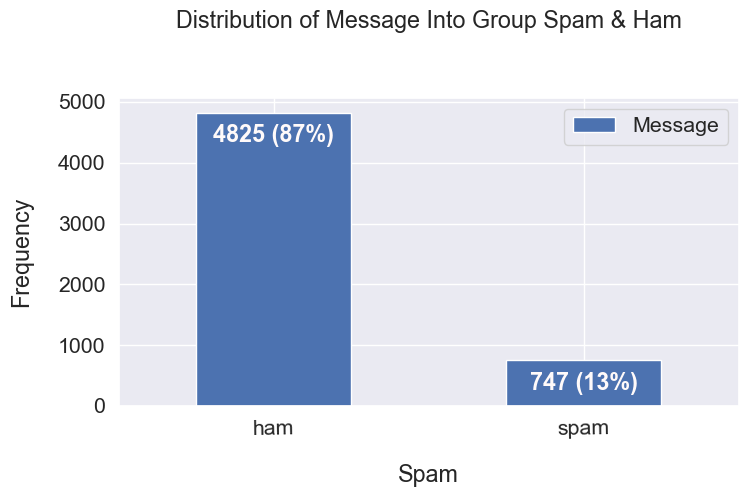

In [9]:
sns.set(font_scale=1.4)
ax = df.groupby('Category').count().plot(kind='bar', figsize =(8, 4), rot=1 , stacked=True)
plt.xlabel("Spam", labelpad = 18)
plt.ylabel("Frequency", labelpad = 18)
plt.title("Distribution of Message Into Group Spam & Ham", y = 1.2);
abs_values = df['Category'].value_counts(ascending=False)
rel_values = df['Category'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(ax.containers[0],color='snow',fontweight='bold',labels=lbls,padding = -25)

In [10]:
# add len data 
df['Message_len'] = df.Message.apply(len)
df.head()

Category  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   

                                                                                                                                                       Message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   Message_len  
0          111  
1           29  
2          155  
3           49  
4           61

Text(0.5, 0, 'Email Message Length')

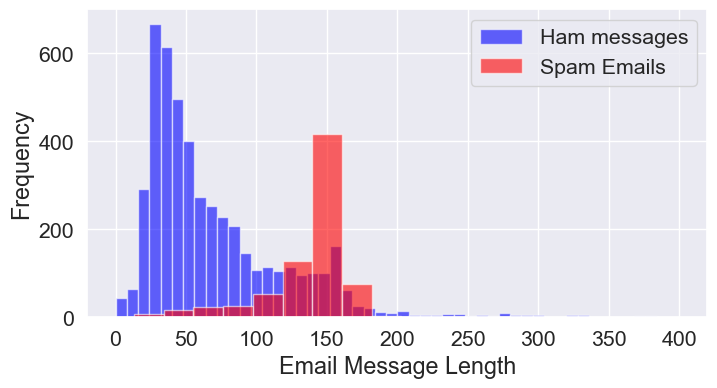

In [11]:
plt.figure(figsize=(8, 4))

label = 'Category'
df[df.Category=='ham'].Message_len.plot(bins=50, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6,range = [0,400])
df[df.Category=='spam'].Message_len.plot(kind='hist', color='red', 
                                       label='Spam Emails', alpha=0.6)
plt.legend()
plt.xlabel("Email Message Length")

## 👁️Visualize for Compare the length between Ham and Spam Message 

In [12]:
ham_df = df[df['Category'] == 'ham']['Message_len'].value_counts().sort_index()
spam_df = df[df['Category'] == 'spam']['Message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3. Data Pre-processing 🛠</p>

Now we are going to engineering the data to make it easier for the model to clasiffy.

This section is very important to reduce the dimensions of the problem.

## 📑 Text Pre-processing

> ## ✂️ Cleaning the corpus

> ## ✂️ Removing punctuation using nltk.corpus module.

> ## ✂️ Removing stopwords using nltk.corpus module.

> ## ✂️ Stemming/ Lematization.

> ## ✂️ Handling imbalanced Data.

> ## ✂️ Tokens visualization .


As a first step, let's write a function that will split a message into its individual words and return a list. We'll also **remove very common words, ('the', 'a', etc..)**. To do this we will take advantage of the **NLTK library**. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will **process the string in the message column**, then we can just use apply() in pandas do process all the text in the DataFrame.


<a id='3.1'></a>
## <p style="background-color:lightblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.1 Cleaning the corpus ✂️</p>

In [13]:
def text_message_process(text_message):
    """
    Takes in a string of text_message, then performs the following:
    1. Clean the text_message
    2. Remove all punctuation
    3. Returns a list of the cleaned text_message
    """
    
    def clean_text_message(text_message):
        '''Make text_message lowercase, remove text_message in square brackets,remove links,remove punctuation
        and remove words containing numbers.'''
        text_message = str(text_message).lower()
        text_message = re.sub('\[.*?\]', '', text_message)
        text_message = re.sub('https?://\S+|www\.\S+', '', text_message)
        text_message = re.sub('<.*?>+', '', text_message)
        text_message = re.sub('[%s]' % re.escape(string.punctuation), '', text_message)
        text_message = re.sub('\n', '', text_message)
        text_message = re.sub('\w*\d\w*', '', text_message)
        return text_message
    
    text_message = clean_text_message(text_message)
    
    def remove_punc(text_message):     
        # Check characters to see if they are in punctuation
        nopuncText = [char for char in text_message if char not in string.punctuation]

        # Join the characters again to form the string.
        nopuncText_message = ''.join(nopuncText)
        
        return nopuncText_message
    
    nopuncText_message = remove_punc(text_message)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopuncText_message.split() if word.lower() not in STOPWORDS])

In [14]:
# df['Message_clean'] = df['Message'].apply(text_message_process)
df['Message_clean'] = df['Message']

df.head()

Category  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   

                                                                                                                                                       Message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   Message_len  \
0          111   
1           29   
2          155   
3           49   
4           61   

                                                                                                                                                 Message_clean  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

<a id='3.1'></a>
## <p style="background-color:lightblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.2 Removing the Stopwords from corpus ✂️</p>

Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some examples removing stopwords are:

In [15]:
STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','c']

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in STOPWORDS)
    return text
    
# df['Message_clean'] = df['Message_clean'].apply(remove_stopwords)
df.head()

Category  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   

                                                                                                                                                       Message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   Message_len  \
0          111   
1           29   
2          155   
3           49   
4           61   

                                                                                                                                                 Message_clean  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

<a id='3.1'></a>
## <p style="background-color:lightblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.3 Stemming/ Lematization ✂️</p>

**Stemming** usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word

In [16]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [17]:
# df['Message_clean'] = df['Message_clean'].apply(stemm_text)
df.head()

Category  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   

                                                                                                                                                       Message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   Message_len  \
0          111   
1           29   
2          155   
3           49   
4           61   

                                                                                                                                                 Message_clean  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

In [18]:
print('% Imbalanced Data:',round(len(df[df['Category'] == 'spam'])/len(df[df['Category'] != 'spam']),2)*100)

% Imbalanced Data: 15.0


<a id='3.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.4 Handling imbalanced Data ✂️</p>

In [19]:
#Checking size of 'spam' group 
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 4)

In [20]:
#Checking size of 'ham' group
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 4)

In [21]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0],random_state = 1)
df_ham_downsampled.shape

(747, 4)

In [22]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 4)

In [23]:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

<a id='3.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.5 Target ( Label ) encoding 📝</p>

In [24]:
if 'spam' not in df_balanced.columns:
    df_balanced['spam'] = df_balanced['Category'].apply(lambda x : 1 if x == 'spam' else 0)

In [25]:
pd.concat([df_balanced[df_balanced['spam'] == 1].head(), df_balanced[df_balanced['spam'] == 0].head()])

Category  \
2        spam   
5        spam   
8        spam   
9        spam   
11       spam   
2535      ham   
1213      ham   
522       ham   
5398      ham   
700       ham   

                                                                                                                                                             Message  \
2        Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
5               FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv   
8     WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.   
9         Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030   
11                          SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info   
2535     Can you pls pls send me a mail on all you know about relatives coming to deliver here? All you know about costs, risks, benefits and anything else. Thanks.   
1213                                    Yeah, probably but not sure. Ilol let u know, but personally I wuldnt bother, then again if ur goin to then I mite as well!!   
522                                                                                                                                     Were gonna go get some tacos   
5398                                                                                                               Hi. Hope you had a good day. Have a better night.   
700                                                                                                                                    How much r Ì_ willing to pay?   

      Message_len  \
2             155   
5             148   
8             158   
9             154   
11            136   
2535          155   
1213          124   
522            28   
5398           49   
700            29   

                                                                                                                                                       Message_clean  \
2        Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
5               FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv   
8     WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.   
9         Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030   
11                          SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info   
2535     Can you pls pls send me a mail on all you know about relatives coming to deliver here? All you know about costs, risks, benefits and anything else. Thanks.   
1213                                    Yeah, probably but not sure. Ilol let u know, but personally I wuldnt bother, then again if ur goin to then I mite as well!!   
522                                                                                                                                     Were gonna go get some tacos   
5398                                                                                                               Hi. Hope you had a good day. Have a better night.   
700                                                     

<a id='3.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.6 Tokens visualization 📈</p>

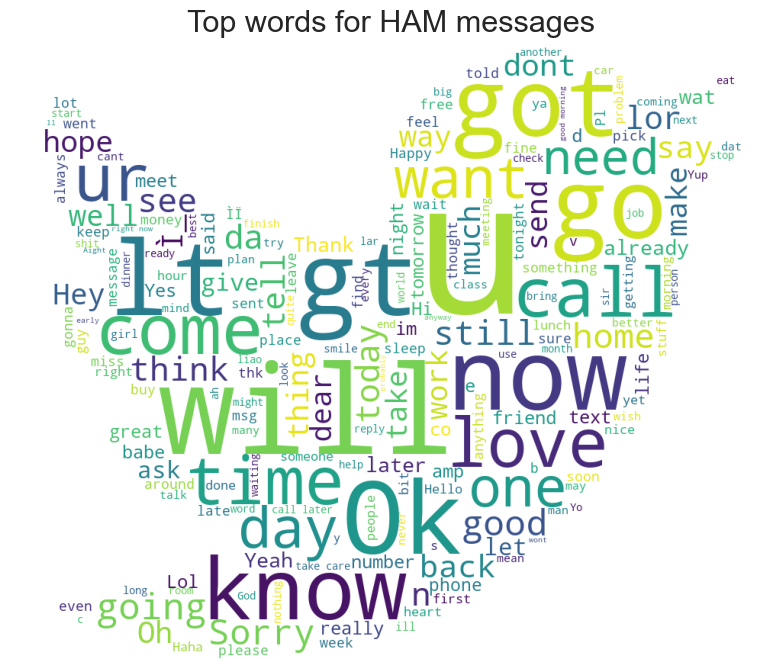

In [26]:
# df['Message_clean'] = df['Message'] ##Testing
url = "https://raw.githubusercontent.com/faheemrajwadkar/twitter_sentiment_analysis/master/twitter_mask.png"
response = requests.get(url)
twitter_mask = PIL.Image.open(BytesIO(response.content))
twitter_masked_npArray = np.array(twitter_mask)

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_masked_npArray,
)
wc.generate(' '.join(text for text in df.loc[df['Category'] == 'ham', 'Message_clean']))
plt.figure(figsize=(12,8))
plt.title('Top words for HAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

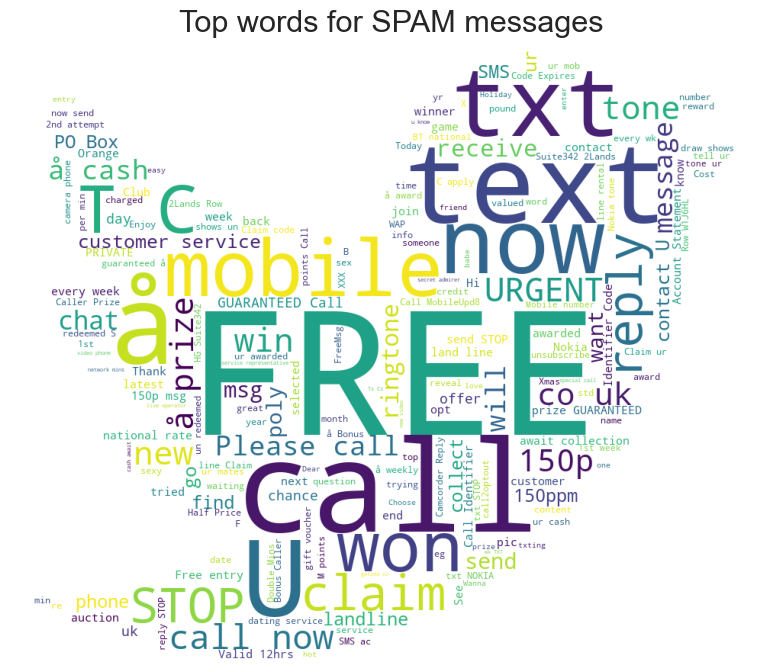

In [27]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_masked_npArray,
)
wc.generate(' '.join(text for text in df.loc[df['Category'] == 'spam', 'Message_clean']))
plt.figure(figsize=(12,8))
plt.title('Top words for SPAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4. Data Split Into Train & Test 📑</p>


In [28]:
from sklearn.model_selection import train_test_split

feature = df_balanced['Message_clean']
target_variable = df_balanced['spam']

X_train, X_test, y_train, y_test = train_test_split(feature,target_variable, stratify = df_balanced['spam'])

In [29]:
X_train.head(4)

3952                                      Refused a loan? Secured or Unsecured? Can't get credit? Call free now 0800 195 6669 or text back 'help' & we will!
189                                                                 I jus reached home. I go bathe first. But my sis using net tell u when she finishes k...
514     You are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a å£500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18+
4966               You can donate å£2.50 to UNICEF's Asian Tsunami disaster support fund by texting DONATE to 864233. å£2.50 will be added to your next bill
Name: Message_clean, dtype: object

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">5. BERT Model 🧮 </p>


## Now lets import BERT model and get embeding vectors for few sample statements

In [30]:
import tensorflow as tf
import tensorflow_hub as tf_hub
import tensorflow_text as tf_text

bert_preprocess_layer = tf_hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
bert_encoder = tf_hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",name='BERT_encoder')

In [31]:
def get_sentence_embeding(sentences):
    
    #step 1 : Pass the input text to bert_preprocess() func to get the preprocessed text for machine.
    preprocessed_text = bert_preprocess_layer(sentences)
    
    # step 2 : Pass the returned preprocessed_text to the bert_encoder func & picking only 
    #'pooled_output' which is encoding of the input text.
    
    encoded_text = bert_encoder(preprocessed_text)['pooled_output']
    
    return encoded_text

get_sentence_embeding([
    "500$$ discount", 
    "MOhan, are you up for a volleybal game tomorrow?"]
)

## bert architecture converts every input into 1*768 Dimensional vector

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.75387317, -0.38858768, -0.21862869, ..., -0.04726395,
        -0.6917258 ,  0.86382383],
       [-0.8714219 , -0.4972828 , -0.9447922 , ..., -0.8532712 ,
        -0.7159636 ,  0.892916  ]], dtype=float32)>

## Get embeding vectors for few sample words. Compare them using cosine similarity

In [32]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates",
    "Sharukh khan",
    "king Khan",
    "anjali",
    "mohan"
]
)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

In [34]:
cosine_similarity(
    [e[1]],
    [e[2]]
)

array([[0.98507446]], dtype=float32)

In [35]:
cosine_similarity([e[0]],[e[3]])

array([[0.84703845]], dtype=float32)

Comparing banana with jeff bezos you still get 0.84 but it is not as close as 0.99 that we got with grapes

In [36]:
cosine_similarity([e[3]],[e[4]])

array([[0.98720354]], dtype=float32)

Jeff bezos and Elon musk are more similar then Jeff bezos and banana as indicated above

## Model Building

### Here we will build functional model.
- Functional model offers more flexibility over sequential model because we don’t need to attach layers in sequential order.
- In Functional model, part or all of the inputs directly connected to the output layer.
- his architecture makes it possible for the neural network to learn both deep patterns and simple rules.

In [37]:
text_test = ['The amazing movie']
encoder_inputs = bert_preprocess_layer(text_test)
print("=================INPUT BERT EMBEDDINGS======================================================================")
print(f'Keys                       : {list(encoder_inputs.keys())}')
print(f'input_word_ids  Shape ==>  : {encoder_inputs["input_word_ids"].shape}')

# 'The amazing movie' ->  CLS The amazing movie  SEP  --> 128 ( input_word_ids shape -> (1,128) & 1 becuase input has 1  sentence only ) 
print(f'input_word_ids  [ids]      : {encoder_inputs["input_word_ids"][0, :12]}')
print(f'input_mask ids  Shape ==>  : {encoder_inputs["input_mask"].shape}')
print(f'Input Mask ids  [ids]      : {encoder_inputs["input_mask"][0, :12]}')
print(f'input_type_ids  Shape ==>  : {encoder_inputs["input_word_ids"].shape}')
print(f'input_type_ids  [ids]      : {encoder_inputs["input_type_ids"][0, :12]}')

print("\n=================OUTPUT BERT EMBEDDINGS======================================================================")

outputs_text_encoded = bert_encoder(encoder_inputs)

print(f'Keys                   : {list(outputs_text_encoded.keys())}')
print(f'Pooled Outputs Shape   : {outputs_text_encoded["pooled_output"].shape}')
print(f'Pooled Outputs Values  : {outputs_text_encoded["pooled_output"][:,6]}')
print(f'Sequence Outputs Shape : {outputs_text_encoded["sequence_output"].shape}')
# 'The amazing movie' -> The amazing movie 0 0 0 0   --> 128 ( sequence_output shape -> (1,128,768) 
# & 1 becuase input has 1  sentence only ) 128 is becuase of sentence & attached padding of 768 vector 

print(f'Sequence Outputs Values:\n{outputs_text_encoded["sequence_output"][:,:2,:4]}')

print(f'encoder_outputs  Shape : {len(outputs_text_encoded["encoder_outputs"])}')

=================INPUT BERT EMBEDDINGS======================================================================
Keys                       : ['input_word_ids', 'input_type_ids', 'input_mask']
input_word_ids  Shape ==>  : (1, 128)
input_word_ids  [ids]      : [ 101 1996 6429 3185  102    0    0    0    0    0    0    0]
input_mask ids  Shape ==>  : (1, 128)
Input Mask ids  [ids]      : [1 1 1 1 1 0 0 0 0 0 0 0]
input_type_ids  Shape ==>  : (1, 128)
input_type_ids  [ids]      : [0 0 0 0 0 0 0 0 0 0 0 0]

=================OUTPUT BERT EMBEDDINGS======================================================================
Keys                   : ['sequence_output', 'pooled_output', 'encoder_outputs', 'default']
Pooled Outputs Shape   : (1, 768)
Pooled Outputs Values  : [0.7499909]
Sequence Outputs Shape : (1, 128, 768)
Sequence Outputs Values:
[[[-0.05990588 -0.01135368 -0.05788691  0.05447452]
  [-0.11687516 -0.52020675 -0.4477908   0.10171777]]]
encoder_outputs  Shape : 12


## Bert layers using Tensorflow Functional Model

In [38]:
##Import the libraries for neural networks

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import plot_model

def build_classifier_model():
    
    text_input_layer = Input(shape = (), dtype =  tf.string ,  name = 'Textinputlayer') #Input Layer

    bert_preprocess_layer = tf_hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", 
                                              name='PreprocessingLayer')  #Preprocessing Layer
    encoder_inputs = bert_preprocess_layer(text_input_layer) 
    
    bert_encoder = tf_hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
                                     name='BertEncoderLayer') #BertEncoder Layer
    
    outputs_text_encoded = bert_encoder(encoder_inputs)
    
    #Neural network layers Drop Out ( to avoid overfitting )
    
    #Dropout
    l1 = Dropout(0.1, name="dropoutLayer")(outputs_text_encoded['pooled_output']) #Dropout layer
    output_layer = Dense(1, activation = 'sigmoid', name="OutputLayer")(l1) ##Output Layer

    # Use inputs and outputs to construct a final model
    model = tf.keras.Model(inputs=[text_input_layer], outputs = [output_layer])
    return model
    

#Processed text passed to bert_encoder
model = build_classifier_model()

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Textinputlayer (InputLayer)    [(None,)]            0           []                               
                                                                                                  
 PreprocessingLayer (KerasLayer  {'input_type_ids':   0          ['Textinputlayer[0][0]']         
 )                              (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

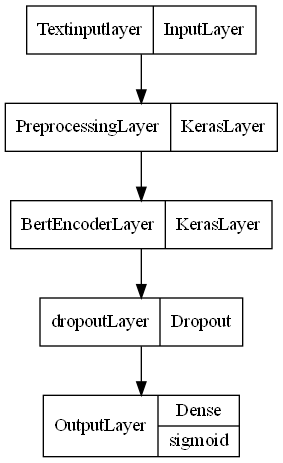

In [40]:
# from tensorflow import keras
plot_model(model, "my_first_model.png" ,show_layer_names=True,show_layer_activations=True,show_shapes=False)

In [41]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=METRICS)

In [42]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

## Train the model

In [43]:
history = model.fit(
    X_train, 
    y_train, 
    epochs = 3,
    batch_size = 35,
    validation_data = (X_test, y_test),
    verbose = 1,
)

Epoch 1/3
32/32 [==============================] - 237s 7s/step - loss: 0.6367 - accuracy: 0.6536 - precision: 0.6473 - recall: 0.6750 - val_loss: 0.5546 - val_accuracy: 0.8583 - val_precision: 0.8988 - val_recall: 0.8075
Epoch 2/3
32/32 [==============================] - 10547s 340s/step - loss: 0.5115 - accuracy: 0.8205 - precision: 0.8079 - recall: 0.8411 - val_loss: 0.4901 - val_accuracy: 0.8262 - val_precision: 0.9621 - val_recall: 0.6791
Epoch 3/3
32/32 [==============================] - 257s 8s/step - loss: 0.4402 - accuracy: 0.8518 - precision: 0.8505 - recall: 0.8536 - val_loss: 0.4239 - val_accuracy: 0.8636 - val_precision: 0.8469 - val_recall: 0.8877


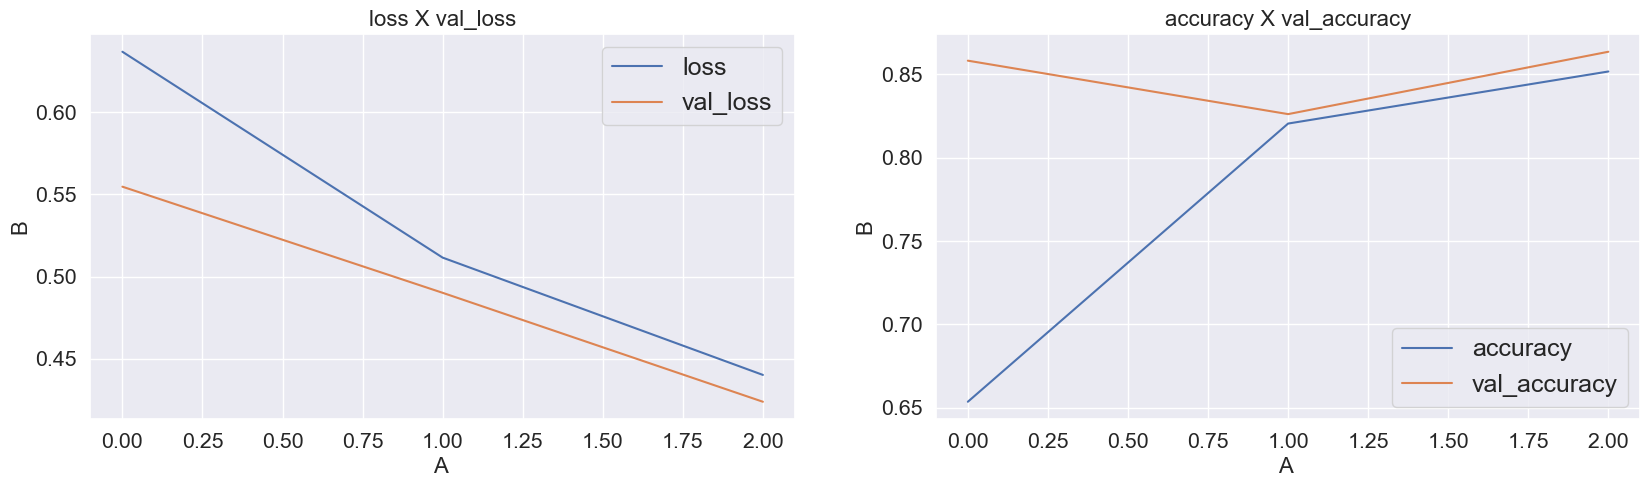

In [44]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="Accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of Bert Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

We can believe on accuracy as we have balanced the dataset.

In [46]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 60s 5s/step - loss: 0.4239 - accuracy: 0.8636 - precision: 0.8469 - recall: 0.8877


[0.42385098338127136,
 0.8636363744735718,
 0.8469387888908386,
 0.8877005577087402]

## Testing the model

In [47]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 63s 5s/step


In [48]:
#If probablity greater than 0.5 than make it 1 otherwise 0.

#IF y_predicted = 1-> spam ELSE: Not spam

y_predicted = np.where(y_predicted > 0.5, 1, 0)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[157,  30],
       [ 21, 166]], dtype=int64)

Text(42.25, 0.5, 'Truth')

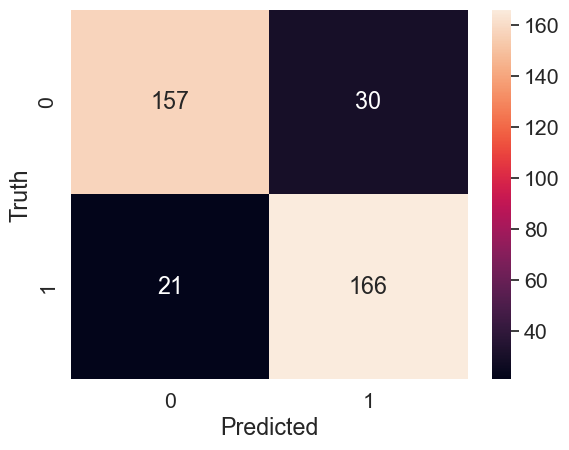

In [50]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report On Test Data

In [51]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       187
           1       0.85      0.89      0.87       187

    accuracy                           0.86       374
   macro avg       0.86      0.86      0.86       374
weighted avg       0.86      0.86      0.86       374



## Testing on New Data

In [52]:
testmessage = [
    
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'Pix Digital Camera! from landline.',
    'Click here to call our mobile no for free tickets. Reply to win',
    "Why don't you wait 'til at least wednesday to see if you get your .",
    "What time is univerity open? let's go",
    "click here to win ten thousand pounds",
    "click Today is NLP code execution"
    
]

testprediction  = model.predict(testmessage)
l = []
for index,txt in enumerate(testmessage):
    l.append([txt,np.round(testprediction[[index]][0][0],2),'spam' if testprediction[[index]][0][0] > 0.24 else 'ham' ])
pd.DataFrame(l, columns=['TestMessage', 'pred %','labelPredicted'] ,index = [index for index,txt in enumerate(testmessage)])

1/1 [==============================] - 2s 2s/step


TestMessage  \
0                                it to 80488. Your 500 free text messages are valid until 31 December 2005.   
1  Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service   
2                                                                        Pix Digital Camera! from landline.   
3                                           Click here to call our mobile no for free tickets. Reply to win   
4                                       Why don't you wait 'til at least wednesday to see if you get your .   
5                                                                     What time is univerity open? let's go   
6                                                                     click here to win ten thousand pounds   
7                                                                         click Today is NLP code execution   

   pred % labelPredicted  
0    0.68           spam  
1    0.62           spam  
2    0.60           spam  
3    0.57           spam  
4    0.26           spam  
5    0.24           spam  
6    0.28           spam  
7    0.34           spam

Thus in above example we conclude that the first four mails are spam while last two are not spam.